In [ ]:
import importlib

In [2]:
from oi_bulk_get_fns import get_all_openinsider_chunks,openinsider_url
import pandas as pd

In [ ]:
#IFF need to re-pull from OI:
start = pd.Timestamp('2019-01-01')
end = pd.Timestamp('2025-08-06')
get_all_openinsider_chunks(start,end,chunk_size=1000,window_days=45,overlap_days=0)

In [ ]:
filename = 'oi_rawpull_ymd_2019_01_01_2025_08_06_incl.csv'
oipmega1 = pd.read_csv(filename, usecols=lambda col: col != pd.read_csv(filename, nrows=0).columns[0])

In [11]:
print(oipmega1.head())
print('number of rows:', len(oipmega1))
tickers = oipmega1["ticker"].unique().tolist()
print(oipmega1.columns)

           filing_date  trade_date ticker            company_name  \
0  2025-08-06 21:18:06  2025-08-05    WSC  Willscot Holdings Corp   
1  2025-08-06 20:48:14  2025-08-04   PRLB          Proto Labs Inc   
2  2025-08-06 19:47:30  2025-08-04   RVSB   Riverview Bancorp Inc   
3  2025-08-06 19:21:21  2025-08-04   TBBK           Bancorp, Inc.   
4  2025-08-06 18:43:37  2025-08-06   ASUR      Asure Software Inc   

         insider_name      title    trade_type   qty    owned     value  \
0  Soultz Bradley Lee        CEO  P - Purchase  5000   739418  125750.0   
1      Krishna Suresh  Pres, CEO  P - Purchase  1725    18021   75055.0   
2        Benke Robert   EVP, CCO  P - Purchase  4000    45578   19400.0   
3        Cohn Matthew        Dir  P - Purchase   550   227244   34931.0   
4      Goepel Patrick   COB, CEO  P - Purchase  5250  1307622   42840.0   

   insider_price  d_own_plus%_isnew  d_own_plus%  
0          25.15                  0          1.0  
1          43.51                

In [13]:
def print_top_volume_dates(df, date_col='filing_date', top_n=10):
    # Extract just the date (not time)
    df_dates = df.copy()
    df_dates['date_only'] = pd.to_datetime(df_dates[date_col]).dt.date
    # Group by date and count
    date_counts = df_dates.groupby('date_only').size()
    # Sort in descending order and take top N
    top_dates = date_counts.sort_values(ascending=False).head(top_n)
    # Print
    print(f"Top {top_n} dates by #filings (descending):")
    for d, count in top_dates.items():
        print(f"{d}: {count} filings")
    return top_dates

# Usage:
print_top_volume_dates(oipmega1, top_n=20)



Top 20 dates by #filings (descending):
2020-03-11: 557 filings
2020-03-16: 418 filings
2020-03-13: 408 filings
2020-03-12: 365 filings
2020-03-17: 303 filings
2020-03-10: 284 filings
2019-01-02: 280 filings
2019-03-05: 276 filings
2020-03-18: 269 filings
2023-03-15: 258 filings
2020-03-19: 238 filings
2020-03-09: 231 filings
2019-07-03: 219 filings
2021-08-18: 217 filings
2020-03-20: 214 filings
2022-06-21: 214 filings
2019-06-04: 207 filings
2020-03-05: 203 filings
2019-08-15: 196 filings
2023-05-04: 194 filings


date_only
2020-03-11    557
2020-03-16    418
2020-03-13    408
2020-03-12    365
2020-03-17    303
2020-03-10    284
2019-01-02    280
2019-03-05    276
2020-03-18    269
2023-03-15    258
2020-03-19    238
2020-03-09    231
2019-07-03    219
2021-08-18    217
2020-03-20    214
2022-06-21    214
2019-06-04    207
2020-03-05    203
2019-08-15    196
2023-05-04    194
dtype: int64

In [15]:
#YF PRICE/vol DATA ATTEMPT 1
from add_relative_prices2 import add_prices_to_oip_precise
window = [1,2,3,4,5,6,7,8,9,10,15,20,35,60,90,130,180,245]
oip_w_prices, error_dict = add_prices_to_oip_precise(oipmega1, fwindow=window, bwindow=window)
with pd.option_context('display.max_columns', None):
    #print(df.head())
    print(oip_w_prices.head(3))

1 Failed download:
['BCAR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-03-23 00:00:00 -> 2026-12-18 00:00:00)')
1 Failed download:
['APAD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-03-18 00:00:00 -> 2026-12-13 00:00:00)')
1 Failed download:
['NMP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-02-18 00:00:00 -> 2026-11-22 00:00:00)')
1 Failed download:
['NRX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-12-10 00:00:00 -> 2026-11-15 00:00:00)')

1 Failed download:
['FIGX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PPTIN']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['VREO']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['PTN']: YFTzMissingError('possibly delisted; no timezone found')
1 Failed download:
['SWPR']: YFTzMissingError('possibly delisted; no timezone found')
1 Fail

  filing_date  trade_date ticker            company_name        insider_name  \
0  2025-08-06  2025-08-05    WSC  Willscot Holdings Corp  Soultz Bradley Lee   
1  2025-08-06  2025-08-04   PRLB          Proto Labs Inc      Krishna Suresh   
2  2025-08-06  2025-08-04   RVSB   Riverview Bancorp Inc        Benke Robert   

       title    trade_type   qty   owned     value  insider_price  \
0        CEO  P - Purchase  5000  739418  125750.0          25.15   
1  Pres, CEO  P - Purchase  1725   18021   75055.0          43.51   
2   EVP, CCO  P - Purchase  4000   45578   19400.0           4.85   

   d_own_plus%_isnew  d_own_plus% mebuydate p_p1_td v_p1_td p_p2_td v_p2_td  \
0                  0          1.0       NaT    None    None    None    None   
1                  0         11.0       NaT    None    None    None    None   
2                  0         10.0       NaT    None    None    None    None   

  p_p3_td v_p3_td p_p4_td v_p4_td p_p5_td v_p5_td p_p6_td v_p6_td p_p7_td  \
0    Non

In [16]:
#save first price/vol pull checkpoint
oip_w_prices.to_csv('oipmega_post_yf1.csv',index=False)

In [20]:
#SEPARATE TRAIN/TEST/VALIDATION (all are inclusive) - these refer to filing_Dates !!!
#train: 1/1/2019 - 4/1/2025 oip1
#test: 4/2/2025 - 7/6/2025 oip2
#validation: simulate portfolio from then on? oip3
oip_w_prices['filing_date'] = pd.to_datetime(oipmega1['filing_date'])

# Define date boundaries
train_start = pd.Timestamp('2019-01-01')
train_end   = pd.Timestamp('2025-04-01')  # inclusive
test_start  = pd.Timestamp('2025-04-02')
test_end    = pd.Timestamp('2025-07-06')  # inclusive

# Create splits
oip1 = oip_w_prices[
    (oip_w_prices['filing_date'] >= train_start) &
    (oip_w_prices['filing_date'] <= train_end)
]

oip2 = oip_w_prices[
    (oip_w_prices['filing_date'] >= test_start) &
    (oip_w_prices['filing_date'] <= test_end)
]

print(f"Train rows: {len(oip1)}")
print(f"Test rows: {len(oip2)}")

Train rows: 89524
Test rows: 3015


In [ ]:
import csv

def write_error_dict_to_csv(error_dict, filename='error_report.csv'):
    # Open CSV file for writing
    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['ticker', 'row_index', 'error_type', 'error_message']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        # Loop over the error dict
        for ticker, ticker_errors in error_dict.items():
            if isinstance(ticker_errors, dict):
                for row_idx, errors in ticker_errors.items():
                    # If errors is a dict of field:message
                    if isinstance(errors, dict):
                        for error_type, error_msg in errors.items():
                            writer.writerow({
                                'ticker': ticker,
                                'row_index': row_idx,
                                'error_type': error_type,
                                'error_message': error_msg
                            })
                    else:
                        # In case errors is just a single message
                        writer.writerow({
                            'ticker': ticker,
                            'row_index': row_idx,
                            'error_type': 'error',
                            'error_message': errors
                        })
            else:
                # If ticker_errors is just a string or not a dict
                writer.writerow({
                    'ticker': ticker,
                    'row_index': '',
                    'error_type': 'error',
                    'error_message': ticker_errors
                })

# Usage:
write_error_dict_to_csv(error_dict, filename='d3_yf_errors_full_flat.csv')


In [ ]:
import csv

def write_first_error_per_ticker(error_dict, df, filename='error_first_per_ticker.csv'):
    # Open CSV file for writing
    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['ticker', 'company_name', 'row_index', 'filing_date', 'trade_date', 'insider_price','error_type', 'error_message']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for ticker, ticker_errors in error_dict.items():
            if isinstance(ticker_errors, dict) and len(ticker_errors) > 0:
                # Get the first row index (sorted)
                first_idx = sorted(ticker_errors.keys())[0]
                errors = ticker_errors[first_idx]
                # Get company name, filing_date, trade_date from the DataFrame for that ticker and index
                try:
                    row = df.loc[first_idx]
                    company_name = row.get('company_name', '')
                    filing_date = row.get('filing_date', '')
                    trade_date = row.get('trade_date', '')
                    insider_price = row.get('insider_price','')
                except Exception:
                    # fallback: try to get any row for the ticker
                    row = df[df['ticker'] == ticker].iloc[0]
                    company_name = row.get('company_name', '')
                    filing_date = row.get('filing_date', '')
                    trade_date = row.get('trade_date', '')
                    insider_price = row.get('insider_price','')
                # For all error types in this first error, print each as a column
                if isinstance(errors, dict):
                    # Get the first error only (if multiple)
                    error_type, error_msg = list(errors.items())[0]
                else:
                    error_type, error_msg = 'error', errors
                writer.writerow({
                    'ticker': ticker,
                    'company_name': company_name,
                    'row_index': first_idx,
                    'filing_date': filing_date,
                    'trade_date': trade_date,
                    'insider_price': insider_price,
                    'error_type': error_type,
                    'error_message': error_msg
                })
            else:
                # ticker_errors is just a string or empty
                writer.writerow({
                    'ticker': ticker,
                    'company_name': '',
                    'row_index': '',
                    'filing_date': '',
                    'trade_date': '',
                    'insider_price': '',
                    'error_type': 'error',
                    'error_message': ticker_errors
                })
import pandas as pd
from collections import defaultdict

# REBUILD ERROR DICT FROM FILE
error_df = pd.read_csv('d3_yf_errors_full_flat.csv')
# Build nested dict
error_dict = defaultdict(dict)
for _, row in error_df.iterrows():
    ticker = row['ticker']
    row_index = int(row['row_index'])
    error_type = row['error_type']
    error_message = row['error_message']
    if row_index not in error_dict[ticker]:
        error_dict[ticker][row_index] = {}
    error_dict[ticker][row_index][error_type] = error_message

# Optionally, convert defaultdict to regular dict (for pickling, safety, etc)
error_dict = {k: dict(v) for k, v in error_dict.items()}

#read in from csv so i dont need to keep live in df from prevs
#error_dict = pd.read_csv('d3_yf_errors_full_flat.csv')
oip_w_prices = pd.read_csv('oipmega_post_yf1.csv')
write_first_error_per_ticker(error_dict, oip_w_prices, filename='d3_yf_errors_by_ticker_wdata2.csv')
#FILTER:
#in excel by: error_type - only filing_price, and at the same time: filing_date NOT 2025 (those j dont have lookfwds beyond august duh)
#reduces down to ~2000 missing... womp womp


In [ ]:
#1) export error_dict as failed tickers dict to xl for manual check?
#2) manual url retrieval? or llm based agent search to get correct investing.com urls
#3) run script to get all investing.com data for all missing (from yahoofinance) (but valid) stocks
    #or from barchart - chart ripper
        #or other custom ripper site
#4) run script to pull from those many downloaded csvs to a df
#5) run an EQUIVALENT BUT MODIFIED add_prices_to_oip_precise for these new data, 
    #5b) merge this df with the main stock df

#6) run filtering algo(s) - zero vol, zero price, ADDV, min vol, min $ flow etc
#7) run some viz to look at included vs excluded stocks
#7.5) add returns computation
#7.6) add trade-to-file or trade-to-mebuy delay to df (feature)
#7.7) add trade-to-mebuy price change to df (feature)

#8) fit model - RF? some other time-series vecto autoreg? dynamic hold dur pred? return trade +%^ confidence? <-useful?
    #8a) tune model? ver vs val/train-test loss viz?
    #8b) R^2, F1, recall/precision metric sorting
    #8c) model selection
#9) pull out-of-training set OI data
    #9b) format like training data dfs
#10) pass into model, predict returns

#11) simulate trading strategy
    #skip negative predicted returns (duh)
    #skip small pos pred returns? ie threshold if pred to return less than 1% over the pred ideal hold duration
    #incl ADDV restriction - ie: give maximum trade size - cant go over say 1% (or .5%) of avg daily $ vol
    #dynamic buy based on +^% confidence (if part of model)
    #add buy/hold checkins to RF/conditional model - 
        #if after 1 day of hold it goes down x%, how likely to still finish in the green?

In [3]:
oip_w_prices = pd.read_csv('oipmega_post_yf1.csv')

In [16]:
import yfinance as yf

ticker='FIGAC'
hist = yf.download(ticker, start='2025-06-01', end='2025-08-05', progress=False,auto_adjust=True)['Low']
print(hist)

HTTP Error 404: 

1 Failed download:
['FIGAC']: YFTzMissingError('possibly delisted; no timezone found')


Empty DataFrame
Columns: [FIGAC]
Index: []


<Figure size 1500x500 with 0 Axes>

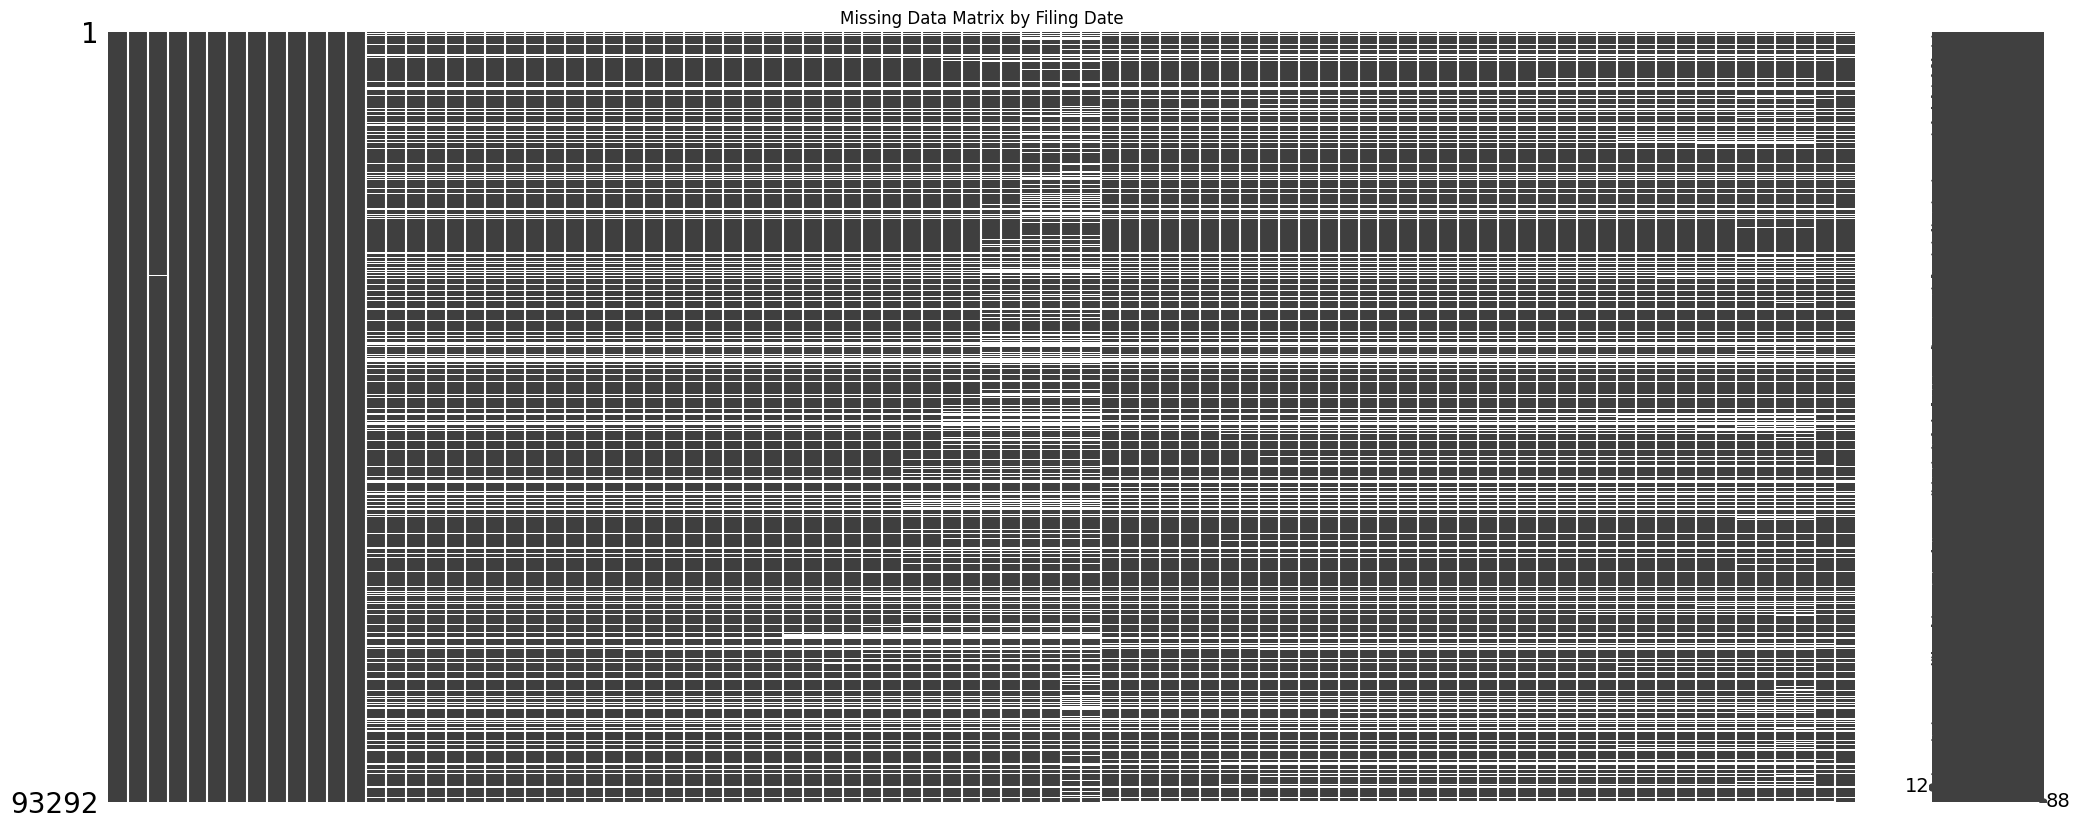

<Figure size 1200x800 with 0 Axes>

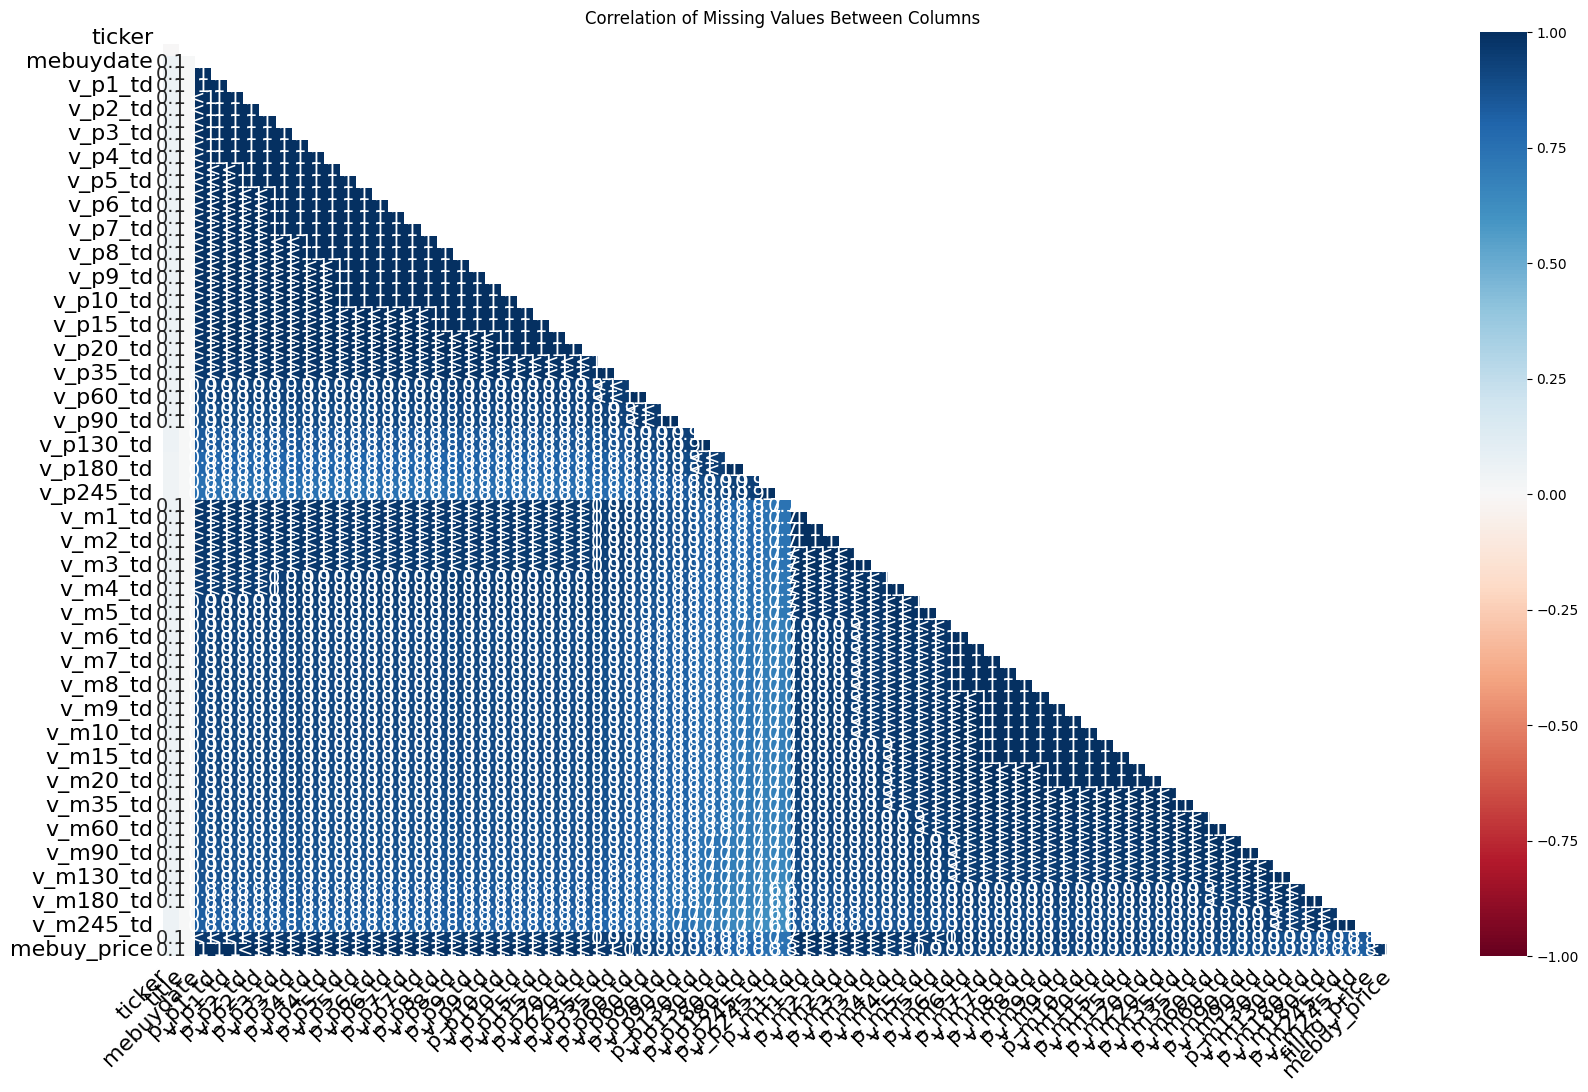

C:\Users\John DeForest\AppData\Local\Temp\ipykernel_64576\3625259196.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_pct.values, y=missing_pct.index, palette="viridis")


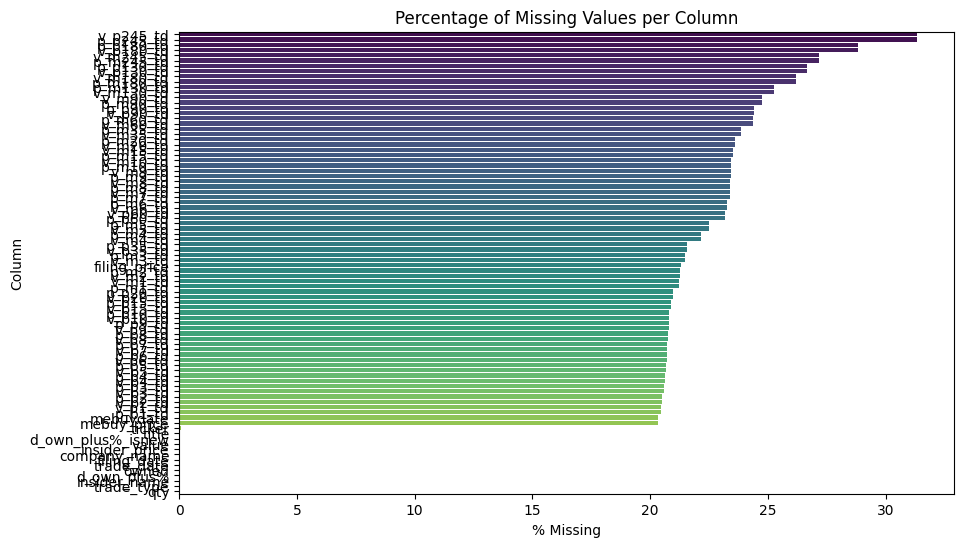

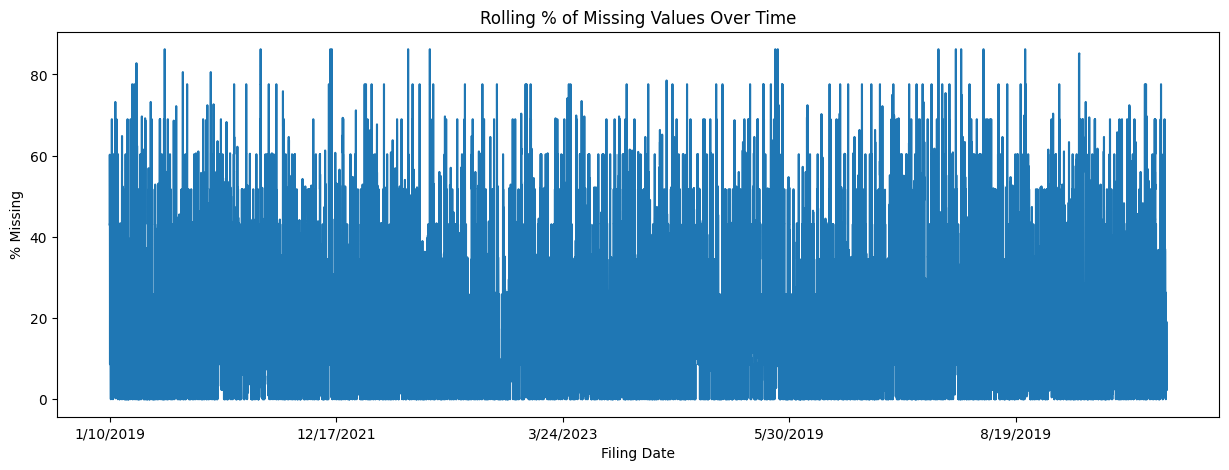

<Figure size 1500x500 with 0 Axes>

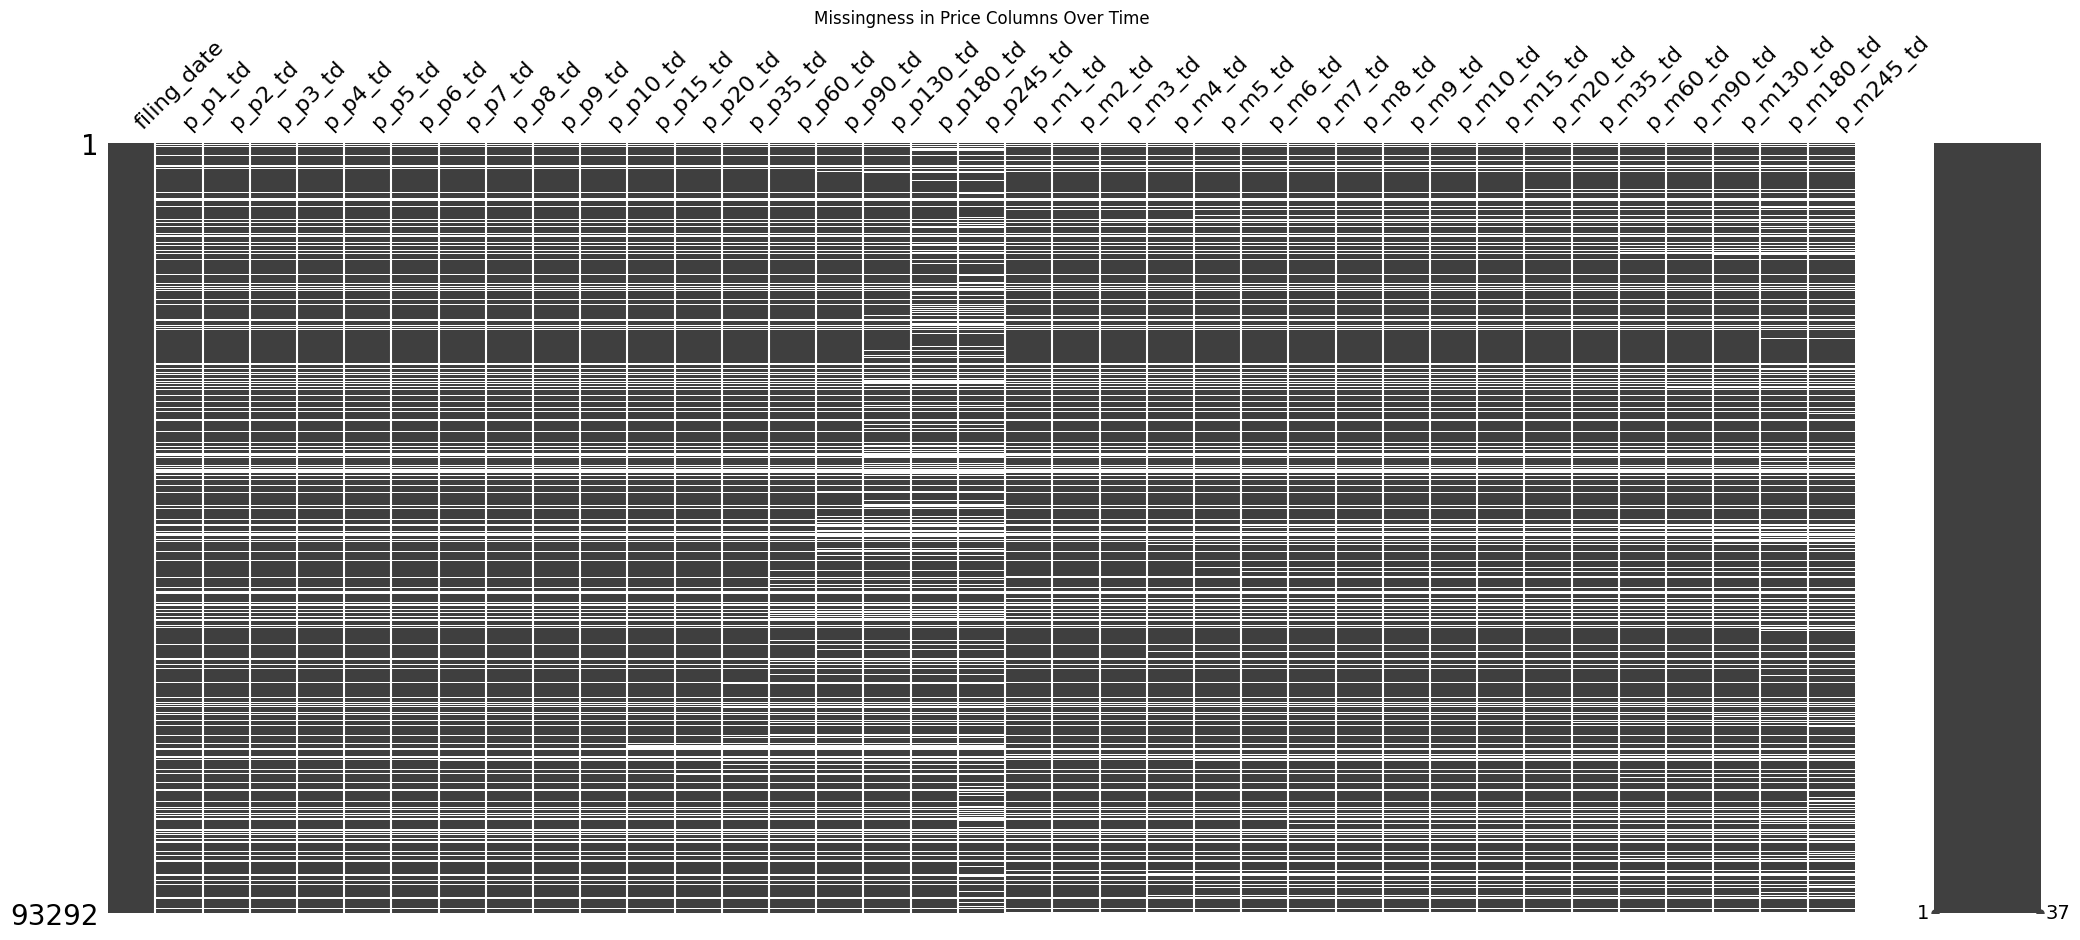

<Figure size 1500x500 with 0 Axes>

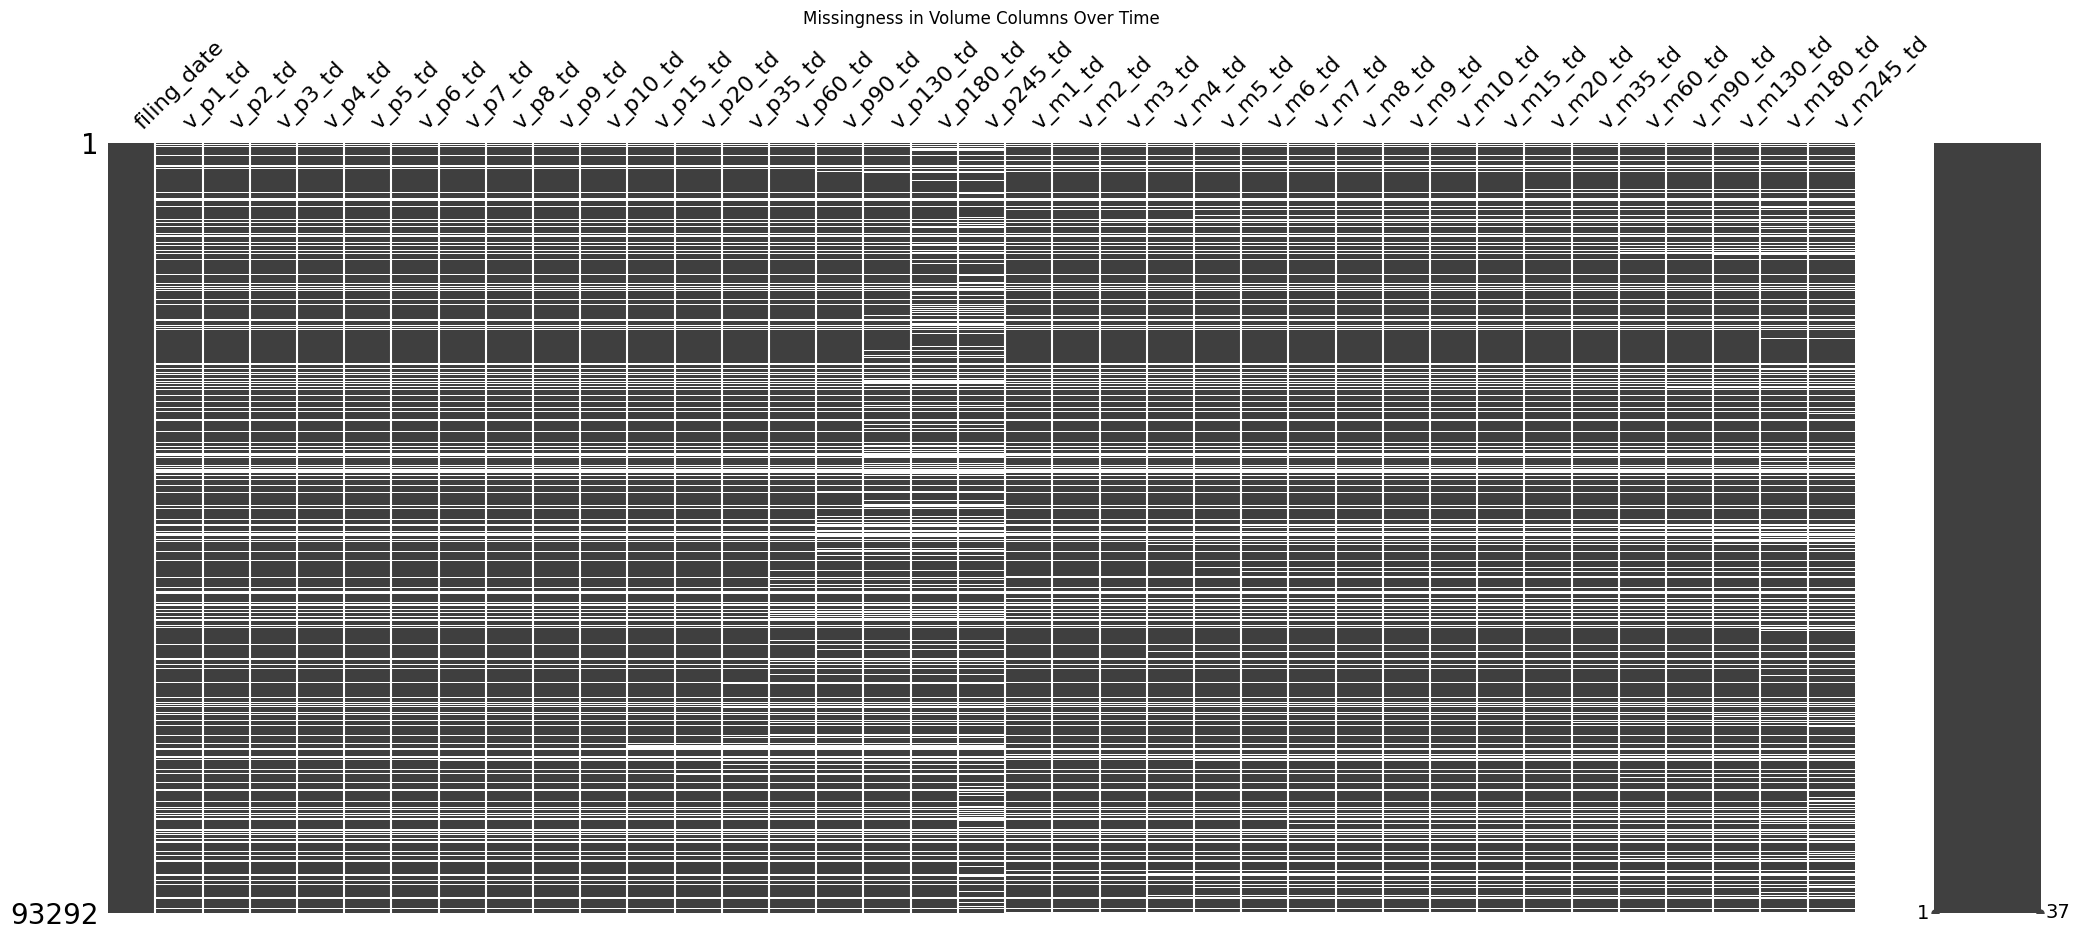

In [ ]:
# Missing Data Visualization for Insider Trading Backtest Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load your CSV
# Replace 'your_file.csv' with your actual CSV file path
#df = pd.read_csv("your_file.csv", parse_dates=["filing_date"], infer_datetime_format=True)
df= oip_w_prices
# Sort by filing date (important for time-based plotting)
df = df.sort_values("filing_date")

# --- 4. Missing values over time ---
# We'll plot the percentage of missing values per filing date
missing_over_time = df.set_index("filing_date").isna().mean(axis=1) * 100
plt.figure(figsize=(15, 5))
missing_over_time.rolling(window=10).mean().plot()
plt.title("Rolling % of Missing Values Over Time")
plt.ylabel("% Missing")
plt.xlabel("Filing Date")
plt.show()



C:\Users\John DeForest\AppData\Local\Temp\ipykernel_64576\3390665563.py:38: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isna().mean().mean() * 100)


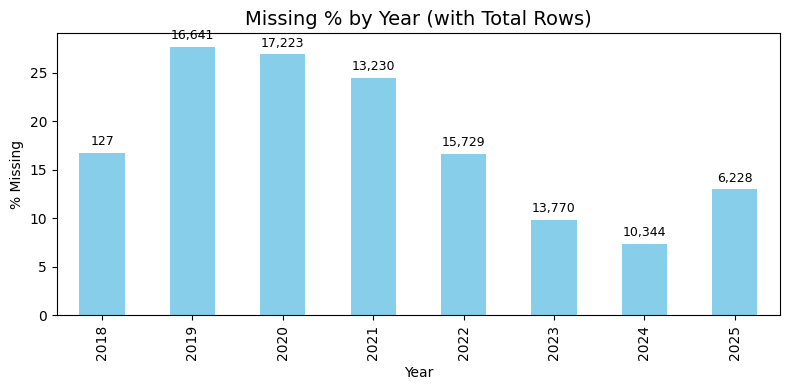

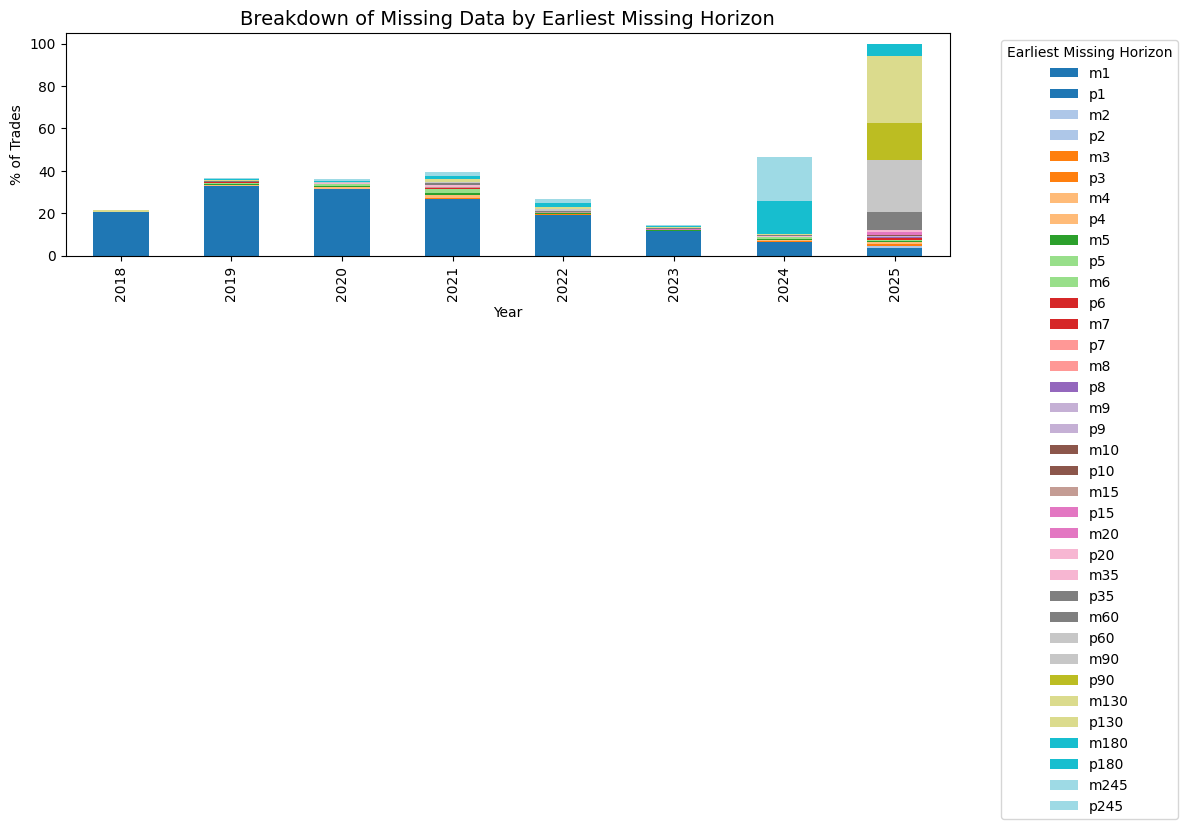

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ========= LOAD DATA & PARSE DATE =========
df = oip_w_prices#pd.read_csv("your_file.csv", low_memory=False)

# Parse filing_date handling m/d/yyyy or mm/dd/yyyy (mixed)
# First try strict US month-first format
try:
    df["filing_date"] = pd.to_datetime(df["filing_date"], format="%m/%d/%Y", errors="raise")
except:
    df["filing_date"] = pd.to_datetime(df["filing_date"], errors="coerce", infer_datetime_format=True)

# ========= ROUND PRICE & VOLUME =========
price_cols = [c for c in df.columns if c.startswith("p_")]
volume_cols = [c for c in df.columns if c.startswith("v_")]

# Round prices to 3 decimals
df[price_cols] = df[price_cols].apply(lambda x: np.round(x, 3))

# Round volumes to whole numbers (integers)
df[volume_cols] = df[volume_cols].apply(lambda x: np.round(x, 0).astype("Int64"))

# ========= DOWNSIZE MEMORY =========
for col in df.select_dtypes(include=["float64"]).columns:
    df[col] = pd.to_numeric(df[col], downcast="float")
for col in df.select_dtypes(include=["int64"]).columns:
    df[col] = pd.to_numeric(df[col], downcast="integer")

# ========= 3. MISSINGNESS BY YEAR (with counts) =========
df["year"] = df["filing_date"].dt.year

# Missing % per year
miss_by_year = (
    df.groupby("year")
      .apply(lambda x: x.isna().mean().mean() * 100)
)

# Row counts per year
count_by_year = df.groupby("year").size()

# Plot missing % by year
fig, ax = plt.subplots(figsize=(8, 4))
bars = miss_by_year.plot(kind="bar", ax=ax, color="skyblue")

# Add data labels (row counts) above each bar
for i, (year, pct) in enumerate(miss_by_year.items()):
    total_rows = count_by_year.get(year, 0)
    ax.text(
        i, pct + 0.5,           # Position slightly above bar
        f"{total_rows:,}",      # Format with commas
        ha="center", va="bottom", fontsize=9, rotation=0
    )

plt.title("Missing % by Year (with Total Rows)", fontsize=14)
plt.ylabel("% Missing")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# ========= 3B. Missingness by Year: Earliest Horizon Category =========

# Define horizons in order (nearest to farthest from filing_date)
# Adjust list based on your dataset's actual column names
horizon_order = [
    "m1", "p1",
    "m2", "p2",
    "m3", "p3",
    "m4", "p4",
    "m5", "p5",
    "m6", "p6",
    "m7", "p7",
    "m8", "p8",
    "m9", "p9",
    "m10", "p10",
    "m15", "p15",
    "m20", "p20",
    "m35", "p35",
    "m60", "p60",
    "m90", "p90",
    "m130", "p130",
    "m180", "p180",
    "m245", "p245"
]

# Identify all p_ and v_ columns
p_cols = [c for c in df.columns if c.startswith("p_")]
v_cols = [c for c in df.columns if c.startswith("v_")]

# Map horizon -> matching columns (both price and volume)
horizon_to_cols = {
    h: [c for c in p_cols + v_cols if f"_{h}_" in c] for h in horizon_order
}

# Function to find earliest missing horizon for a row
def earliest_missing_horizon(row):
    for h in horizon_order:
        cols = horizon_to_cols[h]
        if any(pd.isna(row[col]) for col in cols if col in row):
            return h
    return "None"  # if no missing horizons

# Apply to dataset (low memory: process in chunks if needed)
df["missing_category"] = df.apply(earliest_missing_horizon, axis=1)

# Group by year & category
year_cat_counts = df.groupby(["year", "missing_category"]).size().reset_index(name="count")

# Pivot for stacked bar
year_cat_pivot = year_cat_counts.pivot(index="year", columns="missing_category", values="count").fillna(0)

# Normalize to % for stacked proportion
year_cat_percent = year_cat_pivot.div(year_cat_pivot.sum(axis=1), axis=0) * 100

# Plot stacked bar
fig, ax = plt.subplots(figsize=(12, 6))
year_cat_percent[ [h for h in horizon_order if h in year_cat_percent.columns] ].plot(
    kind="bar", stacked=True, ax=ax, cmap="tab20"
)

plt.title("Breakdown of Missing Data by Earliest Missing Horizon", fontsize=14)
plt.ylabel("% of Trades")
plt.xlabel("Year")
plt.legend(title="Earliest Missing Horizon", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



# ========= 5. SAVE CLEANED VERSION =========
df.to_csv("oip_mega_rounded1.csv", index=False)
print("Cleaned & rounded dataset saved to 'your_file_cleaned.csv'")


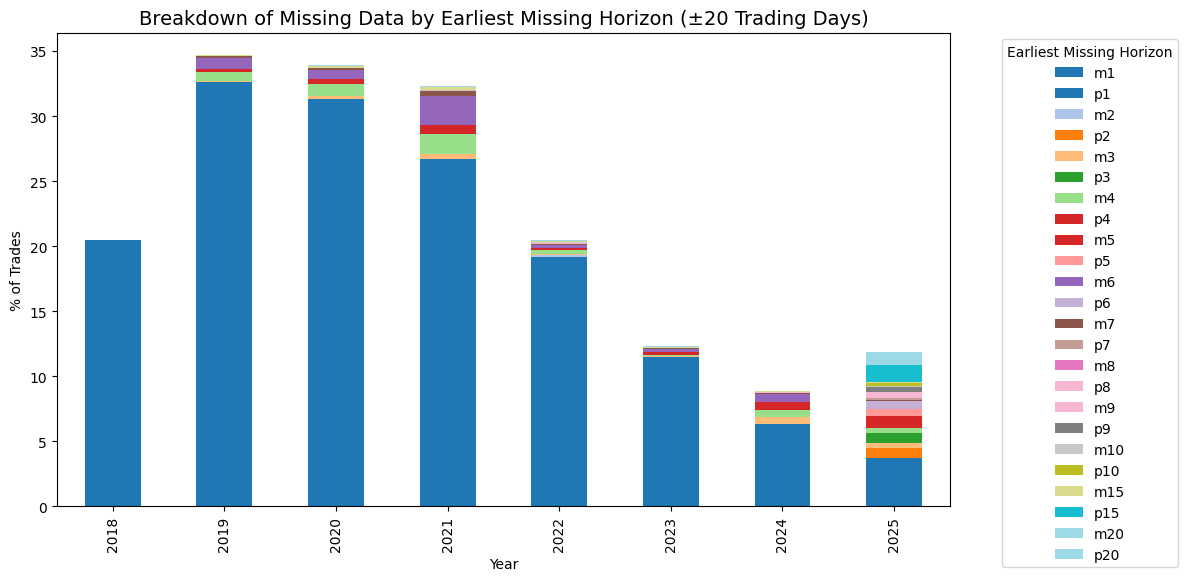

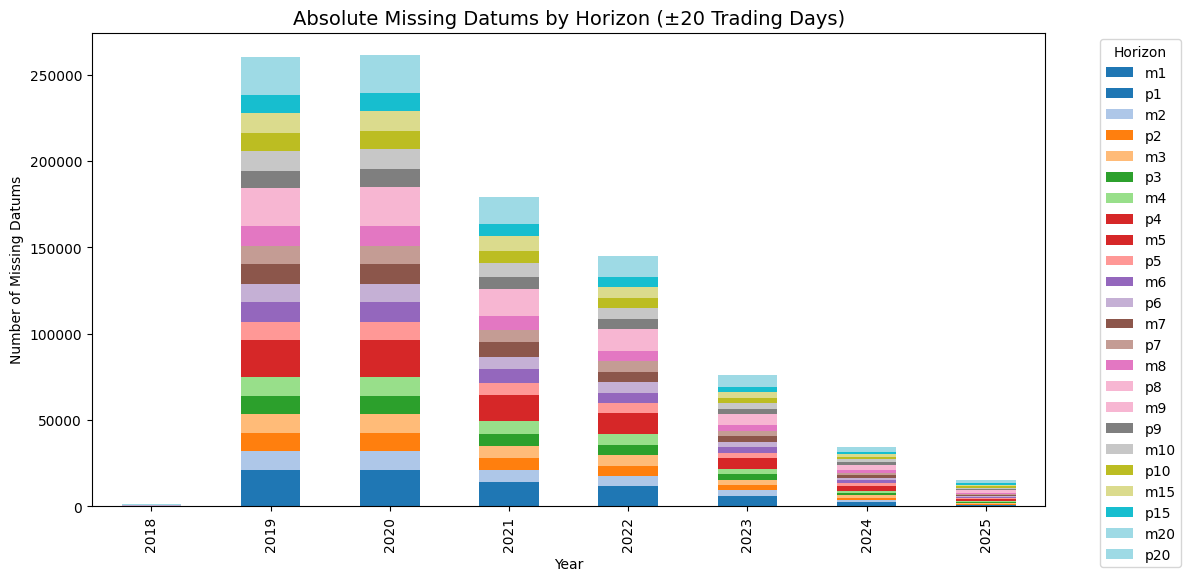

In [12]:
# ========= 3C. Missingness by Year (±20 Trading Days) =========

# Horizons to consider (up to 20 td in both directions)
horizon_order_20 = [
    "m1", "p1",
    "m2", "p2",
    "m3", "p3",
    "m4", "p4",
    "m5", "p5",
    "m6", "p6",
    "m7", "p7",
    "m8", "p8",
    "m9", "p9",
    "m10", "p10",
    "m15", "p15",
    "m20", "p20"
]

# Identify columns
p_cols = [c for c in df.columns if c.startswith("p_")]
v_cols = [c for c in df.columns if c.startswith("v_")]

# Map horizons to cols (both p_ and v_)
horizon_to_cols_20 = {
    h: [c for c in p_cols + v_cols if f"_{h}_" in c] for h in horizon_order_20
}

# Function: earliest missing horizon (±20 td only)
def earliest_missing_horizon_20(row):
    for h in horizon_order_20:
        cols = horizon_to_cols_20[h]
        if any(pd.isna(row[col]) for col in cols if col in row):
            return h
    return "None"

# Assign category
df["missing_category_20"] = df.apply(earliest_missing_horizon_20, axis=1)

# ==== 1. % Breakdown by Year ====
year_cat_counts_20 = df.groupby(["year", "missing_category_20"]).size().reset_index(name="count")
year_cat_pivot_20 = year_cat_counts_20.pivot(index="year", columns="missing_category_20", values="count").fillna(0)
year_cat_percent_20 = year_cat_pivot_20.div(year_cat_pivot_20.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(12, 6))
year_cat_percent_20[[h for h in horizon_order_20 if h in year_cat_percent_20.columns]].plot(
    kind="bar", stacked=True, ax=ax, cmap="tab20"
)
plt.title("Breakdown of Missing Data by Earliest Missing Horizon (±20 Trading Days)", fontsize=14)
plt.ylabel("% of Trades")
plt.xlabel("Year")
plt.legend(title="Earliest Missing Horizon", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# ==== 2. Absolute Missing Datums by Year ====
# Count total missing cells (datums) in these horizons, grouped by year & horizon
missing_datum_counts = (
    df.groupby("year")[[col for h in horizon_order_20 for col in horizon_to_cols_20[h]]]
    .apply(lambda x: x.isna().sum())
)

# Convert to long format for plotting
missing_datum_long = missing_datum_counts.reset_index().melt(id_vars="year", var_name="column", value_name="missing_count")

# Map each column to its horizon (m/p)
missing_datum_long["horizon"] = missing_datum_long["column"].apply(
    lambda c: next((h for h in horizon_order_20 if f"_{h}_" in c), None)
)

# Group by year & horizon
datum_by_year_horizon = missing_datum_long.groupby(["year", "horizon"])["missing_count"].sum().reset_index()

# Pivot for stacked bar
datum_pivot = datum_by_year_horizon.pivot(index="year", columns="horizon", values="missing_count").fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))
datum_pivot[[h for h in horizon_order_20 if h in datum_pivot.columns]].plot(
    kind="bar", stacked=True, ax=ax, cmap="tab20"
)
plt.title("Absolute Missing Datums by Horizon (±20 Trading Days)", fontsize=14)
plt.ylabel("Number of Missing Datums")
plt.xlabel("Year")
plt.legend(title="Horizon", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np

# === 1. Load cleaned data ===
df = pd.read_csv("oip_mega_rounded1.csv")

# Ensure dates are parsed
df["trade_date"] = pd.to_datetime(df["trade_date"], errors="coerce")
df["filing_date"] = pd.to_datetime(df["filing_date"], errors="coerce")

# Ensure mebuy_price exists and is numeric
df["mebuy_price"] = pd.to_numeric(df["mebuy_price"], errors="coerce")

# === 2. Add trade2file column (days between trade_date and filing_date) ===
df["trade2file"] = (df["filing_date"] - df["trade_date"]).dt.days

# === 3. Find all price columns ===
price_cols = [c for c in df.columns if c.startswith("p_")]

# === 4. Compute returns relative to mebuy_price ===
for col in price_cols:
    ret_col = f"ret_{col}"  # e.g., p_p1 -> ret_p_p1
    df[ret_col] = (df[col] - df["mebuy_price"]) / df["mebuy_price"]
    df[ret_col] = df[ret_col].round(4)

# === 5. Save updated DataFrame ===
df.to_csv("oip_mega_wreturns.csv", index=False)

print(f"Done! Added trade2file column and {len(price_cols)} return columns. Saved to oip_mega_wreturns.csv.")


Done! Added trade2file column and 36 return columns. Saved to oip_mega_wreturns.csv.


In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# === 1. Load the dataset ===
df = pd.read_csv("oip_mega_wreturns.csv")

# === 2. Target variable: return x days in future after mebuydate===
xdaysahead = 1

target_col = f"ret_p_p{xdaysahead}_td"

# === 3. Feature selection ===
features = [
    "qty",
    "owned",
    "value",
    "insider_price",
    "d_own_plus%_isnew",
    "d_own_plus%",
    "filing_price",
    "mebuy_price"
]

# Add all minus-day price and volume columns
minus_price_cols = [c for c in df.columns if c.startswith("p_m") and c.endswith("_td")]
minus_vol_cols   = [c for c in df.columns if c.startswith("v_m") and c.endswith("_td")]

features.extend(minus_price_cols)
features.extend(minus_vol_cols)

# === 4. Keep only relevant columns ===
model_df = df[features + [target_col]].copy()

# === 5. Drop rows with missing values (basic approach for now) ===
before_rows = len(model_df)
model_df = model_df.dropna()
after_rows = len(model_df)

dropped_rows = before_rows - after_rows
dropped_pct = dropped_rows / before_rows * 100

print(f"Rows before dropna: {before_rows}")
print(f"Rows after dropna:  {after_rows}")
print(f"Dropped rows:       {dropped_rows} ({dropped_pct:.2f}%)")

# === 6. Separate X and y ===
X = model_df[features]
y = model_df[target_col]


# === 7. Add intercept ===
X = sm.add_constant(X)

# === 8. Fit OLS regression ===
model = sm.OLS(y, X).fit()

# === 9. Summary statistics ===
print(model.summary())

# === 10. Optional quick metrics ===
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("\nQuick metrics:")
print(f"R²:   {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


Rows before dropna: 93292
Rows after dropna:  67778
Dropped rows:       25514 (27.35%)
                            OLS Regression Results                            
Dep. Variable:            ret_p_p1_td   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     6.235
Date:                Mon, 11 Aug 2025   Prob (F-statistic):           5.78e-35
Time:                        17:53:43   Log-Likelihood:                 55785.
No. Observations:               67778   AIC:                        -1.115e+05
Df Residuals:                   67733   BIC:                        -1.111e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [37]:
import numpy as np
import statsmodels.api as sm

# Pick a random *position* instead of index label
rand_pos = np.random.randint(0, len(model_df))

# Get the feature row
X_rand = model_df.iloc[[rand_pos]][features]

# Add constant to match training
X_rand = sm.add_constant(X_rand, has_constant='add')

# Get actual value
y_actual = model_df.iloc[rand_pos][target_col]

# Predict (iloc[0] ensures position-based access)
y_pred = model.predict(X_rand).iloc[0]

print(f"Random row position: {rand_pos}")
print(f"Predicted {target_col}: {y_pred:.4f}")
print(f"Actual {target_col}:    {y_actual:.4f}")


Random row position: 4589
Predicted ret_p_p5_td: 0.0024
Actual ret_p_p5_td:    0.0619


In [40]:
# pip: pip install lifelines
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split
from lifelines.utils import concordance_index

# 1) Load
df = pd.read_csv("oip_mega_wreturns.csv")

# 2) Choose max horizon (trading days)
max_horizon = 60  # example

# 3) Determine event time and censoring
# Build a function to find first positive return among p_p1_td...p_p{max_horizon}_td
def first_positive_time(row, max_horizon):
    for t in range(1, max_horizon+1):
        col = f"ret_p_p{t}_td"   # change pattern if your column names differ
        if col in row and not pd.isna(row[col]) and row[col] > 0:
            return t, 1  # event observed at t
    return max_horizon, 0  # censored at max_horizon

res = df.apply(lambda r: first_positive_time(r, max_horizon), axis=1)
res = list(zip(*res))
df['event_time'] = res[0]
df['event_observed'] = res[1]

# 4) Features (example set)
features = [
    "qty","owned","value","insider_price","d_own_plus%_isnew","d_own_plus%",
    "filing_price","mebuy_price","trade2file"
]
# add backward prices/vols up to e.g. 20
features += [c for c in df.columns if c.startswith("p_m") and "_td" in c][:20]
features += [c for c in df.columns if c.startswith("v_m") and "_td" in c][:20]

# 5) Basic cleaning: keep rows with at least some features (or impute)
model_df = df[features + ["event_time","event_observed"]].copy()
model_df = model_df.fillna(0)  # simple; you may prefer imputation or missing indicators

# 6) Train-test split
train, test = train_test_split(model_df, test_size=0.2, random_state=42, stratify=model_df["event_observed"])

# 7) Fit Cox model
cph = CoxPHFitter()
cph.fit(train, duration_col='event_time', event_col='event_observed', show_progress=True)
print(cph.summary.to_string())# print_summary()

# 8) Evaluate on test
pred_partial_haz = cph.predict_partial_hazard(test)  # higher -> higher hazard -> shorter time to event
cindex = concordance_index(test['event_time'], -pred_partial_haz.values.flatten(), test['event_observed'])
print("C-index (test):", cindex)


Iteration 1: norm_delta = 1.31e+03, step_size = 0.9500, log_lik = -571500.42053, newton_decrement = 4.01e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 8.11e+02, step_size = 0.0950, log_lik = -571428.25736, newton_decrement = 2.49e+02, seconds_since_start = 0.5
Iteration 3: norm_delta = 7.78e+02, step_size = 0.0124, log_lik = -571422.14117, newton_decrement = 2.39e+02, seconds_since_start = 0.8
Iteration 4: norm_delta = 7.73e+02, step_size = 0.0021, log_lik = -571421.14384, newton_decrement = 2.38e+02, seconds_since_start = 1.1
Iteration 5: norm_delta = 7.72e+02, step_size = 0.0004, log_lik = -571420.97628, newton_decrement = 2.37e+02, seconds_since_start = 1.4
Iteration 6: norm_delta = 7.72e+02, step_size = 0.0001, log_lik = -571420.94799, newton_decrement = 2.37e+02, seconds_since_start = 1.7
Iteration 7: norm_delta = 7.72e+02, step_size = 0.0000, log_lik = -571420.94321, newton_decrement = 2.37e+02, seconds_since_start = 2.0
Iteration 8: norm_delta = 7.72e+02, step_size = 

C:\Users\John DeForest\AppData\Roaming\Python\Python313\site-packages\lifelines\utils\__init__.py:1120: ConvergenceWarning: Column filing_price have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event_observed'].astype(bool)
>>> print(df.loc[events, 'filing_price'].var())
>>> print(df.loc[~events, 'filing_price'].var())

A very low variance means that the column filing_price completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\John DeForest\AppData\Roaming\Python\Python313\site-packages\lifelines\fitters\coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://l

                           coef  exp(coef)      se(coef)  coef lower 95%  coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z         p  -log2(p)
covariate                                                                                                                                                               
qty               -1.633852e-10   1.000000  3.537741e-10   -8.567697e-10    5.299993e-10             1.000000             1.000000     0.0 -0.461835  0.644200  0.634420
owned             -1.687755e-11   1.000000  1.283377e-10   -2.684148e-10    2.346596e-10             1.000000             1.000000     0.0 -0.131509  0.895373  0.159440
value             -4.195327e-11   1.000000  1.317556e-10   -3.001895e-10    2.162830e-10             1.000000             1.000000     0.0 -0.318417  0.750168  0.414714
insider_price     -4.783360e-11   1.000000  3.625118e-09   -7.152935e-09    7.057267e-09             1.000000             1.000000     0.0 -0.013195  0.989

In [43]:
# Requirements:
# pip install pandas numpy scikit-learn lifelines
# Optional (recommended for RSF): pip install scikit-survival
# Note: scikit-survival may need C compiler; the script will skip RSF if not installed.

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from lifelines import CoxPHFitter, WeibullAFTFitter
from lifelines.utils import concordance_index
from sklearn.metrics import r2_score
import os

# -------------- CONFIG --------------
CSV_IN = "oip_mega_wreturns.csv"
MAX_HORIZON = 3   # change to desired window (days)
RANDOM_STATE = 42
TEST_SIZE = 0.2
# ------------------------------------

# 1) Load dataset
df = pd.read_csv(CSV_IN)
df = df.replace("", np.nan).dropna()
# 2) Build list of forward return cols (ret_p_p1_td ... ret_p_p{MAX_HORIZON}_td)
ret_cols = []
for t in range(1, MAX_HORIZON + 1):
    name = f"ret_p_p{t}_td"
    if name in df.columns:
        ret_cols.append(name)
# if none found, raise
if not ret_cols:
    raise ValueError(f"No return columns found matching pattern ret_p_p{{t}}_td for t=1..{MAX_HORIZON}")

# 3) Determine event_time and event_observed:
#    event_time = first index (1-based day) of the maximum return within the window.
#    event_observed = 1 if max_return > 0 else 0 (censored)
def compute_time_to_max(row, ret_cols, max_horizon):
    vals = [row.get(c, np.nan) for c in ret_cols]
    # ignore NaNs when computing max; if all NaN -> censored
    vals_arr = np.array(vals, dtype=float)
    # If all NaN -> censored at max_horizon
    if np.all(np.isnan(vals_arr)):
        return max_horizon, 0, np.nan
    # find max (ignoring NaN)
    valid_idx = np.where(~np.isnan(vals_arr))[0]
    if len(valid_idx) == 0:
        return max_horizon, 0, np.nan
    max_val = np.nanmax(vals_arr)
    # first time index (1-based)
    # choose first occurrence of the max among valid entries
    first_max_pos = int(np.where(vals_arr == max_val)[0][0]) + 1
    if max_val > 0:
        return min(first_max_pos, max_horizon), 1, max_val
    else:
        return max_horizon, 0, max_val

# Apply row-wise (may be slow on massive data; it's straightforward and explicit)
res = df.apply(lambda r: compute_time_to_max(r, ret_cols, MAX_HORIZON), axis=1)
res_df = pd.DataFrame(list(res), columns=["event_time", "event_observed", "max_return"])
df[["event_time", "event_observed", "max_return"]] = res_df

# 4) Select features. You requested earlier: qty, owned, value, insider_price, d_own_plus%_isnew, d_own_plus%, filing_price, mebuy_price,
#    plus backward prices p_m*_td and volumes v_m*_td (we'll keep up to 20 of those or whatever exists).
base_feats = ["qty", "owned", "value", "insider_price", "d_own_plus%_isnew", "d_own_plus%", "filing_price", "mebuy_price", "trade2file"]
# collect backward price/vol columns (prefer ones with _td suffix like p_m1_td)
p_m_cols = [c for c in df.columns if c.startswith("p_m") and c.endswith("_td")]
v_m_cols = [c for c in df.columns if c.startswith("v_m") and c.endswith("_td")]
# limit to a reasonable number if very many (here we'll keep all found)
feats = base_feats + p_m_cols + v_m_cols

# Filter rows with a valid event_time and drop rows where event_time is NaN (shouldn't happen)
df_model = df[feats + ["event_time", "event_observed", "max_return"]].copy()
df_model = df_model[df_model["event_time"].notna()]  # drop rows with NaN event_time if any

# 5) Create missingness indicator features for price/volume columns (helpful signal)
for c in p_m_cols + v_m_cols:
    df_model[f"{c}_isna"] = df_model[c].isna().astype(int)

# 6) Simple imputation: median for numeric
numeric_cols = [c for c in feats if c in df_model.columns]
imp = SimpleImputer(strategy="median")
df_model[numeric_cols] = imp.fit_transform(df_model[numeric_cols])

# 7) Train/test split (stratify by event_observed to keep proportion)
train_df, test_df = train_test_split(df_model, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=df_model["event_observed"])

print("Train size:", len(train_df), "Test size:", len(test_df))
print("Event rate (train):", train_df["event_observed"].mean(), " (test):", test_df["event_observed"].mean())

# 8) Prepare lifelines-style dataframes (they expect duration and event columns)
train_for_lf = train_df.copy()
test_for_lf = test_df.copy()

# 9) Fit CoxPH (baseline)
cph = CoxPHFitter(penalizer=0.01)   # small penalizer to help convergence
cph.fit(train_for_lf[ numeric_cols + ["event_time", "event_observed"] ], duration_col="event_time", event_col="event_observed")
print("\n=== CoxPH summary ===")
cph.print_summary()  # avoids style accessor issues

# Evaluate C-index on test
# note: lifelines' concordance_index uses (times, predictions, events) style:
pred_partial = cph.predict_partial_hazard(test_for_lf[numeric_cols])
cindex_cph = concordance_index(test_for_lf["event_time"], -pred_partial.values.flatten(), test_for_lf["event_observed"])
print("C-index (CoxPH) on test:", cindex_cph)

# 10) Fit Weibull AFT
waft = WeibullAFTFitter(penalizer=0.01)
waft.fit(train_for_lf[numeric_cols + ["event_time", "event_observed"]], duration_col="event_time", event_col="event_observed")
print("\n=== Weibull AFT summary ===")
waft.print_summary()

# Evaluate: predict_median gives predicted time - use concordance between actual times and predicted median (lower = faster event)
pred_median = waft.predict_median(test_for_lf[numeric_cols])
# concordance_index expects "higher value means longer survival", so invert predicted median to create risk score
cindex_aft = concordance_index(test_for_lf["event_time"], -pred_median.values.flatten(), test_for_lf["event_observed"])
print("C-index (Weibull AFT) on test (using predicted median):", cindex_aft)

# 11) Try Random Survival Forest (scikit-survival) if available
try:
    from sksurv.ensemble import RandomSurvivalForest
    from sksurv.util import Surv
    from sksurv.metrics import concordance_index_censored

    # Convert to structured array for sksurv
    y_train_struct = Surv.from_dataframe("event_observed", "event_time", train_for_lf)
    y_test_struct = Surv.from_dataframe("event_observed", "event_time", test_for_lf)

    rsf = RandomSurvivalForest(n_estimators=200, min_samples_split=10, min_samples_leaf=5, n_jobs=-1, random_state=RANDOM_STATE)
    rsf.fit(train_for_lf[numeric_cols].values, y_train_struct)

    # risk scores: negative of predicted survival at a horizon or use predict_survival_function (use risk by cumulative hazard)
    # sksurv has a convenience to compute concordance:
    cindex_rsf = concordance_index_censored(test_for_lf["event_observed"].astype(bool),
                                            test_for_lf["event_time"].values,
                                            -rsf.predict(train_for_lf[numeric_cols].values))[0]
    # Note: above line used training preds for demonstration; better: use test preds by passing test features:
    cindex_rsf = concordance_index_censored(test_for_lf["event_observed"].astype(bool),
                                            test_for_lf["event_time"].values,
                                            -rsf.predict(test_for_lf[numeric_cols].values))[0]
    print("\nRandom Survival Forest C-index (test):", cindex_rsf)
except Exception as e:
    print("\nRandom Survival Forest skipped: scikit-survival not installed or failed to run.")
    print("Install scikit-survival to run RSF: pip install scikit-survival")
    print("Error was:", e)

# 12) Quick check: distribution of event times for events (only those with event_observed==1)
print("\nEvent time distribution for observed events (train):")
print(train_for_lf.loc[train_for_lf["event_observed"]==1, "event_time"].describe())

# 13) Save prepared dataset for later (optional)
df_model.to_csv("oip_mega_time2target_prepped.csv", index=False)
print("\nPrepared dataset saved to oip_mega_time2target_prepped.csv")


Train size: 28954 Test size: 7239
Event rate (train): 0.6693721074808316  (test): 0.6692913385826772

=== CoxPH summary ===


AttributeError: The '.style' accessor requires jinja2

<lifelines.CoxPHFitter: fitted with 28954 total observations, 9573 right-censored observations>
             duration col = 'event_time'
                event col = 'event_observed'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 28954
number of events observed = 19381
   partial log-likelihood = -190310.44
         time fit was run = 2025-08-11 22:14:35 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                          
qty               -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
owned              0.00      1.00      0.00           -0.00            0.00                1.00                1.00
value             -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
insider_price      0.00      1.00      0.00            0.00            0.00                1.00                1.00
d_own_plus%_isnew  0.06      1.06      0.04           -0.03            0.14                0.97                1.16
d_own_plus%       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
filing_price      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mebuy_price       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
trade2file         0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m1_td           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m2_td           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m3_td           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m4_td           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m5_td           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m6_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m7_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m8_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m9_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m10_td           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m15_td          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m20_td          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m35_td           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m60_td           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m90_td           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m130_td         -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m180_td          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
p_m245_td         -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
v_m1_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
v_m2_td           -0.00      1.00      0.00           -0.00            0.

C-index (CoxPH) on test: 0.5035114137899036

=== Weibull AFT summary ===


AttributeError: The '.style' accessor requires jinja2

<lifelines.WeibullAFTFitter: fitted with 28954 total observations, 9573 right-censored observations>
             duration col = 'event_time'
                event col = 'event_observed'
                penalizer = 0.01
   number of observations = 28954
number of events observed = 19381
           log-likelihood = -36641.16
         time fit was run = 2025-08-11 22:14:37 UTC

---
                           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                          
lambda_ d_own_plus%        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        d_own_plus%_isnew -0.02      0.98      0.02           -0.06            0.01                0.95                1.01
        filing_price       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        insider_price     -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
        mebuy_price        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        owned             -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m10_td          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m130_td         -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m15_td           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m180_td         -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m1_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m20_td           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m245_td          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m2_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m35_td          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m3_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m4_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m5_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m60_td          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m6_td           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m7_td            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m8_td           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m90_td          -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        p_m9_td           -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        qty                0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        trade2file        -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        v_m10_td           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        v_m130_td    

C-index (Weibull AFT) on test (using predicted median): 0.4976029009696466

Random Survival Forest skipped: scikit-survival not installed or failed to run.
Install scikit-survival to run RSF: pip install scikit-survival
Error was: cannot import name '_deprecate_Xt_in_inverse_transform' from 'sklearn.utils.deprecation' (C:\Users\John DeForest\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py)

Event time distribution for observed events (train):
count    19381.000000
mean         2.113874
std          0.843652
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: event_time, dtype: float64

Prepared dataset saved to oip_mega_time2target_prepped.csv


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import pandas as pd

CSV_IN = "oip_mega_wreturns.csv"
model_df = pd.read_csv(CSV_IN)
# --- Params ---
days_ahead = 5  # change this to predict N days ahead
# --- Target column ---
target_col = f"ret_p_p{days_ahead}_td"  # you need this col in your df
features = [
    "qty","owned","value","insider_price","d_own_plus%_isnew","d_own_plus%",
    "filing_price","mebuy_price","trade2file"
]
# add backward prices/vols up to e.g. 20
features += [c for c in model_df.columns if c.startswith("p_m") and "_td" in c][:20]
features += [c for c in model_df.columns if c.startswith("v_m") and "_td" in c][:20]

# Drop rows with NA target/features
model_df_clean = model_df.dropna(subset=[target_col] + features)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    model_df_clean[features],
    model_df_clean[target_col],
    test_size=0.2,
    random_state=42
)

# Build model
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)
# Fit
rf.fit(X_train, y_train)
# Predict
y_pred = rf.predict(X_test)
# Metrics
print(f"R²:  {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
# Example prediction
rand_pos = np.random.randint(0, len(X_test))
print("\nExample prediction:")
print(f"Predicted return in {days_ahead} days: {y_pred[rand_pos]:.4f}")
print(f"Actual return in {days_ahead} days:    {y_test.iloc[rand_pos]:.4f}")


R²:  0.0191
RMSE: 0.1234

Example prediction:
Predicted return in 5 days: 0.0254
Actual return in 5 days:    0.0000


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import lightgbm as lgb

# --- Config ---
CSV_IN = "oip_mega_wreturns.csv"
days_ahead = 5  # Predict direction this many days ahead

# --- Load ---
model_df = pd.read_csv(CSV_IN)

# --- Target: direction of return in X days ---
target_col = f"ret_p_p{days_ahead}_td"
model_df["target_dir"] = (model_df[target_col] > 0).astype(int)

# --- Relative volume ---
# mean volume over past 20 days
past_vol_cols = [c for c in model_df.columns if c.startswith("v_m") and "_td" in c]
if past_vol_cols:
    model_df["avg_vol_20"] = model_df[past_vol_cols[:20]].mean(axis=1)
    model_df["rel_vol"] = model_df["v_m1_td"] / (model_df["avg_vol_20"] + 1e-6)
else:
    model_df["rel_vol"] = np.nan

# --- Features ---
features = [
    "qty", "owned", "value", "insider_price",
    "d_own_plus%_isnew", "d_own_plus%", "filing_price",
    "mebuy_price", "trade2file", "rel_vol"
]
# add backward prices & vols
features += [c for c in model_df.columns if c.startswith("ret_p_m") and "_td" in c][:20]
features += [c for c in model_df.columns if c.startswith("v_m") and "_td" in c][:20]

# --- Drop NA rows ---
model_df_clean = model_df.dropna(subset=["target_dir"] + features)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    model_df_clean[features],
    model_df_clean["target_dir"],
    test_size=0.2,
    random_state=42,
    stratify=model_df_clean["target_dir"]
)

# --- LightGBM model ---
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": "auc",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": -1
}

print("Training LightGBM...")
from lightgbm import early_stopping, log_evaluation

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=500,
    valid_sets=[lgb_train, lgb_test],
    callbacks=[early_stopping(50), log_evaluation(50)]
)


# --- Predictions ---
y_pred_prob = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred = (y_pred_prob >= 0.5).astype(int)

# --- Metrics ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))


Training LightGBM...
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.709032	valid_1's auc: 0.641554
[100]	training's auc: 0.766868	valid_1's auc: 0.667457
[150]	training's auc: 0.809325	valid_1's auc: 0.686581
[200]	training's auc: 0.84185	valid_1's auc: 0.703044
[250]	training's auc: 0.864854	valid_1's auc: 0.715393
[300]	training's auc: 0.882455	valid_1's auc: 0.722001
[350]	training's auc: 0.897414	valid_1's auc: 0.728068
[400]	training's auc: 0.910536	valid_1's auc: 0.732469
[450]	training's auc: 0.921988	valid_1's auc: 0.738763
[500]	training's auc: 0.93216	valid_1's auc: 0.744039
Did not meet early stopping. Best iteration is:
[499]	training's auc: 0.932048	valid_1's auc: 0.744103

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      6982
           1       0.67      0.63      0.65      6585

    accuracy                           0.67     13567
   macro avg       0.67   

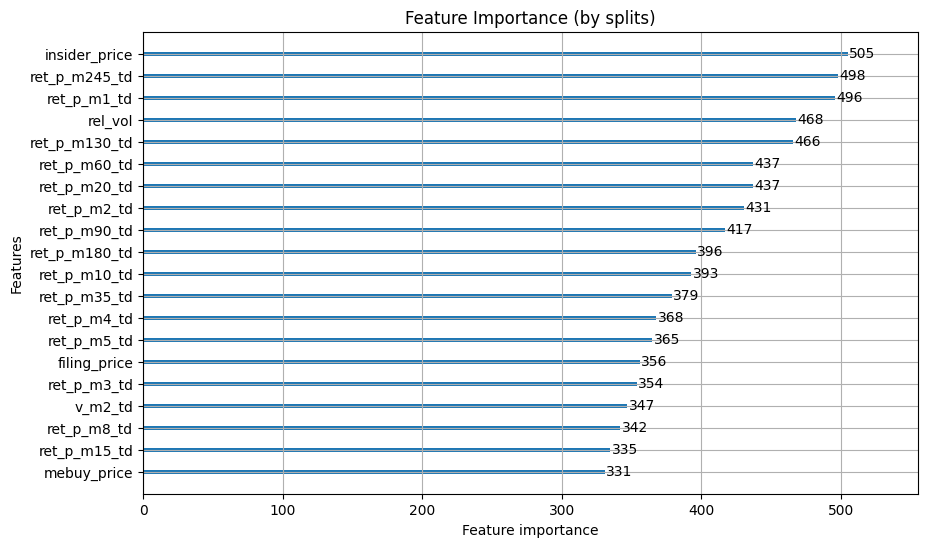

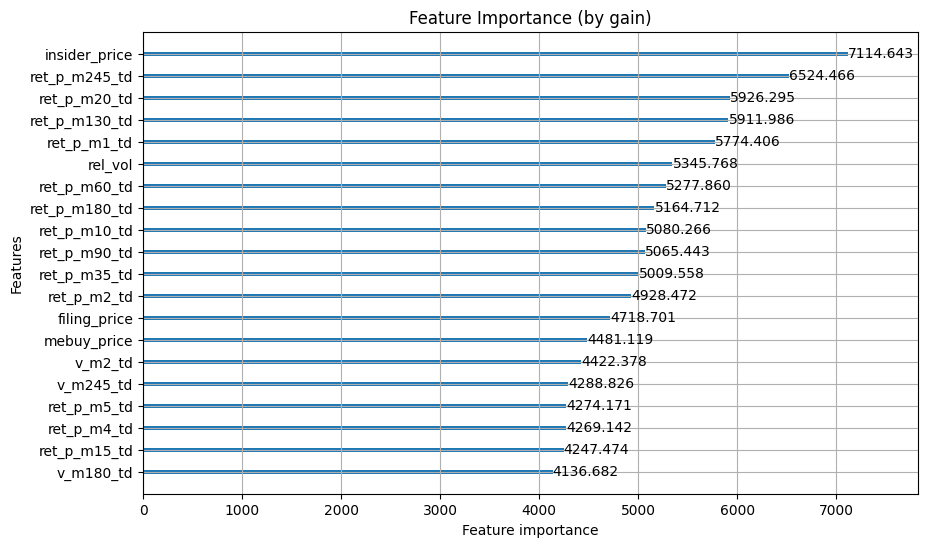

          feature  split_importance  gain_importance
3   insider_price               505      7114.642762
27  ret_p_m245_td               498      6524.465646
21   ret_p_m20_td               437      5926.294567
25  ret_p_m130_td               466      5911.986166
10    ret_p_m1_td               496      5774.406241
9         rel_vol               468      5345.768293
23   ret_p_m60_td               437      5277.859603
26  ret_p_m180_td               396      5164.712000
19   ret_p_m10_td               393      5080.266190
24   ret_p_m90_td               417      5065.443190
22   ret_p_m35_td               379      5009.557521
11    ret_p_m2_td               431      4928.472203
6    filing_price               356      4718.700617
7     mebuy_price               331      4481.119207
29        v_m2_td               347      4422.377909
45      v_m245_td               319      4288.825602
14    ret_p_m5_td               365      4274.171306
13    ret_p_m4_td               368      4269.

In [28]:
import matplotlib.pyplot as plt

# Importance by split count
lgb.plot_importance(gbm, importance_type='split', max_num_features=20, figsize=(10,6))
plt.title("Feature Importance (by splits)")
plt.show()

# Importance by gain (more informative for your case)
lgb.plot_importance(gbm, importance_type='gain', max_num_features=20, figsize=(10,6))
plt.title("Feature Importance (by gain)")
plt.show()

# Or get raw values
importance_df = pd.DataFrame({
    'feature': gbm.feature_name(),
    'split_importance': gbm.feature_importance(importance_type='split'),
    'gain_importance': gbm.feature_importance(importance_type='gain')
}).sort_values('gain_importance', ascending=False)

print(importance_df.head(40))


In [1]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, TimeSeriesSplit

# --- Load data ---
CSV_IN = "oip_mega_wreturns.csv"
model_df = pd.read_csv(CSV_IN)

# --- Parameters ---
days_ahead = 5
target_col = f"ret_p_p{days_ahead}_td"
numeric_target_col = f"{target_col}_orig"

# Keep original numeric returns
model_df[numeric_target_col] = model_df[target_col]

# Binary target
model_df[target_col] = (model_df[target_col] > 0).astype(int)

# --- Feature engineering ---
df = model_df.copy()

# Rolling volatility (past return cols)
for col in [c for c in df.columns if c.startswith("ret_p_m") and "_td" in c]:
    roll_std = df[col].rolling(window=20, min_periods=5).std()
    df[f"{col}_vol20"] = roll_std
    df[f"{col}_adj"] = df[col] / (roll_std + 1e-9)

# Relative volume
past_vol_cols = [c for c in df.columns if c.startswith("v_m") and "_td" in c]
if past_vol_cols:
    df["avg_vol_20"] = df[past_vol_cols[:20]].mean(axis=1)
    df["rel_vol"] = df["v_m1_td"] / (df["avg_vol_20"] + 1e-6)
else:
    df["rel_vol"] = np.nan

# Momentum × Relative Volume
for col in [c for c in df.columns if c.startswith("ret_p_m") and "_td" in c]:
    df[f"{col}_x_relvol"] = df[col] * df["rel_vol"]

# Breakout flags without fragmentation
price_cols = [c for c in df.columns if c.startswith("p_m") and "_td" in c]

new_cols = {}

for col in price_cols:
    roll_max = df[col].rolling(window=20, min_periods=5).max()
    roll_min = df[col].rolling(window=20, min_periods=5).min()
    new_cols[f"{col}_breakout"] = np.where(
        df[col] > roll_max.shift(1), 1,
        np.where(df[col] < roll_min.shift(1), -1, 0)
    )

# Concatenate all at once to avoid fragmentation
df = pd.concat([df, pd.DataFrame(new_cols, index=df.index)], axis=1)

import re

# --- Final feature list (STRICT FILTER) ---
exclude_patterns = [
    target_col,
    numeric_target_col,
    r"^p_p\d+_td$",           # future price change
    r"^ret_p_p\d+_td$",       # future return
    r"^v_p\d+_td$",           # future volume change
    #r"^ret_p_m\d+_td$",       # past return (optional, remove if you want to keep)
    #r"^p_m\d+_td$",           # past price change (optional, remove if you want to keep)
    #r"^v_m\d+_td$",           # past volume change (optional, remove if you want to keep)
]

def keep_feature(f):
    # Exclude if matches any regex pattern
    for pat in exclude_patterns:
        if re.search(pat, f):
            return False
    return f not in [
        "filing_date", "trade_date", "ticker", "company_name",
        "insider_name", "title", "trade_type", "mebuydate"
    ]

features = [f for f in df.columns if keep_feature(f)]

# Keep only numeric/bool
df_clean = df.dropna(subset=[target_col] + features)
df_clean = df_clean[[*features, target_col]].select_dtypes(include=[np.number, bool])

# --- Time-series split ---
tscv = TimeSeriesSplit(n_splits=5)
train_idx, test_idx = list(tscv.split(df_clean))[-1]
X_train, X_test = (
    df_clean.iloc[train_idx].drop(columns=[target_col]),
    df_clean.iloc[test_idx].drop(columns=[target_col])
)
y_train, y_test = (
    df_clean.iloc[train_idx][target_col],
    df_clean.iloc[test_idx][target_col]
)

# --- LightGBM ---
model = LGBMClassifier(
    objective="binary",
    boosting_type="gbdt",
    learning_rate=0.02,
    num_leaves=31,
    n_estimators=2000,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

print("Training LightGBM...")
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric="auc", callbacks=[])

# --- Predictions ---
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_prob):.4f}")

# --- Feature importance ---
feat_imp = pd.DataFrame({
    "feature": X_train.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)
print("\nTop 20 Features by Importance:")
print(feat_imp.head(20))



Training LightGBM...
[LightGBM] [Info] Number of positive: 26960, number of negative: 29391
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.139994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39333
[LightGBM] [Info] Number of data points in the train set: 56351, number of used features: 174
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478430 -> initscore=-0.086334
[LightGBM] [Info] Start training from score -0.086334

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.66      0.55      5405
           1       0.50      0.31      0.38      5865

    accuracy                           0.48     11270
   macro avg       0.49      0.49      0.47     11270
weighted avg       0.49      0.48      0.46     11270

ROC AUC: 0.4676

Top 20 Features by Importance:
                feature  importance
88   ret_p_m35_td_vol20         726
3         in

C:\Users\John DeForest\AppData\Local\Temp\ipykernel_18276\2984166835.py:17: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


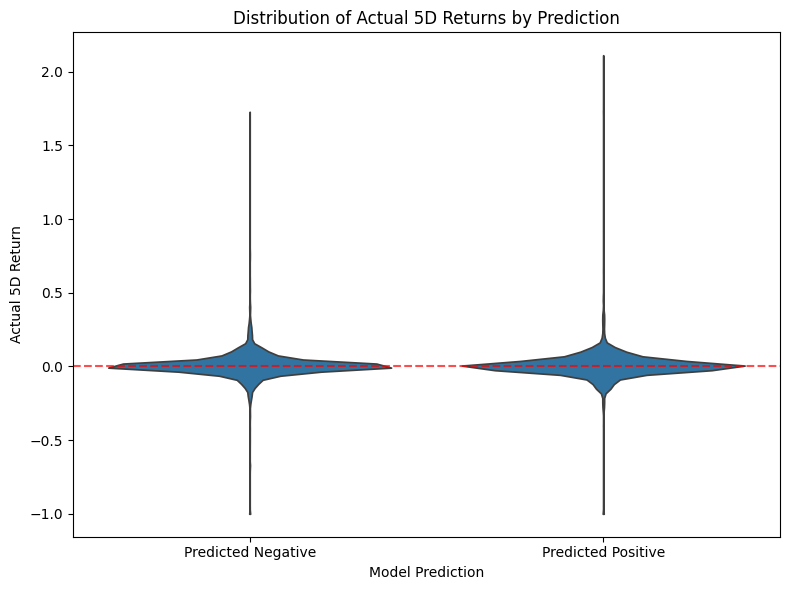

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Combine predictions with actual numeric returns ---
plot_df = df_clean.iloc[test_idx].copy()
plot_df["predicted_positive"] = y_pred
plot_df = df_clean.iloc[test_idx].copy()
plot_df["predicted_positive"] = y_pred

# Pull numeric returns directly from model_df
plot_df["actual_return_5d"] = model_df.iloc[plot_df.index][numeric_target_col]


# --- Plot violin distributions ---
plt.figure(figsize=(8, 6))
sns.violinplot(
    x="predicted_positive",
    y="actual_return_5d",
    data=plot_df,
    inner=None,  # removes the mini-boxplot
    scale="width",  # consistent widths
    cut=0           # don't extend beyond min/max
)
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.xticks([0, 1], ["Predicted Negative", "Predicted Positive"])
plt.title("Distribution of Actual 5D Returns by Prediction")
plt.ylabel("Actual 5D Return")
plt.xlabel("Model Prediction")
plt.tight_layout()
plt.show()


In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# --- SHAP Values ---
print("\nCalculating SHAP values...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


Calculating SHAP values...


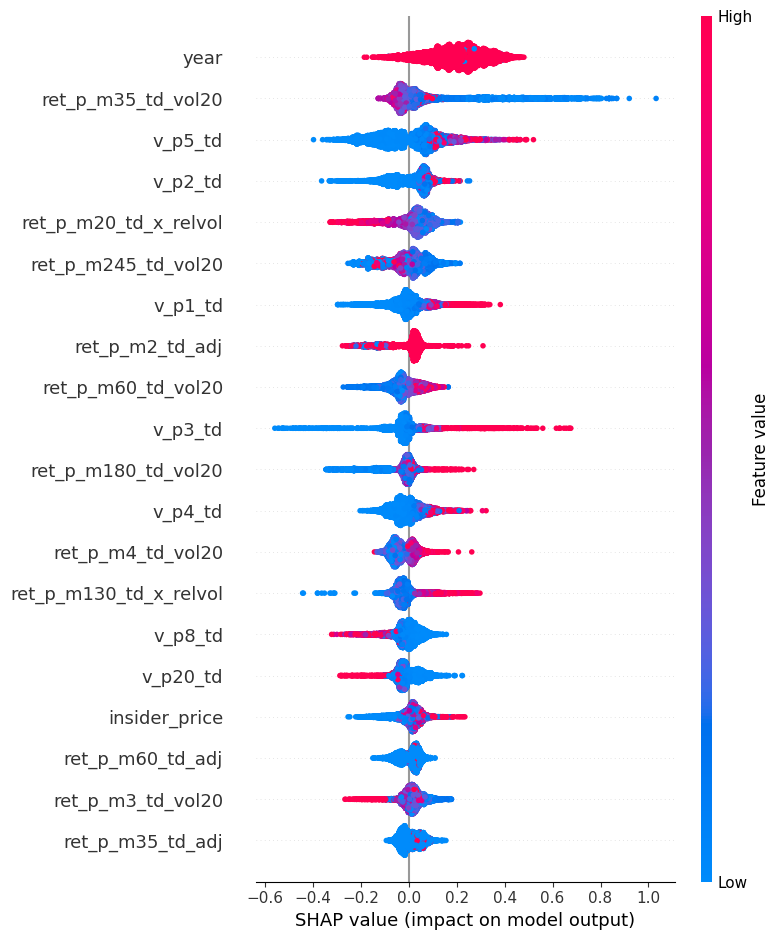

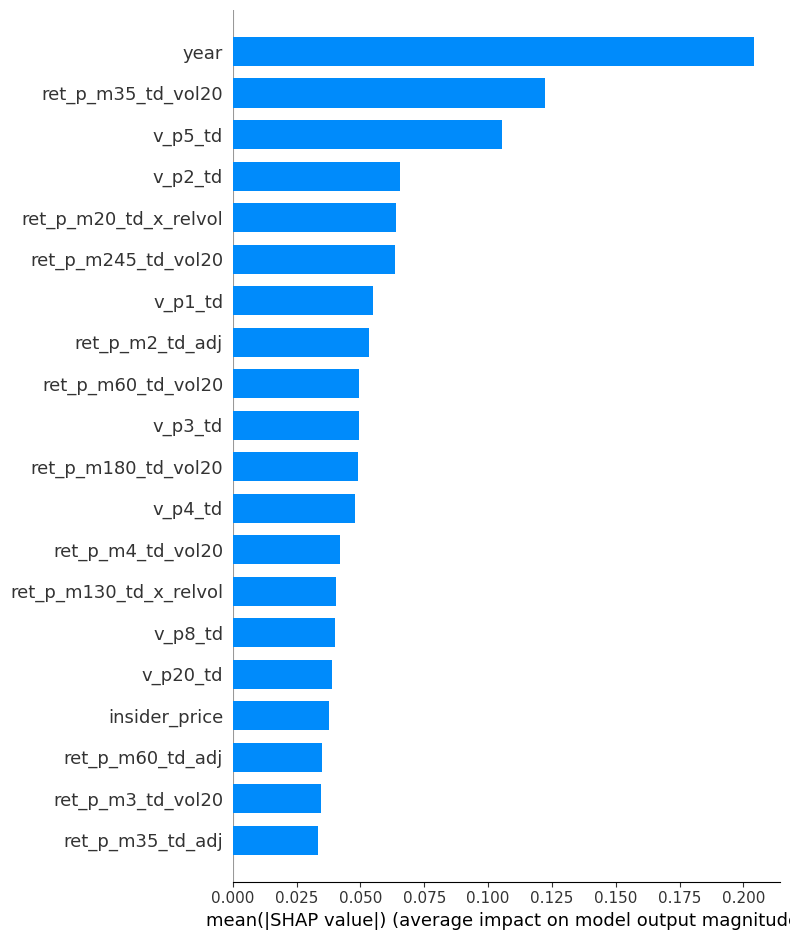

Top 5 features: ['year', 'ret_p_m35_td_vol20', 'v_p5_td', 'v_p2_td', 'ret_p_m20_td_x_relvol']


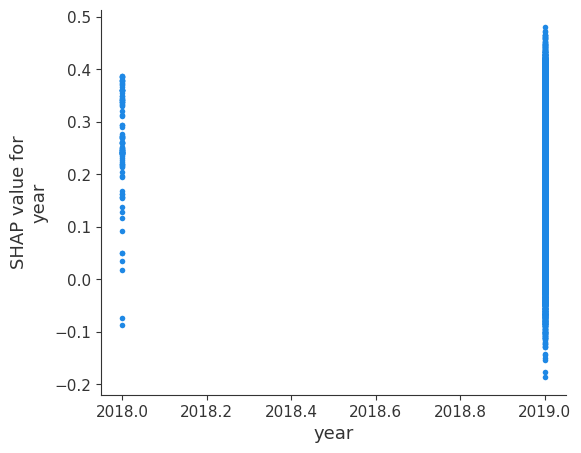

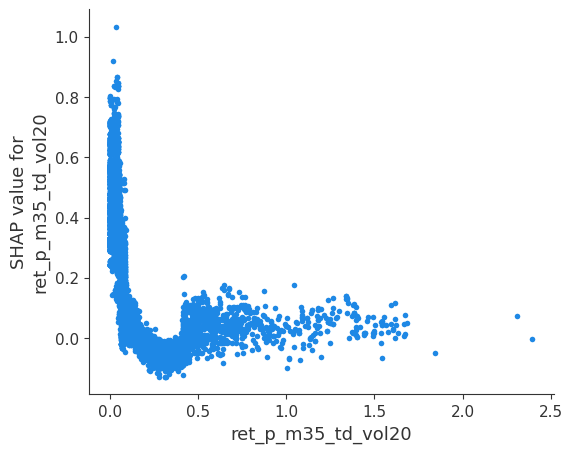

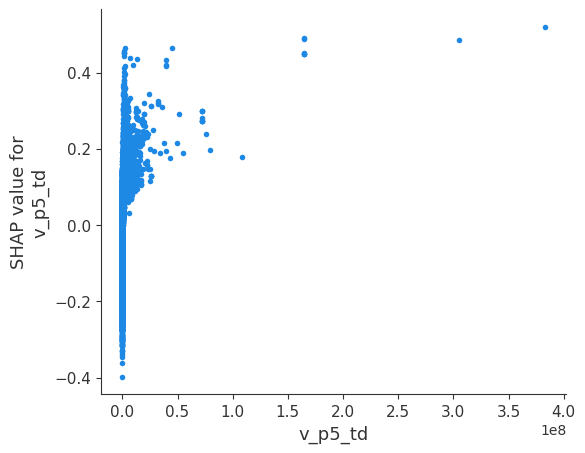

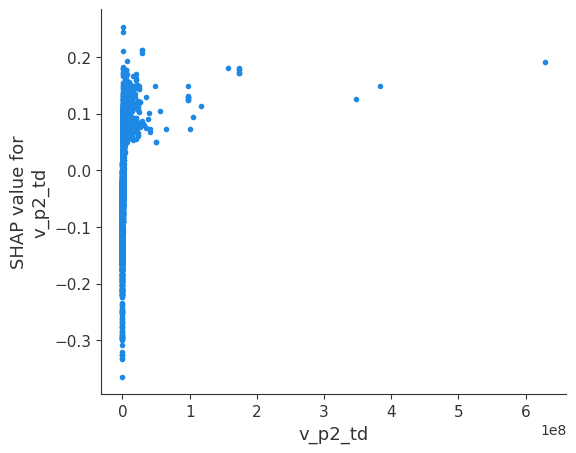

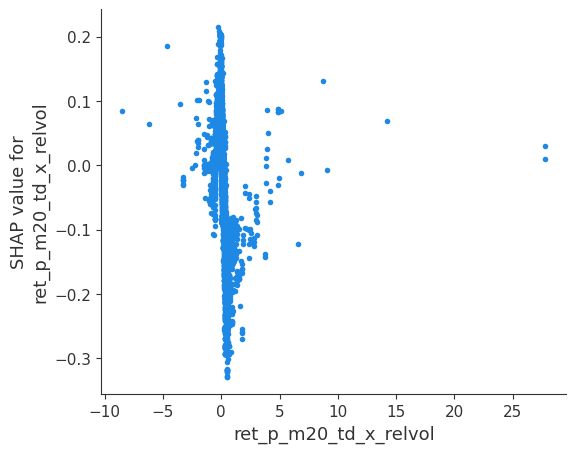

In [ ]:
# If it's a list (multi-class style), pick index 1 for positive class
if isinstance(shap_values, list):
    shap_matrix = shap_values[1]
else:
    shap_matrix = shap_values  # already 2D array (n_samples, n_features)

# Summary plot (top features)
shap.summary_plot(shap_matrix, X_test, max_display=20)

# Bar plot (feature importance by mean abs shap)
shap.summary_plot(shap_matrix, X_test, plot_type="bar", max_display=20)

# Dependence plots for top 5 features
import numpy as np
mean_abs_shap = np.abs(shap_matrix).mean(axis=0)
top5_idx = np.argsort(mean_abs_shap)[-5:][::-1]
top5_features = X_test.columns[top5_idx]
print("Top 5 features:", top5_features.tolist())

for feat in top5_features:
    shap.dependence_plot(feat, shap_matrix, X_test, interaction_index=None)

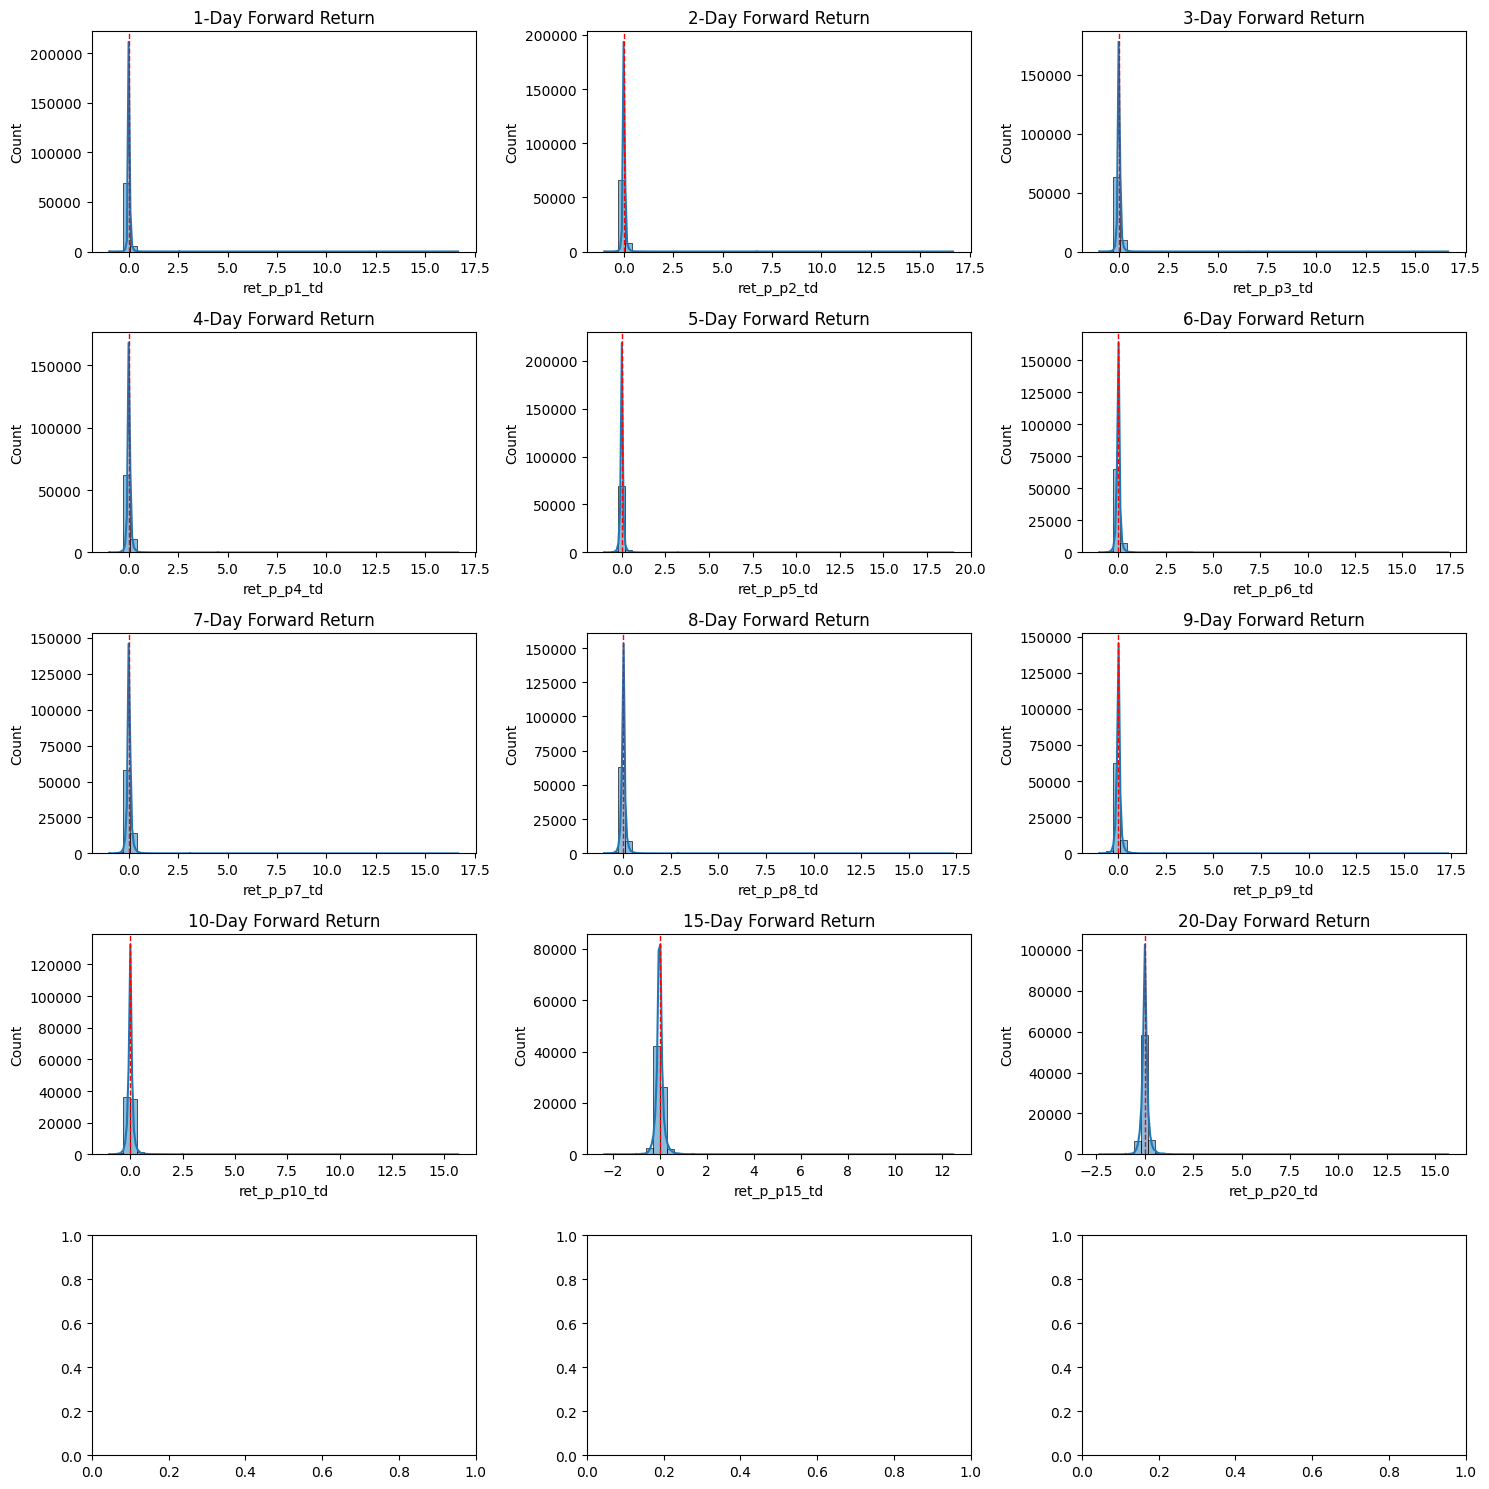

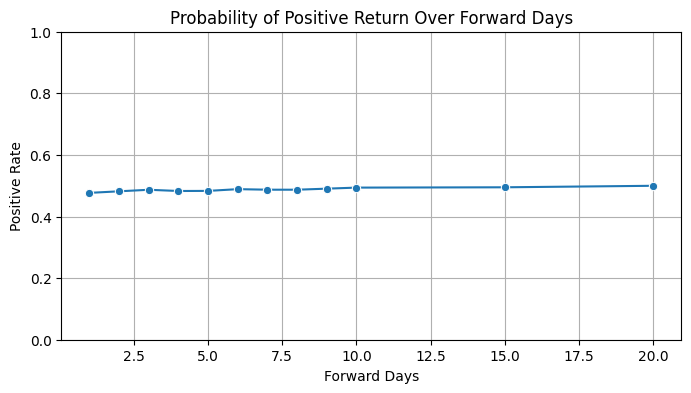

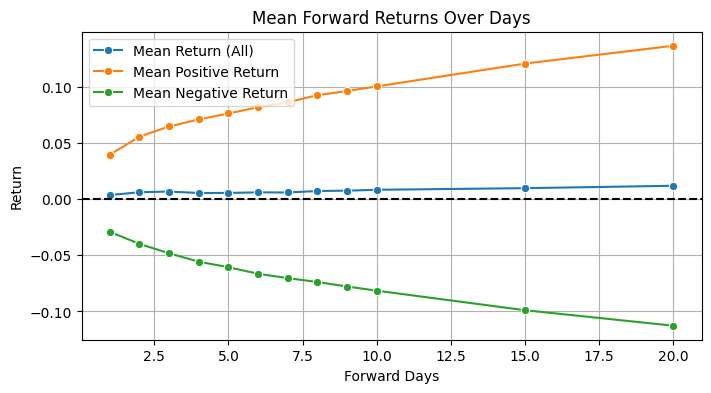

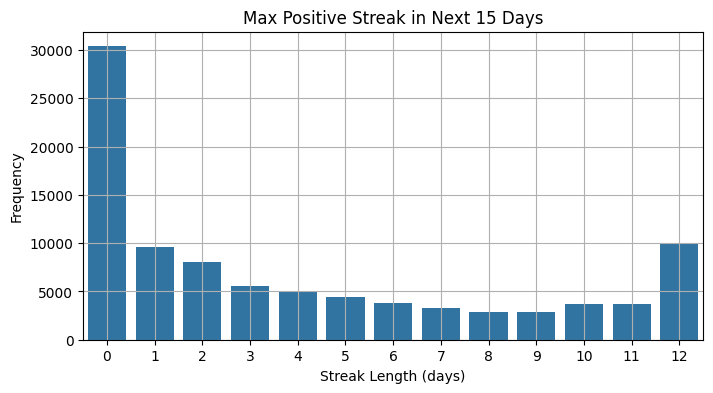

day  mean_return  median_return  std_return  positive_rate  positive_mean  \
11   20     0.011845            0.0    0.235689       0.499790       0.136486   
10   15     0.009727            0.0    0.223524       0.494898       0.120601   
9    10     0.008283            0.0    0.196599       0.493868       0.100300   
8     9     0.007503            0.0    0.189622       0.490473       0.096148   
5     6     0.006000            0.0    0.172007       0.488860       0.081781   
6     7     0.005875            0.0    0.168964       0.487100       0.086125   
7     8     0.007182            0.0    0.179812       0.487041       0.092481   
2     3     0.006705            0.0    0.187795       0.486841       0.064638   
4     5     0.005474            0.0    0.159230       0.483200       0.076170   
3     4     0.005420            0.0    0.167730       0.482879       0.070892   
1     2     0.006104            0.0    0.192325       0.481874       0.055572   
0     1     0.003579            0.0    0.120358       0.476798       0.039473   

    negative_mean       skew     kurtosis  
11      -0.112691  11.024527   427.329544  
10      -0.098907  15.811877   661.938062  
9       -0.081504  22.619103  1374.996018  
8       -0.077826  24.141636  1609.360999  
5       -0.066477  24.122498  1732.693168  
6       -0.070338  21.253407  1544.139276  
7       -0.073806  23.034170  1676.010738  
2       -0.048257  31.509030  1587.021900  
4       -0.060626  29.980694  2898.582190  
3       -0.055717  26.952203  1741.254557  
1       -0.039902  37.379206  2023.505921  
0       -0.029131  67.540616  8328.038103

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('oip_mega_wreturns.csv')
# Assuming df_clean already has columns like ret_p_p1_td, ret_p_p2_td, ..., ret_p_p15_td
forward_days = [1,2,3,4,5,6,7,8,9,10,15,20]

# Collect stats
stats_list = []
for d in forward_days:
    col = f"ret_p_p{d}_td"
    if col not in df.columns:
        continue

    returns = df[col].dropna()
    positive_mask = returns > 0

    stats_list.append({
        "day": d,
        "mean_return": returns.mean(),
        "median_return": returns.median(),
        "std_return": returns.std(),
        "positive_rate": positive_mask.mean(),
        "positive_mean": returns[positive_mask].mean() if positive_mask.any() else np.nan,
        "negative_mean": returns[~positive_mask].mean() if (~positive_mask).any() else np.nan,
        "skew": returns.skew(),
        "kurtosis": returns.kurt()
    })

stats_df = pd.DataFrame(stats_list)

# --- Plot distributions for each day ---
fig, axes = plt.subplots(5, 3, figsize=(15, 15), sharex=False, sharey=False)
axes = axes.flatten()

for i, d in enumerate(forward_days):
    col = f"ret_p_p{d}_td"
    if col in df.columns:
        sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
        axes[i].axvline(0, color="red", linestyle="--", linewidth=1)
        axes[i].set_title(f"{d}-Day Forward Return")
plt.tight_layout()
plt.show()

# --- Plot positive rate over days ---
plt.figure(figsize=(8, 4))
sns.lineplot(data=stats_df, x="day", y="positive_rate", marker="o")
plt.title("Probability of Positive Return Over Forward Days")
plt.ylabel("Positive Rate")
plt.xlabel("Forward Days")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# --- Plot mean return (all, pos-only, neg-only) ---
plt.figure(figsize=(8, 4))
sns.lineplot(data=stats_df, x="day", y="mean_return", marker="o", label="Mean Return (All)")
sns.lineplot(data=stats_df, x="day", y="positive_mean", marker="o", label="Mean Positive Return")
sns.lineplot(data=stats_df, x="day", y="negative_mean", marker="o", label="Mean Negative Return")
plt.axhline(0, color="black", linestyle="--")
plt.title("Mean Forward Returns Over Days")
plt.ylabel("Return")
plt.xlabel("Forward Days")
plt.legend()
plt.grid(True)
plt.show()

# --- Streak analysis ---
def compute_streaks(row):
    streaks = []
    current_streak = 0
    for d in forward_days:
        if row[f"ret_p_p{d}_td"] > 0:
            current_streak += 1
        else:
            if current_streak > 0:
                streaks.append(current_streak)
            current_streak = 0
    if current_streak > 0:
        streaks.append(current_streak)
    return max(streaks) if streaks else 0

df["max_up_streak_15d"] = df.apply(compute_streaks, axis=1)

# Histogram of longest positive streaks
plt.figure(figsize=(8, 4))
sns.countplot(x="max_up_streak_15d", data=df)
plt.title("Max Positive Streak in Next 15 Days")
plt.xlabel("Streak Length (days)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# --- Final stats table sorted by positive_rate ---
stats_df.sort_values("positive_rate", ascending=False)


Dropped 25347 rows due to missing lookback data; remaining 67945 rows.
Dropped 333 rows due to missing forward ret_p_p1..p10 data; remaining 67612 rows.
Number of features after excluding future cols: 64
Target distribution (pos rate):
any_pos_next10
1    0.810625
0    0.189375
Name: proportion, dtype: float64
Train shape: (54089, 64) Test shape: (13523, 64)
              precision    recall  f1-score   support

           0       0.63      0.02      0.03      2727
           1       0.80      1.00      0.89     10796

    accuracy                           0.80     13523
   macro avg       0.72      0.51      0.46     13523
weighted avg       0.77      0.80      0.72     13523

ROC AUC: 0.5030956303608626


C:\Users\John DeForest\AppData\Local\Temp\ipykernel_10620\3839496360.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=fi, palette="viridis")


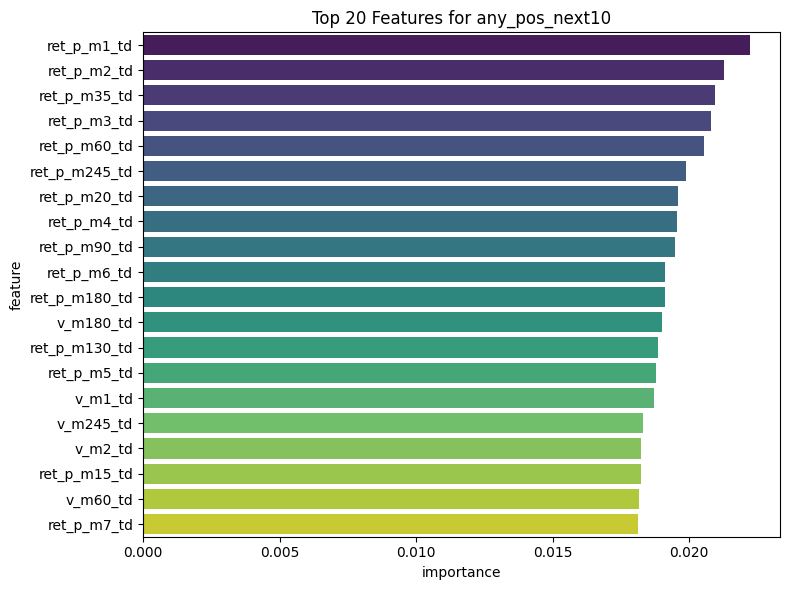

In [2]:
import re
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Config ---
CSV_IN = "oip_mega_wreturns.csv"
x_days = 10

# --- Load ---
df = pd.read_csv(CSV_IN)
original_row_count = len(df)

# --- Forward columns (target lookahead) ---
forward_cols = [f"ret_p_p{i}_td" for i in range(1, x_days+1)]
forward_cols = [c for c in forward_cols if c in df.columns]
if len(forward_cols) != x_days:
    raise ValueError(f"Expected {x_days} forward columns but found {len(forward_cols)}: {forward_cols}")

# --- Lookback columns (must be present, drop rows missing these) ---
lookback_cols = [c for c in df.columns if (c.startswith("p_m") or c.startswith("v_m") or c.startswith("ret_p_m")) and "_td" in c]
if len(lookback_cols) == 0:
    raise ValueError("No lookback columns found (p_m*, v_m*, ret_p_m*).")

df = df.dropna(subset=lookback_cols)
print(f"Dropped {original_row_count - len(df)} rows due to missing lookback data; remaining {len(df)} rows.")

# --- Build target: any positive return in next x days ---
df["any_pos_next10"] = df[forward_cols].gt(0).any(axis=1)

# --- Drop rows missing any of the first x forward returns (you requested this) ---
before_forward_drop = len(df)
df = df.dropna(subset=forward_cols)
print(f"Dropped {before_forward_drop - len(df)} rows due to missing forward ret_p_p1..p{ x_days } data; remaining {len(df)} rows.")

# --- Build feature list: exclude any future-looking columns (regex) and metadata ---
# Regex patterns to exclude future-looking features (p_p*, ret_p_p*, v_p*)
future_regex = [r"^p_p\d+_td$", r"^ret_p_p\d+_td$", r"^v_p\d+_td$"]

# Static columns to exclude
meta_exclude = {
    "filing_date", "trade_date", "ticker", "company_name",
    "insider_name", "title", "trade_type", "mebuydate",
    "any_pos_next10"  # exclude target
}

def is_future_col(col):
    for pat in future_regex:
        if re.match(pat, col):
            return True
    return False

# Keep past returns/vols/prices (p_m*, v_m*, ret_p_m*) and other engineered features,
# but exclude *any* future p_p*, ret_p_p*, v_p*.
candidate_features = [c for c in df.columns if c not in meta_exclude and not is_future_col(c)]

# Ensure we didn't accidentally keep forward columns:
candidate_features = [c for c in candidate_features if c not in forward_cols]

# Keep only numeric/bool columns
X_all = df[candidate_features].select_dtypes(include=[np.number, bool])

# Final feature list (columns actually used)
features = list(X_all.columns)
print(f"Number of features after excluding future cols: {len(features)}")

# Sanity check: assert no forward cols in features
assert not any(re.match(r"^ret_p_p\d+_td$", f) or re.match(r"^p_p\d+_td$", f) or re.match(r"^v_p\d+_td$", f) for f in features), \
    "Forward-looking columns still present in features! Aborting."

# --- Prepare X, y ---
X = X_all.copy()
y = df["any_pos_next10"].astype(int)

# Show class balance
print("Target distribution (pos rate):")
print(y.value_counts(normalize=True))

# --- Train/test split (time-ordered) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# --- Quick model ---
model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# --- Eval ---
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# --- Feature importance (top 20) ---
fi = pd.DataFrame({"feature": X.columns, "importance": model.feature_importances_})
fi = fi.sort_values("importance", ascending=False).head(20)

plt.figure(figsize=(8, 6))
sns.barplot(x="importance", y="feature", data=fi, palette="viridis")
plt.title(f"Top 20 Features for any_pos_next{x_days}")
plt.tight_layout()
plt.show()


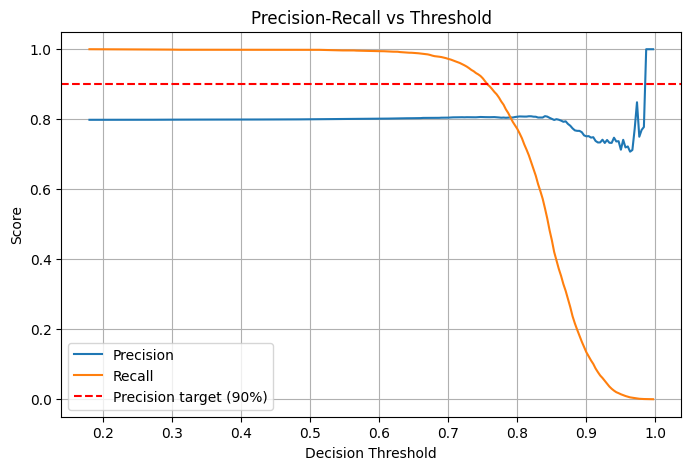

Best threshold for ≥90% precision: 0.99

Classification Report (custom threshold):
              precision    recall  f1-score   support

           0      0.202     1.000     0.336      2727
           1      1.000     0.000     0.001     10796

    accuracy                          0.202     13523
   macro avg      0.601     0.500     0.168     13523
weighted avg      0.839     0.202     0.068     13523



In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# --- Class weighting: penalize false positives heavily ---
# If 1 is positive, give it lower weight so the model avoids predicting it unless confident
# Example: make negatives cost 3x more when misclassified
class_weights = {0: 3, 1: 1}

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight=class_weights
)

rf.fit(X_train, y_train)

# --- Predict probabilities ---
y_proba = rf.predict_proba(X_test)[:, 1]

# --- Precision-recall curve ---
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Plot
plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.axhline(0.9, color='r', linestyle='--', label='Precision target (90%)')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# --- Pick threshold for high precision ---
target_precision = 0.90
best_idx = np.where(precisions >= target_precision)[0][0]
best_threshold = thresholds[best_idx]
print(f"Best threshold for ≥{target_precision*100:.0f}% precision: {best_threshold:.2f}")

# --- Apply threshold ---
y_pred_custom = (y_proba >= best_threshold).astype(int)

print("\nClassification Report (custom threshold):")
print(classification_report(y_test, y_pred_custom, digits=3))


In [4]:
from sklearn.metrics import classification_report, confusion_matrix
# Pick your manual threshold
threshold = 0.6
# Convert probabilities to binary predictions
y_pred_custom = (y_proba >= threshold).astype(int)
# Evaluate
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom, digits=3))


[[   66  2661]
 [   60 10736]]
              precision    recall  f1-score   support

           0      0.524     0.024     0.046      2727
           1      0.801     0.994     0.888     10796

    accuracy                          0.799     13523
   macro avg      0.663     0.509     0.467     13523
weighted avg      0.745     0.799     0.718     13523



a
a1
a2
a3
a4
Optimal hold distribution:
optimal_hold
1     0.222662
2     0.114130
3     0.091214
4     0.057326
5     0.083601
6     0.072255
7     0.059192
8     0.059043
9     0.092185
10    0.148391
Name: proportion, dtype: float64
a6
a7
Hold model train shape: (10717, 64) test shape: (2680, 64)
a9
Hold Duration Classification Report:
              precision    recall  f1-score   support

           1       0.15      0.75      0.25       308
           2       0.12      0.06      0.08       193
           3       0.00      0.00      0.00       347
           4       0.20      0.01      0.02       128
           5       0.00      0.00      0.00       272
           6       0.05      0.08      0.06       211
           7       0.20      0.01      0.01       198
           8       0.00      0.00      0.00       143
           9       0.38      0.04      0.07       337
          10       0.27      0.29      0.28       543

    accuracy                           0.16      2680
   macro

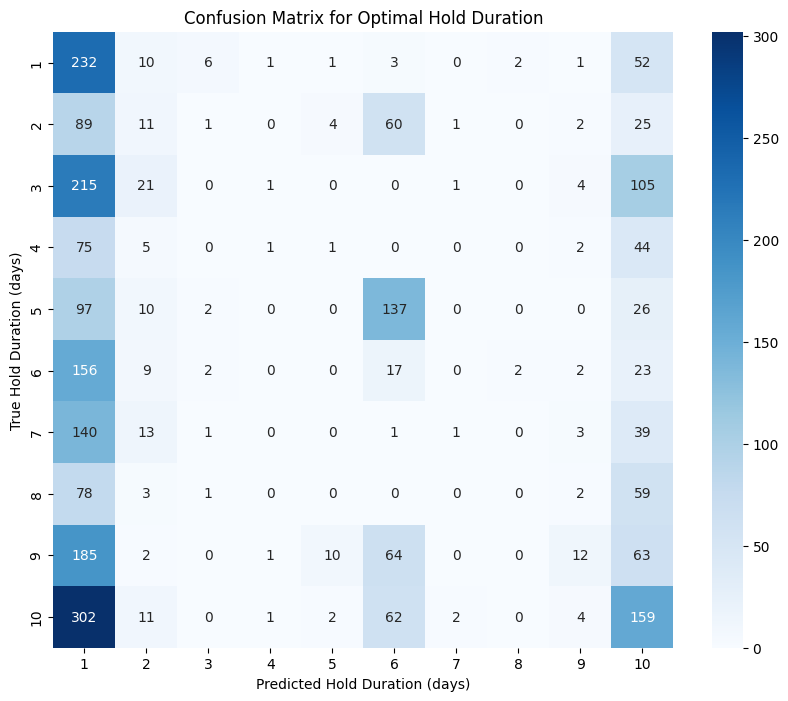

C:\Users\John DeForest\AppData\Local\Temp\ipykernel_10620\1437344635.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=fi_hold, palette="viridis")


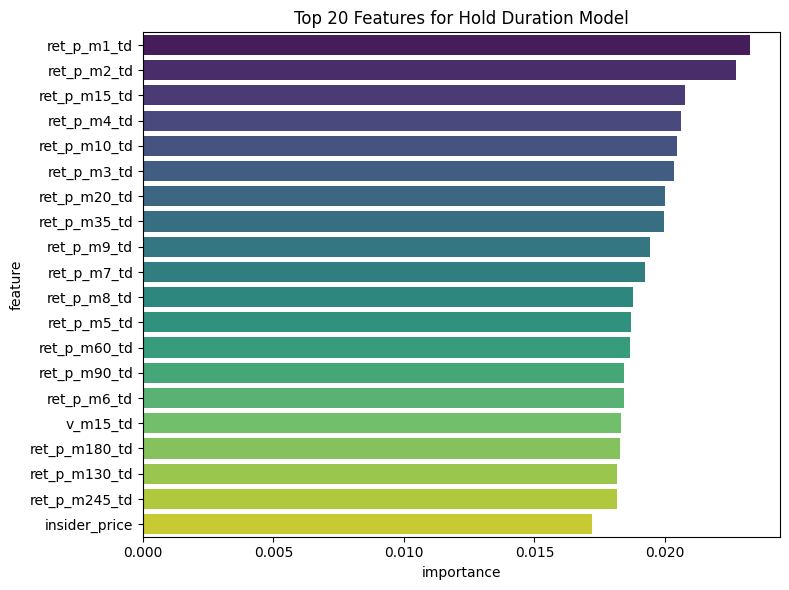

In [5]:
#import re
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np

# --- 1. Add 'predicted_positive' to the original df (using your threshold 0.6 on test set) ---

# Create empty column first
df['predicted_positive'] = 0
print('a')
# Map indices of X_test back to original df index for predicted positives
# We kept X_test as subset of df rows after dropping missing etc., so indices align:
test_indices = X_test.index
print('a1')

# Assign predictions with threshold 0.6
df.loc[test_indices, 'predicted_positive'] = (y_proba >= 0.6).astype(int)
print('a2')

# --- 2. Create optimal hold duration target on predicted_positive rows ---

# Filter rows predicted positive (for target calculation)
df_pos = df[df['predicted_positive'] == 1].copy()
print('a3')

# Extract forward return columns (already defined as forward_cols)
# Find the hold day (1 to x_days) with max return
df_pos['optimal_hold'] = df_pos[forward_cols].idxmax(axis=1)
print('a4')

# Convert e.g. 'ret_p_p3_td' to int 3
df_pos['optimal_hold'] = df_pos['optimal_hold'].str.extract(r'ret_p_p(\d+)_td').astype(int)

print(f"Optimal hold distribution:\n{df_pos['optimal_hold'].value_counts(normalize=True).sort_index()}")

# --- 3. Prepare features and target for multiclass model ---

# Use same feature set as original model, but only rows where predicted_positive==1
features = X.columns
print('a6')

X_hold = df_pos.loc[:, features]
y_hold = df_pos['optimal_hold']
print('a7')

# --- 4. Train/test split again for hold model (time ordered) ---

X_hold_train, X_hold_test, y_hold_train, y_hold_test = train_test_split(
    X_hold, y_hold, test_size=0.2, shuffle=False
)

print("Hold model train shape:", X_hold_train.shape, "test shape:", X_hold_test.shape)

# --- 5. Train multiclass RandomForestClassifier for hold duration ---

hold_clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
hold_clf.fit(X_hold_train, y_hold_train)
print('a9')
# --- 6. Evaluate hold model ---

y_hold_pred = hold_clf.predict(X_hold_test)

print("Hold Duration Classification Report:")
print(classification_report(y_hold_test, y_hold_pred))

# Confusion matrix
cm = confusion_matrix(y_hold_test, y_hold_pred, labels=range(1, x_days + 1))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(1, x_days + 1),
            yticklabels=range(1, x_days + 1))
plt.xlabel("Predicted Hold Duration (days)")
plt.ylabel("True Hold Duration (days)")
plt.title("Confusion Matrix for Optimal Hold Duration")
plt.show()

# --- Optional: Feature importances ---

fi_hold = pd.DataFrame({
    "feature": features,
    "importance": hold_clf.feature_importances_
}).sort_values(by="importance", ascending=False).head(20)

plt.figure(figsize=(8, 6))
sns.barplot(x="importance", y="feature", data=fi_hold, palette="viridis")
plt.title("Top 20 Features for Hold Duration Model")
plt.tight_layout()
plt.show()


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Train-test split same as before, using X_hold and y_hold (now continuous target)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_hold, y_hold, test_size=0.2, shuffle=False
)

reg = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
reg.fit(X_train_reg, y_train_reg)

y_pred_reg = reg.predict(X_test_reg)

print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))

# Optionally round predictions to nearest int day
y_pred_rounded = np.round(y_pred_reg).astype(int)

# Clamp predictions to valid range
y_pred_rounded = np.clip(y_pred_rounded, 1, x_days)

# Classification report if you want to see discrete accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test_reg, y_pred_rounded))


MAE: 2.909490671641791
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       308
           2       0.00      0.00      0.00       193
           3       0.00      0.00      0.00       347
           4       0.06      0.20      0.09       128
           5       0.07      0.33      0.12       272
           6       0.07      0.27      0.11       211
           7       0.06      0.04      0.05       198
           8       1.00      0.01      0.01       143
           9       0.00      0.00      0.00       337
          10       0.00      0.00      0.00       543

    accuracy                           0.07      2680
   macro avg       0.13      0.09      0.04      2680
weighted avg       0.07      0.07      0.03      2680



C:\Users\John DeForest\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\John DeForest\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\John DeForest\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assume df, forward_cols, features, X, y already defined as per your setup

# Train one regressor per day to predict ret_p_p{day}_td
models = {}
for day_col in forward_cols:
    y_day = df.loc[X.index, day_col]
    reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    reg.fit(X, y_day)
    models[day_col] = reg

# Pick a subset of test data
X_test_sample = X_test.sample(n=100, random_state=42)

# Monte Carlo parameters
n_simulations = 100
simulated_hold_days = []

for i in range(len(X_test_sample)):
    preds = []
    for day_col in forward_cols:
        base_pred = models[day_col].predict(X_test_sample.iloc[[i]])[0]
        # Add Gaussian noise ~ N(0, stddev) for uncertainty; tune stddev as needed
        noise = np.random.normal(loc=0, scale=0.02, size=n_simulations)
        sims = base_pred + noise
        preds.append(sims)
    # preds shape: (days, simulations)
    preds = np.array(preds)  # shape (days, n_simulations)

    # For each simulation, find day with max return
    hold_days = np.argmax(preds, axis=0) + 1  # +1 since days are 1-indexed
    simulated_hold_days.append(hold_days)

simulated_hold_days = np.array(simulated_hold_days)  # shape (samples, simulations)

# Calculate expected hold day per sample
expected_hold_days = simulated_hold_days.mean(axis=1)

# Visualize expected hold day distribution
plt.hist(expected_hold_days, bins=np.arange(1, x_days+2)-0.5, edgecolor='k')
plt.xlabel('Expected Hold Duration (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Expected Hold Duration Across Test Samples')
plt.show()

# Optional: compare expected_hold_days to true optimal hold day for samples where available
true_hold_days = df.loc[X_test_sample.index, forward_cols].idxmax(axis=1).str.extract(r'ret_p_p(\d+)_td').astype(int)
true_hold_days = true_hold_days[0]

plt.scatter(true_hold_days, expected_hold_days, alpha=0.5)
plt.xlabel('True Hold Duration')
plt.ylabel('Expected Hold Duration')
plt.title('Monte Carlo Predicted vs True Hold Duration')
plt.plot([1, x_days], [1, x_days], 'r--')
plt.show()


KeyboardInterrupt: 

C:\Users\John DeForest\AppData\Local\Temp\ipykernel_20656\3801810629.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price_data = yf.download(random_ticker, start='2022-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed

Random ticker selected: ABG


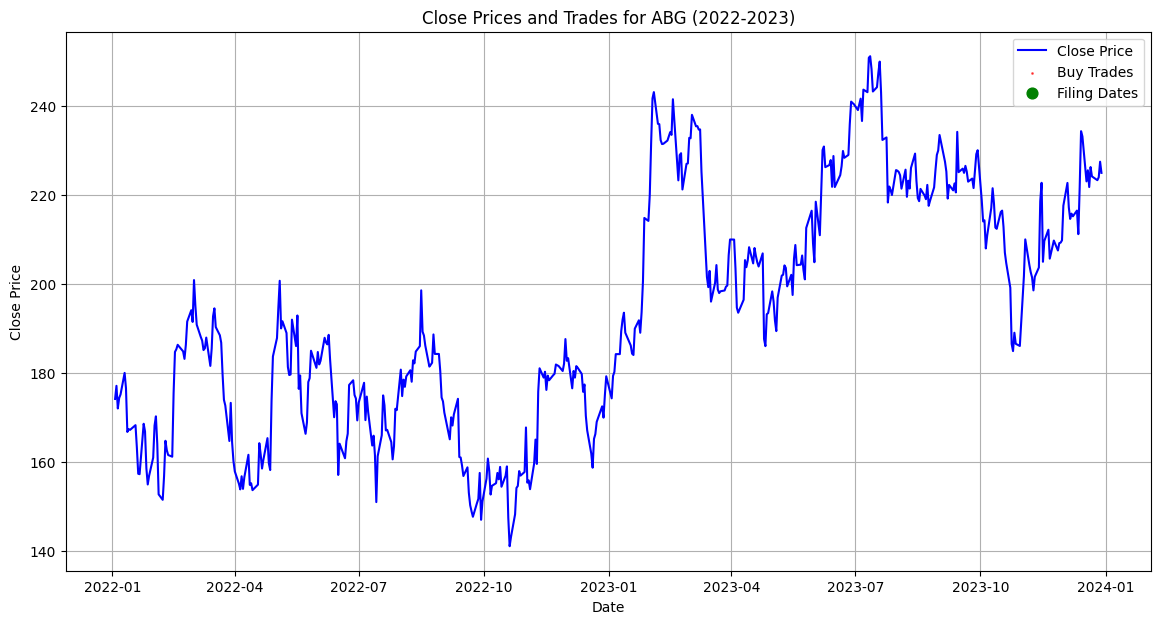

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import random

# Load your mega CSV
df = pd.read_csv("oip_mega_wreturns.csv", parse_dates=['trade_date', 'filing_date'])

# Pick a random ticker
random_ticker = random.choice(df['ticker'].unique())
print("Random ticker selected:", random_ticker)

# Filter df for this ticker and dates of interest
df_ticker = df[(df['ticker'] == random_ticker) &
               (df['trade_date'] >= '2022-01-01') & (df['trade_date'] <= '2023-12-31')]

# Download daily close prices from yfinance
price_data = yf.download(random_ticker, start='2022-01-01', end='2023-12-31')

# Prepare plot
plt.figure(figsize=(14,7))
plt.plot(price_data.index, price_data['Close'], label='Close Price', color='blue')

# Plot buys: red dots on trade_date sized by 'value'
# Make sure 'value' exists and fillna(1) if missing
if 'value' not in df_ticker.columns:
    df_ticker['value'] = 1

plt.scatter(df_ticker['trade_date'], 
            price_data.loc[df_ticker['trade_date'].dt.normalize(), 'Close'].values,
            s=df_ticker['value']*.01,  # scale size for visibility
            color='red', alpha=0.6,
            label='Buy Trades')

# Plot filing_date: green dots at close price on filing_date
filing_dates = df_ticker['filing_date'].dropna().unique()
filing_dates = pd.to_datetime(filing_dates)
filing_dates = filing_dates[(filing_dates >= pd.Timestamp('2022-01-01')) & (filing_dates <= pd.Timestamp('2023-12-31'))]

filing_prices = price_data.loc[price_data.index.isin(filing_dates), 'Close']

plt.scatter(filing_prices.index, filing_prices.values,
            color='green', label='Filing Dates', s=60)

# Draw red vertical lines from each trade_date dot to filing_date dot
for _, row in df_ticker.iterrows():
    td = row['trade_date']
    fd = row['filing_date']
    if pd.isna(fd):
        continue
    # Make sure dates exist in price_data index
    if td in price_data.index and fd in price_data.index:
        plt.plot([td, fd], 
                 [price_data.loc[td, 'Close'], price_data.loc[fd, 'Close']],
                 color='black', linestyle='-', alpha=0.5)

plt.title(f"Close Prices and Trades for {random_ticker} (2022-2023)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()
for idx, row in df_ticker.iterrows():
    trade_date = row['trade_date']
    val = row.get('value', np.nan)  # get 'value' or NaN if missing
    if trade_date in price_data.index:
        buy_price = price_data.loc[trade_date, 'Close']
        if isinstance(buy_price, pd.Series):
            buy_price = buy_price.iloc[0]
    else:
        buy_price = np.nan
    print(f"Date: {trade_date.date()}, Insider Price: {buy_price:.2f}, Value: {val}")




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def simulate_pnl(df, ticker, start_date, end_date,hold_dur,plot=True):
    """
    Simulate PnL for insider trades for a single ticker in a date range.
    
    Buys $100 worth of shares at close price 1 trading day after filing_date.
    Sells 3 trading days later at close price.
    
    Params:
    - df: DataFrame with insider trades including columns: ['ticker', 'filing_date']
    - ticker: str, stock ticker symbol
    - start_date: str, 'mm/dd/yyyy'
    - end_date: str, 'mm/dd/yyyy'
    
    Returns:
    - results_df: DataFrame with buy_date, sell_date, buy_price, sell_price, shares, pnl
    - total_pnl: float, sum of all PnLs
    - plot of stock price + buy/sell points connected with colored lines
    """
    # Parse dates
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)
    
    # Filter trades for ticker and filing_date in range
    trades = df[(df['ticker'] == ticker) & 
                (df['filing_date'] >= start) & 
                (df['filing_date'] <= end)].copy()
    trades = trades.dropna(subset=['filing_date'])
    
    if trades.empty:
        print("No trades found in given date range for ticker", ticker)
        return None, 0.0
    
    # Download price data for the date range plus some buffer for 4 days after end_date
    price_start = start - pd.Timedelta(days=5)
    price_end = end + pd.Timedelta(days=10)
    price_data = yf.download(ticker, start=price_start.strftime('%Y-%m-%d'), end=price_end.strftime('%Y-%m-%d'),auto_adjust=True)
    price_data = price_data[['Close']]
    price_data.index = pd.to_datetime(price_data.index)
    
    results = []
    
    # For each filing_date, find buy_date = filing_date + 1 trading day, sell_date = buy_date + 3 trading days
    for _, row in trades.iterrows():
        fd = row['filing_date']
        
        # Find buy date: next trading day after filing_date
        future_prices = price_data.loc[fd + pd.Timedelta(days=1):]
        if future_prices.empty:
            # No price data after filing_date
            continue
        
        buy_date = future_prices.index[0]
        
        # Sell date = buy_date + 3 trading days
        sell_range = price_data.loc[buy_date:]
        if len(sell_range) < hold_dur+1:
            # Not enough days to sell 3 days later
            continue
        
        sell_date = sell_range.index[hold_dur]  # 3 trading days after buy_date
        
        buy_price = price_data.loc[buy_date, 'Close']
        if isinstance(buy_price, pd.Series):
            buy_price = buy_price.iloc[0]

        sell_price = price_data.loc[sell_date, 'Close']
        if isinstance(sell_price, pd.Series):
            sell_price = sell_price.iloc[0]


        
        shares = 100 / buy_price
        pnl = (sell_price - buy_price) * shares
        
        results.append({
            'filing_date': fd,
            'buy_date': buy_date,
            'sell_date': sell_date,
            'buy_price': buy_price,
            'sell_price': sell_price,
            'shares': shares,
            'pnl': pnl
        })
    
    if not results:
        print("No valid trades with complete buy/sell price data.")
        return None, 0.0
    
    results_df = pd.DataFrame(results)
    total_pnl = float(results_df['pnl'].sum())

    if plot:
        # Plot stock price
        plt.figure(figsize=(14,7))
        plt.plot(price_data.index, price_data['Close'], label=f'{ticker} Close Price', color='blue')
        
        # Plot buy and sell points with connecting lines colored by PnL
        for _, r in results_df.iterrows():
            plt.scatter(r['buy_date'], r['buy_price'], color='green', marker='^', s=100, label='Buy' if _ == 0 else "")
            plt.scatter(r['sell_date'], r['sell_price'], color='red', marker='v', s=100, label='Sell' if _ == 0 else "")
            line_color = 'green' if float(r['pnl']) > 0 else 'red'

            plt.plot([r['buy_date'], r['sell_date']], [r['buy_price'], r['sell_price']], color=line_color, linewidth=2, alpha=0.7)
        
        plt.title(f"{ticker} Price with Insider Trade Buys/Sells\nTotal PnL: ${total_pnl:.2f} from {start_date} to {end_date} \n w hold_dur={hold_dur}d")
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.legend()
        plt.grid(True)
        plt.show()
    
    return results_df, total_pnl


[*********************100%***********************]  1 of 1 completed


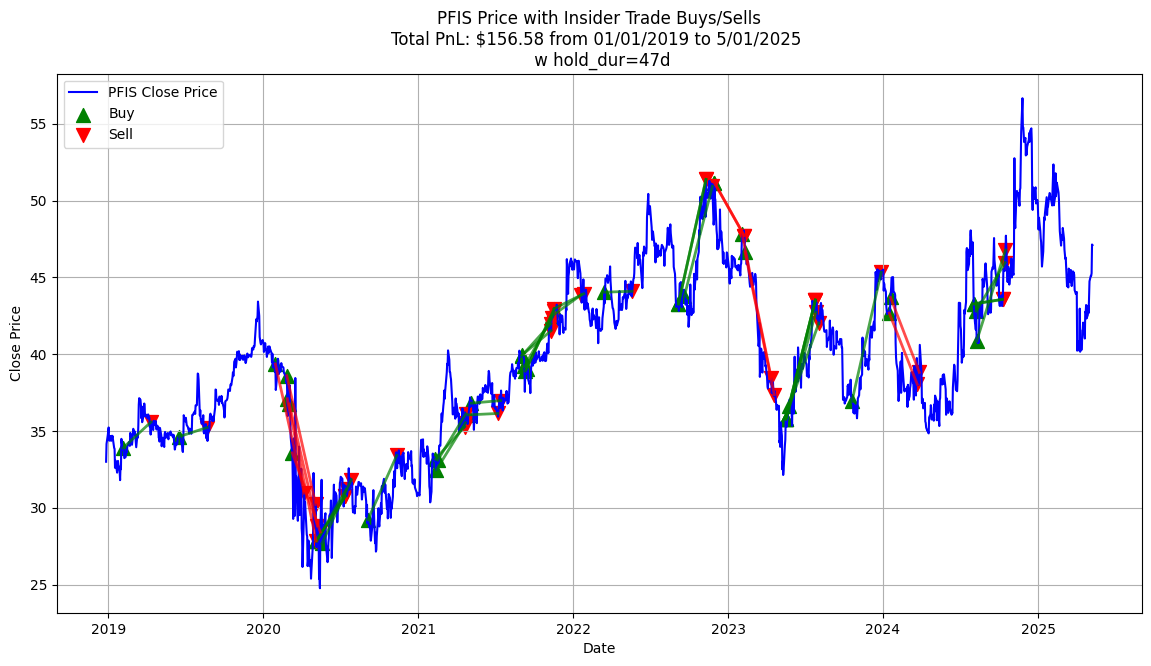

[*********************100%***********************]  1 of 1 completed

Total PnL over period: $156.58
Profitable trades: 75.0% of 44 total
Annualized return: 19.08%
  filing_date   buy_date  sell_date  buy_price  sell_price    shares  \
0  2024-08-08 2024-08-09 2024-10-16  40.853798   46.777454  2.447753   
1  2024-08-07 2024-08-08 2024-10-15  42.805111   45.957813  2.336170   
2  2024-08-01 2024-08-02 2024-10-09  43.271523   43.566387  2.310989   
3  2024-08-01 2024-08-02 2024-10-09  43.271523   43.566387  2.310989   
4  2024-01-18 2024-01-19 2024-03-27  43.692699   38.816574  2.288712   

         pnl  
0  14.499647  
1   7.365247  
2   0.681429  
3   0.681429  
4 -11.160046  
S&P500 annualized return over period: 13.45%


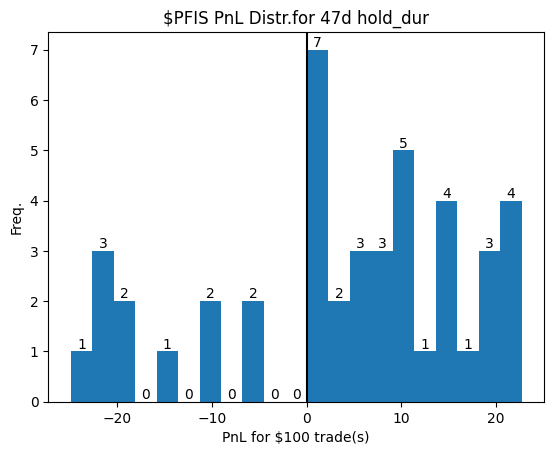

C:\Users\John DeForest\AppData\Local\Temp\ipykernel_55244\2544979087.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  profitable_pct_by_period = results['pnl'].gt(0).resample('1M').mean() * 100


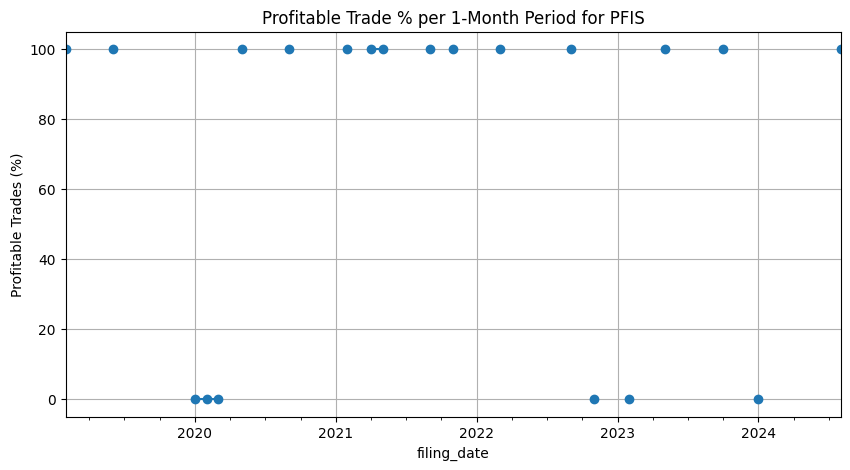

In [152]:
hold_dur = 47
ticker='PFIS'
start = '01/01/2019'
end = '5/01/2025'
results, total_pnl = simulate_pnl(df, ticker=ticker,
                                   start_date=start, end_date=end,
                                   hold_dur=hold_dur)
start = pd.to_datetime(start)
end = pd.to_datetime(end)
print(f"Total PnL over period: ${total_pnl:.2f}")
profitable_pct = (results['pnl'] > 0).mean() * 100
avg_return = (total_pnl / len(results)) / 100  
annualized_return = avg_return * 252 / hold_dur
print(f"Profitable trades: {profitable_pct:.1f}% of {len(results)} total")
print(f"Annualized return: {annualized_return*100:.2f}%")
print(results.head())
sp500 = yf.download("^GSPC", start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'),auto_adjust=True)
sp500 = sp500['Close'].squeeze()
sp500_total_return = (sp500.iloc[-1] / sp500.iloc[0]) - 1
sp500_days = len(sp500)
sp500_annualized = (1 + sp500_total_return) ** (252 / sp500_days) - 1
print(f"S&P500 annualized return over period: {sp500_annualized*100:.2f}%")
c,b,p=plt.hist(results.pnl,bins=21)#PnL hist:
plt.bar_label(p)
plt.axvline(x=0,color='black')
plt.title(f'${ticker} PnL Distr.for {hold_dur}d hold_dur')
plt.xlabel('PnL for $100 trade(s)')
plt.ylabel('Freq.')
plt.show()

results['filing_date'] = pd.to_datetime(results['filing_date'])
results = results.set_index('filing_date')
profitable_pct_by_period = results['pnl'].gt(0).resample('1M').mean() * 100
plt.figure(figsize=(10,5))
profitable_pct_by_period.plot(marker='o')
plt.title(f'Profitable Trade % per 1-Month Period for {ticker}')
plt.xlabel('filing_date')
plt.ylabel('Profitable Trades (%)')
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

for 35 trades
S&P500 annualized return over period: 13.45%


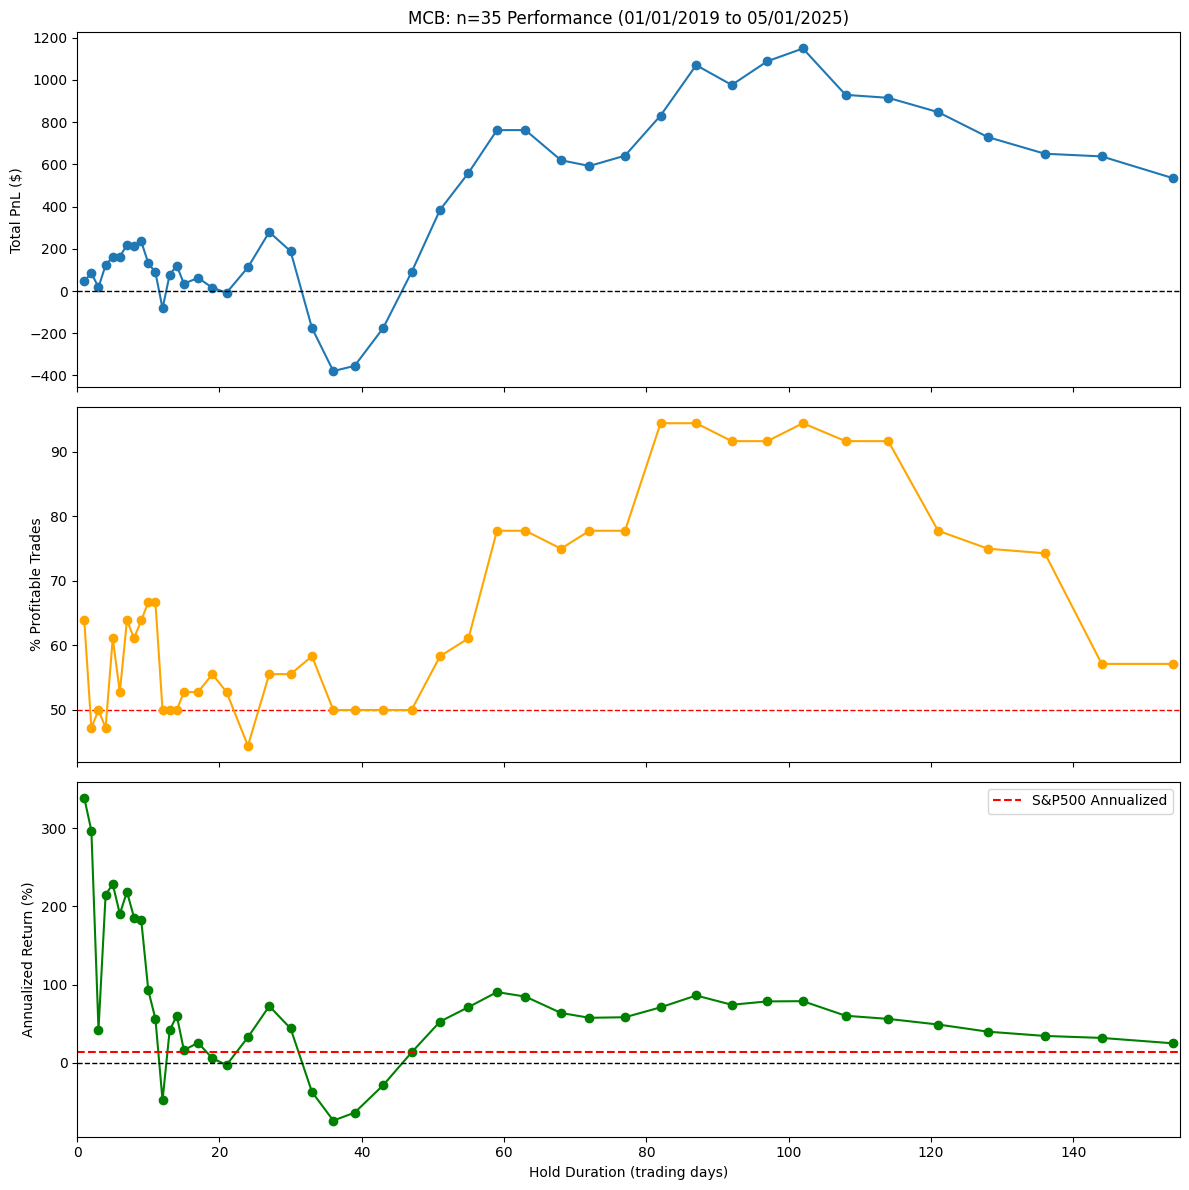

In [5]:
import matplotlib.pyplot as plt
#low n/other weird: DSP
# Define your ticker & date range #all neg DXC, BY, NYC, DNB, PKBK, BOLT WNEB, CMTV BOTJ CLFD CFBK
ticker = 'MCB' #pos: PFIS og, VNT, BWFG, BW, PW, BHE, CCI, MCB, HSON, GBX, ATLO, TPL
start = '01/01/2019'
end = '05/01/2025'
start_dt = pd.to_datetime(start)
end_dt = pd.to_datetime(end)
# Download S&P 500 return once for reference
sp500 = yf.download("^GSPC", start=start_dt.strftime('%Y-%m-%d'), end=end_dt.strftime('%Y-%m-%d'),auto_adjust=True)
sp500 = sp500['Close'].squeeze()
sp500_total_return = float((sp500.iloc[-1] / sp500.iloc[0]) - 1)
sp500_days = len(sp500)
sp500_annualized = (1 + sp500_total_return) ** (252 / sp500_days) - 1
hold_durs = []
total_pnls = []
profitable_pcts = []
annualized_returns = []
hold_durations = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,21,24,27,30,33,36,39,43,47,51,55,59,63,68,72,77,82,87,92,97,102,108,114,121,128,136,144,154]
for hd in hold_durations:  # avoid hd=0 to prevent division by zero
    results, total_pnl = simulate_pnl(df, ticker=ticker,
                                      start_date=start, end_date=end,
                                      hold_dur=hd,plot=False)
    if results is None or results.empty:
        continue
    # Metrics
    profitable_pct = (results['pnl'] > 0).mean() * 100
    avg_return = (total_pnl / len(results)) / 100
    annualized_return = avg_return * 252 / hd
    # Store
    hold_durs.append(hd)
    total_pnls.append(total_pnl)
    profitable_pcts.append(profitable_pct)
    annualized_returns.append(annualized_return * 100)  # in %
print(f'for {len(results)} trades')
print(f"S&P500 annualized return over period: {sp500_annualized*100:.2f}%")
# === PLOTS ===
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
# Total PnL vs hold_dur
axs[0].plot(hold_durs, total_pnls, marker='o')
axs[0].set_ylabel("Total PnL ($)")
axs[0].set_title(f"{ticker}: n={len(results)} Performance ({start} to {end})")
# Plot 1 (Total PnL) - horizontal line at 0
axs[0].axhline(0, color='black', linestyle='--', linewidth=1)
# Plot 2 (% profitable) - horizontal line at 50%
axs[1].axhline(50, color='red', linestyle='--', linewidth=1)
# % Profitable trades vs hold_dur
axs[1].plot(hold_durs, profitable_pcts, marker='o', color='orange')
axs[1].set_ylabel("% Profitable Trades")
# Annualized return vs hold_dur
axs[2].plot(hold_durs, annualized_returns, marker='o', color='green')
axs[2].axhline(sp500_annualized * 100, color='red', linestyle='--', label="S&P500 Annualized")
axs[2].axhline(0, color='black', linestyle='--', linewidth=1)
axs[2].set_ylabel("Annualized Return (%)")
axs[2].set_xlabel("Hold Duration (trading days)")
axs[2].legend()
# Set x-axis limits for all three plots
for ax in axs:
    ax.set_xlim(0, 155)  # hold_dur range
plt.tight_layout()
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# import yfinance as yf
# from datetime import timedelta
# from concurrent.futures import ThreadPoolExecutor, as_completed
# import time
# import os
# from tqdm import tqdm

# # === SETTINGS ===
# lookbacks = [1, 5, 10, 15, 20, 35, 50, 75, 120, 180, 245]
# input_file = "oip_mega_wreturns.csv"
# output_file = "oip_mega_wretvol.csv"
# max_workers = 8          # parallel Yahoo requests
# max_retries = 3          # retry attempts for a ticker
# retry_delay = 3          # seconds between retries
# save_every = 5           # save every N tickers processed (smaller for frequent checkpoint)

# # === FUNCTIONS ===
# def garman_klass_vol(df):
#     log_hl = np.log(df['High'] / df['Low'])
#     log_co = np.log(df['Close'] / df['Open'])
#     var = 0.5 * log_hl**2 - (2*np.log(2) - 1) * log_co**2
#     return np.sqrt(var.mean()) * np.sqrt(252)

# def close_to_close_vol(df):
#     returns = np.log(df['Close'] / df['Close'].shift(1)).dropna()
#     return returns.std() * np.sqrt(252)

# def nearest_trading_day(date, trading_dates):
#     if date in trading_dates:
#         return date
#     earlier_dates = trading_dates[trading_dates <= date]
#     if not earlier_dates.empty:
#         return earlier_dates.max()
#     return None

# def fetch_ohlcv_with_retry(ticker, start_date, end_date):
#     for attempt in range(1, max_retries + 1):
#         try:
#             data = yf.download(
#                 ticker,
#                 start=start_date.strftime('%Y-%m-%d'),
#                 end=end_date.strftime('%Y-%m-%d'),
#                 progress=False,
#                 auto_adjust=False
#             )
#             if not data.empty:
#                 data.index = pd.to_datetime(data.index)
#                 return data
#         except Exception:
#             pass
#         if attempt < max_retries:
#             time.sleep(retry_delay * attempt)
#     return pd.DataFrame()

# def process_ticker(ticker, ticker_rows):
#     results = {}
#     earliest_date = ticker_rows['filing_date'].min()
#     start_date = earliest_date - pd.tseries.offsets.BDay(max(lookbacks))
#     end_date = ticker_rows['filing_date'].max() + timedelta(days=1)

#     ohlcv = fetch_ohlcv_with_retry(ticker, start_date, end_date)
#     if ohlcv.empty:
#         return results

#     trading_dates = pd.Series(ohlcv.index)

#     for idx, row in ticker_rows.iterrows():
#         filing_date = row['filing_date']
#         nearest_date = nearest_trading_day(filing_date, trading_dates)
#         if nearest_date is None:
#             continue

#         filing_idx = ohlcv.index.get_loc(nearest_date)

#         for lb in lookbacks:
#             start_idx = filing_idx - lb + 1
#             if start_idx < 0:
#                 continue

#             subdf = ohlcv.iloc[start_idx:filing_idx+1]
#             if len(subdf) < 2:
#                 continue

#             try:
#                 vol_c = close_to_close_vol(subdf)
#                 vol_gk = garman_klass_vol(subdf)
#                 vol_ratio = vol_gk / vol_c if vol_c != 0 else np.nan
#             except Exception:
#                 continue

#             results[(idx, f"sig_c_{lb}")] = vol_c
#             results[(idx, f"sig_gk_{lb}")] = vol_gk
#             results[(idx, f"sig_gkc_{lb}")] = vol_ratio

#     return results

# # === LOAD DATA & RESUME SUPPORT ===
# df_input = pd.read_csv(input_file, parse_dates=['filing_date'])

# if os.path.exists(output_file):
#     df = pd.read_csv(output_file, parse_dates=['filing_date'])
#     print(f"Resuming from {output_file}")
# else:
#     df = df_input.copy()
#     for lb in lookbacks:
#         df[f"sig_c_{lb}"] = np.nan
#         df[f"sig_gk_{lb}"] = np.nan
#         df[f"sig_gkc_{lb}"] = np.nan

# def is_ticker_done(ticker):
#     ticker_rows = df[df['ticker'] == ticker]
#     cols = [f"sig_c_{lb}" for lb in lookbacks]
#     return not ticker_rows[cols].isna().all().all()

# unique_tickers = df['ticker'].dropna().unique()
# tickers_to_process = [t for t in unique_tickers if not is_ticker_done(t)]
# print(f"{len(tickers_to_process)} tickers left to process out of {len(unique_tickers)} total.")

# from concurrent.futures import ThreadPoolExecutor, as_completed
# from tqdm import tqdm

# processed_count = 0

# with ThreadPoolExecutor(max_workers=max_workers) as executor:
#     futures = {}
#     for ticker in tickers_to_process:
#         # Submit a wrapper that prints when the ticker starts
#         def ticker_wrapper(t=ticker):
#             tqdm.write(f"Starting ticker: {t}")
#             return process_ticker(t, df[df['ticker'] == t])
#         futures[executor.submit(ticker_wrapper)] = ticker

#     for future in tqdm(as_completed(futures), total=len(futures), desc="Tickers processed"):
#         ticker = futures[future]
#         try:
#             res = future.result()
#             if res:
#                 for (idx, col), val in res.items():
#                     df.at[idx, col] = val
#         except Exception as e:
#             tqdm.write(f"Error processing {ticker}: {e}")

#         processed_count += 1
#         if processed_count % save_every == 0:
#             df.to_csv(output_file, index=False)
#             tqdm.write(f"Checkpoint saved after {processed_count} tickers.")


# # === FINAL SAVE ===
# df.to_csv(output_file, index=False)
# print(f"Saved final dataset to {output_file}")


6119 tickers left to process out of 6119 total.
Starting ticker: WSC
Starting ticker: PRLB
Starting ticker: RVSB
Starting ticker: TBBK
Starting ticker: ASUR
Starting ticker: BLFY
Starting ticker: DLHC
Starting ticker: BRBR


Tickers processed:   0%|          | 1/6119 [00:03<2:22:18,  1.40s/it]

Starting ticker: ENPH


Tickers processed:   0%|          | 2/6119 [00:06<3:42:06,  2.18s/it]

Starting ticker: MUSA


Tickers processed:   0%|          | 3/6119 [00:07<4:10:26,  2.46s/it]

Starting ticker: MOH


Tickers processed:   0%|          | 4/6119 [00:09<4:14:04,  2.49s/it]

Starting ticker: NSP


Tickers processed:   0%|          | 4/6119 [00:10<4:14:04,  2.49s/it]

Starting ticker: AMSC


Starting ticker: SHEN


Tickers processed:   0%|          | 4/6119 [00:13<4:14:04,  2.49s/it]

Starting ticker: SNV
Starting ticker: MMLP


Tickers processed:   0%|          | 4/6119 [00:14<4:14:04,  2.49s/it]

Starting ticker: NEO


Tickers processed:   0%|          | 4/6119 [00:14<4:14:04,  2.49s/it]

Starting ticker: IOR


Tickers processed:   0%|          | 4/6119 [00:16<4:14:04,  2.49s/it]

Starting ticker: NEGG


Tickers processed:   0%|          | 4/6119 [00:18<4:14:04,  2.49s/it]

Starting ticker: DOC


Tickers processed:   0%|          | 4/6119 [00:19<4:14:04,  2.49s/it]

Starting ticker: NWFL


Starting ticker: LRCX


Tickers processed:   0%|          | 4/6119 [00:21<4:14:04,  2.49s/it]

Starting ticker: CHD


Starting ticker: IBCP


Tickers processed:   0%|          | 4/6119 [00:23<4:14:04,  2.49s/it]

Starting ticker: FRST


Tickers processed:   0%|          | 4/6119 [00:24<4:14:04,  2.49s/it]

Starting ticker: TPL


Tickers processed:   0%|          | 4/6119 [00:25<4:14:04,  2.49s/it]

Starting ticker: TROX


Tickers processed:   0%|          | 4/6119 [00:29<4:14:04,  2.49s/it]

Starting ticker: EFSC


Tickers processed:   0%|          | 4/6119 [00:36<4:14:04,  2.49s/it]

Starting ticker: VNRX


Tickers processed:   0%|          | 4/6119 [00:41<4:14:04,  2.49s/it]

Starting ticker: CCFN


Tickers processed:   0%|          | 4/6119 [00:42<4:14:04,  2.49s/it]

Starting ticker: PINE


Tickers processed:   0%|          | 4/6119 [00:44<4:14:04,  2.49s/it]

Starting ticker: FIG


Tickers processed:   0%|          | 4/6119 [00:48<4:14:04,  2.49s/it]

Starting ticker: AMKR


Tickers processed:   0%|          | 4/6119 [00:51<4:14:04,  2.49s/it]

Starting ticker: THRY


Tickers processed:   0%|          | 4/6119 [00:53<4:14:04,  2.49s/it]

Starting ticker: SI


Tickers processed:   0%|          | 4/6119 [00:54<4:14:04,  2.49s/it]

Starting ticker: SONO


Tickers processed:   0%|          | 4/6119 [01:00<4:14:04,  2.49s/it]

Starting ticker: HTBK


Tickers processed:   0%|          | 4/6119 [01:01<4:14:04,  2.49s/it]

Starting ticker: BCAR


Tickers processed:   0%|          | 4/6119 [01:02<4:14:04,  2.49s/it]

Starting ticker: AUPH


                                                                     
1 Failed download:
Tickers processed:   0%|          | 4/6119 [01:03<4:14:04,  2.49s/it]
1 Failed download:
                                                                     

Starting ticker: ASAN


['BCAR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-08-27 -> 2025-08-06)')
['BCAR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-08-27 -> 2025-08-06)')
Tickers processed:   0%|          | 4/6119 [01:04<4:14:04,  2.49s/it]
1 Failed download:


Starting ticker: XRX


Tickers processed:   0%|          | 4/6119 [01:05<4:14:04,  2.49s/it]

Starting ticker: DLPN


Tickers processed:   0%|          | 4/6119 [01:09<4:14:04,  2.49s/it]

Starting ticker: UMBF


Tickers processed:   0%|          | 4/6119 [01:10<4:14:04,  2.49s/it]

Starting ticker: DYAI


Tickers processed:   0%|          | 4/6119 [01:15<4:14:04,  2.49s/it]

Starting ticker: FCNCA


Tickers processed:   0%|          | 4/6119 [01:17<4:14:04,  2.49s/it]

Starting ticker: RVP


Tickers processed:   0%|          | 4/6119 [01:18<4:14:04,  2.49s/it]

Starting ticker: EIG


Tickers processed:   0%|          | 4/6119 [01:26<4:14:04,  2.49s/it]

Starting ticker: AIN


Tickers processed:   0%|          | 4/6119 [01:27<37:19:20, 21.97s/it]


Starting ticker: CBZ
Starting ticker: QIND
Starting ticker: TSQ
Starting ticker: CIVB
Starting ticker: CLVT
Starting ticker: PRME
Starting ticker: CCO
Starting ticker: XELB
Starting ticker: MNTR
Starting ticker: OSBC
Starting ticker: CHE
Starting ticker: AVBC
Starting ticker: FMBM
Starting ticker: GABC
Starting ticker: CNOB
Starting ticker: CHMG
Starting ticker: MBIN
Starting ticker: RGCO
Starting ticker: MOFG
Starting ticker: RRBI
Starting ticker: OBIO
Starting ticker: BPRN
Starting ticker: CZWI
Starting ticker: MTDR
Starting ticker: SIRI
Starting ticker: FTV
Starting ticker: CVBF
Starting ticker: LRMR
Starting ticker: ARW
Starting ticker: ABP
Starting ticker: HLIT
Starting ticker: OXM
Starting ticker: NRC
Starting ticker: CDXS
Starting ticker: FUNC
Starting ticker: ACGL
Starting ticker: PUMP
Starting ticker: FCF
Starting ticker: TLRY
Starting ticker: SNBR
Starting ticker: KRNY
Starting ticker: FCBC
Starting ticker: RNST
Starting ticker: CLH
Starting ticker: UVSP
Starting ticker: CASS


1 Failed download:

1 Failed download:
['APAD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-08-22 -> 2025-08-01)')
['APAD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-08-22 -> 2025-08-01)')


Starting ticker: MMC
Starting ticker: PBBK
Starting ticker: OMCC
Starting ticker: CRDF
Starting ticker: CBNK
Starting ticker: ASRV
Starting ticker: SNYR
Starting ticker: NVTS
Starting ticker: FNWB
Starting ticker: MBWM
Starting ticker: TLYS
Starting ticker: LEXX
Starting ticker: GSHD
Starting ticker: IMA
Starting ticker: UPXI
Starting ticker: EPD
Starting ticker: NVCR
Starting ticker: TCBX
Starting ticker: BXSY
Starting ticker: OPGN
Starting ticker: BDCO
Starting ticker: FDBC
Starting ticker: MPB
Starting ticker: MTH
Starting ticker: ARX
Starting ticker: MSTR
Starting ticker: CNC
Starting ticker: KMI
Starting ticker: CALC
Starting ticker: EBF
Starting ticker: CHCO
Starting ticker: AUB
Starting ticker: FBNC
Starting ticker: NG
Starting ticker: ABSI
Starting ticker: CVM
Starting ticker: NIQ
Starting ticker: LOOP
Starting ticker: PMT
Starting ticker: AMTB
Starting ticker: MH
Starting ticker: MSCI
Starting ticker: WTFC
Starting ticker: CB
Starting ticker: DMAC
Starting ticker: ELTP
Startin


1 Failed download:

1 Failed download:
['OYSE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-06-18 -> 2025-07-10) (Yahoo error = "Data doesn\'t exist for startDate = 1718683200, endDate = 1752120000")')
['OYSE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-06-18 -> 2025-07-10) (Yahoo error = "Data doesn\'t exist for startDate = 1718683200, endDate = 1752120000")')


Starting ticker: UPBD
Starting ticker: HWC
Starting ticker: CZNC
Starting ticker: OFIX
Starting ticker: COSO
Starting ticker: MWA
Starting ticker: PML
Starting ticker: TREX
Starting ticker: HURC
Starting ticker: IMRX
Starting ticker: JUNS
Starting ticker: BSPK
Starting ticker: NRX
Starting ticker: QNTO
Starting ticker: CULP
Starting ticker: CLRB
Starting ticker: NYC



1 Failed download:

1 Failed download:

1 Failed download:
['NRX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-15 -> 2025-07-04)')
['NRX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-15 -> 2025-07-04)')
['NRX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-15 -> 2025-07-04)')


Starting ticker: BCDA
Starting ticker: YORKU
Starting ticker: INTZ
Starting ticker: ICU
Starting ticker: EXOZ
Starting ticker: TCBI
Starting ticker: VG
Starting ticker: WELL
Starting ticker: FGEN
Starting ticker: XOMA
Starting ticker: FRHC
Starting ticker: FGBI
Starting ticker: AUBN
Starting ticker: QNBC
Starting ticker: KYMR
Starting ticker: FIGX
Starting ticker: CASY
Starting ticker: PRM
Starting ticker: INTG


HTTP Error 404: 


Starting ticker: GME
Starting ticker: HLT
Starting ticker: SION
Starting ticker: SPG
Starting ticker: PLUR
Starting ticker: EONR



1 Failed download:


Starting ticker: CURV
Starting ticker: BMNM
Starting ticker: PLAB
Starting ticker: SSII
Starting ticker: BBIO
Starting ticker: LTC
Starting ticker: TERN
Starting ticker: SWAG
Starting ticker: CDTX
Starting ticker: AIG
Starting ticker: ACTU
Starting ticker: PVH
Starting ticker: HOVR
Starting ticker: NXRT
Starting ticker: NWTG
Starting ticker: MDV
Starting ticker: DKS
Starting ticker: CAEP
Starting ticker: ZEOX
Starting ticker: CCCXU
Starting ticker: MPTI
Starting ticker: ACIC
Starting ticker: BTBT
Starting ticker: DTIL
Starting ticker: NAMS
Starting ticker: CRCW
Starting ticker: CTO
Starting ticker: CME
Starting ticker: NLST
Starting ticker: RZLT
Starting ticker: LIVE
Starting ticker: GMRE
Starting ticker: VERA
Starting ticker: ATLN
Starting ticker: FLWS
Starting ticker: GIII
Starting ticker: AKTX
Starting ticker: JUVF
Starting ticker: AIMD
Starting ticker: AXINU
Starting ticker: ALIT
Starting ticker: TGEN
Starting ticker: NVCT
Starting ticker: SBFG
Starting ticker: CLAR
Starting ticker

HTTP Error 404: 


Starting ticker: EFOI


HTTP Error 401: 


Starting ticker: IMUX
Starting ticker: REYN
Starting ticker: PLYA
Starting ticker: AJG
Starting ticker: VAC
Starting ticker: DLTR
Starting ticker: LAKE
Starting ticker: CNDT
Starting ticker: MDRR
Starting ticker: IMMX
Starting ticker: MKTW
Starting ticker: AMPG
Starting ticker: ARDX
Starting ticker: ADMQ
Starting ticker: PROP
Starting ticker: CRMT
Starting ticker: DLTH
Starting ticker: XLO
Starting ticker: TRDA
Starting ticker: PANL
Starting ticker: PZG
Starting ticker: BRT
Starting ticker: ED
Starting ticker: ACNT
Starting ticker: BSAA
Starting ticker: NUVB
Starting ticker: NKSH
Starting ticker: CPSH
Starting ticker: CIA



1 Failed download:
['BSAA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-07-10 -> 2025-06-19) (Yahoo error = "Data doesn\'t exist for startDate = 1720584000, endDate = 1750305600")')


Starting ticker: ENRT
Starting ticker: NFJ
Starting ticker: BACC
Starting ticker: GPUS
Starting ticker: VREO
Starting ticker: PHIN



1 Failed download:
['BACC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-07-10 -> 2025-06-19) (Yahoo error = "Data doesn\'t exist for startDate = 1720584000, endDate = 1750305600")')
['VREO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SST
Starting ticker: HYMC
Starting ticker: MED
Starting ticker: ET
Starting ticker: EML
Starting ticker: ARQT
Starting ticker: HOOD
Starting ticker: MLP
Starting ticker: ALOT
Starting ticker: SUNS
Starting ticker: MNR
Starting ticker: DHIL
Starting ticker: GRNT
Starting ticker: BHC
Starting ticker: PTN
Starting ticker: MMS
Starting ticker: RM
Starting ticker: DV



1 Failed download:

1 Failed download:
['PTN']: YFTzMissingError('possibly delisted; no timezone found')
['PTN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FLL
Starting ticker: LFVN
Starting ticker: ACNB
Starting ticker: COP
Starting ticker: MTX
Starting ticker: NWPP
Starting ticker: FNWD
Starting ticker: PAYS
Starting ticker: GROV
Starting ticker: TYRA
Starting ticker: HPP
Starting ticker: PPTA
Starting ticker: CABO
Starting ticker: ZIVO
Starting ticker: AMH
Starting ticker: GLP
Starting ticker: OPAL
Starting ticker: BARK
Starting ticker: XERS
Starting ticker: GTE
Starting ticker: AWRE
Starting ticker: ARAY
Starting ticker: SNRG
Starting ticker: STKL
Starting ticker: MBBC
Starting ticker: VWFB
Starting ticker: IRIX
Starting ticker: CSPI
Starting ticker: AIM
Starting ticker: ACUT
Starting ticker: BCBP
Starting ticker: BKYI
Starting ticker: SDHC
Starting ticker: CHYM
Starting ticker: ONTF
Starting ticker: VOYG
Starting ticker: SNEX
Starting ticker: PMF
Starting ticker: EG
Starting ticker: VRA
Starting ticker: LFLY
Starting ticker: QTRX
Starting ticker: VSH
Starting ticker: ULBI
Starting ticker: SIDU
Starting ticker: SFD
St


1 Failed download:

1 Failed download:

1 Failed download:
['SWPR']: YFTzMissingError('possibly delisted; no timezone found')
['SWPR']: YFTzMissingError('possibly delisted; no timezone found')
['SWPR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HRI
Starting ticker: MAIA
Starting ticker: SAIC
Starting ticker: TRST
Starting ticker: TDW
Starting ticker: MAGN
Starting ticker: BHRB
Starting ticker: SRBK
Starting ticker: OBT
Starting ticker: CMCO
Starting ticker: CREX
Starting ticker: PATK
Starting ticker: CC
Starting ticker: BLMH
Starting ticker: JRVR
Starting ticker: ELA
Starting ticker: RGLS
Starting ticker: BSAI
Starting ticker: MTVA
Starting ticker: EMBY
Starting ticker: NBTB
Starting ticker: RBCAA
Starting ticker: BLSK
Starting ticker: ITW



1 Failed download:


Starting ticker: USEG
Starting ticker: TSHA
Starting ticker: IMNM
Starting ticker: VFF
Starting ticker: KDOZF
Starting ticker: FAT
Starting ticker: CWBC
Starting ticker: CTKB
Starting ticker: WEN
Starting ticker: ANTX
Starting ticker: ABR
Starting ticker: SEVN
Starting ticker: AFBI
Starting ticker: ACDC
Starting ticker: CARE
Starting ticker: SBET
Starting ticker: ALTG
Starting ticker: OPBK
Starting ticker: GENK
Starting ticker: NAUT
Starting ticker: WEX
Starting ticker: PEPG
Starting ticker: WNS
Starting ticker: ENS
Starting ticker: GBLI
Starting ticker: SLSN
Starting ticker: LNKB
Starting ticker: NKGN
Starting ticker: CTBI
Starting ticker: IOBT
Starting ticker: CZFS
Starting ticker: KEYS
Starting ticker: AENT
Starting ticker: HHS
Starting ticker: JENA
Starting ticker: BDL
Starting ticker: FKYS
Starting ticker: CHCT
Starting ticker: WSR



1 Failed download:


Starting ticker: INNV



1 Failed download:


Starting ticker: IHRT
Starting ticker: PRPO
Starting ticker: VRSN
Starting ticker: EHTH
Starting ticker: HAL
Starting ticker: CAC
Starting ticker: CWBHF
Starting ticker: FMAO
Starting ticker: STBA
Starting ticker: LYFT
Starting ticker: EMYB
Starting ticker: AGFY
Starting ticker: KCHV
Starting ticker: BJ
Starting ticker: MATX
Starting ticker: CORZ
Starting ticker: STC
Starting ticker: UBFO
Starting ticker: RNGE
Starting ticker: BATRA
Starting ticker: CHPG
Starting ticker: MNSB
Starting ticker: BLBD
Starting ticker: CBFV



1 Failed download:
['CHPG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-06-20 -> 2025-05-30) (Yahoo error = "Data doesn\'t exist for startDate = 1718856000, endDate = 1748577600")')


Starting ticker: PFBX
Starting ticker: GMGI
Starting ticker: VSTS
Starting ticker: NUS
Starting ticker: BFS
Starting ticker: SG
Starting ticker: NRDY
Starting ticker: ARQ
Starting ticker: ONEW
Starting ticker: EP
Starting ticker: SILO
Starting ticker: MCY
Starting ticker: SCKT
Starting ticker: INFU
Starting ticker: CE
Starting ticker: LCNB
Starting ticker: ST
Starting ticker: MRBK
Starting ticker: FLO
Starting ticker: LBSR
Starting ticker: UHG
Starting ticker: KKR
Starting ticker: BLIN
Starting ticker: HYLN
Starting ticker: TMC
Starting ticker: MVBF
Starting ticker: OXBR
Starting ticker: FBLG
Starting ticker: CCCS
Starting ticker: JOBY
Starting ticker: KINS
Starting ticker: AVTR
Starting ticker: GTIM
Starting ticker: GPMT
Starting ticker: PMTS
Starting ticker: VVV
Starting ticker: SEI
Starting ticker: CMPX
Starting ticker: INIS
Starting ticker: LKFN
Starting ticker: COSM
Starting ticker: ECOR
Starting ticker: BLCO
Starting ticker: VFC
Starting ticker: NTHI
Starting ticker: TBRG
Startin


1 Failed download:
['CRAQU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-06-13 -> 2025-05-23) (Yahoo error = "Data doesn\'t exist for startDate = 1718251200, endDate = 1747972800")')


Starting ticker: ENR
Starting ticker: AMD
Starting ticker: HMN
Starting ticker: PNC
Starting ticker: MCVT
Starting ticker: VNDA
Starting ticker: PIPR
Starting ticker: BSM
Starting ticker: CCCM
Starting ticker: FPI
Starting ticker: TCRX
Starting ticker: FGF
Starting ticker: ALUR
Starting ticker: FLOC
Starting ticker: ZOMDF



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: OGE
Starting ticker: WFCF



1 Failed download:

1 Failed download:
['CCCM']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-06-12 -> 2025-05-22) (Yahoo error = "Data doesn\'t exist for startDate = 1718164800, endDate = 1747886400")')
['CCCM']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-06-12 -> 2025-05-22) (Yahoo error = "Data doesn\'t exist for startDate = 1718164800, endDate = 1747886400")')


Starting ticker: PSQH
Starting ticker: BETR
Starting ticker: FRGE
Starting ticker: LAC
Starting ticker: RLMD
Starting ticker: AURA
Starting ticker: HG
Starting ticker: XFOR
Starting ticker: HCWB
Starting ticker: CTEV
Starting ticker: NPKI
Starting ticker: BDSX
Starting ticker: TXO
Starting ticker: WEST
Starting ticker: HHH
Starting ticker: PROF
Starting ticker: RYAM
Starting ticker: ESOA
Starting ticker: RYI
Starting ticker: VISL
Starting ticker: CVRX
Starting ticker: ZYME
Starting ticker: BCO
Starting ticker: CNTA
Starting ticker: FENC
Starting ticker: ACCS
Starting ticker: JBIO
Starting ticker: SVCO
Starting ticker: OKUR
Starting ticker: MASS
Starting ticker: SURG
Starting ticker: IBP
Starting ticker: KW
Starting ticker: FOR
Starting ticker: VYX
Starting ticker: NNBR
Starting ticker: KTCC
Starting ticker: TARA
Starting ticker: EYPT
Starting ticker: BRFH
Starting ticker: SNDX
Starting ticker: FG
Starting ticker: SCND
Starting ticker: GSAT
Starting ticker: VANI
Starting ticker: CPNG
St


1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['EGHA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-06-03 -> 2025-05-13) (Yahoo error = "Data doesn\'t exist for startDate = 1717387200, endDate = 1747108800")')
['EGHA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-06-03 -> 2025-05-13) (Yahoo error = "Data doesn\'t exist for startDate = 1717387200, endDate = 1747108800")')
['EGHA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-06-03 -> 2025-05-13) (Yahoo error = "Data doesn\'t exist for startDate = 1717387200, endDate = 1747108800")')
['EGHA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-06-03 -> 2025-05-13) (Yahoo error = "Data doesn\'t exist for startDate = 1717387200, endDate = 1747108800")')


Starting ticker: KTOS
Starting ticker: CCI
Starting ticker: J
Starting ticker: DOUG
Starting ticker: STLY
Starting ticker: BZH
Starting ticker: GVA
Starting ticker: CIVI
Starting ticker: CNR
Starting ticker: ALNY
Starting ticker: NEOG
Starting ticker: ASB
Starting ticker: CARS
Starting ticker: ACIW
Starting ticker: PBI
Starting ticker: MTCH
Starting ticker: PRAA
Starting ticker: ARCB
Starting ticker: ECL
Starting ticker: HOLX
Starting ticker: TAP
Starting ticker: DBD
Starting ticker: CLX
Starting ticker: KFRC
Starting ticker: DTM
Starting ticker: FSUN
Starting ticker: MATW
Starting ticker: AEVA
Starting ticker: JELD
Starting ticker: LOB
Starting ticker: BTMD
Starting ticker: USAC
Starting ticker: FNMA
Starting ticker: ICHR
Starting ticker: CHDN
Starting ticker: MTW
Starting ticker: MGPI
Starting ticker: SM
Starting ticker: UTZ
Starting ticker: DAIO
Starting ticker: CFFN
Starting ticker: TCBS
Starting ticker: CBRL
Starting ticker: RGR
Starting ticker: SW
Starting ticker: CAT
Starting ti


1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['LCCC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-24 -> 2025-05-03) (Yahoo error = "Data doesn\'t exist for startDate = 1716523200, endDate = 1746244800")')
['LCCC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-24 -> 2025-05-03) (Yahoo error = "Data doesn\'t exist for startDate = 1716523200, endDate = 1746244800")')


Starting ticker: BERY
Starting ticker: BAFN
Starting ticker: PRTA


['LCCC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-24 -> 2025-05-03) (Yahoo error = "Data doesn\'t exist for startDate = 1716523200, endDate = 1746244800")')


Starting ticker: NRDE
Starting ticker: CVI
Starting ticker: LUV
Starting ticker: BWB
Starting ticker: MCFT
Starting ticker: DMLP
Starting ticker: SNWV
Starting ticker: ZNTL
Starting ticker: SKAS
Starting ticker: WABC
Starting ticker: FNLC
Starting ticker: BANC
Starting ticker: WBA
Starting ticker: BMY
Starting ticker: PKBK
Starting ticker: MRTN
Starting ticker: FULT
Starting ticker: GLSI
Starting ticker: SIG
Starting ticker: TOI
Starting ticker: TSLA
Starting ticker: ICCT
Starting ticker: GDRZF
Starting ticker: WFRD
Starting ticker: UCB
Starting ticker: ADVM
Starting ticker: QCRH
Starting ticker: ZBIO
Starting ticker: NPAC
Starting ticker: MLYS
Starting ticker: JBHT
Starting ticker: KMX
Starting ticker: LKQ
Starting ticker: CTGO
Starting ticker: NTRS
Starting ticker: PROK
Starting ticker: TAYD
Starting ticker: GTEC
Starting ticker: UAN
Starting ticker: BYRN
Starting ticker: CNXC
Starting ticker: KEY



1 Failed download:

1 Failed download:
['NPAC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-20 -> 2025-04-29) (Yahoo error = "Data doesn\'t exist for startDate = 1716177600, endDate = 1745899200")')


Starting ticker: RTX
Starting ticker: ALLY
Starting ticker: BOF
Starting ticker: SGRP
Starting ticker: LCGMF
Starting ticker: DYNR
Starting ticker: USB
Starting ticker: FLNT
Starting ticker: FFIE
Starting ticker: LCTC
Starting ticker: BKV
Starting ticker: LGF



1 Failed download:
['FFIE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NAD
Starting ticker: ZDGE
Starting ticker: GTHP
Starting ticker: GS
Starting ticker: CVGW
Starting ticker: FVR
Starting ticker: FBK
Starting ticker: FTLF
Starting ticker: ROAD
Starting ticker: WDFC
Starting ticker: HUMA
Starting ticker: RMTI



1 Failed download:

1 Failed download:


Starting ticker: NBY
Starting ticker: TXMD


['LGF']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-10-25 -> 2025-04-18)')
['LGF']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-10-25 -> 2025-04-18)')


Starting ticker: RCKT
Starting ticker: NUTX
Starting ticker: KROS
Starting ticker: TECX
Starting ticker: RNAC
Starting ticker: KALV
Starting ticker: RBBN
Starting ticker: ARTW
Starting ticker: FMN
Starting ticker: CNFR
Starting ticker: GOVX
Starting ticker: HNRG
Starting ticker: OMI
Starting ticker: SBGI
Starting ticker: QTI
Starting ticker: PVLA
Starting ticker: STAA
Starting ticker: OPK
Starting ticker: NREF
Starting ticker: LPG
Starting ticker: KVYO
Starting ticker: EARN
Starting ticker: REFI
Starting ticker: MBX
Starting ticker: MSM
Starting ticker: UYSC
Starting ticker: ASPS
Starting ticker: AREB
Starting ticker: UEEC



1 Failed download:

1 Failed download:

1 Failed download:
['UYSC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-25 -> 2025-04-10) (Yahoo error = "Data doesn\'t exist for startDate = 1714017600, endDate = 1744257600")')
['UYSC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-25 -> 2025-04-10) (Yahoo error = "Data doesn\'t exist for startDate = 1714017600, endDate = 1744257600")')


Starting ticker: VKTX


['UYSC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-25 -> 2025-04-10) (Yahoo error = "Data doesn\'t exist for startDate = 1714017600, endDate = 1744257600")')


Starting ticker: DEA
Starting ticker: RGP
Starting ticker: GMS
Starting ticker: WYNN
Starting ticker: DAKT
Starting ticker: MULN
Starting ticker: AMAT
Starting ticker: SOUL
Starting ticker: UMH
Starting ticker: NMTC
Starting ticker: EU
Starting ticker: NKE
Starting ticker: BEN
Starting ticker: CMC
Starting ticker: TITN
Starting ticker: KEQU



1 Failed download:

1 Failed download:
['SOUL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-29 -> 2025-04-08) (Yahoo error = "Data doesn\'t exist for startDate = 1714363200, endDate = 1744084800")')
['SOUL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-29 -> 2025-04-08) (Yahoo error = "Data doesn\'t exist for startDate = 1714363200, endDate = 1744084800")')


Starting ticker: EWTX
Starting ticker: CRM
Starting ticker: SMA
Starting ticker: AB
Starting ticker: DC
Starting ticker: NVEC
Starting ticker: SZZL
Starting ticker: VSCO
Starting ticker: APRE
Starting ticker: AGL
Starting ticker: IMG
Starting ticker: MKZR
Starting ticker: BLTH
Starting ticker: CJMB
Starting ticker: TLPH
Starting ticker: APA
Starting ticker: WGO
Starting ticker: FMNB
Starting ticker: SDHI
Starting ticker: LOCL
Starting ticker: BNTC
Starting ticker: VOXX
Starting ticker: XPL
Starting ticker: LSAK
Starting ticker: LYEL
Starting ticker: EGBN
Starting ticker: INLX
Starting ticker: WOOF
Starting ticker: CATX
Starting ticker: ISPO
Starting ticker: AFCG
Starting ticker: PDYN
Starting ticker: ORC
Starting ticker: FTEK
Starting ticker: FUL
Starting ticker: OKLO
Starting ticker: ZVRA
Starting ticker: GWRS
Starting ticker: RFIL
Starting ticker: PODC
Starting ticker: AAP
Starting ticker: KELYA
Starting ticker: RLJ
Starting ticker: NTAP
Starting ticker: PBPB
Starting ticker: SRZN
St


1 Failed download:

1 Failed download:
['HITC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HCA


['HITC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FEIM
Starting ticker: APHP
Starting ticker: AKRO
Starting ticker: DXPE
Starting ticker: MCHX
Starting ticker: MBCN
Starting ticker: PRLD
Starting ticker: CMP
Starting ticker: ZOM
Starting ticker: ALZN
Starting ticker: XCUR
Starting ticker: ORRF
Starting ticker: GSHR
Starting ticker: EQR



1 Failed download:
['GSHR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-17 -> 2025-03-27) (Yahoo error = "Data doesn\'t exist for startDate = 1713326400, endDate = 1743048000")')

1 Failed download:

1 Failed download:
['GSHR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-17 -> 2025-03-27) (Yahoo error = "Data doesn\'t exist for startDate = 1713326400, endDate = 1743048000")')
['GSHR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-17 -> 2025-03-27) (Yahoo error = "Data doesn\'t exist for startDate = 1713326400, endDate = 1743048000")')


Starting ticker: NLCP
Starting ticker: AP
Starting ticker: NRIM



1 Failed download:

1 Failed download:

1 Failed download:
['GSHR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-17 -> 2025-03-27) (Yahoo error = "Data doesn\'t exist for startDate = 1713326400, endDate = 1743048000")')
['GSHR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-17 -> 2025-03-27) (Yahoo error = "Data doesn\'t exist for startDate = 1713326400, endDate = 1743048000")')
['GSHR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-17 -> 2025-03-27) (Yahoo error = "Data doesn\'t exist for startDate = 1713326400, endDate = 1743048000")')


Starting ticker: GLUE
Starting ticker: CRC
Starting ticker: PGRE
Starting ticker: PLYM
Starting ticker: GEL
Starting ticker: MODD
Starting ticker: IBO
Starting ticker: ADSK
Starting ticker: CLNE
Starting ticker: JAKK
Starting ticker: ECAT
Starting ticker: ULTA
Starting ticker: ATAI
Starting ticker: IMMR
Starting ticker: AMLX
Starting ticker: TAKNX
Starting ticker: PESI
Starting ticker: UBSI
Starting ticker: WBTN
Starting ticker: ADBE
Starting ticker: AEYE
Starting ticker: RPT
Starting ticker: PRU
Starting ticker: UUUU
Starting ticker: PM
Starting ticker: SHRG
Starting ticker: RDW
Starting ticker: GCO
Starting ticker: QRHC
Starting ticker: GRWG
Starting ticker: RIOT
Starting ticker: OPRX
Starting ticker: IMCR
Starting ticker: CRGY
Starting ticker: CNA
Starting ticker: SLQT
Starting ticker: ACHV
Starting ticker: MSS
Starting ticker: FRPH
Starting ticker: BFC
Starting ticker: TZUP
Starting ticker: CMT
Starting ticker: CMPO
Starting ticker: GUTS
Starting ticker: MEI
Starting ticker: BV
Sta


1 Failed download:


Starting ticker: NZF



1 Failed download:


Starting ticker: NVRI
Starting ticker: CFBK
Starting ticker: BACK
Starting ticker: COFS
Starting ticker: BBCP
Starting ticker: SRE
Starting ticker: INVE
Starting ticker: STKS
Starting ticker: RDDT
Starting ticker: FNKO
Starting ticker: ATYR
Starting ticker: ACEL
Starting ticker: TDUP
Starting ticker: ONL
Starting ticker: BKU
Starting ticker: OB
Starting ticker: D
Starting ticker: AMPL
Starting ticker: CDE
Starting ticker: MAC



1 Failed download:

1 Failed download:
['OB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-08 -> 2025-03-18) (Yahoo error = "No data found, symbol may be delisted")')
['OB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-08 -> 2025-03-18) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: FRPT
Starting ticker: ORN
Starting ticker: TREE
Starting ticker: FET
Starting ticker: CMPR
Starting ticker: RDZN
Starting ticker: CRBU
Starting ticker: DK
Starting ticker: XPO
Starting ticker: KNX
Starting ticker: VST
Starting ticker: CMTG
Starting ticker: PTLO
Starting ticker: GTLS
Starting ticker: RC
Starting ticker: LGCY
Starting ticker: CXT
Starting ticker: TSE
Starting ticker: XHLD
Starting ticker: BNED
Starting ticker: FSBC
Starting ticker: PFS
Starting ticker: AAON
Starting ticker: ARES
Starting ticker: AUGG
Starting ticker: LIDR
Starting ticker: BBY
Starting ticker: RF
Starting ticker: AGM
Starting ticker: TG
Starting ticker: RAPP
Starting ticker: NXL
Starting ticker: PTEN
Starting ticker: MEC
Starting ticker: ELUT
Starting ticker: CIM
Starting ticker: SERV
Starting ticker: SMRT
Starting ticker: SLDB
Starting ticker: BYON
Starting ticker: TBI
Starting ticker: ABCB
Starting ticker: MGEE
Starting ticker: HWBK
Starting ticker: EBC
Starting ticker: NFE
Starting tic


1 Failed download:

1 Failed download:


Starting ticker: TNYA


['CDXC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LARK
Starting ticker: JANX
Starting ticker: MGM
Starting ticker: CMG
Starting ticker: ATGE
Starting ticker: NATL
Starting ticker: PR
Starting ticker: PFIS
Starting ticker: LEA
Starting ticker: ZD
Starting ticker: BSVN
Starting ticker: WD
Starting ticker: BLMN
Starting ticker: LSF
Starting ticker: MPW
Starting ticker: ECPG
Starting ticker: VAL
Starting ticker: FMC
Starting ticker: SEDG
Starting ticker: NHIC
Starting ticker: FBIN
Starting ticker: MCS
Starting ticker: FLGT
Starting ticker: AX
Starting ticker: GLDD
Starting ticker: DINO
Starting ticker: MYRG
Starting ticker: MUR
Starting ticker: FTDR



1 Failed download:


Starting ticker: PK
Starting ticker: THM



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['NHIC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-03-27 -> 2025-03-06) (Yahoo error = "Data doesn\'t exist for startDate = 1711512000, endDate = 1741237200")')


Starting ticker: INSG
Starting ticker: AORT
Starting ticker: AMCR
Starting ticker: KIND
Starting ticker: TALK
Starting ticker: CLMT
Starting ticker: EXE
Starting ticker: MOD
Starting ticker: MLM
Starting ticker: CWH
Starting ticker: BHVN
Starting ticker: LCLC
Starting ticker: BILL
Starting ticker: FANG
Starting ticker: LAB
Starting ticker: TNET
Starting ticker: INGN
Starting ticker: TMCI
Starting ticker: VERX
Starting ticker: TBLA
Starting ticker: PSN
Starting ticker: MRNA
Starting ticker: ODFL
Starting ticker: STRL
Starting ticker: CODI
Starting ticker: FERA
Starting ticker: WBD
Starting ticker: MBC
Starting ticker: CBNA
Starting ticker: XRAY
Starting ticker: FLYW
Starting ticker: RBB
Starting ticker: BOW
Starting ticker: UGI



1 Failed download:

1 Failed download:

1 Failed download:
['FERA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-03-26 -> 2025-03-05) (Yahoo error = "Data doesn\'t exist for startDate = 1711425600, endDate = 1741150800")')


Starting ticker: PDSB
Starting ticker: CCBG
Starting ticker: WWW
Starting ticker: APYX
Starting ticker: OSUR
Starting ticker: FSS
Starting ticker: KRC
Starting ticker: ROKU
Starting ticker: FUSB
Starting ticker: MEDP
Starting ticker: HII
Starting ticker: SLNG
Starting ticker: CLRO
Starting ticker: IBM
Starting ticker: PNRG
Starting ticker: TPIC
Starting ticker: RCUS
Starting ticker: SWKS
Starting ticker: ORKA
Starting ticker: FRME
Starting ticker: UNB
Starting ticker: DENN
Starting ticker: AKAM
Starting ticker: UFPT
Starting ticker: SCL
Starting ticker: CECO
Starting ticker: ECG
Starting ticker: OESX
Starting ticker: AXTI
Starting ticker: PAHC
Starting ticker: CDP
Starting ticker: DFIN
Starting ticker: STME
Starting ticker: TXG
Starting ticker: SBRA
Starting ticker: QSEP
Starting ticker: ZBRA
Starting ticker: ECBK
Starting ticker: BTU
Starting ticker: LPTH
Starting ticker: CPS
Starting ticker: CINF
Starting ticker: RBLX
Starting ticker: CLSD
Starting ticker: JETMF
Starting ticker: AFG



1 Failed download:

1 Failed download:
['LSMG']: YFTzMissingError('possibly delisted; no timezone found')
['LSMG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AEI
Starting ticker: NGL
Starting ticker: CASK
Starting ticker: PFE
Starting ticker: MCD
Starting ticker: GRYP
Starting ticker: LBTYK
Starting ticker: ATXG
Starting ticker: RBKB
Starting ticker: BSX
Starting ticker: SLM
Starting ticker: AREN
Starting ticker: SXI
Starting ticker: ENTA
Starting ticker: PMN
Starting ticker: DOMH
Starting ticker: UFI
Starting ticker: ATII
Starting ticker: KMT
Starting ticker: OXY
Starting ticker: OCX
Starting ticker: FRD
Starting ticker: SYNA



1 Failed download:

1 Failed download:

1 Failed download:
['ATII']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-03-06 -> 2025-02-13) (Yahoo error = "Data doesn\'t exist for startDate = 1709701200, endDate = 1739422800")')
['ATII']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-03-06 -> 2025-02-13) (Yahoo error = "Data doesn\'t exist for startDate = 1709701200, endDate = 1739422800")')
['ATII']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-03-06 -> 2025-02-13) (Yahoo error = "Data doesn\'t exist for startDate = 1709701200, endDate = 1739422800")')


Starting ticker: NINE
Starting ticker: DOW
Starting ticker: MRNS
Starting ticker: BDX
Starting ticker: RAIN
Starting ticker: MDU
Starting ticker: QLYS



1 Failed download:


Starting ticker: KFII
Starting ticker: EL
Starting ticker: PEG
Starting ticker: SRTS



1 Failed download:

1 Failed download:

1 Failed download:
['KFII']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-03-04 -> 2025-02-11) (Yahoo error = "Data doesn\'t exist for startDate = 1709528400, endDate = 1739250000")')


Starting ticker: THR


['KFII']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-03-04 -> 2025-02-11) (Yahoo error = "Data doesn\'t exist for startDate = 1709528400, endDate = 1739250000")')
['KFII']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-03-04 -> 2025-02-11) (Yahoo error = "Data doesn\'t exist for startDate = 1709528400, endDate = 1739250000")')


Starting ticker: PCT
Starting ticker: IQV
Starting ticker: BAH
Starting ticker: MRK
Starting ticker: LFUS
Starting ticker: MSBI
Starting ticker: DFCO
Starting ticker: TLSI
Starting ticker: NAN
Starting ticker: FNB
Starting ticker: OLN
Starting ticker: PWOD
Starting ticker: JBLU
Starting ticker: RKDA
Starting ticker: SMBK
Starting ticker: SOPA
Starting ticker: IBKR
Starting ticker: CGTX
Starting ticker: AZTA
Starting ticker: MODV
Starting ticker: FGMC
Starting ticker: BBNX
Starting ticker: CTOS
Starting ticker: MTSR
Starting ticker: NSC
Starting ticker: GIFT
Starting ticker: INR
Starting ticker: BPSK
Starting ticker: ETNB
Starting ticker: TRNS
Starting ticker: ASH
Starting ticker: AROW
Starting ticker: CRK
Starting ticker: VGAS
Starting ticker: SVCC
Starting ticker: WULF
Starting ticker: PCSA
Starting ticker: TBTC
Starting ticker: BALL
Starting ticker: GM
Starting ticker: MFON



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['BPSK']: YFTzMissingError('possibly delisted; no timezone found')
['BPSK']: YFTzMissingError('possibly delisted; no timezone found')
['BPSK']: YFTzMissingError('possibly delisted; no timezone found')
['BPSK']: YFTzMissingError('possibly delisted; no timezone found')
['BPSK']: YFTzMissingError('possibly delisted; no timezone found')
['BPSK']: YFTzMissingError('possibly delisted; no timezone found')
['BPSK']: YFTzMissingError('possibly delisted; no timezone found')
['BPSK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OVID
Starting ticker: LCTX
Starting ticker: IMNN
Starting ticker: CODA
Starting ticker: MAMO
Starting ticker: WYTC



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: IIIN


['SVCC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-02-23 -> 2025-02-01) (Yahoo error = "Data doesn\'t exist for startDate = 1708664400, endDate = 1738386000")')


Starting ticker: WHLM
Starting ticker: MYCB
Starting ticker: HOMB
Starting ticker: AVDL
Starting ticker: XHG
Starting ticker: IZTC
Starting ticker: RXST
Starting ticker: NMZ
Starting ticker: BRN
Starting ticker: AVIR
Starting ticker: VYNE
Starting ticker: MTBLY
Starting ticker: NRT
Starting ticker: JOB



1 Failed download:


Starting ticker: IMVT
Starting ticker: DBI
Starting ticker: FMBH
Starting ticker: RMAX
Starting ticker: LW
Starting ticker: GBIO
Starting ticker: PMM
Starting ticker: NRIS
Starting ticker: WVVI
Starting ticker: OLMA
Starting ticker: IBIO
Starting ticker: CEPO
Starting ticker: FDX
Starting ticker: AMST
Starting ticker: ACXP
Starting ticker: LFCR
Starting ticker: SGA
Starting ticker: TMP
Starting ticker: STCN
Starting ticker: RANG
Starting ticker: KFFB
Starting ticker: CW
Starting ticker: ZCAR
Starting ticker: EXOD



1 Failed download:
['STCN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NYSE.
Starting ticker: SOWG
Starting ticker: EVTV
Starting ticker: TMUS
Starting ticker: RMCO
Starting ticker: NVNO
Starting ticker: OMEX
Starting ticker: VOR



1 Failed download:


Starting ticker: ANAB
Starting ticker: CERS



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: GRTX
Starting ticker: WHLRD
Starting ticker: HRGN
Starting ticker: CCRN
Starting ticker: ASMB
Starting ticker: KALA
Starting ticker: RNGC
Starting ticker: GCT
Starting ticker: SPGC
Starting ticker: IRD
Starting ticker: QIPT
Starting ticker: QNRX
Starting ticker: GTII.
Starting ticker: FATE
Starting ticker: VTYX
Starting ticker: PGNY
Starting ticker: HWH
Starting ticker: TTGT
Starting ticker: ANEB
Starting ticker: MRKR
Starting ticker: SKYH



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['SPGC']: YFTzMissingError('possibly delisted; no timezone found')
['SPGC']: YFTzMissingError('possibly delisted; no timezone found')
['SPGC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['SPGC']: YFTzMissingError('possibly delisted; no timezone found')
['SPGC']: YFTzMissingError('possibly delisted; no timezone found')
['SPGC']: YFTzMissingError('possibly delisted; no timezone found')
['SPGC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BTTR
Starting ticker: NITO


['SPGC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NOTV
Starting ticker: CNTM
Starting ticker: RMBL
Starting ticker: AGR
Starting ticker: NVVE



2 Failed downloads:


Starting ticker: KODK


['AGR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-26 -> 2024-12-24)')
['BTTR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WWR
Starting ticker: LOW
Starting ticker: NUKK
Starting ticker: SENS
Starting ticker: AOMR
Starting ticker: GUT
Starting ticker: EFR
Starting ticker: VGM
Starting ticker: IQI
Starting ticker: SOL
Starting ticker: TYG
Starting ticker: BH
Starting ticker: UBER
Starting ticker: VIGL
Starting ticker: PSTL
Starting ticker: NX
Starting ticker: FERG
Starting ticker: SER
Starting ticker: ONB
Starting ticker: ARRY
Starting ticker: HMST
Starting ticker: SCLX
Starting ticker: DDD
Starting ticker: KVHI
Starting ticker: CADL
Starting ticker: GAIIX
Starting ticker: CUE
Starting ticker: FMFG
Starting ticker: DKL
Starting ticker: ORI
Starting ticker: NRXP
Starting ticker: AMR
Starting ticker: PMD
Starting ticker: PLSE
Starting ticker: XPRO
Starting ticker: BCYC
Starting ticker: EGY
Starting ticker: FSP
Starting ticker: GNSS
Starting ticker: LFWD
Starting ticker: PLES
Starting ticker: MLAC
Starting ticker: OUST
Starting ticker: AM
Starting ticker: INVX



2 Failed downloads:

2 Failed downloads:
['MLAC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-01-08 -> 2024-12-17) (Yahoo error = "Data doesn\'t exist for startDate = 1704690000, endDate = 1734411600")')
['MLAC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-01-08 -> 2024-12-17) (Yahoo error = "Data doesn\'t exist for startDate = 1704690000, endDate = 1734411600")')
['PLES']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RANI


['PLES']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SPRU
Starting ticker: FREY
Starting ticker: SOFI
Starting ticker: FFIC
Starting ticker: TUSK
Starting ticker: GPN
Starting ticker: FOA



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['FREY']: YFTzMissingError('possibly delisted; no timezone found')
['FREY']: YFTzMissingError('possibly delisted; no timezone found')
['FREY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FISI


['FREY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CURI
Starting ticker: CTSO
Starting ticker: APGE
Starting ticker: ADCT
Starting ticker: OPRT
Starting ticker: NBH
Starting ticker: MAV
Starting ticker: MHI
Starting ticker: LEO
Starting ticker: DSM
Starting ticker: DMF
Starting ticker: DMB
Starting ticker: AFB
Starting ticker: MUI
Starting ticker: MUA
Starting ticker: MYD
Starting ticker: MQY
Starting ticker: MHN
Starting ticker: MUJ
Starting ticker: BTA
Starting ticker: BNY
Starting ticker: NMS
Starting ticker: NMCO
Starting ticker: VTN
Starting ticker: VPV
Starting ticker: VCV
Starting ticker: VKI



1 Failed download:

1 Failed download:
['MUI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: OIA



1 Failed download:

1 Failed download:

1 Failed download:
['MUI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CRMD
Starting ticker: TRUL
Starting ticker: QDEL



1 Failed download:
['MUI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SUNE
Starting ticker: ACHR
Starting ticker: DSS
Starting ticker: JNJ
Starting ticker: EHAB
Starting ticker: HUBB
Starting ticker: BEEP
Starting ticker: JXN
Starting ticker: LIN
Starting ticker: SPFX
Starting ticker: EAST
Starting ticker: UAMY
Starting ticker: LMB
Starting ticker: DZSI
Starting ticker: CEAD
Starting ticker: GUER
Starting ticker: AUID
Starting ticker: IVFH
Starting ticker: MUX



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: HRL



1 Failed download:
['EAST']: YFTzMissingError('possibly delisted; no timezone found')
['EAST']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GAIAX
Starting ticker: ESQ
Starting ticker: ALTS
Starting ticker: NORD
Starting ticker: AHNR
Starting ticker: RXT
Starting ticker: ATEX
Starting ticker: BOWL
Starting ticker: SCVL
Starting ticker: RVMD



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['GAIAX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-01-02 -> 2024-12-11) (Yahoo error = "Data doesn\'t exist for startDate = 1704171600, endDate = 1733893200")')
['GAIAX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-01-02 -> 2024-12-11) (Yahoo error = "Data doesn\'t exist for startDate = 1704171600, endDate = 1733893200")')
['GAIAX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-01-02 -> 2024-12-11) (Yahoo error = "Data doesn\'t exist for startDate = 1704171600, endDate = 1733893200")')
['GAIAX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-01-02 -> 2024-12-11) (Yahoo error = "Data doesn\'t exist for startDate = 1704171600, endDate = 1733893200")')
['GAIAX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-01-02 -> 2024-12-11) (Yahoo er

Starting ticker: ALRN
Starting ticker: STTK
Starting ticker: SEZL
Starting ticker: CLFD



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: CARV
Starting ticker: RPID
Starting ticker: BC
Starting ticker: AIRT
Starting ticker: MNMD
Starting ticker: EQBK
Starting ticker: GWAV
Starting ticker: ORGS
Starting ticker: SKYQ
Starting ticker: CVGI
Starting ticker: ALXO
Starting ticker: AXDX
Starting ticker: BDPT
Starting ticker: LQR
Starting ticker: HFUS
Starting ticker: SR
Starting ticker: AVNW
Starting ticker: NEM
Starting ticker: XYL
Starting ticker: OCGN



2 Failed downloads:

2 Failed downloads:

3 Failed downloads:
['AXDX', 'LQR']: YFTzMissingError('possibly delisted; no timezone found')
['AXDX', 'LQR']: YFTzMissingError('possibly delisted; no timezone found')
['AXDX', 'LQR']: YFTzMissingError('possibly delisted; no timezone found')
['HFUS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-04-27 -> 2024-12-03) (Yahoo error = "Data doesn\'t exist for startDate = 1682568000, endDate = 1733202000")')
['HFUS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-04-27 -> 2024-12-03) (Yahoo error = "Data doesn\'t exist for startDate = 1682568000, endDate = 1733202000")')
['HFUS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-04-27 -> 2024-12-03) (Yahoo error = "Data doesn\'t exist for startDate = 1682568000, endDate = 1733202000")')


Starting ticker: COHR
Starting ticker: STCB
Starting ticker: MPAA
Starting ticker: WMT
Starting ticker: FOSL
Starting ticker: KITT
Starting ticker: PYXS
Starting ticker: NGNE
Starting ticker: TFC
Starting ticker: IPW
Starting ticker: APTO
Starting ticker: IIIV
Starting ticker: TWFG
Starting ticker: OPTT
Starting ticker: LXEO
Starting ticker: VRCA
Starting ticker: FOXF
Starting ticker: NOEMU
Starting ticker: HNVR
Starting ticker: KAPA
Starting ticker: BCOV
Starting ticker: BENF
Starting ticker: PRKS
Starting ticker: NRGV
Starting ticker: ISTR
Starting ticker: LDWY
Starting ticker: WOLF



1 Failed download:

1 Failed download:
['BCOV']: YFTzMissingError('possibly delisted; no timezone found')
['BCOV']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GRST
Starting ticker: FBRX
Starting ticker: NXGL
Starting ticker: CHMI
Starting ticker: OSCR
Starting ticker: BBGI
Starting ticker: INBX
Starting ticker: LDOS
Starting ticker: VASO
Starting ticker: GIPR
Starting ticker: VATE
Starting ticker: ASPCU
Starting ticker: HEAR
Starting ticker: NOVA
Starting ticker: LCUT
Starting ticker: SUAC
Starting ticker: SACH



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['HEAR']: YFTzMissingError('possibly delisted; no timezone found')
['HEAR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WKSP


['HEAR']: YFTzMissingError('possibly delisted; no timezone found')
['HEAR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NOVA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-08-22 -> 2024-11-22) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: IPWR
Starting ticker: ORGN



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: ACRS
Starting ticker: GRDN



1 Failed download:
['NOVA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-08-22 -> 2024-11-22) (Yahoo error = "No data found, symbol may be delisted")')
['NOVA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-08-22 -> 2024-11-22) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: KLG
Starting ticker: XGN
Starting ticker: CRS
Starting ticker: PALT
Starting ticker: LAZY
Starting ticker: SBIG
Starting ticker: MPLN
Starting ticker: LMFA
Starting ticker: VTVT



1 Failed download:

1 Failed download:


Starting ticker: STT



2 Failed downloads:
['PALT', 'LAZY']: YFTzMissingError('possibly delisted; no timezone found')
['PALT', 'LAZY']: YFTzMissingError('possibly delisted; no timezone found')
['PALT', 'LAZY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ASIX



1 Failed download:

1 Failed download:
['MPLN']: YFTzMissingError('possibly delisted; no timezone found')
['MPLN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ZI
Starting ticker: ALGM
Starting ticker: TLS
Starting ticker: ZETA



1 Failed download:

1 Failed download:


Starting ticker: ASRT



1 Failed download:
['MPLN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['MPLN']: YFTzMissingError('possibly delisted; no timezone found')
['MPLN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GWH
Starting ticker: TNGX
Starting ticker: BGS
Starting ticker: QUIK
Starting ticker: VRNA
Starting ticker: ANGI
Starting ticker: NEXT
Starting ticker: ACOG
Starting ticker: WPC
Starting ticker: ALTO



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: GRBK



1 Failed download:

1 Failed download:
['MPLN']: YFTzMissingError('possibly delisted; no timezone found')
['MPLN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KAR
Starting ticker: BTBD
Starting ticker: JUSH.
Starting ticker: JEF
Starting ticker: CROX
Starting ticker: COYA
Starting ticker: AVTX
Starting ticker: SATS
Starting ticker: HIMS
Starting ticker: MRVI
Starting ticker: NDAQ
Starting ticker: DHC
Starting ticker: DRIO
Starting ticker: HFBL
Starting ticker: HQI
Starting ticker: LMND
Starting ticker: BIRD
Starting ticker: OPCH
Starting ticker: ARDT
Starting ticker: HLNE
Starting ticker: NB
Starting ticker: EXAS
Starting ticker: ALNT
Starting ticker: GNL
Starting ticker: ROK
Starting ticker: HASI
Starting ticker: HPK
Starting ticker: IROQ
Starting ticker: SABR
Starting ticker: LGMK
Starting ticker: PVBC
Starting ticker: GDOT
Starting ticker: ATO
Starting ticker: CLDX
Starting ticker: SMLR
Starting ticker: SVC
Starting ticker: ARR
Starting ticker: CBU
Starting ticker: OI
Starting ticker: DRUG
Starting ticker: MBLY
Starting ticker: BACQ
Starting ticker: INTC
Starting ticker: UWHR
Starting ticker: OLED
Starting ticker: CDZI
St


1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: IDAI



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: LCID
Starting ticker: SNWVD
Starting ticker: LLAP


['BACQ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-11-29 -> 2024-11-07) (Yahoo error = "Data doesn\'t exist for startDate = 1701234000, endDate = 1730955600")')


Starting ticker: ENGN
Starting ticker: CFB



2 Failed downloads:
['NANX', 'NWTOU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: UMAC
Starting ticker: IVCRQ
Starting ticker: JOE
Starting ticker: MNPR



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['SNWVD']: YFTzMissingError('possibly delisted; no timezone found')
['SNWVD', 'LLAP']: YFTzMissingError('possibly delisted; no timezone found')
['SNWVD', 'LLAP']: YFTzMissingError('possibly delisted; no timezone found')
['SNWVD', 'LLAP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IBTA
Starting ticker: INGM
Starting ticker: RRC



2 Failed downloads:

2 Failed downloads:

2 Failed downloads:


Starting ticker: PIRS



3 Failed downloads:
['CFB', 'IVCRQ', 'NWTOU', 'NANX']: YFTzMissingError('possibly delisted; no timezone found')

3 Failed downloads:
['CFB', 'IVCRQ', 'NWTOU']: YFTzMissingError('possibly delisted; no timezone found')

3 Failed downloads:
['CFB', 'IVCRQ', 'NWTOU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CSGP
Starting ticker: RDGL
Starting ticker: LOGI


['CFB', 'IVCRQ', 'NWTOU', 'NANX']: YFTzMissingError('possibly delisted; no timezone found')

3 Failed downloads:
['CFB', 'IVCRQ', 'NWTOU', 'NANX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ALDF
Starting ticker: MCB
Starting ticker: FPH
Starting ticker: EDUC
Starting ticker: TELA



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['PIRS']: YFTzMissingError('possibly delisted; no timezone found')
['PIRS']: YFTzMissingError('possibly delisted; no timezone found')
['PIRS']: YFTzMissingError('possibly delisted; no timezone found')
['PIRS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TFSL


['PIRS']: YFTzMissingError('possibly delisted; no timezone found')
['PIRS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PNW
Starting ticker: WOLV
Starting ticker: MAN
Starting ticker: VERB
Starting ticker: IKT
Starting ticker: NRDS
Starting ticker: GEG
Starting ticker: CAMP
Starting ticker: AIRJ
Starting ticker: ALDX
Starting ticker: JFBR
Starting ticker: HEI
Starting ticker: RELL
Starting ticker: UPB
Starting ticker: CBLL
Starting ticker: ADTX
Starting ticker: NUZE
Starting ticker: PEGY
Starting ticker: RDAC
Starting ticker: AXIM
Starting ticker: WOR



2 Failed downloads:

2 Failed downloads:


Starting ticker: BBWI



2 Failed downloads:


Starting ticker: BIOE
Starting ticker: GATX
Starting ticker: GRAL
Starting ticker: ANGO
Starting ticker: ZVIA
Starting ticker: PGY



1 Failed download:


Starting ticker: CDIO
Starting ticker: WINT
Starting ticker: SOC
Starting ticker: AXR
Starting ticker: APPN
Starting ticker: CLSH
Starting ticker: CYAN
Starting ticker: CLNN
Starting ticker: BCLI
Starting ticker: CTLP
Starting ticker: WVE
Starting ticker: TALO
Starting ticker: BMEA
Starting ticker: ATXI
Starting ticker: VOYA
Starting ticker: VRDN
Starting ticker: BLNK
Starting ticker: MEDE
Starting ticker: OTLK
Starting ticker: FRZA
Starting ticker: INMB
Starting ticker: PKTX
Starting ticker: LUCY
Starting ticker: IGC
Starting ticker: BRST
Starting ticker: RPHM
Starting ticker: FBIO
Starting ticker: ASLE
Starting ticker: BNZI
Starting ticker: STRM
Starting ticker: CRBP



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['RPHM']: YFTzMissingError('possibly delisted; no timezone found')
['RPHM']: YFTzMissingError('possibly delisted; no timezone found')
['RPHM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CAPR
Starting ticker: BASE


['RPHM']: YFTzMissingError('possibly delisted; no timezone found')
['RPHM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PET
Starting ticker: BTM
Starting ticker: ANKM
Starting ticker: CACC
Starting ticker: FCUV
Starting ticker: YEXT
Starting ticker: YHNAU
Starting ticker: EPSN
Starting ticker: BCAX
Starting ticker: OMIC
Starting ticker: NICK
Starting ticker: RDI
Starting ticker: EMMA
Starting ticker: HCWC
Starting ticker: SBUX



1 Failed download:
['OMIC', 'NICK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LICY
Starting ticker: USCB
Starting ticker: FLGC



1 Failed download:


Starting ticker: PSTV



1 Failed download:
['LICY']: YFTzMissingError('possibly delisted; no timezone found')
['LICY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WY
Starting ticker: VEEE
Starting ticker: HNRA
Starting ticker: CHRO
Starting ticker: CTCX
Starting ticker: IPSC
Starting ticker: PRO
Starting ticker: LQDA



1 Failed download:
['HNRA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['HNRA']: YFTzMissingError('possibly delisted; no timezone found')
['HNRA']: YFTzMissingError('possibly delisted; no timezone found')
['HNRA']: YFTzMissingError('possibly delisted; no timezone found')
['HNRA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LASE
Starting ticker: PI
Starting ticker: SCYX
Starting ticker: PIII



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['CTCX']: YFTzMissingError('possibly delisted; no timezone found')
['CTCX']: YFTzMissingError('possibly delisted; no timezone found')
['CTCX']: YFTzMissingError('possibly delisted; no timezone found')
['CTCX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: XWEL
Starting ticker: TDOC
Starting ticker: STIM
Starting ticker: BTSG
Starting ticker: WK
Starting ticker: GHC
Starting ticker: VSAT
Starting ticker: IZEA
Starting ticker: POR
Starting ticker: SYRA
Starting ticker: XPER
Starting ticker: DALN
Starting ticker: CGNT
Starting ticker: ALTI
Starting ticker: AULT
Starting ticker: XXII
Starting ticker: SYRS
Starting ticker: APTV
Starting ticker: LFMD
Starting ticker: DG
Starting ticker: KPRX
Starting ticker: AAM



1 Failed download:

1 Failed download:
['AULT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['AULT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AULT']: YFTzMissingError('possibly delisted; no timezone found')
['AULT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: QDMI


['AULT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CTRN



1 Failed download:
['AAM']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-08-29 -> 2024-09-12) (Yahoo error = "Data doesn\'t exist for startDate = 1693281600, endDate = 1726113600")')


Starting ticker: SMFL
Starting ticker: HWNI
Starting ticker: CRWS
Starting ticker: MTEX
Starting ticker: ASTS
Starting ticker: MFIN
Starting ticker: VVX
Starting ticker: BJRI
Starting ticker: JTAI
Starting ticker: TLIS
Starting ticker: ES
Starting ticker: CRTG
Starting ticker: EDR
Starting ticker: UEC
Starting ticker: LNSR
Starting ticker: CWD
Starting ticker: ETN
Starting ticker: CGNX



1 Failed download:


Starting ticker: LULU



1 Failed download:


Starting ticker: CTM
Starting ticker: NDRA
Starting ticker: JNVR
Starting ticker: APEI
Starting ticker: BFLY
Starting ticker: USPH
Starting ticker: LUMN
Starting ticker: QNCX
Starting ticker: ESTC
Starting ticker: VLCN



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: ECIA
Starting ticker: WLKP



1 Failed download:
['JNVR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PANW
Starting ticker: HYFM
Starting ticker: CBRE
Starting ticker: ISDR
Starting ticker: MRCY
Starting ticker: PODD
Starting ticker: AON
Starting ticker: TCBC
Starting ticker: LANC
Starting ticker: EYEN



1 Failed download:
['ISDR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LIFW
Starting ticker: LOCO
Starting ticker: CJAX
Starting ticker: NN
Starting ticker: ATMU
Starting ticker: KRBP
Starting ticker: PTON
Starting ticker: ATEC



1 Failed download:


Starting ticker: SYPR



1 Failed download:


Starting ticker: MRDB
Starting ticker: PTWO
Starting ticker: CHRD
Starting ticker: CSV
Starting ticker: USIO
Starting ticker: LINK
Starting ticker: SHIM
Starting ticker: MSGE
Starting ticker: PYYX
Starting ticker: TRML



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['MRDB', 'PTWO']: YFTzMissingError('possibly delisted; no timezone found')
['MRDB', 'PTWO']: YFTzMissingError('possibly delisted; no timezone found')
['MRDB', 'PTWO']: YFTzMissingError('possibly delisted; no timezone found')
['MRDB', 'PTWO']: YFTzMissingError('possibly delisted; no timezone found')
['MRDB', 'PTWO']: YFTzMissingError('possibly delisted; no timezone found')
['MRDB', 'PTWO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: REAL
Starting ticker: CCSI
Starting ticker: BVS
Starting ticker: BIXT
Starting ticker: BWEN
Starting ticker: FUBO
Starting ticker: PSNL
Starting ticker: STRR
Starting ticker: KGS
Starting ticker: CWGL
Starting ticker: ABIO
Starting ticker: SRPT
Starting ticker: BKTI
Starting ticker: DDS
Starting ticker: REKR



1 Failed download:

1 Failed download:
['ABIO']: YFTzMissingError('possibly delisted; no timezone found')
['ABIO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DAR
Starting ticker: EOSE
Starting ticker: SGC
Starting ticker: PCRX
Starting ticker: HOTH
Starting ticker: YUMC
Starting ticker: USGO
Starting ticker: FOX
Starting ticker: AZEK
Starting ticker: POCI
Starting ticker: EQVU
Starting ticker: FCCN
Starting ticker: ISSC
Starting ticker: SYBT
Starting ticker: OSS
Starting ticker: NVT
Starting ticker: LAW
Starting ticker: SCPH



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['EQVU']: YFTzMissingError('possibly delisted; no timezone found')
['EQVU']: YFTzMissingError('possibly delisted; no timezone found')
['EQVU']: YFTzMissingError('possibly delisted; no timezone found')
['EQVU']: YFTzMissingError('possibly delisted; no timezone found')
['EQVU']: YFTzMissingError('possibly delisted; no timezone found')
['EQVU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SAFT
Starting ticker: MURA
Starting ticker: CEP
Starting ticker: MGTX
Starting ticker: IOSP
Starting ticker: LODE
Starting ticker: BSET
Starting ticker: WRBY
Starting ticker: VREX
Starting ticker: NVST
Starting ticker: EYE
Starting ticker: PZZA
Starting ticker: EVLV
Starting ticker: ARLO
Starting ticker: IDR
Starting ticker: CUBI
Starting ticker: LBPH
Starting ticker: GEO
Starting ticker: PGEN
Starting ticker: SKIN
Starting ticker: VCNX
Starting ticker: GHI
Starting ticker: GT
Starting ticker: RSVR



1 Failed download:
['LBPH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CWEN
Starting ticker: CLOV
Starting ticker: MRC
Starting ticker: QSI
Starting ticker: PLMR
Starting ticker: DTC
Starting ticker: CDLX
Starting ticker: GANX
Starting ticker: UPLD
Starting ticker: GYRO
Starting ticker: AMSWA
Starting ticker: FSTR
Starting ticker: ACCR
Starting ticker: ODP
Starting ticker: ML
Starting ticker: TBPH
Starting ticker: GRPN
Starting ticker: DIS
Starting ticker: PHX
Starting ticker: TENX



1 Failed download:

1 Failed download:
['AMSWA']: YFTzMissingError('possibly delisted; no timezone found')
['AMSWA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SQ
Starting ticker: BECN
Starting ticker: MP
Starting ticker: WW
Starting ticker: ECVT
Starting ticker: RRR



1 Failed download:

1 Failed download:
['ML']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ATOM
Starting ticker: RCL
Starting ticker: EEFT
Starting ticker: VIVK
Starting ticker: TBLT
Starting ticker: AMRN
Starting ticker: VRSK



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['BECN', 'SQ']: YFTzMissingError('possibly delisted; no timezone found')
['BECN', 'SQ']: YFTzMissingError('possibly delisted; no timezone found')
['BECN', 'SQ']: YFTzMissingError('possibly delisted; no timezone found')
['BECN', 'SQ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SAIA


['BECN', 'SQ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OPOF
Starting ticker: CDW
Starting ticker: AEHR
Starting ticker: FIBK
Starting ticker: NXPI
Starting ticker: CCTS
Starting ticker: PTSI
Starting ticker: STEK
Starting ticker: L
Starting ticker: HTBI
Starting ticker: MXL
Starting ticker: ZYXI
Starting ticker: KALU
Starting ticker: GL
Starting ticker: DTSQU
Starting ticker: SCHL
Starting ticker: TMRC
Starting ticker: SLE
Starting ticker: ARTV
Starting ticker: EVBN
Starting ticker: CCNE



2 Failed downloads:
['CCTS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-08-21 -> 2024-08-02) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: BANF


['PTSI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CRWE
Starting ticker: LUXH
Starting ticker: SCHW
Starting ticker: CCLFX
Starting ticker: SSKN
Starting ticker: TKNO



1 Failed download:

1 Failed download:
['HTBI']: YFTzMissingError('possibly delisted; no timezone found')
['HTBI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DAL
Starting ticker: THMG
Starting ticker: ASPI
Starting ticker: AZZ
Starting ticker: AGAE
Starting ticker: AWH
Starting ticker: ANRO
Starting ticker: EXFY
Starting ticker: MNKTQ



1 Failed download:
['AWH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NRBO
Starting ticker: AAN
Starting ticker: AASP
Starting ticker: TPST
Starting ticker: PRMW
Starting ticker: LB
Starting ticker: GGROU



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: ASTI



1 Failed download:

1 Failed download:

1 Failed download:
['NRBO']: YFTzMissingError('possibly delisted; no timezone found')
['NRBO', 'MNKTQ']: YFTzMissingError('possibly delisted; no timezone found')
['NRBO', 'MNKTQ']: YFTzMissingError('possibly delisted; no timezone found')
['NRBO', 'MNKTQ']: YFTzMissingError('possibly delisted; no timezone found')
['NRBO', 'MNKTQ']: YFTzMissingError('possibly delisted; no timezone found')
['NRBO', 'MNKTQ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CPSI



1 Failed download:
['PRMW']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BLBX
Starting ticker: ELYM



2 Failed downloads:

1 Failed download:

1 Failed download:
['MNKTQ']: YFTzMissingError('possibly delisted; no timezone found')
['MNKTQ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KRON
Starting ticker: JVA
Starting ticker: HTLF


['MNKTQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CPSI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['CPSI']: YFTzMissingError('possibly delisted; no timezone found')
['CPSI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ARDS



1 Failed download:
['ELYM', 'HTLF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PFHO



1 Failed download:
['CPSI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['HTLF']: YFTzMissingError('possibly delisted; no timezone found')
['HTLF']: YFTzMissingError('possibly delisted; no timezone found')
['HTLF']: YFTzMissingError('possibly delisted; no timezone found')
['HTLF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PRPL



1 Failed download:
['MNKTQ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RKT
Starting ticker: AE
Starting ticker: XW
Starting ticker: RELI



1 Failed download:

2 Failed downloads:

2 Failed downloads:

3 Failed downloads:
['AE', 'CPSI']: YFTzMissingError('possibly delisted; no timezone found')
['AE', 'CPSI', 'ELYM']: YFTzMissingError('possibly delisted; no timezone found')
['AE', 'CPSI', 'ELYM']: YFTzMissingError('possibly delisted; no timezone found')
['AE', 'CPSI', 'ELYM']: YFTzMissingError('possibly delisted; no timezone found')
['XW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-07-21 -> 2024-06-29)')
['XW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-07-21 -> 2024-06-29)')
['XW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-07-21 -> 2024-06-29)')
['XW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-07-21 -> 2024-06-29)')


Starting ticker: RH
Starting ticker: CLIR
Starting ticker: GIGA
Starting ticker: UHAL
Starting ticker: DLB
Starting ticker: ATHA



1 Failed download:


Starting ticker: ZDPY



1 Failed download:

1 Failed download:

1 Failed download:
['XW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-07-21 -> 2024-06-29)')
['XW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-07-21 -> 2024-06-29)')
['XW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-07-21 -> 2024-06-29)')
['XW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-07-21 -> 2024-06-29)')
['GIGA']: YFTzMissingError('possibly delisted; no timezone found')
['GIGA']: YFTzMissingError('possibly delisted; no timezone found')
['GIGA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GAME
Starting ticker: GOSS
Starting ticker: GLYC
Starting ticker: CNGL
Starting ticker: SHCO
Starting ticker: ALTM
Starting ticker: HLYK
Starting ticker: NXPL
Starting ticker: HOFT
Starting ticker: VRE



1 Failed download:

1 Failed download:

1 Failed download:
['ALTM']: YFTzMissingError('possibly delisted; no timezone found')
['ALTM']: YFTzMissingError('possibly delisted; no timezone found')
['ALTM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GDNSF
Starting ticker: APOG
Starting ticker: FSHP
Starting ticker: BMXI
Starting ticker: IRON
Starting ticker: AVTE
Starting ticker: PRSO
Starting ticker: BCOW
Starting ticker: XOM
Starting ticker: FOMI
Starting ticker: CRYM
Starting ticker: FDP



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: PRTH



1 Failed download:

1 Failed download:

1 Failed download:
['FSHP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-07-14 -> 2024-06-22) (Yahoo error = "Data doesn\'t exist for startDate = 1689307200, endDate = 1719028800")')
['FSHP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-07-14 -> 2024-06-22) (Yahoo error = "Data doesn\'t exist for startDate = 1689307200, endDate = 1719028800")')
['FSHP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-07-14 -> 2024-06-22) (Yahoo error = "Data doesn\'t exist for startDate = 1689307200, endDate = 1719028800")')
['FSHP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-07-14 -> 2024-06-22) (Yahoo error = "Data doesn\'t exist for startDate = 1689307200, endDate = 1719028800")')
['FSHP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-07-14 -> 2024-06-22) (Yahoo error = "Data doesn\'t exist for startDate = 1689307200, endDate = 

Starting ticker: PHUN
Starting ticker: TPB
Starting ticker: BAND
Starting ticker: FBYD
Starting ticker: BHB
Starting ticker: NGS
Starting ticker: CXDO
Starting ticker: BGSF
Starting ticker: BOC
Starting ticker: SPGI
Starting ticker: ENBP
Starting ticker: AVXL
Starting ticker: REFR
Starting ticker: OPAD
Starting ticker: FOUR
Starting ticker: HLLY
Starting ticker: RSRV
Starting ticker: PBFS
Starting ticker: HWKN
Starting ticker: LXP
Starting ticker: HBIO
Starting ticker: NFBK
Starting ticker: NEXI
Starting ticker: GXO
Starting ticker: PEGA
Starting ticker: TVGN
Starting ticker: HBT
Starting ticker: PRVA
Starting ticker: ICCH
Starting ticker: PKOH
Starting ticker: FTRE
Starting ticker: BLDE
Starting ticker: WAY
Starting ticker: BL
Starting ticker: ONDS
Starting ticker: Z



1 Failed download:


Starting ticker: FRTX



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: FAST
Starting ticker: PRTS
Starting ticker: CCOI
Starting ticker: DEI
Starting ticker: GHLD
Starting ticker: SOAR
Starting ticker: MXCT
Starting ticker: FCPT



1 Failed download:
['FRTX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SNOW
Starting ticker: DSGR
Starting ticker: AMPS
Starting ticker: LDI
Starting ticker: STEM
Starting ticker: CLDT
Starting ticker: GNLX
Starting ticker: ATSG
Starting ticker: SPTN
Starting ticker: WNEB



1 Failed download:


Starting ticker: F
Starting ticker: AIRI
Starting ticker: EZFL
Starting ticker: LEG
Starting ticker: TGI
Starting ticker: RSG
Starting ticker: BBAI



1 Failed download:


Starting ticker: UGRO
Starting ticker: RNGR
Starting ticker: KSCP
Starting ticker: MCBS



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: PAYC


['EZFL']: YFTzMissingError('possibly delisted; no timezone found')
['EZFL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CRAWA
Starting ticker: DAVE
Starting ticker: SCWX
Starting ticker: HSPO
Starting ticker: CHUC
Starting ticker: CRGX
Starting ticker: MAA
Starting ticker: AMSF
Starting ticker: RWT
Starting ticker: LIFE
Starting ticker: LTH
Starting ticker: STEP
Starting ticker: NARI
Starting ticker: AMWD
Starting ticker: BCRX
Starting ticker: IHT
Starting ticker: BHF



1 Failed download:
['LIFE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NHI
Starting ticker: ATRC
Starting ticker: XMTR
Starting ticker: SRCE
Starting ticker: SUN
Starting ticker: YOU
Starting ticker: METC
Starting ticker: EXEL
Starting ticker: HUBS
Starting ticker: AXS
Starting ticker: NEPH
Starting ticker: NIC
Starting ticker: AONC
Starting ticker: HMLA
Starting ticker: CULL
Starting ticker: ASTC
Starting ticker: VHC
Starting ticker: COR
Starting ticker: PALI
Starting ticker: WAT
Starting ticker: SOBR
Starting ticker: GTLL
Starting ticker: SSTK
Starting ticker: TIPT
Starting ticker: UBI
Starting ticker: AUR
Starting ticker: IART
Starting ticker: OCUP
Starting ticker: AZO
Starting ticker: WNC
Starting ticker: USAU
Starting ticker: EBMT
Starting ticker: SONX
Starting ticker: CRTO
Starting ticker: QRTEA
Starting ticker: STRT
Starting ticker: ZURA
Starting ticker: ERAS
Starting ticker: MIRA
Starting ticker: CTV
Starting ticker: ARKR



1 Failed download:


Starting ticker: SRG



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['QRTEA']: YFTzMissingError('possibly delisted; no timezone found')
['QRTEA']: YFTzMissingError('possibly delisted; no timezone found')
['QRTEA']: YFTzMissingError('possibly delisted; no timezone found')
['QRTEA']: YFTzMissingError('possibly delisted; no timezone found')
['QRTEA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SFDL
Starting ticker: DUOT
Starting ticker: EME
Starting ticker: ALLO
Starting ticker: LNW
Starting ticker: NKLA
Starting ticker: III
Starting ticker: BCTX
Starting ticker: TGCB
Starting ticker: ABEO
Starting ticker: PFIE
Starting ticker: COKE
Starting ticker: ASTE
Starting ticker: CAPL
Starting ticker: PKG
Starting ticker: AQMS
Starting ticker: XELA
Starting ticker: DNA
Starting ticker: IRBT
Starting ticker: WES
Starting ticker: PPBI
Starting ticker: PSA
Starting ticker: TRUP
Starting ticker: VERV
Starting ticker: LIPO
Starting ticker: LENZ
Starting ticker: ZLAB
Starting ticker: AVRO
Starting ticker: VMD
Starting ticker: EVGO
Starting ticker: WMK
Starting ticker: EDIT
Starting ticker: CNMD
Starting ticker: MDAI
Starting ticker: PACS
Starting ticker: ELDN
Starting ticker: SXC
Starting ticker: CEG
Starting ticker: LSEA



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: BRKL
Starting ticker: EFX



1 Failed download:

1 Failed download:

1 Failed download:
['AVRO']: YFTzMissingError('possibly delisted; no timezone found')
['AVRO']: YFTzMissingError('possibly delisted; no timezone found')
['AVRO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TDG
Starting ticker: XPEL
Starting ticker: UHT
Starting ticker: PPG
Starting ticker: IGEX
Starting ticker: KLIC
Starting ticker: SVVC
Starting ticker: CCIXU
Starting ticker: SRI
Starting ticker: ELYS
Starting ticker: EW
Starting ticker: CRVS
Starting ticker: MBUU
Starting ticker: RMBI
Starting ticker: EHC
Starting ticker: LEVI
Starting ticker: HXL
Starting ticker: CFFI
Starting ticker: CVNA
Starting ticker: SAMG
Starting ticker: ENSG
Starting ticker: PSIX
Starting ticker: GEHC
Starting ticker: ABCP
Starting ticker: LSXMK
Starting ticker: HTZ
Starting ticker: ATNI
Starting ticker: BKKT
Starting ticker: LOAR
Starting ticker: QURT
Starting ticker: VABK
Starting ticker: LSXMA
Starting ticker: CONN
Starting ticker: ROII
Starting ticker: AYI



1 Failed download:
['LSXMK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BHLB
Starting ticker: NCPL
Starting ticker: HROW



1 Failed download:

1 Failed download:
['CONN']: YFTzMissingError('possibly delisted; no timezone found')
['CONN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: RDGA
Starting ticker: GCTK
Starting ticker: KRRO
Starting ticker: VUZI
Starting ticker: ULS
Starting ticker: BCEL
Starting ticker: PETV
Starting ticker: AINC
Starting ticker: AES
Starting ticker: SHWZ
Starting ticker: ACRV
Starting ticker: LGVN



1 Failed download:


Starting ticker: MOVE
Starting ticker: LEN



1 Failed download:
['AINC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HCI
Starting ticker: ATLC
Starting ticker: SGH
Starting ticker: NXMH
Starting ticker: ONCT
Starting ticker: BRTX
Starting ticker: SRG.P
Starting ticker: CGON
Starting ticker: ZUMZ
Starting ticker: SMTC
Starting ticker: HLVX



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['SRG.P']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-05-03 -> 2024-04-11)')

1 Failed download:
['SRG.P']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-05-03 -> 2024-04-11)')
['SRG.P']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-05-03 -> 2024-04-11)')


Starting ticker: S


['SRG.P']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-05-03 -> 2024-04-11)')
['SRG.P']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-05-03 -> 2024-04-11)')


Starting ticker: TSSI
Starting ticker: EGLE


['SRG.P']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-05-03 -> 2024-04-11)')
['SRG.P']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-05-03 -> 2024-04-11)')

1 Failed download:

1 Failed download:

1 Failed download:
['ONCT']: YFTzMissingError('possibly delisted; no timezone found')
['ONCT']: YFTzMissingError('possibly delisted; no timezone found')
['ONCT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SCOR
Starting ticker: MTEM
Starting ticker: BOLD



1 Failed download:

1 Failed download:

1 Failed download:
['EGLE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-22 -> 2024-04-06) (Yahoo error = "Data doesn\'t exist for startDate = 1516597200, endDate = 1712376000")')
['EGLE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-22 -> 2024-04-06) (Yahoo error = "Data doesn\'t exist for startDate = 1516597200, endDate = 1712376000")')
['EGLE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-22 -> 2024-04-06) (Yahoo error = "Data doesn\'t exist for startDate = 1516597200, endDate = 1712376000")')


Starting ticker: ACRE



1 Failed download:

1 Failed download:

1 Failed download:
['ONCT']: YFTzMissingError('possibly delisted; no timezone found')
['ONCT']: YFTzMissingError('possibly delisted; no timezone found')
['ONCT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CSGS
Starting ticker: STRS
Starting ticker: ROST
Starting ticker: CVV
Starting ticker: SMMF
Starting ticker: AZTR
Starting ticker: NKTX
Starting ticker: COMM
Starting ticker: TSVT
Starting ticker: IGMS



1 Failed download:

1 Failed download:

1 Failed download:
['SMMF']: YFTzMissingError('possibly delisted; no timezone found')
['SMMF']: YFTzMissingError('possibly delisted; no timezone found')
['SMMF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: SGMT


['TSVT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CBSTF
Starting ticker: SMMT
Starting ticker: SPRY
Starting ticker: LEGH
Starting ticker: SNPS
Starting ticker: DERM
Starting ticker: DSGN
Starting ticker: EDSA
Starting ticker: CYT
Starting ticker: CING
Starting ticker: ALAB
Starting ticker: NYCB
Starting ticker: BW
Starting ticker: VGZ
Starting ticker: CIO
Starting ticker: DCTH
Starting ticker: ARWR
Starting ticker: HGBL
Starting ticker: TRCK
Starting ticker: MHLD



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: REEMF
Starting ticker: ENV
Starting ticker: GH
Starting ticker: TER
Starting ticker: AKR
Starting ticker: NKPH



2 Failed downloads:
['MHLD', 'ENV']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['MHLD', 'ENV']: YFTzMissingError('possibly delisted; no timezone found')
['MHLD', 'ENV']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CFSB
Starting ticker: LPSN
Starting ticker: LHX
Starting ticker: KNTK



1 Failed download:


Starting ticker: FNA
Starting ticker: ALHC
Starting ticker: VICI
Starting ticker: SDCH
Starting ticker: OSPN
Starting ticker: LVLU
Starting ticker: EVC
Starting ticker: STHO
Starting ticker: TLRS
Starting ticker: MDRX



1 Failed download:


Starting ticker: SKYE


['FNA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SSP
Starting ticker: EKSO
Starting ticker: BSFC
Starting ticker: ARCH
Starting ticker: RAVE
Starting ticker: APAC
Starting ticker: UNFI
Starting ticker: CSR



1 Failed download:

1 Failed download:

1 Failed download:
['TLRS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TLRS']: YFTzMissingError('possibly delisted; no timezone found')
['TLRS']: YFTzMissingError('possibly delisted; no timezone found')
['TLRS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AYX



1 Failed download:
['APAC', 'ARCH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AVNS
Starting ticker: TGLS



1 Failed download:


Starting ticker: DBVT
Starting ticker: ACLS



1 Failed download:

1 Failed download:


Starting ticker: HOUS
Starting ticker: HARP
Starting ticker: LGF.B
Starting ticker: NLOP
Starting ticker: RVNC
Starting ticker: WERN
Starting ticker: IRWD
Starting ticker: PAYX
Starting ticker: MSEX
Starting ticker: WTRG



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['HARP']: YFTzMissingError('possibly delisted; no timezone found')
['HARP']: YFTzMissingError('possibly delisted; no timezone found')
['HARP']: YFTzMissingError('possibly delisted; no timezone found')
['HARP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AGYS


['HARP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RDFN
Starting ticker: CTHR
Starting ticker: AMNB
Starting ticker: AMN
Starting ticker: SILK
Starting ticker: FLYX
Starting ticker: PACB
Starting ticker: SPHR
Starting ticker: BIVI
Starting ticker: BKD
Starting ticker: FOMC
Starting ticker: FINW
Starting ticker: HGV
Starting ticker: ELMD
Starting ticker: RNR



1 Failed download:

1 Failed download:

1 Failed download:
['SILK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: SKWD
Starting ticker: FULC


['SILK']: YFTzMissingError('possibly delisted; no timezone found')
['SILK']: YFTzMissingError('possibly delisted; no timezone found')
['SILK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SBFM



1 Failed download:


Starting ticker: VBFC
Starting ticker: EBTC
Starting ticker: CVCY



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: DVN



1 Failed download:


Starting ticker: KNF



1 Failed download:
['FOMC']: YFTzMissingError('possibly delisted; no timezone found')
['FOMC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CVCY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GLPI



1 Failed download:


Starting ticker: INDB
Starting ticker: JBGS
Starting ticker: SSBK
Starting ticker: ROI
Starting ticker: FGH
Starting ticker: OKE
Starting ticker: LEGT
Starting ticker: POWW
Starting ticker: CFNB
Starting ticker: FLIC
Starting ticker: BRLS



2 Failed downloads:
['ROI', 'FGH']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['ROI', 'FGH']: YFTzMissingError('possibly delisted; no timezone found')
['ROI', 'FGH']: YFTzMissingError('possibly delisted; no timezone found')
['ROI', 'FGH', 'CVCY']: YFTzMissingError('possibly delisted; no timezone found')
['ROI', 'FGH', 'CVCY']: YFTzMissingError('possibly delisted; no timezone found')
['ROI', 'FGH', 'CVCY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AMRK
Starting ticker: WU



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: ZION


['FLIC']: YFTzMissingError('possibly delisted; no timezone found')
['FLIC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LEGT']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-03-24 -> 2024-03-02) (Yahoo error = "Data doesn\'t exist for startDate = 1679630400, endDate = 1709355600")')


Starting ticker: FCCO
Starting ticker: SHYF
Starting ticker: VOCO
Starting ticker: AIRC



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: CART


['LEGT']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-03-24 -> 2024-03-02) (Yahoo error = "Data doesn\'t exist for startDate = 1679630400, endDate = 1709355600")')
['LEGT']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-03-24 -> 2024-03-02) (Yahoo error = "Data doesn\'t exist for startDate = 1679630400, endDate = 1709355600")')
['LEGT']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-03-24 -> 2024-03-02) (Yahoo error = "Data doesn\'t exist for startDate = 1679630400, endDate = 1709355600")')

1 Failed download:
['VOCO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AN



1 Failed download:
['AIRC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['VOCO']: YFTzMissingError('possibly delisted; no timezone found')
['VOCO']: YFTzMissingError('possibly delisted; no timezone found')
['VOCO', 'AIRC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GATO
Starting ticker: ACT
Starting ticker: HCAT



1 Failed download:

1 Failed download:

1 Failed download:
['GATO']: YFTzMissingError('possibly delisted; no timezone found')
['GATO']: YFTzMissingError('possibly delisted; no timezone found')
['GATO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FCN
Starting ticker: PNST
Starting ticker: DYCQ
Starting ticker: CLBK
Starting ticker: MITT
Starting ticker: ATIP
Starting ticker: SNCR
Starting ticker: HIW
Starting ticker: ITI
Starting ticker: IVDN
Starting ticker: INM
Starting ticker: NWE
Starting ticker: LNT
Starting ticker: HLGN



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: CCRD



1 Failed download:
['DYCQ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-03-20 -> 2024-02-27) (Yahoo error = "Data doesn\'t exist for startDate = 1679284800, endDate = 1709010000")')
['DYCQ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-03-20 -> 2024-02-27) (Yahoo error = "Data doesn\'t exist for startDate = 1679284800, endDate = 1709010000")')


Starting ticker: PLCE
Starting ticker: LBAI
Starting ticker: EMKR
Starting ticker: CIZN
Starting ticker: MGX
Starting ticker: AGEN
Starting ticker: SENEA
Starting ticker: TELO
Starting ticker: HSDT
Starting ticker: XNCR
Starting ticker: KYTX
Starting ticker: BB
Starting ticker: GNTY
Starting ticker: GPRE
Starting ticker: COOP
Starting ticker: WT
Starting ticker: HLXB
Starting ticker: RDN
Starting ticker: CURO
Starting ticker: RJF
Starting ticker: VRNS
Starting ticker: JSPR
Starting ticker: CALX
Starting ticker: SANA
Starting ticker: LNC
Starting ticker: BFIN
Starting ticker: PRCH
Starting ticker: KREF
Starting ticker: SMBC
Starting ticker: IDEX
Starting ticker: MNRO
Starting ticker: COLB
Starting ticker: VIRT
Starting ticker: NEE
Starting ticker: NVIV
Starting ticker: AFL
Starting ticker: VLTO
Starting ticker: CNSP
Starting ticker: ATXS
Starting ticker: SMCI
Starting ticker: TGL
Starting ticker: SASI
Starting ticker: AIV
Starting ticker: SFBC
Starting ticker: BBXIA
Starting ticker: FSB


1 Failed download:


Starting ticker: AKTS



1 Failed download:
['SASI']: YFTzMissingError('possibly delisted; no timezone found')
['SASI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KMB
Starting ticker: ACET
Starting ticker: AWK
Starting ticker: VCSA
Starting ticker: LOWLF
Starting ticker: INSP
Starting ticker: VTAK



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: WMPN



1 Failed download:
['AKTS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-09 -> 2024-02-01) (Yahoo error = "No data found, symbol may be delisted")')
['AKTS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-09 -> 2024-02-01) (Yahoo error = "No data found, symbol may be delisted")')
['AKTS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-09 -> 2024-02-01) (Yahoo error = "No data found, symbol may be delisted")')
['AKTS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-09 -> 2024-02-01) (Yahoo error = "No data found, symbol may be delisted")')
['AKTS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-09 -> 2024-02-01) (Yahoo error = "No data found, symbol may be delisted")')
['AKTS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-09 -> 2024-02-01) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:


Starting ticker: VSTM
Starting ticker: MLI
Starting ticker: BCAB
Starting ticker: OLB
Starting ticker: OWPC



1 Failed download:
['WMPN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['WMPN']: YFTzMissingError('possibly delisted; no timezone found')
['WMPN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LADR
Starting ticker: CELU
Starting ticker: WS
Starting ticker: BICX
Starting ticker: SRM
Starting ticker: COEP
Starting ticker: MAGE
Starting ticker: CSBR
Starting ticker: ENTX
Starting ticker: ACAX
Starting ticker: CDMO
Starting ticker: SNMP
Starting ticker: CMXC
Starting ticker: MWRK



1 Failed download:

1 Failed download:


Starting ticker: NMRD
Starting ticker: VNT
Starting ticker: LFT
Starting ticker: GRDI



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['CDMO']: YFTzMissingError('possibly delisted; no timezone found')
['CDMO']: YFTzMissingError('possibly delisted; no timezone found')
['CDMO']: YFTzMissingError('possibly delisted; no timezone found')
['CDMO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EBIX
Starting ticker: AISP



1 Failed download:

2 Failed downloads:
['CMXC', 'MWRK']: YFTzMissingError('possibly delisted; no timezone found')
['CMXC', 'MWRK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GRDI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SLND
Starting ticker: SHGI
Starting ticker: ASA
Starting ticker: SHOT
Starting ticker: GRAM



1 Failed download:

1 Failed download:
['GRDI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CCLD
Starting ticker: ADEX.
Starting ticker: SRAX
Starting ticker: ASTR
Starting ticker: MACK
Starting ticker: JBSS
Starting ticker: ITRM
Starting ticker: STER
Starting ticker: MOBX
Starting ticker: ELTX
Starting ticker: KRP
Starting ticker: HNNA
Starting ticker: CYCC
Starting ticker: WINV



1 Failed download:


Starting ticker: SVFD



1 Failed download:

1 Failed download:
['MACK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WHLR
Starting ticker: STRC


['MACK']: YFTzMissingError('possibly delisted; no timezone found')
['STER']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-10-21 -> 2023-12-27) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: MAYS
Starting ticker: OCEL
Starting ticker: SING



1 Failed download:

1 Failed download:
['SVFD']: YFTzMissingError('possibly delisted; no timezone found')
['SVFD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NUE
Starting ticker: JSDA
Starting ticker: TARS
Starting ticker: YOSH



1 Failed download:

1 Failed download:
['OCEL']: YFTzMissingError('possibly delisted; no timezone found')
['OCEL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RILY
Starting ticker: OOMA
Starting ticker: BKR



1 Failed download:

1 Failed download:


Starting ticker: UHS
Starting ticker: EPIX



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: SHFS
Starting ticker: AOUT
Starting ticker: ASXC
Starting ticker: TELL
Starting ticker: MET
Starting ticker: ATNF
Starting ticker: CHWY
Starting ticker: NOTE



1 Failed download:
['TELL', 'ASXC']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:

1 Failed download:
['TELL', 'ASXC']: YFTzMissingError('possibly delisted; no timezone found')
['TELL', 'ASXC']: YFTzMissingError('possibly delisted; no timezone found')
['TELL', 'ASXC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MOND



1 Failed download:


Starting ticker: GRND
Starting ticker: HSON
Starting ticker: VWE
Starting ticker: KRMD
Starting ticker: OSG
Starting ticker: BELFB



1 Failed download:
['OSG', 'VWE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RGA
Starting ticker: ESTA
Starting ticker: MLCT
Starting ticker: MDGL
Starting ticker: CBUS
Starting ticker: PTCT
Starting ticker: HFWA
Starting ticker: BJDX
Starting ticker: TWOU
Starting ticker: FDCT
Starting ticker: NODK
Starting ticker: ACRX
Starting ticker: SNAX
Starting ticker: ARIS
Starting ticker: SBH
Starting ticker: SGE



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: NIR
Starting ticker: B
Starting ticker: SDOT



1 Failed download:
['TWOU']: YFTzMissingError('possibly delisted; no timezone found')
['TWOU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PLNT



1 Failed download:

1 Failed download:
['ACRX', 'SGE']: YFTzMissingError('possibly delisted; no timezone found')
['ACRX', 'SGE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: YMAB
Starting ticker: ALK
Starting ticker: UNP
Starting ticker: ULY
Starting ticker: NAPA
Starting ticker: TRMB
Starting ticker: OCFC
Starting ticker: AAGR
Starting ticker: CMBM
Starting ticker: PACK
Starting ticker: NXT



1 Failed download:


Starting ticker: FIX



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['NAPA']: YFTzMissingError('possibly delisted; no timezone found')
['NAPA']: YFTzMissingError('possibly delisted; no timezone found')
['NAPA']: YFTzMissingError('possibly delisted; no timezone found')
['NAPA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SABS
Starting ticker: BOOM


['NAPA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KA
Starting ticker: SOND
Starting ticker: ACR
Starting ticker: APLT



1 Failed download:

1 Failed download:


Starting ticker: AFJK



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['KA']: YFTzMissingError('possibly delisted; no timezone found')
['KA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BIG


['KA']: YFTzMissingError('possibly delisted; no timezone found')
['KA']: YFTzMissingError('possibly delisted; no timezone found')
['KA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VIRX


['KA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GDRX



1 Failed download:


Starting ticker: CRCT



1 Failed download:

1 Failed download:
['AFJK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-12-27 -> 2023-12-06) (Yahoo error = "Data doesn\'t exist for startDate = 1672117200, endDate = 1701838800")')
['AFJK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-12-27 -> 2023-12-06) (Yahoo error = "Data doesn\'t exist for startDate = 1672117200, endDate = 1701838800")')
['AFJK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-12-27 -> 2023-12-06) (Yahoo error = "Data doesn\'t exist for startDate = 1672117200, endDate = 1701838800")')


Starting ticker: DRTT
Starting ticker: SEEL


['BIG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-07 -> 2023-12-06)')
['BIG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-07 -> 2023-12-06)')
['BIG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-07 -> 2023-12-06)')


Starting ticker: ATRI
Starting ticker: SOLO



1 Failed download:

1 Failed download:
['DRTT']: YFTzMissingError('possibly delisted; no timezone found')
['DRTT', 'SEEL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TMTC
Starting ticker: CTVA
Starting ticker: BHM
Starting ticker: SBOW
Starting ticker: RGF
Starting ticker: DNMR



1 Failed download:

1 Failed download:


Starting ticker: CMRA



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['SOLO']: YFTzMissingError('possibly delisted; no timezone found')
['SOLO']: YFTzMissingError('possibly delisted; no timezone found')
['SOLO']: YFTzMissingError('possibly delisted; no timezone found')
['SOLO']: YFTzMissingError('possibly delisted; no timezone found')
['SOLO']: YFTzMissingError('possibly delisted; no timezone found')
['SOLO']: YFTzMissingError('possibly delisted; no timezone found')
['SOLO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SPB



1 Failed download:
['RGF']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-04 -> 2023-11-29) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: QRVO
Starting ticker: SSY
Starting ticker: HEPA
Starting ticker: AUGX
Starting ticker: MICS
Starting ticker: AMAL
Starting ticker: KORE
Starting ticker: VSTO
Starting ticker: HTCR
Starting ticker: OAK.P
Starting ticker: GECC



1 Failed download:

1 Failed download:


Starting ticker: OMER
Starting ticker: ADES
Starting ticker: LIFD



1 Failed download:


Starting ticker: SMR
Starting ticker: LQMT
Starting ticker: IRDM



1 Failed download:

1 Failed download:

1 Failed download:
['OAK.P', 'VSTO']: YFTzMissingError('possibly delisted; no timezone found')
['OAK.P', 'VSTO']: YFTzMissingError('possibly delisted; no timezone found')
['OAK.P']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: YTFD
Starting ticker: RWLK
Starting ticker: IVP
Starting ticker: HBB
Starting ticker: WTRV



1 Failed download:
['ADES']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CAVA
Starting ticker: HRTX



1 Failed download:

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['RWLK', 'VSTO']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['RWLK', 'VSTO']: YFTzMissingError('possibly delisted; no timezone found')
['RWLK', 'VSTO']: YFTzMissingError('possibly delisted; no timezone found')
['RWLK', 'VSTO']: YFTzMissingError('possibly delisted; no timezone found')
['RWLK', 'VSTO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BKE
Starting ticker: SCU
Starting ticker: VERI
Starting ticker: TECTP
Starting ticker: FARM



1 Failed download:

1 Failed download:
['SCU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-12-12 -> 2023-11-21)')


Starting ticker: TRU
Starting ticker: CMRX
Starting ticker: WTM
Starting ticker: LSFP
Starting ticker: AVNT
Starting ticker: EMR
Starting ticker: UHALU



1 Failed download:

1 Failed download:

1 Failed download:

2 Failed downloads:
['CMRX']: YFTzMissingError('possibly delisted; no timezone found')
['CMRX', 'LSFP']: YFTzMissingError('possibly delisted; no timezone found')
['CMRX', 'LSFP']: YFTzMissingError('possibly delisted; no timezone found')
['CMRX', 'LSFP']: YFTzMissingError('possibly delisted; no timezone found')
['SCU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-12-12 -> 2023-11-21)')
['SCU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-12-12 -> 2023-11-21)')


Starting ticker: NRP
Starting ticker: SGN


['SCU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-12-12 -> 2023-11-21)')
['SCU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-12-12 -> 2023-11-21)')


Starting ticker: UP
Starting ticker: LXRX
Starting ticker: RPTX



1 Failed download:

1 Failed download:


Starting ticker: XTNT
Starting ticker: NGM
Starting ticker: CAAS
Starting ticker: CHRW
Starting ticker: SPIR
Starting ticker: GIFI
Starting ticker: SZL.A



1 Failed download:
['UHALU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TCS
Starting ticker: MORF
Starting ticker: NMRA
Starting ticker: T
Starting ticker: ROOT
Starting ticker: KRUS
Starting ticker: WATT



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['MORF']: YFTzMissingError('possibly delisted; no timezone found')
['MORF']: YFTzMissingError('possibly delisted; no timezone found')
['MORF']: YFTzMissingError('possibly delisted; no timezone found')
['MORF']: YFTzMissingError('possibly delisted; no timezone found')
['MORF']: YFTzMissingError('possibly delisted; no timezone found')
['SCU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-12-12 -> 2023-11-21)')


Starting ticker: GOCO
Starting ticker: MTD


['SCU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-12-12 -> 2023-11-21)')
['SCU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-12-12 -> 2023-11-21)')


Starting ticker: AIRG
Starting ticker: RBA
Starting ticker: DOOR
Starting ticker: PYCR
Starting ticker: LYRA



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['DOOR']: YFTzMissingError('possibly delisted; no timezone found')
['DOOR']: YFTzMissingError('possibly delisted; no timezone found')
['DOOR']: YFTzMissingError('possibly delisted; no timezone found')
['DOOR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: POWL
Starting ticker: EXR
Starting ticker: CHEF
Starting ticker: BRP
Starting ticker: BALY



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: ZBH



1 Failed download:
['PYCR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PYCR']: YFTzMissingError('possibly delisted; no timezone found')
['PYCR']: YFTzMissingError('possibly delisted; no timezone found')
['PYCR']: YFTzMissingError('possibly delisted; no timezone found')
['PYCR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SKX



1 Failed download:
['BRP']: YFTzMissingError('possibly delisted; no timezone found')
['BALY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-01 -> 2023-11-14) (Yahoo error = "Data doesn\'t exist for startDate = 1606798800, endDate = 1699938000")')


Starting ticker: USLM
Starting ticker: BDC
Starting ticker: APD
Starting ticker: SQFT
Starting ticker: TCX
Starting ticker: MA
Starting ticker: FARO
Starting ticker: WFC
Starting ticker: APH
Starting ticker: UAL
Starting ticker: ESGR
Starting ticker: KBR
Starting ticker: RRX
Starting ticker: CPTP
Starting ticker: MO
Starting ticker: MKSI
Starting ticker: DIN
Starting ticker: BOKF
Starting ticker: LTRPA
Starting ticker: ALB
Starting ticker: RELY
Starting ticker: SPOK
Starting ticker: BRGC
Starting ticker: BAC
Starting ticker: DORM
Starting ticker: EIGR
Starting ticker: SBCF
Starting ticker: GOVB
Starting ticker: OSTK
Starting ticker: GBX
Starting ticker: NMGX
Starting ticker: CYH
Starting ticker: ROIC
Starting ticker: VBTX
Starting ticker: FITB



1 Failed download:
['EIGR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-28 -> 2023-11-03) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: GLGI
Starting ticker: CFG
Starting ticker: SVBL
Starting ticker: TRKA



1 Failed download:


Starting ticker: ADXS
Starting ticker: WSBF
Starting ticker: SODI
Starting ticker: SONN
Starting ticker: MTB
Starting ticker: LCW
Starting ticker: ALGS



1 Failed download:

1 Failed download:
['TRKA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CIPI


['TRKA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PRST
Starting ticker: SPEC
Starting ticker: GLT
Starting ticker: SLB
Starting ticker: AMAM
Starting ticker: SHW
Starting ticker: SNVPR
Starting ticker: BLFS



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['GLT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CUK
Starting ticker: CCL


['GLT']: YFTzMissingError('possibly delisted; no timezone found')
['GLT']: YFTzMissingError('possibly delisted; no timezone found')
['GLT']: YFTzMissingError('possibly delisted; no timezone found')
['GLT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['AMAM']: YFTzMissingError('possibly delisted; no timezone found')
['AMAM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FYBR
Starting ticker: DAWN
Starting ticker: A
Starting ticker: PLX
Starting ticker: RVIV
Starting ticker: WLY
Starting ticker: BDTX
Starting ticker: SRRK
Starting ticker: CERE
Starting ticker: FLCX
Starting ticker: INKT



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: QETAU
Starting ticker: PTIX
Starting ticker: AGX
Starting ticker: CAG



1 Failed download:

1 Failed download:

1 Failed download:
['CERE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MACT
Starting ticker: PPIH
Starting ticker: YTEN
Starting ticker: COTY
Starting ticker: MLTX
Starting ticker: PRAX
Starting ticker: INBS
Starting ticker: CVKD
Starting ticker: KIRK
Starting ticker: LIXT
Starting ticker: VBHI
Starting ticker: VAPO
Starting ticker: MGNX
Starting ticker: GAIA
Starting ticker: CNVS
Starting ticker: SKIL
Starting ticker: ADER
Starting ticker: DNTH
Starting ticker: ADIL
Starting ticker: AEL
Starting ticker: RNAZ
Starting ticker: WAVD
Starting ticker: ASPU
Starting ticker: PAGP



1 Failed download:

1 Failed download:


Starting ticker: SWX
Starting ticker: BNMV



1 Failed download:

1 Failed download:

1 Failed download:
['VAPO']: YFTzMissingError('possibly delisted; no timezone found')
['VBHI']: YFTzMissingError('possibly delisted; no timezone found')
['VAPO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VAPO']: YFTzMissingError('possibly delisted; no timezone found')
['VAPO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VAPO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PKBO
Starting ticker: SLNO



1 Failed download:
['ADER', 'WAVD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OKYO
Starting ticker: ACST
Starting ticker: CRKR



1 Failed download:

1 Failed download:

1 Failed download:
['PKBO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BHR


['PKBO']: YFTzMissingError('possibly delisted; no timezone found')
['PKBO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WAVD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WAVD', 'BNMV']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TRC
Starting ticker: RCAT



1 Failed download:

1 Failed download:

1 Failed download:
['CRKR', 'ACST']: YFTzMissingError('possibly delisted; no timezone found')
['CRKR', 'ACST']: YFTzMissingError('possibly delisted; no timezone found')
['CRKR', 'ACST']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BKSC
Starting ticker: CNNE
Starting ticker: MEIP
Starting ticker: NIHK



1 Failed download:

1 Failed download:

1 Failed download:
['BNMV']: YFTzMissingError('possibly delisted; no timezone found')
['BNMV', 'WAVD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ULH
Starting ticker: BYTS
Starting ticker: CHPT


['BNMV', 'WAVD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LPTV
Starting ticker: H
Starting ticker: BRDS
Starting ticker: JYNT



1 Failed download:

1 Failed download:

1 Failed download:
['BYTS', 'CRKR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BYTS', 'CRKR']: YFTzMissingError('possibly delisted; no timezone found')
['BYTS', 'CRKR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: RYZB
Starting ticker: QNST
Starting ticker: PLSH
Starting ticker: CCLP



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['BRDS']: YFTzMissingError('possibly delisted; no timezone found')
['BRDS']: YFTzMissingError('possibly delisted; no timezone found')
['BRDS']: YFTzMissingError('possibly delisted; no timezone found')
['BRDS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ENVB



1 Failed download:
['CCLP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PL
Starting ticker: AVGO
Starting ticker: LE
Starting ticker: CBSH
Starting ticker: SONM
Starting ticker: KULR
Starting ticker: HNST
Starting ticker: INAB
Starting ticker: CNTY
Starting ticker: ISPC
Starting ticker: ALIM
Starting ticker: AXTA
Starting ticker: VNCE
Starting ticker: NHC
Starting ticker: CCIF
Starting ticker: ESSA
Starting ticker: BBLG
Starting ticker: UWMC



1 Failed download:
['ALIM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PPSI
Starting ticker: ROL
Starting ticker: SNSE
Starting ticker: FIVE
Starting ticker: BGXX
Starting ticker: KPTI
Starting ticker: CRGE
Starting ticker: VGR
Starting ticker: AKYA
Starting ticker: FL
Starting ticker: ARTH



1 Failed download:

1 Failed download:


Starting ticker: DOCN
Starting ticker: AXGN
Starting ticker: FFNTF
Starting ticker: XPOF
Starting ticker: RBT
Starting ticker: NBSE
Starting ticker: MRZM
Starting ticker: MARK
Starting ticker: EFSH
Starting ticker: DTI



1 Failed download:

1 Failed download:
['ARTH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TRSSF
Starting ticker: UVE


['ARTH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PGTI
Starting ticker: JUPW
Starting ticker: ADT



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['RBT']: YFTzMissingError('possibly delisted; no timezone found')
['RBT']: YFTzMissingError('possibly delisted; no timezone found')
['RBT', 'NBSE']: YFTzMissingError('possibly delisted; no timezone found')
['RBT', 'NBSE']: YFTzMissingError('possibly delisted; no timezone found')
['RBT', 'NBSE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CTLT
Starting ticker: LIQT
Starting ticker: EVBG
Starting ticker: CETXP
Starting ticker: INGR
Starting ticker: VICR
Starting ticker: MVLA
Starting ticker: ALG
Starting ticker: RHE



1 Failed download:

1 Failed download:


Starting ticker: KVUE
Starting ticker: WDAY



1 Failed download:

1 Failed download:

1 Failed download:
['CTLT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CTLT']: YFTzMissingError('possibly delisted; no timezone found')
['CTLT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: PATI
Starting ticker: SHPW
Starting ticker: DXLG
Starting ticker: SNCY
Starting ticker: EVRI



2 Failed downloads:


Starting ticker: DFLI
Starting ticker: NH
Starting ticker: ADMA
Starting ticker: TMDX
Starting ticker: INTV
Starting ticker: CUTR
Starting ticker: FWRD
Starting ticker: BLZE



1 Failed download:
['SHPW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-28 -> 2023-09-01) (Yahoo error = "No data found, symbol may be delisted")')
['PATI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BROS
Starting ticker: VXIT



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['NH', 'CUTR']: YFTzMissingError('possibly delisted; no timezone found')
['NH', 'CUTR']: YFTzMissingError('possibly delisted; no timezone found')
['NH', 'CUTR']: YFTzMissingError('possibly delisted; no timezone found')
['NH', 'CUTR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: POWWP
Starting ticker: SEAC
Starting ticker: SCTL
Starting ticker: AEY
Starting ticker: NI
Starting ticker: WWD
Starting ticker: ENVX
Starting ticker: AVA
Starting ticker: SEER
Starting ticker: MYMD
Starting ticker: SAVA
Starting ticker: EVER



1 Failed download:


Starting ticker: MVST



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['SCTL']: YFTzMissingError('possibly delisted; no timezone found')
['SCTL', 'AEY']: YFTzMissingError('possibly delisted; no timezone found')
['SCTL', 'AEY']: YFTzMissingError('possibly delisted; no timezone found')
['SCTL', 'AEY']: YFTzMissingError('possibly delisted; no timezone found')
['SCTL', 'AEY']: YFTzMissingError('possibly delisted; no timezone found')
['SCTL', 'AEY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CERT
Starting ticker: TOMZ
Starting ticker: NR
Starting ticker: MTTR
Starting ticker: HOOK
Starting ticker: VIRI
Starting ticker: DPSI
Starting ticker: SFE
Starting ticker: HIPO
Starting ticker: BWXT



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['VIRI', 'NR']: YFTzMissingError('possibly delisted; no timezone found')
['VIRI', 'NR', 'MTTR']: YFTzMissingError('possibly delisted; no timezone found')
['VIRI', 'NR', 'MTTR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OUT
Starting ticker: HHC


['VIRI', 'NR', 'MTTR']: YFTzMissingError('possibly delisted; no timezone found')
['VIRI', 'NR', 'MTTR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['DPSI', 'SFE']: YFTzMissingError('possibly delisted; no timezone found')
['DPSI', 'SFE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SUP
Starting ticker: MMAT



1 Failed download:

1 Failed download:
['HHC']: YFTzMissingError('possibly delisted; no timezone found')
['HHC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['DPSI', 'SFE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TLLTF
Starting ticker: MQ
Starting ticker: INFN



1 Failed download:

1 Failed download:
['MMAT']: YFTzMissingError('possibly delisted; no timezone found')
['MMAT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NLTX
Starting ticker: INDP
Starting ticker: MRTX
Starting ticker: GRIL



1 Failed download:

1 Failed download:
['INFN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['INFN']: YFTzMissingError('possibly delisted; no timezone found')
['INFN']: YFTzMissingError('possibly delisted; no timezone found')
['INFN']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['GRIL', 'NLTX']: YFTzMissingError('possibly delisted; no timezone found')
['GRIL', 'NLTX']: YFTzMissingError('possibly delisted; no timezone found')
['GRIL', 'NLTX']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['GRIL', 'NLTX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MKTX



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: TFFP
Starting ticker: AHCO
Starting ticker: SGTX
Starting ticker: VINC
Starting ticker: ARTNA
Starting ticker: TGTX



1 Failed download:

1 Failed download:

1 Failed download:
['MMAT']: YFTzMissingError('possibly delisted; no timezone found')
['MMAT']: YFTzMissingError('possibly delisted; no timezone found')
['MMAT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SAGE
Starting ticker: FMCB
Starting ticker: ROG
Starting ticker: SAFE
Starting ticker: RBOT
Starting ticker: VTGN
Starting ticker: CAH
Starting ticker: LNN
Starting ticker: SKLZ
Starting ticker: MPAD
Starting ticker: SASR
Starting ticker: WLDN
Starting ticker: INZY
Starting ticker: ELIQ
Starting ticker: BA
Starting ticker: CYTH
Starting ticker: HOG
Starting ticker: BSRR
Starting ticker: HYACU



1 Failed download:

1 Failed download:

1 Failed download:
['SASR']: YFTzMissingError('possibly delisted; no timezone found')
['SASR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TYL
Starting ticker: GGG
Starting ticker: YELL



1 Failed download:

1 Failed download:
['ELIQ']: YFTzMissingError('possibly delisted; no timezone found')
['ELIQ', 'CYTH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BVFL
Starting ticker: BTTX
Starting ticker: AGNC
Starting ticker: TSBX



1 Failed download:

1 Failed download:


Starting ticker: SDPI



1 Failed download:
['HYACU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SYM
Starting ticker: ABOS
Starting ticker: TGAN
Starting ticker: SCY
Starting ticker: MLKN
Starting ticker: SLGD



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['SDPI']: YFTzMissingError('possibly delisted; no timezone found')
['SDPI']: YFTzMissingError('possibly delisted; no timezone found')
['SDPI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: THRX
Starting ticker: ACGN
Starting ticker: LMT



1 Failed download:
['SCY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-16 -> 2023-07-21) (Yahoo error = "Data doesn\'t exist for startDate = 1523851200, endDate = 1689912000")')
['TGAN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: NETD.


['ACGN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NETD.']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EQS
Starting ticker: RKFL
Starting ticker: VBIV
Starting ticker: BFYW
Starting ticker: WLYB
Starting ticker: WLY.W
Starting ticker: EVLO
Starting ticker: ZFOX



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['VBIV']: YFTzMissingError('possibly delisted; no timezone found')
['VBIV', 'NETD.']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RSLS
Starting ticker: MLVF
Starting ticker: FNGR
Starting ticker: HCSG



1 Failed download:

1 Failed download:

1 Failed download:
['WLY.W']: YFTzMissingError('possibly delisted; no timezone found')
['WLY.W']: YFTzMissingError('possibly delisted; no timezone found')
['WLY.W', 'ZFOX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GDNR
Starting ticker: CHRA
Starting ticker: RXMD



1 Failed download:

1 Failed download:

1 Failed download:
['GDNR']: YFTzMissingError('possibly delisted; no timezone found')
['GDNR']: YFTzMissingError('possibly delisted; no timezone found')
['GDNR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MAX



1 Failed download:

1 Failed download:
['MLVF']: YFTzMissingError('possibly delisted; no timezone found')
['MLVF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DWSN
Starting ticker: CELZ
Starting ticker: CMTL



1 Failed download:

1 Failed download:

1 Failed download:
['RXMD']: YFTzMissingError('possibly delisted; no timezone found')
['RXMD']: YFTzMissingError('possibly delisted; no timezone found')
['RXMD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ALVR
Starting ticker: RPRX
Starting ticker: VACC
Starting ticker: CVLY



1 Failed download:


Starting ticker: SPNT
Starting ticker: NFTG



1 Failed download:
['ALVR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AXON
Starting ticker: NYMX
Starting ticker: BBLS
Starting ticker: UTI



1 Failed download:

1 Failed download:

1 Failed download:
['NFTG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SIVBQ
Starting ticker: SUNL



1 Failed download:

1 Failed download:

1 Failed download:
['NFTG', 'NYMX']: YFTzMissingError('possibly delisted; no timezone found')
['NFTG', 'NYMX']: YFTzMissingError('possibly delisted; no timezone found')
['NFTG', 'NYMX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VOCL



1 Failed download:
['SIVBQ', 'BBLS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['NYMX', 'BBLS', 'VOCL']: YFTzMissingError('possibly delisted; no timezone found')
['NYMX', 'BBLS', 'VOCL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GCEH
Starting ticker: BRO
Starting ticker: FREE



1 Failed download:

1 Failed download:

1 Failed download:
['SIVBQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['VOCL']: YFTzMissingError('possibly delisted; no timezone found')
['VOCL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KURA



1 Failed download:
['NFTG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FSI
Starting ticker: IDCC



1 Failed download:

1 Failed download:
['FREE']: YFTzMissingError('possibly delisted; no timezone found')
['FREE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BNKL
Starting ticker: VVOS
Starting ticker: FNCB



1 Failed download:

1 Failed download:

1 Failed download:
['NYMX']: YFTzMissingError('possibly delisted; no timezone found')
['NYMX', 'BBLS']: YFTzMissingError('possibly delisted; no timezone found')
['NYMX', 'BBLS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LBTY
Starting ticker: PED
Starting ticker: FLUX



1 Failed download:
['FNCB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['FNCB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FNCB']: YFTzMissingError('possibly delisted; no timezone found')
['FNCB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ODC



1 Failed download:
['SUNL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TAKAX



1 Failed download:


Starting ticker: ENZN
Starting ticker: SBEV



1 Failed download:

1 Failed download:
['VOCL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SMSI
Starting ticker: SMAR
Starting ticker: TNON
Starting ticker: BANR
Starting ticker: BFRG
Starting ticker: BNGO



1 Failed download:
['SMAR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SMAR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FNCB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['LBTY']: YFTzMissingError('possibly delisted; no timezone found')
['LBTY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GBNY
Starting ticker: PFSW
Starting ticker: XOS
Starting ticker: MSVB



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['PFSW']: YFTzMissingError('possibly delisted; no timezone found')
['PFSW']: YFTzMissingError('possibly delisted; no timezone found')
['PFSW']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BTN
Starting ticker: VRT



1 Failed download:
['BTN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-16 -> 2023-06-14)')


Starting ticker: OPFI



1 Failed download:

1 Failed download:


Starting ticker: PEBK



1 Failed download:
['FNCB']: YFTzMissingError('possibly delisted; no timezone found')
['FNCB']: YFTzMissingError('possibly delisted; no timezone found')
['FNCB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ACFN
Starting ticker: CATC
Starting ticker: ARL
Starting ticker: BSGM
Starting ticker: AMPE
Starting ticker: HCP
Starting ticker: FEAM
Starting ticker: JOAN
Starting ticker: SIX
Starting ticker: DCPH



1 Failed download:

1 Failed download:

1 Failed download:
['HCP']: YFTzMissingError('possibly delisted; no timezone found')
['HCP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NVRO


['HCP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FNCH



1 Failed download:


Starting ticker: NBIO



1 Failed download:
['JOAN']: YFTzMissingError('possibly delisted; no timezone found')
['JOAN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SIX', 'DCPH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CRNX
Starting ticker: AVAH
Starting ticker: NCRA
Starting ticker: FHN
Starting ticker: STSA
Starting ticker: TACT
Starting ticker: HBNC
Starting ticker: TOVX



1 Failed download:


Starting ticker: INVA
Starting ticker: LIFX



1 Failed download:

1 Failed download:
['STSA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DNIF
Starting ticker: SRCL
Starting ticker: DE
Starting ticker: KTTA
Starting ticker: PRFT
Starting ticker: CSTL
Starting ticker: NDLS
Starting ticker: HIBB
Starting ticker: IBRX
Starting ticker: DISH
Starting ticker: SFBS



1 Failed download:


Starting ticker: CSSE



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['PRFT']: YFTzMissingError('possibly delisted; no timezone found')
['PRFT']: YFTzMissingError('possibly delisted; no timezone found')
['PRFT']: YFTzMissingError('possibly delisted; no timezone found')
['PRFT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PUBC


['PRFT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CPE
Starting ticker: TTEC
Starting ticker: AL
Starting ticker: CBRG
Starting ticker: TRNR
Starting ticker: BOH
Starting ticker: TCBK
Starting ticker: HBAN
Starting ticker: CRON
Starting ticker: WRAP
Starting ticker: CMCT



1 Failed download:
['CSSE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-29 -> 2023-06-06) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: HPCO
Starting ticker: VIEW
Starting ticker: FORD
Starting ticker: HYBT
Starting ticker: MASI
Starting ticker: TCRR
Starting ticker: DRVN
Starting ticker: OBK
Starting ticker: JKHY
Starting ticker: VNO



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: GNLN



1 Failed download:

1 Failed download:


Starting ticker: ONFO
Starting ticker: BXP
Starting ticker: NSTG



1 Failed download:


Starting ticker: SIRE



1 Failed download:


Starting ticker: AMZN
Starting ticker: ISUN
Starting ticker: BIOL
Starting ticker: BMRA
Starting ticker: EVA
Starting ticker: MKFG



1 Failed download:

1 Failed download:

1 Failed download:
['SIRE']: YFTzMissingError('possibly delisted; no timezone found')
['SIRE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CALB
Starting ticker: BRBS


['SIRE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LPCN
Starting ticker: DNB
Starting ticker: BURU
Starting ticker: BMRC
Starting ticker: GRTS
Starting ticker: ACAD
Starting ticker: CELC
Starting ticker: CISO
Starting ticker: PHGE



1 Failed download:


Starting ticker: FBMS



1 Failed download:

1 Failed download:
['GRTS']: YFTzMissingError('possibly delisted; no timezone found')
['GRTS']: YFTzMissingError('possibly delisted; no timezone found')
['GRTS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HRB
Starting ticker: DLA
Starting ticker: CLMB
Starting ticker: VPG



2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['DLA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-05 -> 2023-05-23)')
['DLA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-05 -> 2023-05-23)')


Starting ticker: GEN
Starting ticker: HOFV


['FBMS']: YFTzMissingError('possibly delisted; no timezone found')
['FBMS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DMRC
Starting ticker: TPC
Starting ticker: ITHUF
Starting ticker: CNO
Starting ticker: AGS
Starting ticker: GBTG



1 Failed download:
['DLA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-05 -> 2023-05-23)')


Starting ticker: MYFW
Starting ticker: PECO
Starting ticker: KOPN
Starting ticker: LAZR
Starting ticker: FFBW
Starting ticker: BPOP
Starting ticker: BAMM
Starting ticker: PARAA
Starting ticker: UPST
Starting ticker: APLD
Starting ticker: HBIA
Starting ticker: TOST
Starting ticker: HONE
Starting ticker: VTNR
Starting ticker: TRMK
Starting ticker: SPRB
Starting ticker: TCFC
Starting ticker: TSN
Starting ticker: EWBC
Starting ticker: PNTG
Starting ticker: PXLW



1 Failed download:


Starting ticker: FCX


['VTNR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PGRW
Starting ticker: SSRM
Starting ticker: WAFD
Starting ticker: PRK
Starting ticker: CENX
Starting ticker: FBRT
Starting ticker: STNL
Starting ticker: INBK
Starting ticker: PFMT
Starting ticker: AAT
Starting ticker: LOAN



1 Failed download:


Starting ticker: TWST
Starting ticker: SLRN
Starting ticker: COIN
Starting ticker: FDMT



1 Failed download:

1 Failed download:


Starting ticker: VVI
Starting ticker: BFI



1 Failed download:

1 Failed download:
['PFMT']: YFTzMissingError('possibly delisted; no timezone found')
['PFMT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ESPR
Starting ticker: FFWM
Starting ticker: IBTX
Starting ticker: HLBZ



1 Failed download:
['BFI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-10 -> 2023-05-12) (Yahoo error = "No data found, symbol may be delisted")')
['SLRN', 'VVI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PTRS



1 Failed download:
['IBTX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HLBZ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: UIS
Starting ticker: OBNK
Starting ticker: KNTE
Starting ticker: FVCB
Starting ticker: ARI
Starting ticker: IVAC
Starting ticker: CPF



1 Failed download:
['KNTE', 'OBNK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HIG
Starting ticker: GTLB
Starting ticker: HURN
Starting ticker: QUAD
Starting ticker: STEL



1 Failed download:

1 Failed download:
['HLBZ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GSBC
Starting ticker: YCBD
Starting ticker: USAP
Starting ticker: LPLA
Starting ticker: NWL
Starting ticker: HOPE
Starting ticker: ATVI
Starting ticker: X
Starting ticker: CSTR
Starting ticker: GD
Starting ticker: HMNF
Starting ticker: UTHR
Starting ticker: TSBK
Starting ticker: LII



1 Failed download:

1 Failed download:
['CSTR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: UNTY
Starting ticker: PDLB
Starting ticker: MGRX
Starting ticker: TMQ
Starting ticker: FBSPX
Starting ticker: PB



1 Failed download:

1 Failed download:
['HMNF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HMNF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TXN
Starting ticker: WSFS
Starting ticker: NEP
Starting ticker: WM
Starting ticker: TCON
Starting ticker: CATY
Starting ticker: ALID
Starting ticker: SFT
Starting ticker: FSNB
Starting ticker: CEMI
Starting ticker: QGNC
Starting ticker: SDIG
Starting ticker: PLPC
Starting ticker: HBCP



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['NEP']: YFTzMissingError('possibly delisted; no timezone found')
['NEP']: YFTzMissingError('possibly delisted; no timezone found')
['NEP']: YFTzMissingError('possibly delisted; no timezone found')
['NEP']: YFTzMissingError('possibly delisted; no timezone found')
['NEP']: YFTzMissingError('possibly delisted; no timezone found')
['NEP']: YFTzMissingError('possibly delisted; no timezone found')
['NEP']: YFTzMissingError('possibly delisted; no timezone found')
['FSNB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-05-17 -> 2023-04-26)')
['FSNB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-05-17 -> 2023-04-26)')
['FSNB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-05-17 -> 2023-04-26)')


Starting ticker: GNPX



1 Failed download:
['QGNC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: REVB
Starting ticker: TPHS
Starting ticker: USBL



1 Failed download:
['SDIG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: MGAM


['SFT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DCI
Starting ticker: MTRY



1 Failed download:


Starting ticker: GTBP



1 Failed download:

1 Failed download:


Starting ticker: OBSV



1 Failed download:

1 Failed download:

1 Failed download:
['USBL', 'MTRY']: YFTzMissingError('possibly delisted; no timezone found')
['USBL', 'MTRY']: YFTzMissingError('possibly delisted; no timezone found')
['USBL', 'MTRY']: YFTzMissingError('possibly delisted; no timezone found')
['USBL', 'MTRY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BSTG
Starting ticker: IBOC
Starting ticker: NOGN
Starting ticker: COOL



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['MTRY']: YFTzMissingError('possibly delisted; no timezone found')
['MTRY']: YFTzMissingError('possibly delisted; no timezone found')
['MTRY']: YFTzMissingError('possibly delisted; no timezone found')
['MTRY']: YFTzMissingError('possibly delisted; no timezone found')
['MTRY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SSOK
Starting ticker: OPXS
Starting ticker: EBZT



1 Failed download:

2 Failed downloads:

2 Failed downloads:


Starting ticker: PRDS
Starting ticker: COCP
Starting ticker: N.A.
Starting ticker: CYN
Starting ticker: ORMP



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: CQP


['N.A.']: YFTzMissingError('possibly delisted; no timezone found')
['N.A.']: YFTzMissingError('possibly delisted; no timezone found')
['N.A.']: YFTzMissingError('possibly delisted; no timezone found')
['N.A.']: YFTzMissingError('possibly delisted; no timezone found')
['NOGN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-13 -> 2023-04-11) (Yahoo error = "No data found, symbol may be delisted")')
['NOGN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-13 -> 2023-04-11) (Yahoo error = "No data found, symbol may be delisted")')
['NOGN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-13 -> 2023-04-11) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: ICAD
Starting ticker: TBMCU
Starting ticker: MBIO
Starting ticker: PFHC
Starting ticker: CTMX
Starting ticker: IMCI
Starting ticker: IGTA
Starting ticker: DICE
Starting ticker: MIRO
Starting ticker: ABST
Starting ticker: KNWN
Starting ticker: KSS
Starting ticker: PRTK
Starting ticker: TOMDF
Starting ticker: IGPK
Starting ticker: KOP
Starting ticker: NGLD
Starting ticker: FSR



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

2 Failed downloads:
['PFHC', 'DICE']: YFTzMissingError('possibly delisted; no timezone found')
['PFHC', 'DICE', 'MIRO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SLG


['PFHC', 'DICE', 'MIRO']: YFTzMissingError('possibly delisted; no timezone found')
['PFHC', 'DICE', 'MIRO']: YFTzMissingError('possibly delisted; no timezone found')
['PFHC', 'DICE', 'MIRO']: YFTzMissingError('possibly delisted; no timezone found')
['PFHC', 'DICE', 'MIRO']: YFTzMissingError('possibly delisted; no timezone found')
['NOGN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-13 -> 2023-04-11) (Yahoo error = "No data found, symbol may be delisted")')
['NOGN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-13 -> 2023-04-11) (Yahoo error = "No data found, symbol may be delisted")')
['NOGN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-13 -> 2023-04-11) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: AZYO



1 Failed download:

1 Failed download:
['ABST', 'PRTK', 'KNWN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: CVAT
Starting ticker: QBTS
Starting ticker: NSYS
Starting ticker: SF
Starting ticker: SKKY



1 Failed download:

1 Failed download:
['AZYO']: YFTzMissingError('possibly delisted; no timezone found')
['AZYO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: PLBY
Starting ticker: PURE



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: FALC
Starting ticker: VNOM
Starting ticker: LMNR
Starting ticker: EXLS
Starting ticker: CODX
Starting ticker: FFBC
Starting ticker: ACOR
Starting ticker: ESTE
Starting ticker: ETRN
Starting ticker: STR
Starting ticker: AKA



1 Failed download:


Starting ticker: ARLP



1 Failed download:

1 Failed download:
['ETRN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ETRN']: YFTzMissingError('possibly delisted; no timezone found')
['ETRN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ALR
Starting ticker: MXC
Starting ticker: ARHS
Starting ticker: MCG
Starting ticker: SPWR
Starting ticker: MNK
Starting ticker: FHB
Starting ticker: CPRI
Starting ticker: LGIQ



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['ALR']: YFTzMissingError('possibly delisted; no timezone found')
['ALR']: YFTzMissingError('possibly delisted; no timezone found')
['ALR']: YFTzMissingError('possibly delisted; no timezone found')
['ALR']: YFTzMissingError('possibly delisted; no timezone found')
['ALR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CASH


['ALR']: YFTzMissingError('possibly delisted; no timezone found')
['MNK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-28 -> 2023-03-18)')
['MNK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-28 -> 2023-03-18)')
['MNK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-28 -> 2023-03-18)')
['MNK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-28 -> 2023-03-18)')


Starting ticker: LEU
Starting ticker: AMG
Starting ticker: RLYB
Starting ticker: UNM
Starting ticker: FLFV
Starting ticker: NUWE
Starting ticker: PEAK
Starting ticker: RAPT
Starting ticker: FBP
Starting ticker: EQH
Starting ticker: NSIT
Starting ticker: WAL



1 Failed download:
['FLFV', 'PEAK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CMAX
Starting ticker: DX
Starting ticker: MRO
Starting ticker: ZIMV
Starting ticker: BYFC
Starting ticker: WMB



1 Failed download:


Starting ticker: HDSN



1 Failed download:


Starting ticker: JNCE


['CMAX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-09-21 -> 2023-03-16) (Yahoo error = "No data found, symbol may be delisted")')
['CMAX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-09-21 -> 2023-03-16) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:

1 Failed download:
['MRO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CCB
Starting ticker: NPO
Starting ticker: WEAV
Starting ticker: NVAX



1 Failed download:

1 Failed download:


Starting ticker: BCML
Starting ticker: SLDP



1 Failed download:
['JNCE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RSVB
Starting ticker: KLR
Starting ticker: PACW
Starting ticker: SLVM
Starting ticker: VEL
Starting ticker: FSFG



1 Failed download:

1 Failed download:

1 Failed download:
['PACW']: YFTzMissingError('possibly delisted; no timezone found')
['PACW']: YFTzMissingError('possibly delisted; no timezone found')
['PACW']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: JHG
Starting ticker: ZEST



1 Failed download:

1 Failed download:
['JNCE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PLL
Starting ticker: MYOV
Starting ticker: SWK
Starting ticker: UNIT
Starting ticker: AOS



1 Failed download:

1 Failed download:


Starting ticker: FSLR



1 Failed download:

1 Failed download:


Starting ticker: FIGS
Starting ticker: TWKS
Starting ticker: ADI
Starting ticker: AMC
Starting ticker: ENSC
Starting ticker: DPZ
Starting ticker: FRGFR
Starting ticker: CETX
Starting ticker: RXRX
Starting ticker: VIR
Starting ticker: LAND
Starting ticker: KEX
Starting ticker: ETR
Starting ticker: TRUE
Starting ticker: MDXH
Starting ticker: MMU
Starting ticker: TWLO
Starting ticker: OMGA
Starting ticker: ELVN
Starting ticker: HT
Starting ticker: VYGR
Starting ticker: IMRA
Starting ticker: EBET



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['FRGFR']: YFTzMissingError('possibly delisted; no timezone found')
['FRGFR']: YFTzMissingError('possibly delisted; no timezone found')
['FRGFR']: YFTzMissingError('possibly delisted; no timezone found')
['FRGFR']: YFTzMissingError('possibly delisted; no timezone found')
['FRGFR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IMUN
Starting ticker: GEOS


['FRGFR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DISTU
Starting ticker: RCM



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: TMGI



1 Failed download:
['OMGA']: YFTzMissingError('possibly delisted; no timezone found')
['OMGA']: YFTzMissingError('possibly delisted; no timezone found')
['OMGA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GHM
Starting ticker: ACON
Starting ticker: DUSYF



1 Failed download:
['IMRA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-08 -> 2023-02-24) (Yahoo error = "Data doesn\'t exist for startDate = 1554696000, endDate = 1677214800")')

1 Failed download:

1 Failed download:
['IMRA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-08 -> 2023-02-24) (Yahoo error = "Data doesn\'t exist for startDate = 1554696000, endDate = 1677214800")')
['IMRA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-08 -> 2023-02-24) (Yahoo error = "Data doesn\'t exist for startDate = 1554696000, endDate = 1677214800")')
['RCM', 'IMUN']: YFTzMissingError('possibly delisted; no timezone found')
['RCM', 'IMUN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: PYPL



1 Failed download:


Starting ticker: V
Starting ticker: LGTO



1 Failed download:

1 Failed download:


Starting ticker: ROP
Starting ticker: BNET
Starting ticker: CRWD
Starting ticker: FRSH



1 Failed download:

1 Failed download:
['LGTO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VAQC


['LGTO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ENZ
Starting ticker: CENQU
Starting ticker: UTRS
Starting ticker: YAYO
Starting ticker: CCCC
Starting ticker: AUVI



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

2 Failed downloads:
['VAQC', 'ENZ']: YFTzMissingError('possibly delisted; no timezone found')
['VAQC', 'ENZ', 'CENQU']: YFTzMissingError('possibly delisted; no timezone found')
['VAQC', 'ENZ', 'CENQU']: YFTzMissingError('possibly delisted; no timezone found')
['VAQC', 'ENZ', 'CENQU']: YFTzMissingError('possibly delisted; no timezone found')
['VAQC', 'ENZ', 'CENQU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SKYW
Starting ticker: MLFB



1 Failed download:

1 Failed download:
['AUVI']: YFTzMissingError('possibly delisted; no timezone found')
['AUVI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: WASH


['AUVI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KAL
Starting ticker: SMGI
Starting ticker: AMT



1 Failed download:

1 Failed download:

1 Failed download:
['MLFB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MLFB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: IMH
Starting ticker: EXPR
Starting ticker: CRTD
Starting ticker: PNPL
Starting ticker: MSGM
Starting ticker: GLG



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: PBLA



1 Failed download:
['IMH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-01 -> 2023-02-07)')
['IMH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-01 -> 2023-02-07)')


Starting ticker: COF
Starting ticker: SQL



1 Failed download:
['GLG', 'EXPR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: GDEN
Starting ticker: LAUR
Starting ticker: JEWL
Starting ticker: HSAQ
Starting ticker: TTNP
Starting ticker: CHSCL
Starting ticker: SOUN
Starting ticker: AAME
Starting ticker: PQEFF
Starting ticker: JPM
Starting ticker: ISRL
Starting ticker: DHHC
Starting ticker: LTBR
Starting ticker: SVT



1 Failed download:

1 Failed download:


Starting ticker: CHSCM
Starting ticker: RIDE
Starting ticker: RHE.A
Starting ticker: EOG
Starting ticker: KRT
Starting ticker: KMPH
Starting ticker: ALMU



1 Failed download:
['ISRL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-02-10 -> 2023-01-20) (Yahoo error = "Data doesn\'t exist for startDate = 1644469200, endDate = 1674190800")')


Starting ticker: RCII
Starting ticker: GHSI
Starting ticker: TCBP


['DHHC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HSKA



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['RHE.A']: YFTzMissingError('possibly delisted; no timezone found')
['RHE.A']: YFTzMissingError('possibly delisted; no timezone found')
['RHE.A', 'RIDE']: YFTzMissingError('possibly delisted; no timezone found')
['RHE.A', 'RIDE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ACCD
Starting ticker: STQN
Starting ticker: SIVB
Starting ticker: NAOV
Starting ticker: AVNI



1 Failed download:

1 Failed download:
['HSKA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['HSKA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HSKA']: YFTzMissingError('possibly delisted; no timezone found')
['HSKA']: YFTzMissingError('possibly delisted; no timezone found')
['HSKA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GLXZ
Starting ticker: TWOA
Starting ticker: TZOO



1 Failed download:
['ACCD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: JAGX


['ACCD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CLRD
Starting ticker: TH
Starting ticker: MDIA
Starting ticker: MARA



1 Failed download:

1 Failed download:
['TWOA']: YFTzMissingError('possibly delisted; no timezone found')
['TWOA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DUOL
Starting ticker: NILE
Starting ticker: GLBL
Starting ticker: UIHC



1 Failed download:
['NILE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-25 -> 2022-12-31)')


Starting ticker: VRAR



2 Failed downloads:
['GLBL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-13 -> 2022-12-30) (Yahoo error = "Data doesn\'t exist for startDate = 1639371600, endDate = 1672376400")')

2 Failed downloads:
['UIHC']: YFTzMissingError('possibly delisted; no timezone found')
['GLBL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-13 -> 2022-12-30) (Yahoo error = "Data doesn\'t exist for startDate = 1639371600, endDate = 1672376400")')
['UIHC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UIHC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ZS
Starting ticker: AQB
Starting ticker: IVDA
Starting ticker: GHL
Starting ticker: SJW
Starting ticker: THRD
Starting ticker: MNTX
Starting ticker: MTCR
Starting ticker: AIKI



1 Failed download:

1 Failed download:

1 Failed download:
['GHL']: YFTzMissingError('possibly delisted; no timezone found')
['GHL', 'SJW']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LILAB
Starting ticker: PHCI
Starting ticker: AMHG



1 Failed download:

1 Failed download:

1 Failed download:
['MNTX', 'AIKI', 'MTCR']: YFTzMissingError('possibly delisted; no timezone found')
['MNTX', 'AIKI', 'MTCR']: YFTzMissingError('possibly delisted; no timezone found')
['MNTX', 'AIKI', 'MTCR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GETR
Starting ticker: CPSS



1 Failed download:

1 Failed download:
['UIHC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UIHC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['UIHC']: YFTzMissingError('possibly delisted; no timezone found')
['UIHC']: YFTzMissingError('possibly delisted; no timezone found')
['UIHC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AMHG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HYPR
Starting ticker: LWAY
Starting ticker: MLSS



1 Failed download:
['MTCR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AIKI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MNTX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VCTR
Starting ticker: NNMX
Starting ticker: WRAC
Starting ticker: QUOT
Starting ticker: IESC
Starting ticker: CLSK
Starting ticker: ARCT



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['NNMX']: YFTzMissingError('possibly delisted; no timezone found')
['NNMX']: YFTzMissingError('possibly delisted; no timezone found')
['NNMX']: YFTzMissingError('possibly delisted; no timezone found')
['NNMX']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['WRAC', 'QUOT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FLXS



1 Failed download:

1 Failed download:
['AIKI']: YFTzMissingError('possibly delisted; no timezone found')
['AIKI', 'MNTX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BXRX
Starting ticker: BHG



1 Failed download:
['BHG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['BHG']: YFTzMissingError('possibly delisted; no timezone found')
['BHG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ITGR



1 Failed download:

1 Failed download:
['QUOT']: YFTzMissingError('possibly delisted; no timezone found')
['QUOT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NRG
Starting ticker: KPLT
Starting ticker: BRY
Starting ticker: POAI



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: CRDAC


['BHG']: YFTzMissingError('possibly delisted; no timezone found')
['BHG']: YFTzMissingError('possibly delisted; no timezone found')
['BHG', 'BXRX']: YFTzMissingError('possibly delisted; no timezone found')
['BHG', 'BXRX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: COCO



1 Failed download:


Starting ticker: WKHS



1 Failed download:
['CRDAC']: YFTzMissingError('possibly delisted; no timezone found')
['CRDAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GVP
Starting ticker: FRBK



1 Failed download:


Starting ticker: TAST
Starting ticker: BHIL



1 Failed download:

1 Failed download:

1 Failed download:
['GVP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GVP']: YFTzMissingError('possibly delisted; no timezone found')
['GVP']: YFTzMissingError('possibly delisted; no timezone found')
['GVP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BKGM
Starting ticker: TRHC



1 Failed download:
['GVP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: STRN



1 Failed download:

1 Failed download:

1 Failed download:
['TAST', 'BHIL']: YFTzMissingError('possibly delisted; no timezone found')
['TAST', 'BHIL']: YFTzMissingError('possibly delisted; no timezone found')
['TAST']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ONFOW



1 Failed download:

1 Failed download:
['TRHC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HRT



1 Failed download:
['STRN', 'FRBK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TRHC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['TRHC']: YFTzMissingError('possibly delisted; no timezone found')
['TRHC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ATH



1 Failed download:
['ONFOW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-14 -> 2022-12-13)')


Starting ticker: CAKE



1 Failed download:

1 Failed download:
['ATH']: YFTzMissingError('possibly delisted; no timezone found')
['ATH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FRBK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ADTN
Starting ticker: FLME



1 Failed download:

1 Failed download:
['FLME']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: PLAG
Starting ticker: DDOG
Starting ticker: PAVM



1 Failed download:


Starting ticker: GNUS
Starting ticker: RPD
Starting ticker: VTSI
Starting ticker: BODY
Starting ticker: BOXL
Starting ticker: PDCE



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['GNUS']: YFTzMissingError('possibly delisted; no timezone found')
['GNUS']: YFTzMissingError('possibly delisted; no timezone found')
['GNUS']: YFTzMissingError('possibly delisted; no timezone found')
['GNUS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CRNC



1 Failed download:


Starting ticker: GNRC


['BODY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: ESS


['PDCE']: possibly delisted; no timezone found
['ATH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ISR
Starting ticker: MIST
Starting ticker: BIAF
Starting ticker: SPPI
Starting ticker: AATC
Starting ticker: LYV
Starting ticker: SRC
Starting ticker: ASX
Starting ticker: DSKE
Starting ticker: LVOX
Starting ticker: AKUS
Starting ticker: TCRT



1 Failed download:

1 Failed download:

1 Failed download:
['SRC', 'SPPI', 'DSKE']: YFTzMissingError('possibly delisted; no timezone found')
['SRC', 'SPPI', 'DSKE']: YFTzMissingError('possibly delisted; no timezone found')
['SRC', 'SPPI', 'DSKE', 'LVOX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ACER
Starting ticker: PNT
Starting ticker: VLDR
Starting ticker: AUD
Starting ticker: TMAC
Starting ticker: CPK
Starting ticker: PLD



1 Failed download:

1 Failed download:
['AKUS']: YFTzMissingError('possibly delisted; no timezone found')
['AKUS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['AKUS']: YFTzMissingError('possibly delisted; no timezone found')
['AKUS']: YFTzMissingError('possibly delisted; no timezone found')
['AKUS']: YFTzMissingError('possibly delisted; no timezone found')
['AKUS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PLTN
Starting ticker: MSPR



1 Failed download:
['AKUS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AMTI



1 Failed download:
['AMTI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['TMAC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-22 -> 2022-12-01)')


Starting ticker: CATO
Starting ticker: VRAY
Starting ticker: MILC
Starting ticker: MIGI
Starting ticker: SMFR
Starting ticker: MPAC
Starting ticker: EUDA



1 Failed download:

1 Failed download:


Starting ticker: TMPO



1 Failed download:

1 Failed download:

1 Failed download:
['AMTI']: YFTzMissingError('possibly delisted; no timezone found')
['AMTI']: YFTzMissingError('possibly delisted; no timezone found')
['AMTI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WTER
Starting ticker: IAC
Starting ticker: NOAC



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['SMFR']: YFTzMissingError('possibly delisted; no timezone found')
['SMFR']: YFTzMissingError('possibly delisted; no timezone found')
['SMFR']: YFTzMissingError('possibly delisted; no timezone found')
['SMFR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NPCE
Starting ticker: GOEV
Starting ticker: PWFL
Starting ticker: TRTX



1 Failed download:
['NOAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NOAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NOAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OM



1 Failed download:
['AKUS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IONM



1 Failed download:
['TMPO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TMPO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GLS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-02-10 -> 2022-11-23)')

1 Failed download:
['GLS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-02-10 -> 2022-11-23)')


Starting ticker: GLS
Starting ticker: ESI



1 Failed download:
['AUD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-09-03 -> 2022-12-01)')


Starting ticker: VERO
Starting ticker: SGRY



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['PWFL']: YFTzMissingError('possibly delisted; no timezone found')
['PWFL']: YFTzMissingError('possibly delisted; no timezone found')
['PWFL']: YFTzMissingError('possibly delisted; no timezone found')
['PWFL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ARNC
Starting ticker: ATHX
Starting ticker: CGRN



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['ARNC']: YFTzMissingError('possibly delisted; no timezone found')
['ARNC']: YFTzMissingError('possibly delisted; no timezone found')
['ARNC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LVO
Starting ticker: CRVN
Starting ticker: CRVW


['ARNC']: YFTzMissingError('possibly delisted; no timezone found')
['ARNC']: YFTzMissingError('possibly delisted; no timezone found')
['ARNC']: YFTzMissingError('possibly delisted; no timezone found')
['ARNC']: YFTzMissingError('possibly delisted; no timezone found')
['GLS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-02-10 -> 2022-11-23)')
['GLS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-02-10 -> 2022-11-23)')
['GLS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-02-10 -> 2022-11-23)')
['GLS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-02-10 -> 2022-11-23)')
['GLS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-02-10 -> 2022-11-23)')

1 Failed download:
['ATHX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CGRN', 'CRVN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BCOR
Starting ticker: EMO
Starting ticker: CCEL
Starting ticker: URI
Starting ticker: EXTR
Starting ticker: RVPH
Starting ticker: CEM



1 Failed download:
['CEM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LUMO



1 Failed download:
['LUMO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CGRN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ARNC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BCOR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-09-04 -> 2022-11-22) (Yahoo error = "Data doesn\'t exist for startDate = 1567569600, endDate = 1669093200")')


Starting ticker: TSRI



1 Failed download:
['TSRI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CEM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LUMO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GLS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-02-10 -> 2022-11-23)')


Starting ticker: WLMS



1 Failed download:
['WLMS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-13 -> 2022-11-19)')

1 Failed download:
['WLMS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-13 -> 2022-11-19)')


Starting ticker: LCI



1 Failed download:
['TSRI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CGRN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DXYN



1 Failed download:
['ARNC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ESAB
Starting ticker: CRSR



1 Failed download:
['BCOR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-09-04 -> 2022-11-22) (Yahoo error = "Data doesn\'t exist for startDate = 1567569600, endDate = 1669093200")')

1 Failed download:

2 Failed downloads:

2 Failed downloads:
['LCI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-05 -> 2022-11-19)')
['LCI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-05 -> 2022-11-19)')
['LCI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-05 -> 2022-11-19)')
['WLMS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-13 -> 2022-11-19)')
['WLMS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-13 -> 2022-11-19)')
['WLMS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-13 -> 2022-11-19)')


Starting ticker: SNCE
Starting ticker: SDC



1 Failed download:
['CEM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DMAX



1 Failed download:
['DMAX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-08 -> 2022-11-17) (Yahoo error = "Data doesn\'t exist for startDate = 1638939600, endDate = 1668661200")')

1 Failed download:
['LUMO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DFH
Starting ticker: ALKS
Starting ticker: VIA



1 Failed download:

1 Failed download:
['VIA']: YFTzMissingError('possibly delisted; no timezone found')
['VIA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['SDC']: YFTzMissingError('possibly delisted; no timezone found')
['SDC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TSRI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PCTI



1 Failed download:
['PCTI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DMAX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-08 -> 2022-11-17) (Yahoo error = "Data doesn\'t exist for startDate = 1638939600, endDate = 1668661200")')

1 Failed download:
['VIA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WLMS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-13 -> 2022-11-19)')

1 Failed download:
['WLMS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-13 -> 2022-11-19)')


Starting ticker: HLBZ.
Starting ticker: QNGY



1 Failed download:
['QNGY']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['QNGY', 'HLBZ.']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PCTI']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['SNCE', 'SDC']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['SNCE', 'SDC']: YFTzMissingError('possibly delisted; no timezone found')
['SNCE', 'SDC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DNAY
Starting ticker: BIOR
Starting ticker: NCR



1 Failed download:

1 Failed download:
['HLBZ.']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HLBZ.']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HLBZ.']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ROIV
Starting ticker: CRBG



1 Failed download:
['DMAX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-08 -> 2022-11-17) (Yahoo error = "Data doesn\'t exist for startDate = 1638939600, endDate = 1668661200")')


Starting ticker: PXD



1 Failed download:
['PXD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VIA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DNAY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DNAY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WEC
Starting ticker: GIM
Starting ticker: BOOT



1 Failed download:
['PCTI']: YFTzMissingError('possibly delisted; no timezone found')
['GIM']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-07-28 -> 2022-11-11)')


Starting ticker: WMS
Starting ticker: BBW



1 Failed download:

1 Failed download:

1 Failed download:
['PXD']: YFTzMissingError('possibly delisted; no timezone found')
['PXD']: YFTzMissingError('possibly delisted; no timezone found')
['PXD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KD
Starting ticker: DH
Starting ticker: PCPC
Starting ticker: UBOH
Starting ticker: NUVL
Starting ticker: BPMC
Starting ticker: TUP
Starting ticker: FLAC
Starting ticker: ATR
Starting ticker: MRUS
Starting ticker: KN
Starting ticker: BMRN



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

2 Failed downloads:
['TUP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-26 -> 2022-11-08)')
['TUP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-26 -> 2022-11-08)')
['TUP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-26 -> 2022-11-08)')
['TUP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-26 -> 2022-11-08)')
['TUP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-26 -> 2022-11-08)')
['TUP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-26 -> 2022-11-08)')
['PCPC', 'DNAY']: YFTzMissingError('possibly delisted; no timezone found')
['TUP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-26 -> 2022-11-08)')
['PCPC']: YFTzMissingError('possibly delist

Starting ticker: ERESU
Starting ticker: FGI


['PCPC']: YFTzMissingError('possibly delisted; no timezone found')
['PCPC']: YFTzMissingError('possibly delisted; no timezone found')
['PCPC', 'DNAY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PEYE
Starting ticker: DVA


['PCPC', 'DNAY']: YFTzMissingError('possibly delisted; no timezone found')
['TUP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-26 -> 2022-11-08)')
['PCPC', 'DNAY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KO
Starting ticker: SRLP
Starting ticker: GNTX


['PCPC', 'DNAY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['UBOH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-02-14 -> 2022-11-10) (Yahoo error = "Data doesn\'t exist for startDate = 1550120400, endDate = 1668056400")')

1 Failed download:

1 Failed download:

1 Failed download:
['UBOH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-02-14 -> 2022-11-10) (Yahoo error = "Data doesn\'t exist for startDate = 1550120400, endDate = 1668056400")')

1 Failed download:
['UBOH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-02-14 -> 2022-11-10) (Yahoo error = "Data doesn\'t exist for startDate = 1550120400, endDate = 1668056400")')
['UBOH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-02-14 -> 2022-11-10) (Yahoo error = "Data doesn\'t exist for startDate = 1550120400, endDate = 1668056400")')
['UBOH']: YFPricesMissingError('possibly 

Starting ticker: JBT
Starting ticker: THC
Starting ticker: CTGL
Starting ticker: LNDC
Starting ticker: ATAX



1 Failed download:


Starting ticker: TCDA
Starting ticker: VEII
Starting ticker: CABA



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['PEYE']: YFTzMissingError('possibly delisted; no timezone found')
['PEYE']: YFTzMissingError('possibly delisted; no timezone found')
['PEYE']: YFTzMissingError('possibly delisted; no timezone found')
['PEYE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OBTX
Starting ticker: IDW
Starting ticker: AXLA



1 Failed download:
['LNDC', 'TCDA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IMHC
Starting ticker: MNTV
Starting ticker: CBL
Starting ticker: GBCS



1 Failed download:


Starting ticker: CVGVW



1 Failed download:

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['OBTX']: YFTzMissingError('possibly delisted; no timezone found')
['IDW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-08-31 -> 2022-10-19)')
['OBTX', 'LNDC']: YFTzMissingError('possibly delisted; no timezone found')
['OBTX', 'LNDC']: YFTzMissingError('possibly delisted; no timezone found')
['OBTX', 'LNDC']: YFTzMissingError('possibly delisted; no timezone found')
['OBTX', 'LNDC']: YFTzMissingError('possibly delisted; no timezone found')
['IDW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-08-31 -> 2022-10-19)')
['IDW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-08-31 -> 2022-10-19)')


Starting ticker: SNX



1 Failed download:
['IDW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-08-31 -> 2022-10-19)')
['IDW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-08-31 -> 2022-10-19)')
['AXLA', 'IMHC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AQU
Starting ticker: EFTR
Starting ticker: BRZE
Starting ticker: DSRO



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: CNTQ


['AXLA', 'CVGVW']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GMDA
Starting ticker: CIDM



1 Failed download:
['DSRO']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['DSRO', 'AQU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IMHC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AQU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['DSRO']: YFTzMissingError('possibly delisted; no timezone found')
['DSRO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LASK
Starting ticker: FONR



1 Failed download:

1 Failed download:

1 Failed download:

2 Failed downloads:
['CIDM']: YFTzMissingError('possibly delisted; no timezone found')
['CIDM']: YFTzMissingError('possibly delisted; no timezone found')
['CIDM']: YFTzMissingError('possibly delisted; no timezone found')
['CIDM']: YFTzMissingError('possibly delisted; no timezone found')
['GMDA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-10-26 -> 2022-10-05) (Yahoo error = "No data found, symbol may be delisted")')
['GMDA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-10-26 -> 2022-10-05) (Yahoo error = "No data found, symbol may be delisted")')
['GMDA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-10-26 -> 2022-10-05) (Yahoo error = "No data found, symbol may be delisted")')
['GMDA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-10-26 -> 2022-10-05) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: BRK.A
Starting ticker: IGXT
Starting ticker: LGF.A
Starting ticker: ENTI
Starting ticker: OII
Starting ticker: WCC
Starting ticker: GBOX
Starting ticker: ICD



1 Failed download:

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['BRK.A', 'IGXT']: YFTzMissingError('possibly delisted; no timezone found')
['BRK.A', 'IGXT', 'AXLA']: YFTzMissingError('possibly delisted; no timezone found')
['BRK.A', 'IGXT', 'AXLA']: YFTzMissingError('possibly delisted; no timezone found')
['BRK.A', 'IGXT', 'AXLA', 'LGF.A']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HYRE
Starting ticker: SCS
Starting ticker: USLG
Starting ticker: EPAC



1 Failed download:


Starting ticker: CCHW



1 Failed download:
['IMHC']: YFTzMissingError('possibly delisted; no timezone found')
['IMHC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BMTX
Starting ticker: JRVS



1 Failed download:

1 Failed download:

1 Failed download:
['HYRE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HYRE']: YFTzMissingError('possibly delisted; no timezone found')
['HYRE']: YFTzMissingError('possibly delisted; no timezone found')
['HYRE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RAMP



1 Failed download:
['AQU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OIS



1 Failed download:

1 Failed download:

2 Failed downloads:


Starting ticker: MDWT
Starting ticker: ALLK



1 Failed download:
['ALLK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HUBG
Starting ticker: DATS
Starting ticker: QSR
Starting ticker: CETY
Starting ticker: CECE
Starting ticker: NEN
Starting ticker: DBRG
Starting ticker: NLOK



1 Failed download:

1 Failed download:

1 Failed download:
['CETY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-11 -> 2022-09-23) (Yahoo error = "Data doesn\'t exist for startDate = 1528689600, endDate = 1663905600")')
['CETY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-11 -> 2022-09-23) (Yahoo error = "Data doesn\'t exist for startDate = 1528689600, endDate = 1663905600")')
['CETY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-11 -> 2022-09-23) (Yahoo error = "Data doesn\'t exist for startDate = 1528689600, endDate = 1663905600")')

1 Failed download:
['ALLK']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['ALLK']: YFTzMissingError('possibly delisted; no timezone found')
['GBL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-25 -> 2022-09-21)')


Starting ticker: GBL



1 Failed download:

1 Failed download:
['NLOK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['NLOK']: YFTzMissingError('possibly delisted; no timezone found')
['NLOK']: YFTzMissingError('possibly delisted; no timezone found')
['NLOK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RUM
Starting ticker: TLSS
Starting ticker: DLR
Starting ticker: APG
Starting ticker: NATR
Starting ticker: ATRO
Starting ticker: LHDX
Starting ticker: PEI



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: CDAK



1 Failed download:
['GBL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-25 -> 2022-09-21)')
['GBL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-25 -> 2022-09-21)')
['GBL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-25 -> 2022-09-21)')
['GBL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-25 -> 2022-09-21)')


Starting ticker: SWKH



1 Failed download:

1 Failed download:
['ALLK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SOI
Starting ticker: GROW
Starting ticker: MFA
Starting ticker: CTR



1 Failed download:

1 Failed download:
['NLOK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['NLOK']: YFTzMissingError('possibly delisted; no timezone found')
['NLOK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LNBK


['NLOK']: YFTzMissingError('possibly delisted; no timezone found')
['NLOK']: YFTzMissingError('possibly delisted; no timezone found')
['NLOK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: XL
Starting ticker: QTNT
Starting ticker: TMHC
Starting ticker: TASK



1 Failed download:

1 Failed download:


Starting ticker: WRB


['CTR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['LNBK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LNBK']: YFTzMissingError('possibly delisted; no timezone found')
['LNBK']: YFTzMissingError('possibly delisted; no timezone found')
['LNBK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SEAS



1 Failed download:
['QTNT', 'SEAS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MTVC



1 Failed download:
['QTNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['XL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['SEAS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SEAS']: YFTzMissingError('possibly delisted; no timezone found')
['SEAS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EFHT
Starting ticker: ILAL
Starting ticker: TALS
Starting ticker: LPX
Starting ticker: LH



1 Failed download:

1 Failed download:

1 Failed download:
['EFHT', 'TALS']: YFTzMissingError('possibly delisted; no timezone found')
['EFHT', 'TALS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CIFR
Starting ticker: LEAI
Starting ticker: CASI
Starting ticker: ALJJ
Starting ticker: TIK
Starting ticker: BKUH
Starting ticker: SRNE



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['TIK', 'ALJJ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PETQ
Starting ticker: APRN


['TIK', 'ALJJ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: CKX
Starting ticker: GAN



1 Failed download:
['QTNT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KDNY
Starting ticker: BKNG
Starting ticker: MEEC



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['APRN', 'PETQ']: YFTzMissingError('possibly delisted; no timezone found')
['APRN', 'PETQ']: YFTzMissingError('possibly delisted; no timezone found')
['APRN', 'PETQ']: YFTzMissingError('possibly delisted; no timezone found')
['APRN', 'PETQ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WE
Starting ticker: BYD
Starting ticker: RCRT
Starting ticker: EMBK



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: OFG


['PETQ', 'GAN', 'MEEC']: YFTzMissingError('possibly delisted; no timezone found')
['PETQ', 'GAN', 'MEEC']: YFTzMissingError('possibly delisted; no timezone found')
['PETQ', 'GAN', 'MEEC']: YFTzMissingError('possibly delisted; no timezone found')
['PETQ', 'GAN', 'MEEC']: YFTzMissingError('possibly delisted; no timezone found')
['PETQ', 'GAN', 'MEEC']: YFTzMissingError('possibly delisted; no timezone found')
['WE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-14 -> 2022-09-07)')
['WE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-14 -> 2022-09-07)')
['WE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-14 -> 2022-09-07)')
['WE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-14 -> 2022-09-07)')


Starting ticker: ACU



1 Failed download:
['RCRT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ADGI
Starting ticker: PXMD
Starting ticker: GRC
Starting ticker: ISO
Starting ticker: LAWS
Starting ticker: RSI
Starting ticker: ALV



1 Failed download:

1 Failed download:


Starting ticker: AKU



1 Failed download:
['ADGI', 'EMBK']: YFTzMissingError('possibly delisted; no timezone found')
['ADGI', 'EMBK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: COLM



1 Failed download:
['WE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-14 -> 2022-09-07)')

1 Failed download:
['LAWS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: ATNX


['ISO']: YFTzMissingError('possibly delisted; no timezone found')
['ISO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FXLV



1 Failed download:

1 Failed download:

2 Failed downloads:
['AKU', 'LAWS']: YFTzMissingError('possibly delisted; no timezone found')
['AKU', 'LAWS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MEDS


['AKU', 'LAWS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AGRX
Starting ticker: AGLE



1 Failed download:


Starting ticker: WSTG
Starting ticker: RVAC
Starting ticker: RSCF
Starting ticker: ENDI
Starting ticker: DNUT



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['MEDS']: YFTzMissingError('possibly delisted; no timezone found')
['MEDS']: YFTzMissingError('possibly delisted; no timezone found')
['MEDS']: YFTzMissingError('possibly delisted; no timezone found')
['MEDS']: YFTzMissingError('possibly delisted; no timezone found')
['MEDS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DRRX
Starting ticker: AVYA



1 Failed download:

2 Failed downloads:
['AGLE', 'AGRX', 'WSTG']: YFTzMissingError('possibly delisted; no timezone found')
['AGLE', 'AGRX', 'WSTG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NS



1 Failed download:

1 Failed download:
['AVYA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-27 -> 2022-08-23)')
['AVYA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-27 -> 2022-08-23)')


Starting ticker: OLO



1 Failed download:
['WSTG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

2 Failed downloads:

2 Failed downloads:


Starting ticker: DM



1 Failed download:


Starting ticker: QTEK


['NS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LIAN
Starting ticker: LAD



1 Failed download:

1 Failed download:
['DM']: YFTzMissingError('possibly delisted; no timezone found')
['DM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SOFO
Starting ticker: CINC
Starting ticker: AMRS



2 Failed downloads:

2 Failed downloads:
['LIAN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-11-25 -> 2022-08-23) (Yahoo error = "No data found, symbol may be delisted")')
['LIAN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-11-25 -> 2022-08-23) (Yahoo error = "No data found, symbol may be delisted")')
['QTEK']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['QTEK']: YFTzMissingError('possibly delisted; no timezone found')
['LIAN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-11-25 -> 2022-08-23) (Yahoo error = "No data found, symbol may be delisted")')
['QTEK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['LIAN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-11-25 -> 2022-08-23) (Yahoo error = "No data found, symbol may be delisted"

Starting ticker: DSNY


['LIAN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-11-25 -> 2022-08-23) (Yahoo error = "No data found, symbol may be delisted")')
['LIAN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-11-25 -> 2022-08-23) (Yahoo error = "No data found, symbol may be delisted")')
['AMRS']: YFTzMissingError('possibly delisted; no timezone found')
['AMRS']: YFTzMissingError('possibly delisted; no timezone found')
['AMRS']: YFTzMissingError('possibly delisted; no timezone found')
['AMRS', 'CINC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AAMC
Starting ticker: ARC



1 Failed download:

1 Failed download:
['RVAC']: YFTzMissingError('possibly delisted; no timezone found')
['RVAC', 'AAMC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EMCG
Starting ticker: CTIC



1 Failed download:
['ARC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['ARC']: YFTzMissingError('possibly delisted; no timezone found')
['ARC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LLY



1 Failed download:
['LIAN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-11-25 -> 2022-08-23) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: GRNA



1 Failed download:

1 Failed download:

1 Failed download:
['AMRS']: YFTzMissingError('possibly delisted; no timezone found')
['AMRS']: YFTzMissingError('possibly delisted; no timezone found')
['AMRS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MJNE
Starting ticker: ARTL



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: IIPR
Starting ticker: FUN


['GRNA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['GRNA']: YFTzMissingError('possibly delisted; no timezone found')
['GRNA']: YFTzMissingError('possibly delisted; no timezone found')
['GRNA']: YFTzMissingError('possibly delisted; no timezone found')
['GRNA']: YFTzMissingError('possibly delisted; no timezone found')
['GRNA']: YFTzMissingError('possibly delisted; no timezone found')
['GRNA']: YFTzMissingError('possibly delisted; no timezone found')
['EMCG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-09-07 -> 2022-08-17) (Yahoo error = "Data doesn\'t exist for startDate = 1630987200, endDate = 1660708800")')
['EMCG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-09-07 -> 2022-08-17) (Yahoo error = "Data doesn\'t exist for startDate = 1630987200, endDate = 1660708800")')
['EMCG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-09-07 ->

Starting ticker: EAR


['EMCG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-09-07 -> 2022-08-17) (Yahoo error = "Data doesn\'t exist for startDate = 1630987200, endDate = 1660708800")')
['EMCG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-09-07 -> 2022-08-17) (Yahoo error = "Data doesn\'t exist for startDate = 1630987200, endDate = 1660708800")')
['EMCG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-09-07 -> 2022-08-17) (Yahoo error = "Data doesn\'t exist for startDate = 1630987200, endDate = 1660708800")')


Starting ticker: RDUS



1 Failed download:
['EAR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GPP
Starting ticker: FUSN
Starting ticker: PSTX
Starting ticker: CBIO



1 Failed download:

1 Failed download:

1 Failed download:

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['CTIC', 'GPP']: YFTzMissingError('possibly delisted; no timezone found')
['CTIC', 'GPP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: UNVR
Starting ticker: NVR
Starting ticker: MOBV



2 Failed downloads:

2 Failed downloads:
['CTIC', 'GPP']: YFTzMissingError('possibly delisted; no timezone found')
['CTIC', 'GPP']: YFTzMissingError('possibly delisted; no timezone found')
['CTIC', 'GPP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LL


['CTIC', 'GPP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CNXA
Starting ticker: TCMD



1 Failed download:


Starting ticker: HZNP
Starting ticker: LBRDA
Starting ticker: PINS



1 Failed download:

1 Failed download:
['CNXA']: YFTzMissingError('possibly delisted; no timezone found')
['CNXA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OMF



1 Failed download:

1 Failed download:

1 Failed download:
['CNXA']: YFTzMissingError('possibly delisted; no timezone found')
['CNXA']: YFTzMissingError('possibly delisted; no timezone found')
['CNXA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MNKD
Starting ticker: BBBY
Starting ticker: HCCI
Starting ticker: AEO



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['HZNP']: YFTzMissingError('possibly delisted; no timezone found')
['HZNP']: YFTzMissingError('possibly delisted; no timezone found')
['HZNP']: YFTzMissingError('possibly delisted; no timezone found')
['HZNP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LMST



1 Failed download:
['BBBY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BBBY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LMST', 'HZNP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GRRB
Starting ticker: NASD
Starting ticker: MIND
Starting ticker: AUUD
Starting ticker: DT
Starting ticker: ETTX



2 Failed downloads:

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['GRRB', 'NASD']: YFTzMissingError('possibly delisted; no timezone found')
['GRRB', 'NASD']: YFTzMissingError('possibly delisted; no timezone found')
['GRRB', 'NASD']: YFTzMissingError('possibly delisted; no timezone found')
['GRRB', 'NASD']: YFTzMissingError('possibly delisted; no timezone found')
['GRRB', 'NASD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SHAK
Starting ticker: ACRG.
Starting ticker: SFIX



1 Failed download:

1 Failed download:

1 Failed download:
['ETTX']: YFTzMissingError('possibly delisted; no timezone found')
['ETTX']: YFTzMissingError('possibly delisted; no timezone found')
['ETTX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SCHN



1 Failed download:
['HZNP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DRFS
Starting ticker: NMTR
Starting ticker: MCRB



1 Failed download:
['ACRG.']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DCT



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['ACRG.', 'DRFS']: YFTzMissingError('possibly delisted; no timezone found')
['ACRG.', 'DRFS', 'SCHN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SHMP


['ACRG.', 'DRFS', 'SCHN', 'NMTR']: YFTzMissingError('possibly delisted; no timezone found')
['ACRG.', 'DRFS', 'SCHN', 'NMTR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KRTX



1 Failed download:

1 Failed download:

1 Failed download:
['DCT']: YFTzMissingError('possibly delisted; no timezone found')
['DCT']: YFTzMissingError('possibly delisted; no timezone found')
['DCT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CMGO
Starting ticker: DRI
Starting ticker: MYPS
Starting ticker: CHK
Starting ticker: IVC



1 Failed download:
['KRTX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['KRTX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['KRTX']: YFTzMissingError('possibly delisted; no timezone found')
['KRTX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ASNB



1 Failed download:

1 Failed download:

1 Failed download:
['KRTX']: YFTzMissingError('possibly delisted; no timezone found')
['KRTX']: YFTzMissingError('possibly delisted; no timezone found')
['KRTX', 'CHK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HLI
Starting ticker: AAIC



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['ASNB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: IKNA


['ASNB']: YFTzMissingError('possibly delisted; no timezone found')
['ASNB', 'CHK']: YFTzMissingError('possibly delisted; no timezone found')
['ASNB', 'CHK']: YFTzMissingError('possibly delisted; no timezone found')
['ASNB', 'CHK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PAA
Starting ticker: GBS
Starting ticker: FSLY
Starting ticker: RSSS
Starting ticker: ACLX
Starting ticker: SYY
Starting ticker: QLGN



1 Failed download:


Starting ticker: FRT
Starting ticker: VAXX


['AAIC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: XSPA
Starting ticker: HILS
Starting ticker: IPGP
Starting ticker: OEG
Starting ticker: LIVC



1 Failed download:


Starting ticker: OGEN
Starting ticker: MCHP
Starting ticker: EMAN



1 Failed download:

1 Failed download:
['HILS', 'XSPA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HILS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CMMB



1 Failed download:
['HILS', 'XSPA']: YFTzMissingError('possibly delisted; no timezone found')
['LIVC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CUEN
Starting ticker: AMEH
Starting ticker: HEES



1 Failed download:

1 Failed download:


Starting ticker: NLY



1 Failed download:

1 Failed download:

1 Failed download:
['EMAN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: UCBI
Starting ticker: BOXD


['EMAN']: YFTzMissingError('possibly delisted; no timezone found')
['EMAN']: YFTzMissingError('possibly delisted; no timezone found')
['EMAN']: YFTzMissingError('possibly delisted; no timezone found')
['EMAN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['EMAN']: YFTzMissingError('possibly delisted; no timezone found')
['EMAN', 'AMEH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CRI
Starting ticker: BMIX



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['HEES']: YFTzMissingError('possibly delisted; no timezone found')
['HEES']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PTVE
Starting ticker: BRSP
Starting ticker: EIX


['HEES']: YFTzMissingError('possibly delisted; no timezone found')
['HEES']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AMEH', 'BMIX']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['AMEH', 'BMIX']: YFTzMissingError('possibly delisted; no timezone found')
['AMEH', 'BMIX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CFLT
Starting ticker: GWRE
Starting ticker: OAK



1 Failed download:
['EMAN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BRMK
Starting ticker: VORB
Starting ticker: SERA
Starting ticker: PCOR
Starting ticker: CNFN
Starting ticker: NMRK
Starting ticker: KIDS
Starting ticker: EPRT



1 Failed download:

1 Failed download:


Starting ticker: EYES



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: HCDI


['HEES']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:


Starting ticker: CVT
Starting ticker: IVZ


['HEES', 'BRMK', 'VORB', 'OAK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LGIH
Starting ticker: TBK
Starting ticker: SELB



1 Failed download:

1 Failed download:

1 Failed download:
['HCDI', 'EYES']: YFTzMissingError('possibly delisted; no timezone found')
['HCDI', 'EYES']: YFTzMissingError('possibly delisted; no timezone found')
['HCDI', 'EYES']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SES



1 Failed download:
['CVT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CWK
Starting ticker: SYNL
Starting ticker: AQST



1 Failed download:

1 Failed download:
['SELB', 'TBK']: YFTzMissingError('possibly delisted; no timezone found')
['SELB', 'TBK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SUNW



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: FISV



1 Failed download:
['TBK', 'SELB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CAR



1 Failed download:

1 Failed download:

1 Failed download:
['SUNW']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ISEE
Starting ticker: ABM
Starting ticker: INOD


['SUNW']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: RTL



1 Failed download:

1 Failed download:

1 Failed download:
['EYES']: YFTzMissingError('possibly delisted; no timezone found')
['EYES']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RNG


['EYES']: YFTzMissingError('possibly delisted; no timezone found')
['EYES']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BTRS



1 Failed download:


Starting ticker: INDT


['ISEE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MIXT
Starting ticker: EPR
Starting ticker: SHCR



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: BATL
Starting ticker: OPNT


['BTRS']: YFTzMissingError('possibly delisted; no timezone found')
['BTRS']: YFTzMissingError('possibly delisted; no timezone found')
['BTRS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: RIGL
Starting ticker: CWAN



1 Failed download:
['SHCR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VCYT
Starting ticker: SKYX



1 Failed download:
['OPNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OPNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OPNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MIXT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['SHCR']: YFTzMissingError('possibly delisted; no timezone found')
['SHCR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: EGP


['SHCR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NROM
Starting ticker: SOHO
Starting ticker: WMC
Starting ticker: BZFD
Starting ticker: NLS
Starting ticker: ATCX
Starting ticker: SLRX
Starting ticker: COST
Starting ticker: CGEM
Starting ticker: CBTX



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['WMC']: YFTzMissingError('possibly delisted; no timezone found')
['WMC', 'MIXT']: YFTzMissingError('possibly delisted; no timezone found')
['WMC', 'MIXT']: YFTzMissingError('possibly delisted; no timezone found')
['WMC', 'MIXT']: YFTzMissingError('possibly delisted; no timezone found')
['WMC', 'MIXT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CBAY
Starting ticker: BSQR
Starting ticker: BRG
Starting ticker: CNCE



1 Failed download:

2 Failed downloads:
['CBTX', 'ATCX']: YFTzMissingError('possibly delisted; no timezone found')
['CBTX', 'ATCX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KOD



1 Failed download:

1 Failed download:

2 Failed downloads:
['BSQR', 'BRG']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['BSQR', 'BRG', 'CNCE']: YFTzMissingError('possibly delisted; no timezone found')
['BSQR', 'BRG', 'CNCE', 'CBAY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SGMO
Starting ticker: RMESF
Starting ticker: CPHC
Starting ticker: SWM
Starting ticker: NOSYM
Starting ticker: INVO
Starting ticker: TRIQ
Starting ticker: KOSS



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['SWM']: YFTzMissingError('possibly delisted; no timezone found')
['SWM']: YFTzMissingError('possibly delisted; no timezone found')
['SWM']: YFTzMissingError('possibly delisted; no timezone found')
['SWM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: APVO



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: MRSN
Starting ticker: USX



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: HALL
Starting ticker: RNWK


['ATCX']: YFTzMissingError('possibly delisted; no timezone found')
['ATCX']: YFTzMissingError('possibly delisted; no timezone found')
['ATCX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OCN
Starting ticker: ADM
Starting ticker: UA
Starting ticker: DOCS



1 Failed download:

1 Failed download:

1 Failed download:

2 Failed downloads:


Starting ticker: RYN
Starting ticker: DMTK


['RNWK', 'OCN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['USX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BRLT
Starting ticker: MITQ



1 Failed download:

1 Failed download:


Starting ticker: SXT
Starting ticker: RIVN
Starting ticker: QUMU
Starting ticker: EVFM
Starting ticker: ID
Starting ticker: CASA
Starting ticker: TTD
Starting ticker: CVLG
Starting ticker: SQZ



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: ANGN
Starting ticker: FBC



1 Failed download:
['ID']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-06-12 -> 2022-05-28)')
['ID']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-06-12 -> 2022-05-28)')
['ID']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-06-12 -> 2022-05-28)')
['ID']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-06-12 -> 2022-05-28)')
['SQZ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-11-25 -> 2022-05-28)')


Starting ticker: GMBL
Starting ticker: GSIT
Starting ticker: VRPX
Starting ticker: INSE
Starting ticker: EAT
Starting ticker: PCSB
Starting ticker: AVCT



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: INST
Starting ticker: OTRK



1 Failed download:

1 Failed download:

1 Failed download:
['FBC']: YFTzMissingError('possibly delisted; no timezone found')
['FBC']: YFTzMissingError('possibly delisted; no timezone found')
['FBC', 'ANGN']: YFTzMissingError('possibly delisted; no timezone found')
['FBC', 'ANGN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ONCR
Starting ticker: SYBX
Starting ticker: MCBC



2 Failed downloads:

2 Failed downloads:
['AVCT', 'PCSB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CNNB
Starting ticker: SNPO


['AVCT', 'PCSB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TXRH



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: VEC



1 Failed download:

1 Failed download:
['INST']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['INST']: YFTzMissingError('possibly delisted; no timezone found')
['INST']: YFTzMissingError('possibly delisted; no timezone found')
['INST']: YFTzMissingError('possibly delisted; no timezone found')
['INST']: YFTzMissingError('possibly delisted; no timezone found')
['INST', 'AVCT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MITI
Starting ticker: TIG
Starting ticker: SGU



1 Failed download:

1 Failed download:

1 Failed download:
['VEC']: YFTzMissingError('possibly delisted; no timezone found')
['VEC']: YFTzMissingError('possibly delisted; no timezone found')
['VEC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NYSE
Starting ticker: ADAP
Starting ticker: IBAL
Starting ticker: NCBS



1 Failed download:
['NYSE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-20 -> 2022-05-25)')

1 Failed download:


Starting ticker: AGFS
Starting ticker: ORLY
Starting ticker: CSII
Starting ticker: ELVT
Starting ticker: ROCK
Starting ticker: SANW



1 Failed download:

1 Failed download:
['NCBS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ENOB


['NCBS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TCMI
Starting ticker: HGEN
Starting ticker: HZN



1 Failed download:

1 Failed download:
['NCBS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PHAS
Starting ticker: LOTZ


['NCBS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HVBC
Starting ticker: RVSP



1 Failed download:


Starting ticker: W
Starting ticker: POOL



1 Failed download:


Starting ticker: CBOE



1 Failed download:

2 Failed downloads:
['PHAS', 'LOTZ', 'HZN', 'HGEN']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['PHAS', 'LOTZ', 'HZN', 'HGEN']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['PHAS', 'LOTZ', 'HZN', 'HGEN', 'HVBC']: YFTzMissingError('possibly delisted; no timezone found')
['PHAS', 'LOTZ', 'HZN', 'HGEN', 'HVBC', 'RVSP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SRGA
Starting ticker: LYLT
Starting ticker: TWTR



1 Failed download:

1 Failed download:
['SRGA', 'RVSP', 'HVBC']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['SRGA', 'RVSP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TWTR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-30 -> 2022-05-19)')
['SRGA', 'RVSP', 'HVBC']: YFTzMissingError('possibly delisted; no timezone found')
['SRGA', 'RVSP', 'HVBC']: YFTzMissingError('possibly delisted; no timezone found')
['TWTR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-30 -> 2022-05-19)')
['TWTR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-30 -> 2022-05-19)')
['SRGA', 'RVSP', 'HVBC']: YFTzMissingError('possibly delisted; no timezone found')
['TWTR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-30 -> 2022-05-19)')


Starting ticker: AYRO
Starting ticker: MIMO



1 Failed download:
['MIMO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-09-08 -> 2022-05-19)')


Starting ticker: AVID



1 Failed download:
['AVID']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LYLT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TWTR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-30 -> 2022-05-19)')

1 Failed download:
['SRGA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MIMO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-09-08 -> 2022-05-19)')

1 Failed download:
['HZN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OSW
Starting ticker: SNGX



1 Failed download:
['DS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-08-01 -> 2022-05-19)')


Starting ticker: DS



1 Failed download:
['AVID']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RVSP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HVBC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HVBC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: COMP
Starting ticker: VITL
Starting ticker: EXPE
Starting ticker: PARA
Starting ticker: NWLI



1 Failed download:
['NWLI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-08-01 -> 2022-05-19)')

1 Failed download:
['LYLT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KBNT



1 Failed download:
['TWTR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-30 -> 2022-05-19)')

1 Failed download:

1 Failed download:
['TWTR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-30 -> 2022-05-19)')
['TWTR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-30 -> 2022-05-19)')
['SRGA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VMC



1 Failed download:

1 Failed download:
['MIMO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-09-08 -> 2022-05-19)')
['MIMO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-09-08 -> 2022-05-19)')


Starting ticker: VECO
Starting ticker: DHR
Starting ticker: ELY
Starting ticker: SMP



1 Failed download:


Starting ticker: UNCY
Starting ticker: GDYN



1 Failed download:


Starting ticker: UPWK
Starting ticker: FND
Starting ticker: DSEY



1 Failed download:
['ELY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['ELY']: YFTzMissingError('possibly delisted; no timezone found')
['ELY']: YFTzMissingError('possibly delisted; no timezone found')
['ELY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MC
Starting ticker: VALU
Starting ticker: NTRA
Starting ticker: QEGY



1 Failed download:
['QEGY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-08-01 -> 2022-05-19)')


Starting ticker: ICUI
Starting ticker: IMBI
Starting ticker: MS
Starting ticker: OPI



1 Failed download:


Starting ticker: TMST
Starting ticker: FLR
Starting ticker: PDEX


['DSEY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MGNI
Starting ticker: MOS
Starting ticker: PH
Starting ticker: TRNO
Starting ticker: IVR
Starting ticker: ANIK
Starting ticker: FRG
Starting ticker: TECH
Starting ticker: GPRO



1 Failed download:
['TMST']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: AMOT


['TMST', 'QEGY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TMST']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LSCC
Starting ticker: NET
Starting ticker: IT
Starting ticker: FELE
Starting ticker: HESM
Starting ticker: ZWS
Starting ticker: SGFY
Starting ticker: HMTV
Starting ticker: GE
Starting ticker: SFM
Starting ticker: WBS
Starting ticker: PBB
Starting ticker: APPH
Starting ticker: INSW
Starting ticker: LLNW
Starting ticker: BHE
Starting ticker: MHPC
Starting ticker: ETWO
Starting ticker: NAVB
Starting ticker: SGLB



1 Failed download:

1 Failed download:
['HMTV']: YFTzMissingError('possibly delisted; no timezone found')
['HMTV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['HMTV']: YFTzMissingError('possibly delisted; no timezone found')
['HMTV']: YFTzMissingError('possibly delisted; no timezone found')
['HMTV']: YFTzMissingError('possibly delisted; no timezone found')
['HMTV']: YFTzMissingError('possibly delisted; no timezone found')
['HMTV']: YFTzMissingError('possibly delisted; no timezone found')
['HMTV']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IPG
Starting ticker: AFRM
Starting ticker: BIOF



1 Failed download:
['LLNW']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: UMPQ
Starting ticker: SUMR
Starting ticker: SPRO
Starting ticker: DOV
Starting ticker: SREV
Starting ticker: AMWL
Starting ticker: SV
Starting ticker: HAS
Starting ticker: CHSCN
Starting ticker: RUBY
Starting ticker: NVOS
Starting ticker: APTS
Starting ticker: EE
Starting ticker: MDV.P
Starting ticker: BLK
Starting ticker: NLSN
Starting ticker: DIOD



1 Failed download:

1 Failed download:


Starting ticker: ASO



1 Failed download:
['SREV', 'SV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: PAFO


['SREV']: YFTzMissingError('possibly delisted; no timezone found')
['SREV', 'SV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RUBY', 'APTS']: YFTzMissingError('possibly delisted; no timezone found')
['SREV', 'SV']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['SREV', 'SV']: YFTzMissingError('possibly delisted; no timezone found')
['NLSN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-25 -> 2022-04-19)')
['RUBY', 'APTS']: YFTzMissingError('possibly delisted; no timezone found')
['NLSN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-25 -> 2022-04-19)')


Starting ticker: RENT
Starting ticker: WINA



1 Failed download:


Starting ticker: VRNT
Starting ticker: GRPH
Starting ticker: TRVI
Starting ticker: DECA
Starting ticker: GMTX
Starting ticker: LWLG
Starting ticker: CXM
Starting ticker: PRTY
Starting ticker: CLSN
Starting ticker: SAH



1 Failed download:
['GRPH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['GRPH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PRPH


['GRPH']: YFTzMissingError('possibly delisted; no timezone found')
['GRPH']: YFTzMissingError('possibly delisted; no timezone found')
['GRPH']: YFTzMissingError('possibly delisted; no timezone found')
['GRPH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DECA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-05-05 -> 2022-04-14) (Yahoo error = "No data found, symbol may be delisted")')
['GMTX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NOVN


['PRTY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-09-04 -> 2022-04-13)')


Starting ticker: RWOD
Starting ticker: TTOO
Starting ticker: MSSA
Starting ticker: HPQ
Starting ticker: MDVL



1 Failed download:
['RWOD', 'NOVN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SPIN
Starting ticker: EVOL
Starting ticker: ORTX



1 Failed download:

1 Failed download:
['PRTY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-09-04 -> 2022-04-13)')

1 Failed download:
['PRTY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-09-04 -> 2022-04-13)')

1 Failed download:

1 Failed download:

1 Failed download:
['PRTY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-09-04 -> 2022-04-13)')
['PRTY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-09-04 -> 2022-04-13)')
['PRTY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-09-04 -> 2022-04-13)')
['PRTY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-09-04 -> 2022-04-13)')
['MSSA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-04-29 -> 2022-04-08) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: ICVX
Starting ticker: KERN
Starting ticker: NAVI
Starting ticker: ARMP
Starting ticker: LCII
Starting ticker: GRVI
Starting ticker: UEPS



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: PZN
Starting ticker: VINO



1 Failed download:
['KERN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: SBAC
Starting ticker: LMAT
Starting ticker: GEVO
Starting ticker: BNFT
Starting ticker: RIBT



2 Failed downloads:

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['UEPS', 'GRVI']: YFTzMissingError('possibly delisted; no timezone found')
['UEPS', 'GRVI']: YFTzMissingError('possibly delisted; no timezone found')
['UEPS', 'GRVI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MAXR
Starting ticker: RKLY
Starting ticker: THRN


['UEPS', 'GRVI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ANIP
Starting ticker: VRTV



1 Failed download:

2 Failed downloads:
['MAXR', 'THRN']: YFTzMissingError('possibly delisted; no timezone found')
['MAXR', 'THRN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['VRTV']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EXC
Starting ticker: GLTO
Starting ticker: WETH



1 Failed download:
['WETH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-04-14 -> 2022-03-24) (Yahoo error = "Data doesn\'t exist for startDate = 1618372800, endDate = 1648094400")')

1 Failed download:
['VRTV']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PUBM



1 Failed download:
['SPIN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-04-28 -> 2022-04-07) (Yahoo error = "Data doesn\'t exist for startDate = 1619582400, endDate = 1649304000")')


Starting ticker: KZR
Starting ticker: CANO



1 Failed download:


Starting ticker: COUP
Starting ticker: BMBL



1 Failed download:
['CANO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-09-14 -> 2022-03-22)')
['CANO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-09-14 -> 2022-03-22)')


Starting ticker: VRTS
Starting ticker: SBTX
Starting ticker: ALOR



1 Failed download:

1 Failed download:
['COUP']: YFTzMissingError('possibly delisted; no timezone found')
['COUP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['COUP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WETH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-04-14 -> 2022-03-24) (Yahoo error = "Data doesn\'t exist for startDate = 1618372800, endDate = 1648094400")')


Starting ticker: OWLT



1 Failed download:
['PZN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UEPS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UEPS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: REPH
Starting ticker: DOCU
Starting ticker: UPTD



1 Failed download:
['UPTD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AVO
Starting ticker: LSTR
Starting ticker: IMXI



2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['SBTX', 'ALOR']: YFTzMissingError('possibly delisted; no timezone found')
['SBTX', 'ALOR']: YFTzMissingError('possibly delisted; no timezone found')
['SBTX', 'ALOR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PFC
Starting ticker: BTCS
Starting ticker: AVDX



1 Failed download:
['VRTV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VRTV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['PFC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WTRH
Starting ticker: SEAT



1 Failed download:
['REPH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UPTD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WETH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-04-14 -> 2022-03-24) (Yahoo error = "Data doesn\'t exist for startDate = 1618372800, endDate = 1648094400")')


Starting ticker: BRC
Starting ticker: PLXP



1 Failed download:
['PLXP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['WTRH']: YFTzMissingError('possibly delisted; no timezone found')
['WTRH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DKNG
Starting ticker: LSYN



1 Failed download:
['LSYN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SBTX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BLI



1 Failed download:
['PLXP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['PLXP']: YFTzMissingError('possibly delisted; no timezone found')
['PLXP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: STRO
Starting ticker: LBBB



1 Failed download:
['REPH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OTMO



1 Failed download:
['LSYN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LSYN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UPTD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ZEUS
Starting ticker: AROC



1 Failed download:

1 Failed download:


Starting ticker: MELI



1 Failed download:

1 Failed download:
['WTRH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: XM
Starting ticker: TPR
Starting ticker: PRCT



1 Failed download:
['XM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GLW



1 Failed download:
['OTMO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AMBA
Starting ticker: BLL
Starting ticker: ESNT
Starting ticker: SGMS
Starting ticker: WCN



1 Failed download:
['BLL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SGMS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ME



1 Failed download:
['PLXP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GAXY



1 Failed download:
['GAXY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['XM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LSYN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HLBZH



1 Failed download:
['HLBZH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ME']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-04-02 -> 2022-03-12) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:
['ME']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-04-02 -> 2022-03-12) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: NBLD



1 Failed download:
['GAXY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['GAXY']: YFTzMissingError('possibly delisted; no timezone found')
['GAXY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DASH
Starting ticker: INCY



1 Failed download:
['OTMO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OWL
Starting ticker: GOOG
Starting ticker: IAA
Starting ticker: CLR



1 Failed download:

1 Failed download:
['CLR']: YFTzMissingError('possibly delisted; no timezone found')
['CLR', 'IAA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NBLD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['XM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GPV



1 Failed download:
['GPV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-09-25 -> 2022-03-10)')

1 Failed download:

1 Failed download:
['GPV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-09-25 -> 2022-03-10)')
['GPV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-09-25 -> 2022-03-10)')


Starting ticker: SWBI
Starting ticker: CXW



1 Failed download:
['CLR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ME']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-04-02 -> 2022-03-12) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: DAN
Starting ticker: DGII
Starting ticker: Y



1 Failed download:
['Y']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GAXY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MSGS
Starting ticker: GSAC
Starting ticker: TSP



1 Failed download:
['GPV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-09-25 -> 2022-03-10)')

1 Failed download:

1 Failed download:


Starting ticker: ESCA
Starting ticker: USER
Starting ticker: TRIP
Starting ticker: HAYW
Starting ticker: DTRC
Starting ticker: HSIC



1 Failed download:

2 Failed downloads:
['NBLD', 'DTRC']: YFTzMissingError('possibly delisted; no timezone found')
['NBLD', 'DTRC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RGTI
Starting ticker: TNC
Starting ticker: EVGRU
Starting ticker: STAR
Starting ticker: EVOP



1 Failed download:

1 Failed download:
['Y']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CLIN
Starting ticker: APEN
Starting ticker: CTRA


['Y']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['STAR']: YFTzMissingError('possibly delisted; no timezone found')
['STAR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TSP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RWAY
Starting ticker: STXB



1 Failed download:
['STXB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HSC
Starting ticker: OFC



1 Failed download:
['OFC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: COWN



1 Failed download:
['COWN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLIN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['APEN']: YFTzMissingError('possibly delisted; no timezone found')
['APEN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VIVO
Starting ticker: BKSY
Starting ticker: AESE
Starting ticker: MHK



1 Failed download:

1 Failed download:
['VIVO']: YFTzMissingError('possibly delisted; no timezone found')
['VIVO']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['HSC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-08-27 -> 2022-03-01)')
['AESE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OFC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['COWN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['Y']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NTRB
Starting ticker: GTYH



1 Failed download:
['TSP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TSP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GTYH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DOMA



1 Failed download:
['AESE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AESE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HSTM
Starting ticker: WEBR



1 Failed download:
['WEBR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FCFS
Starting ticker: GNRS



1 Failed download:
['GNRS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLIN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RFP
Starting ticker: TYME



1 Failed download:
['RFP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GTYH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DOMA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HSC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-08-27 -> 2022-03-01)')


Starting ticker: BKI



1 Failed download:
['BKI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OFC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PAY
Starting ticker: CLW



1 Failed download:

1 Failed download:
['COWN']: YFTzMissingError('possibly delisted; no timezone found')
['COWN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['COWN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VWTR
Starting ticker: RACY
Starting ticker: KTRA
Starting ticker: KBAL



1 Failed download:
['RFP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RFP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TYME']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BKI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['KTRA']: YFTzMissingError('possibly delisted; no timezone found')
['KTRA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['KBAL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GTYH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DOMA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DOMA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WINR
Starting ticker: MTRX
Starting ticker: ALPN



1 Failed download:
['ALPN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RFP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['TYME']: YFTzMissingError('possibly delisted; no timezone found')
['TYME']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PFSI



1 Failed download:
['ALPN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: PSTI


['BKI']: YFTzMissingError('possibly delisted; no timezone found')
['BKI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: SOTK



1 Failed download:

1 Failed download:

1 Failed download:
['KTRA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GVBT
Starting ticker: EXPO


['KTRA']: YFTzMissingError('possibly delisted; no timezone found')
['KTRA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GNW
Starting ticker: ENVI



1 Failed download:
['PSTI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['PSTI']: YFTzMissingError('possibly delisted; no timezone found')
['PSTI']: YFTzMissingError('possibly delisted; no timezone found')
['PSTI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SRRA
Starting ticker: CRDO
Starting ticker: CACI
Starting ticker: SC
Starting ticker: MSFT



1 Failed download:

1 Failed download:

1 Failed download:
['SRRA']: YFTzMissingError('possibly delisted; no timezone found')
['SRRA', 'ENVI']: YFTzMissingError('possibly delisted; no timezone found')
['SRRA', 'ENVI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WVFC
Starting ticker: AFIN
Starting ticker: EPZM



1 Failed download:
['PSTI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['PSTI']: YFTzMissingError('possibly delisted; no timezone found')
['PSTI']: YFTzMissingError('possibly delisted; no timezone found')
['PSTI']: YFTzMissingError('possibly delisted; no timezone found')
['PSTI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CRN
Starting ticker: NATI



1 Failed download:
['ENVI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ENVI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ALPN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SIMP



1 Failed download:
['SIMP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['AFIN']: YFTzMissingError('possibly delisted; no timezone found')
['AFIN']: YFTzMissingError('possibly delisted; no timezone found')
['AFIN']: YFTzMissingError('possibly delisted; no timezone found')
['CRN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-07-24 -> 2022-02-02)')
['CRN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-07-24 -> 2022-02-02)')
['CRN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-07-24 -> 2022-02-02)')


Starting ticker: CWRK
Starting ticker: ONTX



2 Failed downloads:
['CWRK', 'ONTX']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['CWRK', 'ONTX']: YFTzMissingError('possibly delisted; no timezone found')
['CWRK', 'ONTX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NFLX



1 Failed download:
['NATI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SIMP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PSTI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EXTN



1 Failed download:
['EXTN']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['CWRK', 'ONTX']: YFTzMissingError('possibly delisted; no timezone found')
['CWRK', 'ONTX']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['CWRK', 'ONTX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VZ
Starting ticker: SMTK
Starting ticker: ACC
Starting ticker: AKICU



1 Failed download:

2 Failed downloads:

2 Failed downloads:

1 Failed download:
['AKICU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TETE



1 Failed download:
['EXTN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['EXTN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AIB



1 Failed download:
['NATI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: XENE
Starting ticker: LMPX
Starting ticker: NSTS
Starting ticker: XSNX
Starting ticker: PSXP



1 Failed download:
['PSXP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SIMP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KLTR
Starting ticker: RCOR



1 Failed download:
['RCOR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ACC']: YFTzMissingError('possibly delisted; no timezone found')
['SMTK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-02-18 -> 2022-01-28) (Yahoo error = "Data doesn\'t exist for startDate = 1613624400, endDate = 1643346000")')

3 Failed downloads:

3 Failed downloads:
['ACC', 'AKICU']: YFTzMissingError('possibly delisted; no timezone found')
['ACC', 'AKICU']: YFTzMissingError('possibly delisted; no timezone found')
['SMTK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-02-18 -> 2022-01-28) (Yahoo error = "Data doesn\'t exist for startDate = 1613624400, endDate = 1643346000")')
['SMTK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-02-18 -> 2022-01-28) (Yahoo error = "Data doesn\'t exist for startDate = 1613624400, endDate = 1643346000")')

1 Failed download:
['TETE']: YFPricesMissingError('possibly d

Starting ticker: EMLDU



1 Failed download:
['EMLDU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AKICU']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['SMTK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-02-18 -> 2022-01-28) (Yahoo error = "Data doesn\'t exist for startDate = 1613624400, endDate = 1643346000")')
['SMTK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-02-18 -> 2022-01-28) (Yahoo error = "Data doesn\'t exist for startDate = 1613624400, endDate = 1643346000")')
['SMTK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-02-18 -> 2022-01-28) (Yahoo error = "Data doesn\'t exist for startDate = 1613624400, endDate = 1643346000")')
['ACC']: YFTzMissingError('possibly delisted; no timezone found')
['ACC']: YFTzMissingError('possibly delisted; no timezone found')
['ACC']: YFTzMissingError('possibly delisted; no timezon

Starting ticker: PPYAU
Starting ticker: WTMAU
Starting ticker: OSTO
Starting ticker: KOR
Starting ticker: APTX
Starting ticker: IRNT
Starting ticker: RPM



1 Failed download:

1 Failed download:

1 Failed download:
['OSTO']: YFTzMissingError('possibly delisted; no timezone found')
['OSTO']: YFTzMissingError('possibly delisted; no timezone found')
['OSTO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SHAPU



1 Failed download:
['AIB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-02-15 -> 2022-01-25) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:
['SHAPU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WAVS



1 Failed download:
['EMLDU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PSXP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SLGG



1 Failed download:
['SLGG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RCOR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MACQ
Starting ticker: IMII
Starting ticker: LHCG



1 Failed download:

1 Failed download:
['MACQ']: YFTzMissingError('possibly delisted; no timezone found')
['MACQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['IRNT', 'SHAPU']: YFTzMissingError('possibly delisted; no timezone found')
['IRNT', 'SHAPU']: YFTzMissingError('possibly delisted; no timezone found')
['IRNT', 'SHAPU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IMII']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['IMII', 'LHCG', 'WAVS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TLFA
Starting ticker: OSAT



2 Failed downloads:
['OSAT', 'TLFA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SLGG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LHCG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LHCG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TLFA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['EMLDU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OSAT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OSAT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VSEC



1 Failed download:
['IRNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['WAVS']: YFTzMissingError('possibly delisted; no timezone found')
['WAVS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DYNT
Starting ticker: BKEP
Starting ticker: RETA



1 Failed download:
['RETA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RETA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GMFIU



1 Failed download:
['SLGG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VINE



1 Failed download:
['VINE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LHCG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LHCG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ATEK.
Starting ticker: OMTK



1 Failed download:

1 Failed download:
['TLFA']: YFTzMissingError('possibly delisted; no timezone found')
['TLFA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['OSAT']: YFTzMissingError('possibly delisted; no timezone found')
['OSAT']: YFTzMissingError('possibly delisted; no timezone found')
['OSAT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: PTPI
Starting ticker: PGR
Starting ticker: NBRV


['OSAT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ROAG
Starting ticker: VYNT
Starting ticker: ADTH



1 Failed download:

1 Failed download:

1 Failed download:
['NBRV']: YFTzMissingError('possibly delisted; no timezone found')
['NBRV']: YFTzMissingError('possibly delisted; no timezone found')
['NBRV']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WISA



1 Failed download:
['RETA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GFF



1 Failed download:
['RAD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-14 -> 2021-12-24)')


Starting ticker: RAD



1 Failed download:
['VINE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NBRV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WISA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WISA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WISA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RAD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-14 -> 2021-12-24)')

1 Failed download:
['RETA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: JBL



1 Failed download:
['VINE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: EUSG


['VINE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IOT
Starting ticker: CFFS



1 Failed download:

1 Failed download:
['NBRV']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AMTX



1 Failed download:

1 Failed download:

1 Failed download:
['ADTH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ADTH']: YFTzMissingError('possibly delisted; no timezone found')
['ADTH']: YFTzMissingError('possibly delisted; no timezone found')
['ADTH', 'WISA']: YFTzMissingError('possibly delisted; no timezone found')
['VYNT']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-06-12 -> 2021-12-30) (Yahoo error = "No data found, symbol may be delisted")')
['VYNT']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-06-12 -> 2021-12-30) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: NTG
Starting ticker: NJMCD


['CFFS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-12 -> 2021-12-22) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: DSAC
Starting ticker: IDRA
Starting ticker: KACLU



1 Failed download:

1 Failed download:

1 Failed download:
['RAD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-14 -> 2021-12-24)')

1 Failed download:
['RAD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-14 -> 2021-12-24)')
['RAD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-14 -> 2021-12-24)')
['RAD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-14 -> 2021-12-24)')
['NTG']: YFTzMissingError('possibly delisted; no timezone found')
['NTG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['EUSG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['EUSG']: YFTzMissingError('possibly delisted; no timezone found')
['EUSG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AMNL
Starting ticker: STWD



1 Failed download:
['CFFS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-12 -> 2021-12-22) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: GPOR
Starting ticker: AMRX



1 Failed download:
['IDRA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['IDRA', 'DSAC']: YFTzMissingError('possibly delisted; no timezone found')
['IDRA', 'DSAC', 'AMNL']: YFTzMissingError('possibly delisted; no timezone found')
['KACLU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-12 -> 2021-12-22) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: IEA
Starting ticker: OSMT



1 Failed download:
['OSMT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['EUSG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PARR
Starting ticker: ANDR



1 Failed download:
['CFFS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-12 -> 2021-12-22) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:
['CFFS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-12 -> 2021-12-22) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: EVRG
Starting ticker: CORR



1 Failed download:
['OSMT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OSMT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FIZZ



1 Failed download:

1 Failed download:
['AMNL']: YFTzMissingError('possibly delisted; no timezone found')
['AMNL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['IDRA']: YFTzMissingError('possibly delisted; no timezone found')
['IDRA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['DSAC']: YFTzMissingError('possibly delisted; no timezone found')
['DSAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: MDT
Starting ticker: GIC
Starting ticker: RENO
Starting ticker: ROCAU
Starting ticker: GFGD



1 Failed download:


Starting ticker: HQY
Starting ticker: GOED


['ROCAU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['TMBR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-06-04 -> 2021-12-17)')
['TMBR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-06-04 -> 2021-12-17)')


Starting ticker: TMBR
Starting ticker: RNDB
Starting ticker: HEP
Starting ticker: APAM



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['GOED']: YFTzMissingError('possibly delisted; no timezone found')
['GOED']: YFTzMissingError('possibly delisted; no timezone found')
['GOED']: YFTzMissingError('possibly delisted; no timezone found')
['GOED']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SHO
Starting ticker: FXCOU
Starting ticker: ATUS



1 Failed download:
['HEP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OSMT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NXGN



1 Failed download:
['NXGN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RNDB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RNDB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LOV
Starting ticker: MOSY



1 Failed download:

1 Failed download:
['NXGN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ODT
Starting ticker: CLBS


['NXGN']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['LOV', 'MOSY']: YFTzMissingError('possibly delisted; no timezone found')
['LOV', 'MOSY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ODT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DPW



1 Failed download:
['GOED']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EVCM
Starting ticker: MCF



1 Failed download:
['MCF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TMBR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-06-04 -> 2021-12-17)')

1 Failed download:
['TMBR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-06-04 -> 2021-12-17)')
['RNDB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MOSY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MOSY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MOSY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ESXB
Starting ticker: SITM



1 Failed download:
['ODT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLBS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DPW']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MCF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NXGN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BR
Starting ticker: ROCLU
Starting ticker: PRVB
Starting ticker: LJPC



1 Failed download:

1 Failed download:
['ROCLU']: YFTzMissingError('possibly delisted; no timezone found')
['ROCLU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MOSY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['ODT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LINC
Starting ticker: ICBK


['ODT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['CLBS', 'ICBK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PGTK



1 Failed download:

1 Failed download:
['DPW']: YFTzMissingError('possibly delisted; no timezone found')
['DPW']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BDSI
Starting ticker: CHGG



1 Failed download:

1 Failed download:
['MCF']: YFTzMissingError('possibly delisted; no timezone found')
['MCF', 'BDSI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OPEN
Starting ticker: COMS



1 Failed download:

1 Failed download:

1 Failed download:
['ICBK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BSY
Starting ticker: CTEK
Starting ticker: HRTH
Starting ticker: AVPT
Starting ticker: AMED



1 Failed download:

1 Failed download:

1 Failed download:
['CTEK']: YFTzMissingError('possibly delisted; no timezone found')
['CTEK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MTG
Starting ticker: TFX
Starting ticker: OTIS



1 Failed download:

1 Failed download:
['HRTH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HRTH']: YFTzMissingError('possibly delisted; no timezone found')
['HRTH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WAB
Starting ticker: BVH
Starting ticker: UFPI
Starting ticker: WHG
Starting ticker: CRY



1 Failed download:
['CRY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NJR
Starting ticker: DGLY



1 Failed download:

1 Failed download:
['HRTH']: YFTzMissingError('possibly delisted; no timezone found')
['HRTH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ELOX
Starting ticker: MSP



1 Failed download:

1 Failed download:


Starting ticker: THG
Starting ticker: XDSL
Starting ticker: JWN
Starting ticker: CDNA
Starting ticker: ARIZ



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['MSP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-11-14 -> 2021-12-01)')
['MSP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-11-14 -> 2021-12-01)')
['MSP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-11-14 -> 2021-12-01)')


Starting ticker: DRMA
Starting ticker: WJNR
Starting ticker: SUAC.
Starting ticker: MNDT
Starting ticker: DIBS



2 Failed downloads:
['ARIZ', 'JWN']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['ARIZ', 'JWN']: YFTzMissingError('possibly delisted; no timezone found')
['ARIZ', 'JWN']: YFTzMissingError('possibly delisted; no timezone found')

3 Failed downloads:
['MNDT', 'SUAC.', 'WJNR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NRZ



1 Failed download:
['JWN']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['JWN', 'ARIZ']: YFTzMissingError('possibly delisted; no timezone found')
['JWN', 'ARIZ']: YFTzMissingError('possibly delisted; no timezone found')
['JWN', 'ARIZ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NETC.



1 Failed download:
['NRZ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['NRZ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NRZ']: YFTzMissingError('possibly delisted; no timezone found')
['NRZ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FHBI
Starting ticker: HYZN
Starting ticker: AXSM



1 Failed download:
['NETC.']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FHBI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HYZN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HYZN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IMPL



1 Failed download:
['IMPL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IMPL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MCAGU



1 Failed download:
['ARIZ', 'JWN']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['ARIZ', 'JWN']: YFTzMissingError('possibly delisted; no timezone found')
['ARIZ', 'JWN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MCAEU
Starting ticker: NBEV
Starting ticker: MOTS



1 Failed download:


Starting ticker: UPH
Starting ticker: ZY


['NBEV', 'MCAEU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['NRZ']: YFTzMissingError('possibly delisted; no timezone found')
['NRZ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: URGN



1 Failed download:
['ZY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ZY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MCAGU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-08 -> 2021-11-23) (Yahoo error = "Data doesn\'t exist for startDate = 1607403600, endDate = 1637643600")')

1 Failed download:
['MCAGU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-08 -> 2021-11-23) (Yahoo error = "Data doesn\'t exist for startDate = 1607403600, endDate = 1637643600")')


Starting ticker: APLS



1 Failed download:
['NETC.']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SSNT



1 Failed download:
['SSNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UPH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-09-07 -> 2021-11-20)')

1 Failed download:
['FHBI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VOSO



1 Failed download:

1 Failed download:
['ZY']: YFTzMissingError('possibly delisted; no timezone found')
['ZY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ZIOP



1 Failed download:
['ZIOP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ZIOP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PLTK



1 Failed download:
['SSNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VOSO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MCAGU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-08 -> 2021-11-23) (Yahoo error = "Data doesn\'t exist for startDate = 1607403600, endDate = 1637643600")')

1 Failed download:
['MCAGU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-08 -> 2021-11-23) (Yahoo error = "Data doesn\'t exist for startDate = 1607403600, endDate = 1637643600")')


Starting ticker: AFIB
Starting ticker: OHI
Starting ticker: WLL



1 Failed download:

1 Failed download:
['ZIOP']: YFTzMissingError('possibly delisted; no timezone found')
['ZIOP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HIL
Starting ticker: HTAQ
Starting ticker: SCSC



1 Failed download:

1 Failed download:

1 Failed download:
['WLL']: YFTzMissingError('possibly delisted; no timezone found')
['WLL']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['UPH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-09-07 -> 2021-11-20)')

2 Failed downloads:
['HIL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-22 -> 2021-11-17)')
['UPH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-09-07 -> 2021-11-20)')
['HIL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-22 -> 2021-11-17)')


Starting ticker: ALSN
Starting ticker: MGI



1 Failed download:
['ZY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RBNC



1 Failed download:
['SSNT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HFC
Starting ticker: CRTX



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['HTAQ']: YFTzMissingError('possibly delisted; no timezone found')
['HTAQ']: YFTzMissingError('possibly delisted; no timezone found')
['HTAQ', 'VOSO']: YFTzMissingError('possibly delisted; no timezone found')
['HTAQ', 'VOSO']: YFTzMissingError('possibly delisted; no timezone found')
['HTAQ', 'VOSO']: YFTzMissingError('possibly delisted; no timezone found')
['HIL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-22 -> 2021-11-17)')
['HTAQ', 'VOSO']: YFTzMissingError('possibly delisted; no timezone found')
['HIL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-22 -> 2021-11-17)')
['HIL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-22 -> 2021-11-17)')
['HIL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-22 -> 2021-11-17)')
['HTAQ', 'VOSO

Starting ticker: PBFX
Starting ticker: LIVN
Starting ticker: MORN



1 Failed download:

1 Failed download:

1 Failed download:
['PBFX']: YFTzMissingError('possibly delisted; no timezone found')
['PBFX']: YFTzMissingError('possibly delisted; no timezone found')
['PBFX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SZZLU
Starting ticker: NOW
Starting ticker: CALA



1 Failed download:
['PBFX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: SMG



1 Failed download:

1 Failed download:
['SZZLU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-02 -> 2021-11-11) (Yahoo error = "Data doesn\'t exist for startDate = 1606885200, endDate = 1636606800")')
['SZZLU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-02 -> 2021-11-11) (Yahoo error = "Data doesn\'t exist for startDate = 1606885200, endDate = 1636606800")')
['SZZLU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-02 -> 2021-11-11) (Yahoo error = "Data doesn\'t exist for startDate = 1606885200, endDate = 1636606800")')


Starting ticker: ICNC
Starting ticker: STX
Starting ticker: MDLZ



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['SZZLU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-12-02 -> 2021-11-11) (Yahoo error = "Data doesn\'t exist for startDate = 1606885200, endDate = 1636606800")')


Starting ticker: ..


Failed to get ticker '..' reason: Expecting value: line 1 column 1 (char 0)


Starting ticker: DHAC
Starting ticker: FRLAU



1 Failed download:
['DHAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['DHAC']: YFTzMissingError('possibly delisted; no timezone found')
['DHAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VIACA
Starting ticker: LGSTU
Starting ticker: EWCZ
Starting ticker: CSU



1 Failed download:
['PBFX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EBAY


Failed to get ticker '..' reason: Expecting value: line 1 column 1 (char 0)

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: PJT
Starting ticker: RRD


['..']: YFTzMissingError('possibly delisted; no timezone found')
['..']: YFTzMissingError('possibly delisted; no timezone found')
['..']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: OAS



1 Failed download:

1 Failed download:
['LGSTU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LBTI
Starting ticker: FOLD
Starting ticker: UBA



1 Failed download:


Starting ticker: GRCY
Starting ticker: CWBR
Starting ticker: TESS
Starting ticker: IOAC



2 Failed downloads:

2 Failed downloads:
['GRCY', 'UBA']: YFTzMissingError('possibly delisted; no timezone found')
['GRCY', 'UBA']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['GRCY', 'UBA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SAL



1 Failed download:
['SAL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CWBR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CWBR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CWBR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CSU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['LGSTU']: YFTzMissingError('possibly delisted; no timezone found')
['LGSTU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AIP
Starting ticker: STAF
Starting ticker: CNBKA


['LGSTU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: TMTS
Starting ticker: ENFN



1 Failed download:

1 Failed download:
['CNBKA', 'STAF']: YFTzMissingError('possibly delisted; no timezone found')
['CNBKA', 'STAF']: YFTzMissingError('possibly delisted; no timezone found')
['CNBKA', 'STAF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SAL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GOGN.



1 Failed download:
['GOGN.']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['ENFN', 'TMTS']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['ENFN', 'TMTS']: YFTzMissingError('possibly delisted; no timezone found')
['ENFN', 'TMTS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GOGN.']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CWBR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['CWBR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NCAC
Starting ticker: SMAP
Starting ticker: PKE



2 Failed downloads:

2 Failed downloads:
['SMAP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-11-16 -> 2021-10-26) (Yahoo error = "Data doesn\'t exist for startDate = 1605502800, endDate = 1635220800")')
['SMAP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-11-16 -> 2021-10-26) (Yahoo error = "Data doesn\'t exist for startDate = 1605502800, endDate = 1635220800")')
['NCAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ACAQ
Starting ticker: VOLT
Starting ticker: KURI


['NCAC']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['SMAP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-11-16 -> 2021-10-26) (Yahoo error = "Data doesn\'t exist for startDate = 1605502800, endDate = 1635220800")')
['NCAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SAL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NXTP
Starting ticker: NJMC



1 Failed download:
['NJMC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ACAQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['ACAQ']: YFTzMissingError('possibly delisted; no timezone found')
['ACAQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TMTS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['ENFN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: LMRK
Starting ticker: BCYP
Starting ticker: LOKB



2 Failed downloads:
['LOKB', 'LMRK', 'BCYP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NJMC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GOGN.']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ANVS
Starting ticker: RNER



1 Failed download:
['RNER']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BCYP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BCYP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LOKB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ACAQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['ACAQ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MVEN
Starting ticker: GRWC
Starting ticker: GATEU



1 Failed download:
['MVEN', 'GATEU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: SCOB
Starting ticker: CADEX


['RNER']: YFTzMissingError('possibly delisted; no timezone found')
['RNER']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SCOB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: STPC



1 Failed download:
['NJMC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LATN



1 Failed download:
['LATN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BCYP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BCYP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ALTA
Starting ticker: SCGY



1 Failed download:


Starting ticker: EMPR



1 Failed download:

1 Failed download:
['SCOB', 'ALTA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ERIE
Starting ticker: ESMT
Starting ticker: LPTX


['SCOB', 'ALTA', 'STPC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: OLLI



1 Failed download:

1 Failed download:
['EMPR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['EMPR', 'LATN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['RNER']: YFTzMissingError('possibly delisted; no timezone found')
['RNER']: YFTzMissingError('possibly delisted; no timezone found')
['RNER']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DDMX
Starting ticker: NFG



1 Failed download:
['ESMT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HHGC



1 Failed download:
['DDMX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HHGC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: UFAB
Starting ticker: JILL
Starting ticker: IEP
Starting ticker: VISI
Starting ticker: CWNR
Starting ticker: PACE



1 Failed download:

1 Failed download:

1 Failed download:
['VISI', 'HHGC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['VISI', 'HHGC']: YFTzMissingError('possibly delisted; no timezone found')
['VISI']: YFTzMissingError('possibly delisted; no timezone found')
['VISI', 'HHGC', 'STPC']: YFTzMissingError('possibly delisted; no timezone found')
['VISI', 'HHGC', 'STPC']: YFTzMissingError('possibly delisted; no timezone found')
['VISI', 'HHGC', 'STPC']: YFTzMissingError('possibly delisted; no timezone found')
['UFAB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-09-04 -> 2021-09-24)')
['UFAB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-09-04 -> 2021-09-24)')


Starting ticker: SLGC
Starting ticker: DBTX


['UFAB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-09-04 -> 2021-09-24)')

1 Failed download:

1 Failed download:


Starting ticker: ATER



1 Failed download:
['DBTX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DBTX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TMX



1 Failed download:
['PACE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-03-03 -> 2021-09-22)')

1 Failed download:
['PACE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-03-03 -> 2021-09-22)')

1 Failed download:
['SLGC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DBTX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['TMX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-09-30 -> 2021-09-18)')
['TMX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-09-30 -> 2021-09-18)')

1 Failed download:
['HHGC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ARDC
Starting ticker: WBBA



1 Failed download:
['UFAB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-09-04 -> 2021-09-24)')

1 Failed download:
['UFAB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-09-04 -> 2021-09-24)')


Starting ticker: TUEM
Starting ticker: TEN



1 Failed download:
['TUEM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TUEM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['PACE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-03-03 -> 2021-09-22)')
['PACE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-03-03 -> 2021-09-22)')
['PACE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-03-03 -> 2021-09-22)')

1 Failed download:

1 Failed download:
['SLGC']: YFTzMissingError('possibly delisted; no timezone found')
['DBTX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['POLY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-10-02 -> 2021-09-16)')
['POLY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-10-02 -> 2021-0

Starting ticker: GPK
Starting ticker: WCRS
Starting ticker: SPRT
Starting ticker: POLY
Starting ticker: LIVX


['POLY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-10-02 -> 2021-09-16)')
['POLY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-10-02 -> 2021-09-16)')


Starting ticker: TBIO
Starting ticker: BGNE



1 Failed download:
['TMX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-09-30 -> 2021-09-18)')


Starting ticker: FEYE
Starting ticker: TDY
Starting ticker: BFA
Starting ticker: PFGC
Starting ticker: DWACU
Starting ticker: VISM
Starting ticker: REVG
Starting ticker: ON



1 Failed download:


Starting ticker: JMP


['BGNE', 'BFA']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

1 Failed download:
['BGNE', 'BFA', 'FEYE', 'SPRT']: YFTzMissingError('possibly delisted; no timezone found')
['BGNE', 'BFA', 'FEYE', 'SPRT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: CLDB



1 Failed download:

1 Failed download:


Starting ticker: SMID


['DWACU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['TUEM']: YFTzMissingError('possibly delisted; no timezone found')
['TUEM']: YFTzMissingError('possibly delisted; no timezone found')
['TUEM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GNPK
Starting ticker: DXC



1 Failed download:
['JMP', 'CLDB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AVEO



1 Failed download:
['GNPK']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['JMP']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

1 Failed download:
['JMP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EVOA
Starting ticker: EXPI
Starting ticker: REE
Starting ticker: ANF
Starting ticker: SPNE
Starting ticker: POWRU
Starting ticker: CTG
Starting ticker: AADI
Starting ticker: CLXT
Starting ticker: PRIM
Starting ticker: UNAM
Starting ticker: SCPS
Starting ticker: KIN



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['POWRU', 'AADI']: YFTzMissingError('possibly delisted; no timezone found')
['POWRU', 'AADI']: YFTzMissingError('possibly delisted; no timezone found')
['POWRU', 'AADI']: YFTzMissingError('possibly delisted; no timezone found')
['POWRU', 'AADI']: YFTzMissingError('possibly delisted; no timezone found')
['POWRU', 'AADI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['JMP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MLNK
Starting ticker: HJLI



1 Failed download:
['CLDB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLDB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FORR
Starting ticker: JAQC
Starting ticker: FST
Starting ticker: CYXT



1 Failed download:
['JAQC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FST']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SCOA



1 Failed download:

1 Failed download:
['UNAM', 'KIN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['UNAM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UNAM', 'KIN']: YFTzMissingError('possibly delisted; no timezone found')
['UNAM', 'KIN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VBIO



1 Failed download:
['VBIO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PHIC



1 Failed download:
['PHIC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CYXT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SCOA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VBIO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PHIC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['UNAM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['UNAM']: YFTzMissingError('possibly delisted; no timezone found')
['UNAM', 'CLXT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SIEN
Starting ticker: ONCS
Starting ticker: JACK
Starting ticker: ADF
Starting ticker: REGI
Starting ticker: CREE



1 Failed download:

1 Failed download:

1 Failed download:
['ONCS']: YFTzMissingError('possibly delisted; no timezone found')
['ONCS']: YFTzMissingError('possibly delisted; no timezone found')
['ONCS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ONCS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KTB
Starting ticker: WLFC



1 Failed download:
['CYXT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SRT



1 Failed download:
['SCOA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SCOA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SRT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CENT



1 Failed download:
['VBIO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NWN
Starting ticker: IP
Starting ticker: SRACU



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['CREE']: YFTzMissingError('possibly delisted; no timezone found')
['CREE']: YFTzMissingError('possibly delisted; no timezone found')
['CREE', 'REGI']: YFTzMissingError('possibly delisted; no timezone found')
['CREE', 'REGI']: YFTzMissingError('possibly delisted; no timezone found')
['CREE', 'REGI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PHIC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VRTX



1 Failed download:

1 Failed download:


Starting ticker: ANDA
Starting ticker: BTX
Starting ticker: APMIU



1 Failed download:
['SRT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PLXS
Starting ticker: CRUS
Starting ticker: RL
Starting ticker: ONVO
Starting ticker: STON
Starting ticker: GNK
Starting ticker: SNES
Starting ticker: APP



1 Failed download:

1 Failed download:

1 Failed download:
['ANDA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CERC
Starting ticker: CFAC



2 Failed downloads:
['STON', 'ONVO', 'CERC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CFAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SHLX
Starting ticker: AHT
Starting ticker: CSWI
Starting ticker: FOCS
Starting ticker: AEIS
Starting ticker: CIR
Starting ticker: HSTA
Starting ticker: QMCO
Starting ticker: DNOW
Starting ticker: ARNA
Starting ticker: LEGO



1 Failed download:


Starting ticker: SLCT
Starting ticker: COHU
Starting ticker: RDNT
Starting ticker: ZGNX
Starting ticker: TVTY



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['FOCS', 'CIR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SHLX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CI
Starting ticker: ROCGU
Starting ticker: TEL
Starting ticker: HCHC
Starting ticker: CVET



1 Failed download:
['HCHC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['ZGNX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ZGNX', 'SLCT']: YFTzMissingError('possibly delisted; no timezone found')
['ZGNX', 'SLCT', 'TVTY']: YFTzMissingError('possibly delisted; no timezone found')
['ZGNX', 'SLCT', 'TVTY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CCK


['ZGNX', 'SLCT', 'TVTY']: YFTzMissingError('possibly delisted; no timezone found')
['ZGNX', 'SLCT', 'TVTY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: UNF
Starting ticker: DRNA
Starting ticker: TLND
Starting ticker: VTOL
Starting ticker: GFOO
Starting ticker: BWCA



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['DRNA']: YFTzMissingError('possibly delisted; no timezone found')
['DRNA', 'CVET']: YFTzMissingError('possibly delisted; no timezone found')
['DRNA', 'CVET', 'SHLX']: YFTzMissingError('possibly delisted; no timezone found')
['DRNA', 'CVET', 'SHLX']: YFTzMissingError('possibly delisted; no timezone found')
['DRNA', 'CVET', 'SHLX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: NWIN
Starting ticker: WTI
Starting ticker: MRIN
Starting ticker: IMAQ
Starting ticker: DD



1 Failed download:

1 Failed download:
['TLND']: YFTzMissingError('possibly delisted; no timezone found')
['TLND']: YFTzMissingError('possibly delisted; no timezone found')
['TLND']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DRNG
Starting ticker: RNA
Starting ticker: HMMR
Starting ticker: XPAX



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['BWCA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BWCA']: YFTzMissingError('possibly delisted; no timezone found')
['BWCA']: YFTzMissingError('possibly delisted; no timezone found')
['BWCA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CFX


['BWCA']: YFTzMissingError('possibly delisted; no timezone found')
['BWCA']: YFTzMissingError('possibly delisted; no timezone found')
['BWCA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DALS
Starting ticker: MEAC
Starting ticker: MDC
Starting ticker: ENLC
Starting ticker: EQT
Starting ticker: SAVE



1 Failed download:

1 Failed download:

1 Failed download:
['NWIN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NWIN']: YFTzMissingError('possibly delisted; no timezone found')
['NWIN', 'CFX']: YFTzMissingError('possibly delisted; no timezone found')
['NWIN', 'CFX', 'XPAX']: YFTzMissingError('possibly delisted; no timezone found')
['IMAQ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-08-24 -> 2021-08-07) (Yahoo error = "Data doesn\'t exist for startDate = 1598241600, endDate = 1628308800")')


Starting ticker: NEBC
Starting ticker: AIR
Starting ticker: BLNG


['IMAQ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-08-24 -> 2021-08-07) (Yahoo error = "Data doesn\'t exist for startDate = 1598241600, endDate = 1628308800")')

1 Failed download:
['DALS', 'ENLC', 'MDC', 'MEAC']: YFTzMissingError('possibly delisted; no timezone found')
['SAVE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-08-22 -> 2021-08-04)')

3 Failed downloads:

2 Failed downloads:

3 Failed downloads:


Starting ticker: AFI


['DALS', 'ENLC', 'MDC', 'MEAC']: YFTzMissingError('possibly delisted; no timezone found')
['SAVE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-08-22 -> 2021-08-04)')


Starting ticker: PQE
Starting ticker: BBI



3 Failed downloads:


Starting ticker: ALTD
Starting ticker: ANTM



3 Failed downloads:
['PQE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-06-06 -> 2021-07-29)')
['PQE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-06-06 -> 2021-07-29)')

3 Failed downloads:
['AFI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-04 -> 2021-07-29)')
['AFI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-04 -> 2021-07-29)')
['PQE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-06-06 -> 2021-07-29)')
['XPAX']: YFTzMissingError('possibly delisted; no timezone found')
['XPAX']: YFTzMissingError('possibly delisted; no timezone found')
['AFI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-04 -> 2021-07-29)')
['XPAX', 'BLNG', 'NEBC']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['BBI', 'ANTM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ROCCU



1 Failed download:
['SAVE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-08-22 -> 2021-08-04)')

1 Failed download:
['BLNG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PME



1 Failed download:
['PME']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ANTM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ANTM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ROCCU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PME']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CLOE



1 Failed download:
['CLOE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-08-13 -> 2021-07-23) (Yahoo error = "Data doesn\'t exist for startDate = 1597291200, endDate = 1627012800")')

1 Failed download:
['XPAX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TPGY



1 Failed download:
['TPGY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SAVE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-08-22 -> 2021-08-04)')


Starting ticker: BRDG
Starting ticker: IVAN



1 Failed download:
['IVAN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BLNG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IMGO



1 Failed download:
['IMGO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLOE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-08-13 -> 2021-07-23) (Yahoo error = "Data doesn\'t exist for startDate = 1597291200, endDate = 1627012800")')

1 Failed download:
['ANTM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ANTM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TCCO
Starting ticker: LAAA
Starting ticker: PROS



2 Failed downloads:
['TPGY', 'ROCCU']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['TPGY', 'ROCCU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LAAA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PYX
Starting ticker: TREC



1 Failed download:
['IVAN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IMGO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PME']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GCMG
Starting ticker: FTCV



1 Failed download:
['FTCV']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['PYX', 'PROS']: YFTzMissingError('possibly delisted; no timezone found')
['PYX', 'PROS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TREC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLOE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-08-13 -> 2021-07-23) (Yahoo error = "Data doesn\'t exist for startDate = 1597291200, endDate = 1627012800")')

1 Failed download:
['FTCV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FTCV']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GGGV



1 Failed download:
['TPGY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LCAP



1 Failed download:
['LCAP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-09-12 -> 2021-07-08) (Yahoo error = "Data doesn\'t exist for startDate = 1568260800, endDate = 1625716800")')

1 Failed download:
['IVAN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MKTY



1 Failed download:
['MKTY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IMGO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MCAFU



1 Failed download:
['MCAFU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GGGV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PYX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PYX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TREC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TREC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TREC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: INTA
Starting ticker: USWS
Starting ticker: RGRX
Starting ticker: GOBI



2 Failed downloads:
['GOBI', 'USWS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SPKE



1 Failed download:
['LCAP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-09-12 -> 2021-07-08) (Yahoo error = "Data doesn\'t exist for startDate = 1568260800, endDate = 1625716800")')

1 Failed download:
['MKTY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MCAFU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FTCV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FGNA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-10-25 -> 2021-07-03)')


Starting ticker: FGNA



1 Failed download:
['USWS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['USWS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ELEV
Starting ticker: ZEV



1 Failed download:
['ZEV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-07-23 -> 2021-07-02)')

1 Failed download:
['SPKE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GGGV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FGNA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-10-25 -> 2021-07-03)')

1 Failed download:
['FGNA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-10-25 -> 2021-07-03)')


Starting ticker: ZTAQU



1 Failed download:
['ZEV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-07-23 -> 2021-07-02)')

1 Failed download:
['LCAP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-09-12 -> 2021-07-08) (Yahoo error = "Data doesn\'t exist for startDate = 1568260800, endDate = 1625716800")')


Starting ticker: SCCO
Starting ticker: RACA



1 Failed download:
['RACA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MKTY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DILA



1 Failed download:
['MCAFU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MCAFU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DILA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ARAV



1 Failed download:
['ZTAQU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['USWS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FRXX



1 Failed download:
['SPKE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WPF
Starting ticker: TRVN
Starting ticker: FEMY
Starting ticker: FGPR
Starting ticker: ZRPTD



1 Failed download:
['RACA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RACA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: FIII


['RACA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DILA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ARAV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FGNA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-10-25 -> 2021-07-03)')


Starting ticker: FUV



1 Failed download:
['FUV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-07-07 -> 2021-06-23) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:
['ZEV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-07-23 -> 2021-07-02)')


Starting ticker: GACQU



1 Failed download:
['GACQU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ZRPTD']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['ZRPTD', 'FIII']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ZTAQU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TPTX



1 Failed download:
['FUV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-07-07 -> 2021-06-23) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:
['FUV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-07-07 -> 2021-06-23) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:
['GACQU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RACA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CLI



1 Failed download:
['CLI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DILA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: UONE



1 Failed download:
['ARAV']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ATI
Starting ticker: CMPI



1 Failed download:
['TPTX', 'CMPI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CNVY
Starting ticker: GRNQ



1 Failed download:

1 Failed download:
['CNVY']: YFTzMissingError('possibly delisted; no timezone found')
['CNVY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CADE
Starting ticker: SNPX



1 Failed download:
['ZRPTD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ZRPTD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CORT
Starting ticker: NCSM



1 Failed download:
['CLI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ADOM



1 Failed download:

1 Failed download:
['ADOM']: YFTzMissingError('possibly delisted; no timezone found')
['ADOM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ADOM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ISBC
Starting ticker: BSGAU



1 Failed download:
['FUV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-07-07 -> 2021-06-23) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: NURO



1 Failed download:
['NURO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GACQU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PROG



1 Failed download:
['PROG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ISNS
Starting ticker: AI



1 Failed download:
['ISNS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ISNS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LNDZF
Starting ticker: LONE



1 Failed download:
['ADOM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ADOM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ADOM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TPTX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NURO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NURO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SPKAU



1 Failed download:
['PROG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LONE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CHRS
Starting ticker: EGHT
Starting ticker: OGS
Starting ticker: CYCN
Starting ticker: TSC



1 Failed download:
['TSC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SPKAU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ACI
Starting ticker: VLON



1 Failed download:
['VLON']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ADOM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: ARYA
Starting ticker: GFOR
Starting ticker: ISIG



1 Failed download:
['TSC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['TSC']: YFTzMissingError('possibly delisted; no timezone found')
['TSC']: YFTzMissingError('possibly delisted; no timezone found')
['TSC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NURO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: INT



1 Failed download:
['INT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PROG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CDR



1 Failed download:
['CDR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VLON']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ISIG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ISIG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ISIG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SPKAU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PMBC



1 Failed download:
['INT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['INT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CDR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TSC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CURR



1 Failed download:
['CURR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-13 -> 2021-06-02) (Yahoo error = "Data doesn\'t exist for startDate = 1578891600, endDate = 1622606400")')

1 Failed download:
['PMBC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VLON']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SLCA



1 Failed download:
['SLCA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ISIG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: QS
Starting ticker: SCX
Starting ticker: PNHT



1 Failed download:

1 Failed download:

1 Failed download:
['CURR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-13 -> 2021-06-02) (Yahoo error = "Data doesn\'t exist for startDate = 1578891600, endDate = 1622606400")')

1 Failed download:
['SCX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NBA
Starting ticker: FCBP
Starting ticker: GER



2 Failed downloads:
['INT', 'NBA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TLGT



1 Failed download:
['TLGT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CDR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TAUG



1 Failed download:
['TAUG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SLCA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NBA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GER']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GER']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PMBC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MBBS



1 Failed download:
['TLGT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TLGT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TAUG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CURR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-13 -> 2021-06-02) (Yahoo error = "Data doesn\'t exist for startDate = 1578891600, endDate = 1622606400")')


Starting ticker: FWAC



2 Failed downloads:

2 Failed downloads:
['MBBS', 'FWAC']: YFTzMissingError('possibly delisted; no timezone found')
['MBBS', 'FWAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SLCA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SLAB
Starting ticker: CNSL



1 Failed download:
['CNSL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['GER']: YFTzMissingError('possibly delisted; no timezone found')
['GER']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: IDXG
Starting ticker: DISCK
Starting ticker: CVSI



1 Failed download:

1 Failed download:
['FWAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FWAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OPTN
Starting ticker: BASA
Starting ticker: MICT
Starting ticker: GTX
Starting ticker: TJX



1 Failed download:


Starting ticker: RESN
Starting ticker: OBCI


['MICT', 'OPTN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BE
Starting ticker: PTE
Starting ticker: FREQ
Starting ticker: EMCF



1 Failed download:
['RESN', 'OBCI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DFFN
Starting ticker: TUGC



1 Failed download:

1 Failed download:
['CNSL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CNSL']: YFTzMissingError('possibly delisted; no timezone found')
['CNSL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MBBS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: JNPR
Starting ticker: RADI



1 Failed download:
['OPTN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OPTN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RESN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['EMCF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TUGC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TUGC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RADI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RADI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MAQCU
Starting ticker: PLT



1 Failed download:
['PLT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CNSL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GLRE
Starting ticker: BWMN
Starting ticker: CPLG



1 Failed download:
['CPLG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OPTN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KLAC
Starting ticker: SSD



1 Failed download:
['PLT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PLT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: UBCO



1 Failed download:
['RESN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: CFMS


['CFMS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['EMCF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CCXI



2 Failed downloads:
['DFFN', 'TUGC']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['DFFN', 'TUGC']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['DFFN', 'TUGC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CCXI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CCXI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GBT
Starting ticker: SYN



1 Failed download:
['CPLG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RADI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DBDR



1 Failed download:
['DBDR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UBCO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CFMS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CCXI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SYN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SYN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DBDR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PLT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ACBI



1 Failed download:
['ACBI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CPLG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: USAK



1 Failed download:
['USAK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UBCO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RES



1 Failed download:
['ACBI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CFMS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CFMS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AACQ
Starting ticker: EZPW



1 Failed download:
['AACQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CCXI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['SYN']: YFTzMissingError('possibly delisted; no timezone found')
['SYN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SYN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PQG
Starting ticker: VIHD
Starting ticker: STPK



1 Failed download:
['PQG']: YFTzMissingError('possibly delisted; no timezone found')

3 Failed downloads:
['PQG', 'VIHD', 'STPK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['USAK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DBDR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AGTI



1 Failed download:
['AGTI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AACQ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TWI



1 Failed download:
['PQG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PQG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KNBE



1 Failed download:
['STPK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['STPK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AGTI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ACBI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BCPL



1 Failed download:
['BCPL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['KNBE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['USAK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-25 -> 2021-04-23)')


Starting ticker: IO



1 Failed download:
['AACQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BCPL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BCPL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GGMC



1 Failed download:
['PQG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MYF



1 Failed download:

1 Failed download:

1 Failed download:
['STPK']: YFTzMissingError('possibly delisted; no timezone found')
['STPK', 'VIHD']: YFTzMissingError('possibly delisted; no timezone found')
['STPK', 'VIHD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['MYF']: YFTzMissingError('possibly delisted; no timezone found')
['MYF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OVTZ
Starting ticker: BOMH



1 Failed download:
['IO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-25 -> 2021-04-23)')

1 Failed download:
['AGTI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AURCU



1 Failed download:
['AURCU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GGMC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['KNBE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TTCF



1 Failed download:
['MYF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['TTCF']: YFTzMissingError('possibly delisted; no timezone found')
['TTCF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['BCPL']: YFTzMissingError('possibly delisted; no timezone found')
['BCPL']: YFTzMissingError('possibly delisted; no timezone found')
['BCPL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HMG
Starting ticker: GLSPU
Starting ticker: SMPR



2 Failed downloads:
['SMPR', 'GLSPU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TTCF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-25 -> 2021-04-23)')


Starting ticker: BPSR



1 Failed download:
['BPSR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GGMC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GLSPU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GLSPU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HMG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MBTCU



1 Failed download:
['SMPR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MYF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LFER



1 Failed download:
['LFER']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BPSR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AURCU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['MBTCU']: YFTzMissingError('possibly delisted; no timezone found')
['MBTCU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PANA



1 Failed download:
['TTCF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KAVL
Starting ticker: ACBAU



1 Failed download:
['LFER']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LFER']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GLSPU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['PANA']: YFTzMissingError('possibly delisted; no timezone found')
['PANA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HMG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: COUR
Starting ticker: PD
Starting ticker: RMES



1 Failed download:
['SMPR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HWCC



1 Failed download:

1 Failed download:
['ACBAU']: YFTzMissingError('possibly delisted; no timezone found')
['ACBAU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['BPSR']: YFTzMissingError('possibly delisted; no timezone found')
['BPSR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HWCC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RPLA
Starting ticker: SAII



1 Failed download:


Starting ticker: SEMR
Starting ticker: RYTM
Starting ticker: ARGO
Starting ticker: HSTO
Starting ticker: VZIO



1 Failed download:
['ARGO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ARGO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DMS
Starting ticker: BFMC



1 Failed download:
['LFER']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GORO



1 Failed download:
['HWCC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['RPLA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IMAC



1 Failed download:
['PANA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EVOJ.



1 Failed download:
['EVOJ.']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BFMC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-20 -> 2021-03-30)')

1 Failed download:
['BFMC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-20 -> 2021-03-30)')

1 Failed download:
['ACBAU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GLHA



1 Failed download:
['GLHA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IMAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['EVOJ.']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GLHA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HWCC']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['SAII', 'RPLA']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['SAII', 'RPLA']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['SAII', 'RPLA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TIL
Starting ticker: ISOS.
Starting ticker: VEI
Starting ticker: SIOX
Starting ticker: SMHI



1 Failed download:
['VEI', 'ISOS.']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LGV



1 Failed download:

1 Failed download:

1 Failed download:
['DMS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-08-09 -> 2021-03-30)')
['DMS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-08-09 -> 2021-03-30)')
['DMS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-08-09 -> 2021-03-30)')
['BFMC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-20 -> 2021-03-30)')
['BFMC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-20 -> 2021-03-30)')
['BFMC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-20 -> 2021-03-30)')


Starting ticker: ASZ
Starting ticker: AUS
Starting ticker: FVIV



1 Failed download:

1 Failed download:
['ASZ']: YFTzMissingError('possibly delisted; no timezone found')
['ASZ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IMAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IMAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RXDX



1 Failed download:
['RXDX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LGV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-13 -> 2021-03-23)')

1 Failed download:
['EVOJ.']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CFFE



1 Failed download:
['ASZ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ASZ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FVIV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FVIV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GLHA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CRXM



1 Failed download:
['CRXM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RXDX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CFFE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['CRXM']: YFTzMissingError('possibly delisted; no timezone found')
['CRXM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FRONU



1 Failed download:
['LGV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-04-13 -> 2021-03-23)')


Starting ticker: PLMI



1 Failed download:
['PLMI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ASZ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MCADU



1 Failed download:
['FVIV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['MCADU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MCADU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FNHC
Starting ticker: HBMD



1 Failed download:
['FRONU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RXDX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SGAMU



1 Failed download:
['SGAMU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PLMI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CFFE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SONA



1 Failed download:
['SONA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MCADU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HBMD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HBMD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CRXM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: UAMA
Starting ticker: NWS



1 Failed download:


Starting ticker: SVFC



1 Failed download:
['SVFC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SONA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FRONU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SVFB



1 Failed download:
['SVFB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PLMI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['SVFC']: YFTzMissingError('possibly delisted; no timezone found')
['SVFC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ADMS



1 Failed download:
['MCADU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HBMD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: ICPT
Starting ticker: IGNYU
Starting ticker: DBX



2 Failed downloads:
['ICPT', 'IGNYU']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['ICPT', 'IGNYU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WIZP
Starting ticker: LHAA



1 Failed download:
['SVFB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SGAMU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KNSL



1 Failed download:
['ADMS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CFII



1 Failed download:

1 Failed download:
['SONA']: YFTzMissingError('possibly delisted; no timezone found')
['SONA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['ICPT']: YFTzMissingError('possibly delisted; no timezone found')
['ICPT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GWTI



1 Failed download:
['LHAA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LHAA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SVFC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CERN



1 Failed download:
['CERN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CFII']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LNTH
Starting ticker: TBBA
Starting ticker: TWLVU



1 Failed download:
['TWLVU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-03-31 -> 2021-03-10)')

1 Failed download:
['SVFB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MWK



1 Failed download:
['MWK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ADMS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AMPI



1 Failed download:
['AMPI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CERN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ICPT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ROCRU



1 Failed download:
['ROCRU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LHAA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LHAA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AYLA
Starting ticker: BASI



1 Failed download:
['BASI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BASI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TWLVU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-03-31 -> 2021-03-10)')

1 Failed download:
['MWK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AMPI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CFII']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SPT



1 Failed download:
['ROCRU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['BASI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BASI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BG



1 Failed download:
['CERN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NDAC



1 Failed download:
['NDAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TWLVU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-03-31 -> 2021-03-10)')


Starting ticker: MACA



1 Failed download:

1 Failed download:
['MWK']: YFTzMissingError('possibly delisted; no timezone found')
['MWK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MACA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WSTRF
Starting ticker: DISCA



1 Failed download:
['DISCA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AMPI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HON



1 Failed download:
['NDAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NDAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ROCRU']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:


Starting ticker: VXEL



2 Failed downloads:

2 Failed downloads:
['AYLA', 'BASI']: YFTzMissingError('possibly delisted; no timezone found')
['AYLA', 'BASI']: YFTzMissingError('possibly delisted; no timezone found')
['AYLA', 'BASI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['VXEL']: YFTzMissingError('possibly delisted; no timezone found')
['VXEL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IBERU
Starting ticker: CF



1 Failed download:
['MACA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WSTRF']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-03-25 -> 2021-03-04) (Yahoo error = "Data doesn\'t exist for startDate = 1585108800, endDate = 1614834000")')

1 Failed download:
['DISCA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: M



1 Failed download:
['OTC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-03-24 -> 2021-03-03)')

1 Failed download:
['VXEL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OTC



1 Failed download:

1 Failed download:
['IBERU']: YFTzMissingError('possibly delisted; no timezone found')
['IBERU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FWAA
Starting ticker: LZB



1 Failed download:
['FWAA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FWAA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BITE
Starting ticker: DTE



1 Failed download:
['NDAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ABT
Starting ticker: CFVI



1 Failed download:
['OTC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-03-24 -> 2021-03-03)')

1 Failed download:
['OTC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-03-24 -> 2021-03-03)')

1 Failed download:

1 Failed download:
['BITE']: YFTzMissingError('possibly delisted; no timezone found')
['BITE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TSCO



1 Failed download:
['MACA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['MACA']: YFTzMissingError('possibly delisted; no timezone found')
['MACA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WSTRF']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-03-25 -> 2021-03-04) (Yahoo error = "Data doesn\'t exist for startDate = 1585108800, endDate = 1614834000")')

1 Failed download:
['WSTRF']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-03-25 -> 2021-03-04) (Yahoo error = "Data doesn\'t exist for startDate = 1585108800, endDate = 1614834000")')


Starting ticker: FSRXU
Starting ticker: ZTS
Starting ticker: FSII
Starting ticker: TDS



1 Failed download:
['DISCA']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['DISCA', 'FSII']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FSRXU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CVX



1 Failed download:
['CFVI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VXEL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IMPX



1 Failed download:
['IMPX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FSRXU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LEVL
Starting ticker: EIGI
Starting ticker: TWO



1 Failed download:


Starting ticker: FORE



1 Failed download:

1 Failed download:

1 Failed download:
['EIGI']: YFTzMissingError('possibly delisted; no timezone found')
['EIGI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PACXU


['EIGI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['EIGI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HY



1 Failed download:
['FORE', 'PACXU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BOCH



1 Failed download:
['CFVI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PCPL



1 Failed download:

1 Failed download:

1 Failed download:
['FORE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: PICO



1 Failed download:
['PICO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FSRXU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TSIB



1 Failed download:
['TSIB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IMPX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RE



1 Failed download:

1 Failed download:
['PCPL']: YFTzMissingError('possibly delisted; no timezone found')
['PCPL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PICO']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['TSIB', 'RE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['PACXU', 'FORE']: YFTzMissingError('possibly delisted; no timezone found')
['PACXU', 'FORE']: YFTzMissingError('possibly delisted; no timezone found')
['PACXU', 'FORE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: O
Starting ticker: NCV
Starting ticker: PW



1 Failed download:


Starting ticker: DSP
Starting ticker: KLDO



1 Failed download:


Starting ticker: VIH
Starting ticker: QFTA.



1 Failed download:
['PICO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LABP
Starting ticker: SDGR
Starting ticker: JWSM
Starting ticker: CFV
Starting ticker: BCACU



1 Failed download:

1 Failed download:


Starting ticker: BFGCD
Starting ticker: PDLI
Starting ticker: ITHX
Starting ticker: BLUA



1 Failed download:
['JWSM']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-02-28 -> 2021-02-06)')

1 Failed download:

1 Failed download:

1 Failed download:
['JWSM']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-02-28 -> 2021-02-06)')

1 Failed download:
['LABP', 'RE', 'QFTA.']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MPX



1 Failed download:
['CFV', 'BCACU', 'PDLI', 'BFGCD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BCACU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CFV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['BLUA']: YFTzMissingError('possibly delisted; no timezone found')
['BLUA', 'BFGCD']: YFTzMissingError('possibly delisted; no timezone found')
['BLUA', 'BFGCD', 'PDLI']: YFTzMissingError('possibly delisted; no timezone found')
['BLUA', 'BFGCD', 'PDLI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ADS



1 Failed download:
['ADS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BCACU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SSAA



1 Failed download:

1 Failed download:

1 Failed download:
['ADS']: YFTzMissingError('possibly delisted; no timezone found')
['ADS', 'CFV']: YFTzMissingError('possibly delisted; no timezone found')
['ADS', 'CFV']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LMACA



1 Failed download:

1 Failed download:

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['BLUA', 'SSAA']: YFTzMissingError('possibly delisted; no timezone found')
['BLUA', 'SSAA', 'ITHX']: YFTzMissingError('possibly delisted; no timezone found')
['BLUA', 'SSAA', 'ITHX', 'BFGCD']: YFTzMissingError('possibly delisted; no timezone found')
['BLUA', 'SSAA', 'ITHX', 'BFGCD', 'PDLI']: YFTzMissingError('possibly delisted; no timezone found')
['BLUA', 'SSAA', 'ITHX', 'BFGCD', 'PDLI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AA
Starting ticker: FCEL
Starting ticker: EIDX
Starting ticker: NC



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['LMACA']: YFTzMissingError('possibly delisted; no timezone found')
['LMACA']: YFTzMissingError('possibly delisted; no timezone found')
['LMACA']: YFTzMissingError('possibly delisted; no timezone found')
['LMACA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EUSGU
Starting ticker: PRVL



1 Failed download:

1 Failed download:
['SSAA']: YFTzMissingError('possibly delisted; no timezone found')
['SSAA', 'EIDX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LMACA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: YBGJ
Starting ticker: TBA
Starting ticker: DLCA
Starting ticker: FCAX



2 Failed downloads:

2 Failed downloads:
['ADS', 'PRVL']: YFTzMissingError('possibly delisted; no timezone found')
['ADS', 'PRVL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EPWR
Starting ticker: SVFA
Starting ticker: ICTSF



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['TBA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-02-12 -> 2021-01-21) (Yahoo error = "Data doesn\'t exist for startDate = 1581483600, endDate = 1611205200")')
['TBA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-02-12 -> 2021-01-21) (Yahoo error = "Data doesn\'t exist for startDate = 1581483600, endDate = 1611205200")')
['TBA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-02-12 -> 2021-01-21) (Yahoo error = "Data doesn\'t exist for startDate = 1581483600, endDate = 1611205200")')
['TBA', 'YBGJ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-02-12 -> 2021-01-21) (Yahoo error = "Data doesn\'t exist for startDate = 1581483600, endDate = 1611205200")')
['SSAA', 'DLCA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VTIQ



2 Failed downloads:

2 Failed downloads:
['EPWR', 'LMACA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FCAX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OMEG
Starting ticker: SWBK.



1 Failed download:

1 Failed download:
['DLCA']: YFTzMissingError('possibly delisted; no timezone found')
['DLCA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FCAX']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['VTIQ', 'EPWR']: YFTzMissingError('possibly delisted; no timezone found')
['VTIQ', 'EPWR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KAIRU



1 Failed download:

1 Failed download:

1 Failed download:
['OMEG']: YFTzMissingError('possibly delisted; no timezone found')
['OMEG', 'VTIQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SWBK.']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NGTF
Starting ticker: AGCB



1 Failed download:

1 Failed download:
['DLCA']: YFTzMissingError('possibly delisted; no timezone found')
['DLCA', 'AGCB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: DVCR


['KAIRU']: YFTzMissingError('possibly delisted; no timezone found')
['KAIRU', 'FCAX']: YFTzMissingError('possibly delisted; no timezone found')
['KAIRU', 'FCAX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WRLD



1 Failed download:
['DVCR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: HOME


['OMEG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OMEG', 'SWBK.']: YFTzMissingError('possibly delisted; no timezone found')
['OMEG', 'SWBK.']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HOME']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-07-03 -> 2021-01-09)')
['DVCR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EYEG
Starting ticker: PERS



1 Failed download:

1 Failed download:

1 Failed download:
['EYEG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-20 -> 2021-01-09) (Yahoo error = "Data doesn\'t exist for startDate = 1524196800, endDate = 1610168400")')
['EYEG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-20 -> 2021-01-09) (Yahoo error = "Data doesn\'t exist for startDate = 1524196800, endDate = 1610168400")')
['EYEG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-20 -> 2021-01-09) (Yahoo error = "Data doesn\'t exist for startDate = 1524196800, endDate = 1610168400")')
['PERS']: YFTzMissingError('possibly delisted; no timezone found')
['PERS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FVT



1 Failed download:


Starting ticker: GLAE



1 Failed download:

1 Failed download:
['KAIRU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HOME']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-07-03 -> 2021-01-09)')
['HOME']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-07-03 -> 2021-01-09)')
['HOME']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-07-03 -> 2021-01-09)')


Starting ticker: WIZDD
Starting ticker: UTL



1 Failed download:

1 Failed download:


Starting ticker: IWSH



2 Failed downloads:


Starting ticker: KR



2 Failed downloads:

2 Failed downloads:
['WIZDD', 'AGCB']: YFTzMissingError('possibly delisted; no timezone found')
['WIZDD', 'AGCB', 'DVCR']: YFTzMissingError('possibly delisted; no timezone found')
['WIZDD', 'AGCB', 'DVCR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CFIV
Starting ticker: BFGC
Starting ticker: NHLD
Starting ticker: RVI
Starting ticker: ACKIU
Starting ticker: FNF



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['FVT']: YFTzMissingError('possibly delisted; no timezone found')
['FVT']: YFTzMissingError('possibly delisted; no timezone found')
['FVT']: YFTzMissingError('possibly delisted; no timezone found')
['FVT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FKWL
Starting ticker: AGCUU
Starting ticker: PSTG



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['WIZDD']: YFTzMissingError('possibly delisted; no timezone found')
['NHLD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CLPR



1 Failed download:
['NHLD']: YFTzMissingError('possibly delisted; no timezone found')
['RVI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-31 -> 2020-12-30)')


Starting ticker: TRCH
Starting ticker: SUM



1 Failed download:

2 Failed downloads:
['ACKIU', 'AGCUU']: YFTzMissingError('possibly delisted; no timezone found')
['ACKIU', 'AGCUU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BXG
Starting ticker: GTX.G
Starting ticker: SVBI



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['RVI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-31 -> 2020-12-30)')
['RVI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-31 -> 2020-12-30)')
['RVI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-31 -> 2020-12-30)')
['RVI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-31 -> 2020-12-30)')
['RVI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-31 -> 2020-12-30)')
['TRCH']: YFTzMissingError('possibly delisted; no timezone found')
['TRCH']: YFTzMissingError('possibly delisted; no timezone found')
['TRCH']: YFTzMissingError('possibly delisted; no timezone found')
['TRCH']: YFTzMissingError('possibly delisted; no timezone found')
['RVI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-31 -> 2020-12-

Starting ticker: ARVN



1 Failed download:


Starting ticker: BDGE



1 Failed download:

1 Failed download:


Starting ticker: AVT
Starting ticker: CBAH


['GTX.G']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IMKTA
Starting ticker: ZVO
Starting ticker: TACO



1 Failed download:

1 Failed download:


Starting ticker: RSVAU
Starting ticker: CND
Starting ticker: STFC
Starting ticker: FMBI
Starting ticker: ZMTP



1 Failed download:

1 Failed download:

1 Failed download:
['ZVO']: YFTzMissingError('possibly delisted; no timezone found')
['ZVO']: YFTzMissingError('possibly delisted; no timezone found')
['ZVO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MCOA


['TACO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-01 -> 2020-12-16) (Yahoo error = "Data doesn\'t exist for startDate = 1546318800, endDate = 1608094800")')
['TACO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-01 -> 2020-12-16) (Yahoo error = "Data doesn\'t exist for startDate = 1546318800, endDate = 1608094800")')


Starting ticker: BSTC
Starting ticker: NVDA
Starting ticker: HMHC
Starting ticker: PFHD



1 Failed download:
['RSVAU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HWKE



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['RSVAU']: YFTzMissingError('possibly delisted; no timezone found')
['RSVAU']: YFTzMissingError('possibly delisted; no timezone found')
['RSVAU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CHFW
Starting ticker: COHN


['RSVAU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['PFHD']: YFTzMissingError('possibly delisted; no timezone found')
['PFHD', 'BSTC']: YFTzMissingError('possibly delisted; no timezone found')
['PFHD', 'BSTC', 'HMHC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CLA



1 Failed download:


Starting ticker: RLGT



1 Failed download:

1 Failed download:
['HWKE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-12-18 -> 2020-12-08) (Yahoo error = "Data doesn\'t exist for startDate = 1576645200, endDate = 1607403600")')
['HWKE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-12-18 -> 2020-12-08) (Yahoo error = "Data doesn\'t exist for startDate = 1576645200, endDate = 1607403600")')
['HWKE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-12-18 -> 2020-12-08) (Yahoo error = "Data doesn\'t exist for startDate = 1576645200, endDate = 1607403600")')


Starting ticker: KHC
Starting ticker: BKH
Starting ticker: FTSI



1 Failed download:

1 Failed download:


Starting ticker: ESP



1 Failed download:

1 Failed download:

1 Failed download:
['CLA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CHMA
Starting ticker: XAN
Starting ticker: SSBP
Starting ticker: LMNX



1 Failed download:

1 Failed download:
['FTSI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FTSI']: YFTzMissingError('possibly delisted; no timezone found')
['FTSI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['XAN', 'CHMA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: CAS.U
Starting ticker: ALSK



1 Failed download:
['CAS.U']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['ALSK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: CTDH


['HWKE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-12-18 -> 2020-12-08) (Yahoo error = "Data doesn\'t exist for startDate = 1576645200, endDate = 1607403600")')
['HWKE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-12-18 -> 2020-12-08) (Yahoo error = "Data doesn\'t exist for startDate = 1576645200, endDate = 1607403600")')
['HWKE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-12-18 -> 2020-12-08) (Yahoo error = "Data doesn\'t exist for startDate = 1576645200, endDate = 1607403600")')


Starting ticker: STOK



1 Failed download:
['CTDH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ALSK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CTDH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: UONE.



1 Failed download:

1 Failed download:


Starting ticker: BHTG



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['LMNX', 'XAN']: YFTzMissingError('possibly delisted; no timezone found')
['LMNX', 'XAN']: YFTzMissingError('possibly delisted; no timezone found')
['LMNX', 'XAN']: YFTzMissingError('possibly delisted; no timezone found')
['LMNX', 'XAN']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['ALSK', 'BHTG']: YFTzMissingError('possibly delisted; no timezone found')
['ALSK', 'BHTG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MATN



1 Failed download:


Starting ticker: CBLAQ



1 Failed download:

1 Failed download:
['CTDH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RMED
Starting ticker: PAND


['CTDH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IGEN
Starting ticker: DRAD



1 Failed download:

1 Failed download:

1 Failed download:
['MATN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MATN']: YFTzMissingError('possibly delisted; no timezone found')
['MATN']: YFTzMissingError('possibly delisted; no timezone found')
['MATN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MATN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CBLAQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UONE.']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BMTC



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['PAND', 'DRAD']: YFTzMissingError('possibly delisted; no timezone found')
['PAND', 'DRAD', 'RMED']: YFTzMissingError('possibly delisted; no timezone found')
['PAND', 'DRAD', 'RMED']: YFTzMissingError('possibly delisted; no timezone found')
['PAND', 'DRAD', 'RMED']: YFTzMissingError('possibly delisted; no timezone found')
['PAND', 'DRAD', 'RMED']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GSKY



1 Failed download:

1 Failed download:

1 Failed download:
['CBLAQ']: YFTzMissingError('possibly delisted; no timezone found')
['CBLAQ']: YFTzMissingError('possibly delisted; no timezone found')
['CBLAQ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GTHX
Starting ticker: MBI



1 Failed download:
['GSKY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GSKY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FVAC



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: GCP
Starting ticker: VRS
Starting ticker: AMIH
Starting ticker: MFNC



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: CPST



1 Failed download:
['GCP']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['MFNC', 'FVAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: MN



2 Failed downloads:
['MFNC', 'VRS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CPST']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-09 -> 2020-11-18) (Yahoo error = "Data doesn\'t exist for startDate = 1520571600, endDate = 1605675600")')


Starting ticker: MGEN



1 Failed download:
['GTHX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GTHX', 'MN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HCFT



1 Failed download:
['GSKY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GSKY', 'MGEN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ADOC



1 Failed download:
['HCFT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MGEN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FVAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: WRTC


['HCFT']: YFTzMissingError('possibly delisted; no timezone found')
['HCFT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ADOC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: ANAT
Starting ticker: ATRS



1 Failed download:

1 Failed download:
['WRTC', 'ANAT']: YFTzMissingError('possibly delisted; no timezone found')
['WRTC', 'ANAT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WRTC', 'ANAT', 'ATRS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NBA.U



1 Failed download:

1 Failed download:
['MGEN']: YFTzMissingError('possibly delisted; no timezone found')
['MGEN', 'NBA.U']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BMRG



1 Failed download:

1 Failed download:
['HCFT']: YFTzMissingError('possibly delisted; no timezone found')
['HCFT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: USAT



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['ATRS']: YFTzMissingError('possibly delisted; no timezone found')
['ATRS', 'BMRG']: YFTzMissingError('possibly delisted; no timezone found')
['ATRS', 'BMRG', 'ANAT']: YFTzMissingError('possibly delisted; no timezone found')
['ATRS', 'BMRG', 'ANAT', 'ADOC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CHSCP



1 Failed download:
['USAT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NBA.U']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BMRG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TAIT



1 Failed download:

1 Failed download:
['WRTC']: YFTzMissingError('possibly delisted; no timezone found')
['WRTC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KSHB



1 Failed download:
['USAT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MYGN



1 Failed download:
['KSHB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['ANAT']: YFTzMissingError('possibly delisted; no timezone found')
['ANAT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NEWR
Starting ticker: NUVA



2 Failed downloads:

2 Failed downloads:

1 Failed download:


Starting ticker: LXRP
Starting ticker: GNCA



1 Failed download:

1 Failed download:

1 Failed download:
['BMRG']: YFTzMissingError('possibly delisted; no timezone found')
['BMRG']: YFTzMissingError('possibly delisted; no timezone found')
['BMRG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SNNF



1 Failed download:
['LXRP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['USAT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: AIZ


['NUVA']: YFTzMissingError('possibly delisted; no timezone found')
['NUVA']: YFTzMissingError('possibly delisted; no timezone found')
['NUVA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['GNCA']: YFTzMissingError('possibly delisted; no timezone found')
['GNCA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MMP
Starting ticker: NVUS
Starting ticker: FPRX
Starting ticker: CSX
Starting ticker: CYBE
Starting ticker: CYDY



1 Failed download:

1 Failed download:

1 Failed download:
['FPRX']: YFTzMissingError('possibly delisted; no timezone found')
['FPRX']: YFTzMissingError('possibly delisted; no timezone found')
['FPRX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: TZAC



1 Failed download:

1 Failed download:
['CYBE', 'NUVA']: YFTzMissingError('possibly delisted; no timezone found')
['CYBE', 'NUVA']: YFTzMissingError('possibly delisted; no timezone found')
['CYBE', 'NUVA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CVTI
Starting ticker: HCCO



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['LXRP']: YFTzMissingError('possibly delisted; no timezone found')
['LXRP', 'TZAC']: YFTzMissingError('possibly delisted; no timezone found')
['LXRP', 'TZAC', 'GNCA']: YFTzMissingError('possibly delisted; no timezone found')
['LXRP', 'TZAC', 'GNCA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RIVE
Starting ticker: INOV



1 Failed download:

1 Failed download:

2 Failed downloads:

2 Failed downloads:
['CYBE', 'CVTI']: YFTzMissingError('possibly delisted; no timezone found')
['CYBE', 'CVTI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RIVE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ASAQ.



1 Failed download:
['INOV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-05 -> 2020-11-03) (Yahoo error = "Data doesn\'t exist for startDate = 1528171200, endDate = 1604379600")')

1 Failed download:
['CVTI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CVTI', 'HCCO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['INOV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-05 -> 2020-11-03) (Yahoo error = "Data doesn\'t exist for startDate = 1528171200, endDate = 1604379600")')

1 Failed download:
['RIVE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ASAQ.']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PRSP



1 Failed download:

1 Failed download:
['TZAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: CERF



1 Failed download:

1 Failed download:
['HCCO']: YFTzMissingError('possibly delisted; no timezone found')
['HCCO', 'CVTI']: YFTzMissingError('possibly delisted; no timezone found')
['HCCO', 'CVTI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FHTX
Starting ticker: TEKK
Starting ticker: PHM
Starting ticker: SRSA



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['INOV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-05 -> 2020-11-03) (Yahoo error = "Data doesn\'t exist for startDate = 1528171200, endDate = 1604379600")')
['INOV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-05 -> 2020-11-03) (Yahoo error = "Data doesn\'t exist for startDate = 1528171200, endDate = 1604379600")')
['INOV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-05 -> 2020-11-03) (Yahoo error = "Data doesn\'t exist for startDate = 1528171200, endDate = 1604379600")')
['INOV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-05 -> 2020-11-03) (Yahoo error = "Data doesn\'t exist for startDate = 1528171200, endDate = 1604379600")')
['CERF', 'RIVE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FCCY



1 Failed download:

1 Failed download:

1 Failed download:
['SRSA']: YFTzMissingError('possibly delisted; no timezone found')
['SRSA', 'TEKK']: YFTzMissingError('possibly delisted; no timezone found')
['SRSA', 'TEKK', 'PRSP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TRNF



2 Failed downloads:

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['CERF', 'FCCY']: YFTzMissingError('possibly delisted; no timezone found')
['CERF', 'FCCY']: YFTzMissingError('possibly delisted; no timezone found')
['CERF', 'FCCY']: YFTzMissingError('possibly delisted; no timezone found')
['CERF', 'FCCY', 'SRSA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TMTSU
Starting ticker: FAF
Starting ticker: ARYB
Starting ticker: BTWNU



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['TRNF']: YFTzMissingError('possibly delisted; no timezone found')
['TRNF']: YFTzMissingError('possibly delisted; no timezone found')
['TRNF']: YFTzMissingError('possibly delisted; no timezone found')
['TRNF']: YFTzMissingError('possibly delisted; no timezone found')
['TRNF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: VRUS


['TMTSU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BTWNU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HLXA



1 Failed download:
['PRSP', 'HLXA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CTAM
Starting ticker: WST
Starting ticker: KTEL



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['BTWNU']: YFTzMissingError('possibly delisted; no timezone found')
['BTWNU', 'TMTSU', 'CTAM']: YFTzMissingError('possibly delisted; no timezone found')
['BTWNU', 'TMTSU', 'CTAM']: YFTzMissingError('possibly delisted; no timezone found')
['BTWNU', 'TMTSU', 'CTAM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AFYG


['BTWNU', 'TMTSU', 'CTAM']: YFTzMissingError('possibly delisted; no timezone found')
['BTWNU', 'TMTSU', 'CTAM', 'ARYB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: FSDC
Starting ticker: CALM
Starting ticker: HRMY
Starting ticker: TRTC



1 Failed download:

1 Failed download:
['FSDC']: YFTzMissingError('possibly delisted; no timezone found')
['FSDC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: C
Starting ticker: AIMT



1 Failed download:

1 Failed download:
['TRTC']: YFTzMissingError('possibly delisted; no timezone found')
['TRTC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: VGRBF



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['TMTSU']: YFTzMissingError('possibly delisted; no timezone found')
['TMTSU']: YFTzMissingError('possibly delisted; no timezone found')
['TMTSU', 'AIMT']: YFTzMissingError('possibly delisted; no timezone found')
['TMTSU', 'AIMT']: YFTzMissingError('possibly delisted; no timezone found')
['TMTSU', 'AIMT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VYGG
Starting ticker: AKCA


['TMTSU', 'AIMT', 'HLXA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AMAR
Starting ticker: WPG



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['VYGG', 'AKCA']: YFTzMissingError('possibly delisted; no timezone found')
['VYGG', 'AKCA', 'AMAR']: YFTzMissingError('possibly delisted; no timezone found')
['VYGG', 'AKCA', 'AMAR']: YFTzMissingError('possibly delisted; no timezone found')
['VYGG', 'AKCA', 'AMAR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VGRBF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['VYGG', 'WPG']: YFTzMissingError('possibly delisted; no timezone found')
['VYGG', 'WPG', 'AMAR', 'AKCA']: YFTzMissingError('possibly delisted; no timezone found')
['VYGG', 'WPG', 'AMAR', 'AKCA']: YFTzMissingError('possibly delisted; no timezone found')
['VYGG', 'WPG', 'AMAR', 'AKCA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AIMT']: YFTzMissingError('possibly delisted; no timezone found

Starting ticker: VGAC.
Starting ticker: CCXX
Starting ticker: LEAF



2 Failed downloads:

2 Failed downloads:
['CCXX', 'VGAC.']: YFTzMissingError('possibly delisted; no timezone found')
['CCXX', 'VGAC.']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VGRBF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MCACU



1 Failed download:
['MCACU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['CCXX']: YFTzMissingError('possibly delisted; no timezone found')
['CCXX', 'LEAF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['AKCA']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['AKCA', 'AMAR']: YFTzMissingError('possibly delisted; no timezone found')
['AKCA', 'AMAR', 'VYGG']: YFTzMissingError('possibly delisted; no timezone found')
['AMAR']: possibly delisted; no timezone found
['AKCA', 'AMAR', 'VYGG', 'WPG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NSEC
Starting ticker: LQDT
Starting ticker: LOGC
Starting ticker: AVAN
Starting ticker: PMVP
Starting ticker: CRBO



1 Failed download:

1 Failed download:
['NSEC', 'MCACU']: YFTzMissingError('possibly delisted; no timezone found')
['NSEC', 'MCACU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NSEC', 'MCACU']: YFTzMissingError('possibly delisted; no timezone found')
['LOGC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-10-28 -> 2020-10-06) (Yahoo error = "Data doesn\'t exist for startDate = 1572235200, endDate = 1601956800")')


Starting ticker: GRAY
Starting ticker: CPRX



1 Failed download:


Starting ticker: FREVS
Starting ticker: CLNH
Starting ticker: KFY
Starting ticker: SBBP
Starting ticker: ETM
Starting ticker: OLP



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['GRAY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GIGM


['GRAY']: YFTzMissingError('possibly delisted; no timezone found')
['GRAY']: YFTzMissingError('possibly delisted; no timezone found')
['GRAY']: YFTzMissingError('possibly delisted; no timezone found')
['GRAY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IRET
Starting ticker: CLNC
Starting ticker: ALRT
Starting ticker: NMMC
Starting ticker: VER
Starting ticker: TA



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

2 Failed downloads:
['ETM', 'SBBP']: YFTzMissingError('possibly delisted; no timezone found')
['ETM', 'SBBP']: YFTzMissingError('possibly delisted; no timezone found')
['ETM', 'SBBP']: YFTzMissingError('possibly delisted; no timezone found')
['ETM', 'SBBP']: YFTzMissingError('possibly delisted; no timezone found')
['ETM', 'SBBP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLNC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-12-05 -> 2020-09-25) (Yahoo error = "Data doesn\'t exist for startDate = 1543986000, endDate = 1601006400")')
['IRET']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-25 -> 2020-09-25) (Yahoo error = "Data doesn\'t exist for startDate = 1516856400, endDate = 1601006400")')
['ALRT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: ORA



1 Failed download:
['ETM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NWGI
Starting ticker: BTAQ.



1 Failed download:
['BTAQ.']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BTAQ.']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLNC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-12-05 -> 2020-09-25) (Yahoo error = "Data doesn\'t exist for startDate = 1543986000, endDate = 1601006400")')

1 Failed download:
['NMMC']: YFTzMissingError('possibly delisted; no timezone found')
['CLNC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-12-05 -> 2020-09-25) (Yahoo error = "Data doesn\'t exist for startDate = 1543986000, endDate = 1601006400")')
['NMMC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['ALRT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ALRT']: YFTzMissingError('possibly delisted; no timezone found')
['ALRT']: YFTzMissingError('possib

Starting ticker: EDNT
Starting ticker: MRLN
Starting ticker: CDEV
Starting ticker: MNRL



1 Failed download:
['EDNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VER']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['BTAQ.']: YFTzMissingError('possibly delisted; no timezone found')
['BTAQ.', 'NWGI']: YFTzMissingError('possibly delisted; no timezone found')
['BTAQ.', 'NWGI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WRK



1 Failed download:
['TA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WRK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CHCR



2 Failed downloads:

2 Failed downloads:
['MRLN', 'CDEV']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['MRLN', 'CDEV', 'EDNT']: YFTzMissingError('possibly delisted; no timezone found')
['MRLN', 'CDEV', 'EDNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MNRL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WRK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CHCR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BTAQ.']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BTAQ.']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ALBO
Starting ticker: SNBP



1 Failed download:
['ALBO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ALBO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MRLN']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['CDEV', 'EDNT']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['CDEV', 'EDNT']: YFTzMissingError('possibly delisted; no timezone found')
['CDEV', 'EDNT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ITCI
Starting ticker: GES
Starting ticker: AT



1 Failed download:

1 Failed download:

1 Failed download:
['MNRL']: YFTzMissingError('possibly delisted; no timezone found')
['MNRL']: YFTzMissingError('possibly delisted; no timezone found')
['MNRL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ITCI', 'WRK', 'AT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: PCYO



1 Failed download:
['SNBP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['SNBP']: YFTzMissingError('possibly delisted; no timezone found')
['SNBP']: YFTzMissingError('possibly delisted; no timezone found')
['SNBP', 'ALBO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RGS
Starting ticker: BLPH
Starting ticker: NERV
Starting ticker: CTT



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: BCTG
Starting ticker: ABTX



1 Failed download:
['BLPH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ABTX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PBIP
Starting ticker: VKIN



1 Failed download:
['VKIN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CTT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CTT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ABTX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PBIP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ALBO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NVEE



1 Failed download:
['SNBP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SNBP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BBQ
Starting ticker: FPAC



2 Failed downloads:
['BBQ', 'FPAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VKIN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ITCI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AEGN



1 Failed download:
['AEGN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BBQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FPAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CTT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CTT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ABTX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['ABTX']: YFTzMissingError('possibly delisted; no timezone found')
['ABTX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CRGS
Starting ticker: SMDM
Starting ticker: SIC



1 Failed download:
['AEGN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AEGN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PBIP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OSH



1 Failed download:
['OSH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VKIN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RAVN



1 Failed download:
['RAVN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SMDM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SMDM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SIC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OSH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BBQ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ACM



1 Failed download:
['FPAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WSTL
Starting ticker: CSOD



2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['RAVN', 'CSOD']: YFTzMissingError('possibly delisted; no timezone found')
['RAVN', 'CSOD']: YFTzMissingError('possibly delisted; no timezone found')
['RAVN', 'CSOD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KAMN
Starting ticker: PEIX



1 Failed download:
['AEGN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NP



1 Failed download:
['NP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['KAMN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SMDM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SMDM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SLP
Starting ticker: HPTO



1 Failed download:
['SIC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: SP
Starting ticker: GMED



1 Failed download:

1 Failed download:

1 Failed download:
['OSH']: YFTzMissingError('possibly delisted; no timezone found')
['OSH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OSH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ELST
Starting ticker: SOAN



2 Failed downloads:
['SOAN', 'SP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PWR



1 Failed download:
['RAVN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LBC



1 Failed download:
['LBC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GRA



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['PEIX', 'KAMN', 'LBC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MTNB
Starting ticker: BFT
Starting ticker: ALGT
Starting ticker: STOR
Starting ticker: HCCC



1 Failed download:
['BFT', 'STOR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PGAS
Starting ticker: RLGY



1 Failed download:
['NP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['NP']: YFTzMissingError('possibly delisted; no timezone found')
['NP', 'HCCC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: JJSF
Starting ticker: NEON



1 Failed download:
['RLGY']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['RLGY', 'PGAS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['SP']: YFTzMissingError('possibly delisted; no timezone found')
['SP']: YFTzMissingError('possibly delisted; no timezone found')
['SP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CVLB
Starting ticker: CRDA.



2 Failed downloads:
['PGAS', 'RLGY']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['PGAS', 'RLGY']: YFTzMissingError('possibly delisted; no timezone found')
['PGAS', 'RLGY']: YFTzMissingError('possibly delisted; no timezone found')
['PGAS', 'RLGY']: YFTzMissingError('possibly delisted; no timezone found')
['PGAS', 'RLGY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: QTS
Starting ticker: UMRX
Starting ticker: FAII
Starting ticker: RESI



1 Failed download:
['LBC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['LBC']: YFTzMissingError('possibly delisted; no timezone found')
['LBC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FAII']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AMPH
Starting ticker: CLNY



1 Failed download:
['UMRX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['QTS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['QTS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLNY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: WEYL
Starting ticker: CSPR


['CSPR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-06 -> 2020-08-18)')

1 Failed download:
['CSPR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-06 -> 2020-08-18)')

1 Failed download:
['RLGY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RLGY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CIVBP
Starting ticker: DUK



1 Failed download:

1 Failed download:
['CIVBP']: YFTzMissingError('possibly delisted; no timezone found')
['CIVBP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CSPR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-06 -> 2020-08-18)')

1 Failed download:
['CSPR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-06 -> 2020-08-18)')

1 Failed download:
['UMRX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['QTS']: YFTzMissingError('possibly delisted; no timezone found')
['QTS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: TPRE
Starting ticker: SO
Starting ticker: ECOL



1 Failed download:

1 Failed download:


Starting ticker: VVNT



1 Failed download:
['CIVBP', 'ECOL']: YFTzMissingError('possibly delisted; no timezone found')
['CIVBP', 'ECOL', 'TPRE']: YFTzMissingError('possibly delisted; no timezone found')
['CIVBP', 'ECOL', 'TPRE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLNY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HTLFP
Starting ticker: WOW



1 Failed download:

1 Failed download:
['VVNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VVNT']: YFTzMissingError('possibly delisted; no timezone found')
['VVNT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PVNC



1 Failed download:
['TPRE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VVNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CSPR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-06 -> 2020-08-18)')

1 Failed download:
['CSPR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-06 -> 2020-08-18)')

1 Failed download:
['PVNC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['PVNC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: SJI
Starting ticker: JMDA


['PVNC']: YFTzMissingError('possibly delisted; no timezone found')
['PVNC']: YFTzMissingError('possibly delisted; no timezone found')
['PVNC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PACQ
Starting ticker: HAE
Starting ticker: MYL



1 Failed download:

1 Failed download:

2 Failed downloads:
['SJI', 'JMDA']: YFTzMissingError('possibly delisted; no timezone found')
['SJI', 'JMDA']: YFTzMissingError('possibly delisted; no timezone found')
['SJI', 'JMDA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CCNC



2 Failed downloads:
['MYL', 'PACQ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TRV



1 Failed download:
['CCNC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ZIXI
Starting ticker: OYST



2 Failed downloads:
['ZIXI', 'OYST']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TPRE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EMBI



1 Failed download:
['EMBI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PACQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PACQ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GFED



1 Failed download:
['GFED']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CCNC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VVNT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CHX
Starting ticker: BPFH



1 Failed download:
['BPFH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TT
Starting ticker: LDL



1 Failed download:
['OYST']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OYST']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['EMBI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GFED']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BPFH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LDL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PACQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PACQ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WORX
Starting ticker: MMSI
Starting ticker: GWB
Starting ticker: HAYN



2 Failed downloads:
['HAYN', 'GWB']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['HAYN', 'GWB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CCNC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: K
Starting ticker: CRMZ
Starting ticker: TXCB



1 Failed download:
['OYST']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OYST']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TXCB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SYK



1 Failed download:
['EMBI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FFIV
Starting ticker: ZN



1 Failed download:
['ZN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GFED']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HAYN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HAYN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HAYN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HYDI



1 Failed download:
['BPFH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TERP



1 Failed download:
['TERP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TXCB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TXCB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WYND



1 Failed download:

1 Failed download:
['WYND']: YFTzMissingError('possibly delisted; no timezone found')
['WYND']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SYF
Starting ticker: GRCYU



1 Failed download:
['ZN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CANN
Starting ticker: TTPH



1 Failed download:
['TTPH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TERP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GWB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

2 Failed downloads:


Starting ticker: JAMF
Starting ticker: BMSN



2 Failed downloads:
['GWB', 'HAYN']: YFTzMissingError('possibly delisted; no timezone found')
['GWB', 'HAYN']: YFTzMissingError('possibly delisted; no timezone found')
['GWB', 'HAYN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RLAY
Starting ticker: MYHI
Starting ticker: KXIN
Starting ticker: GFN
Starting ticker: OTIVF
Starting ticker: PTVCA



1 Failed download:


Starting ticker: NCNO



1 Failed download:

3 Failed downloads:
['TTPH', 'PTVCA', 'TXCB']: YFTzMissingError('possibly delisted; no timezone found')
['TTPH', 'PTVCA', 'TXCB', 'OTIVF']: YFTzMissingError('possibly delisted; no timezone found')
['TTPH', 'PTVCA', 'TXCB', 'OTIVF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NKTK
Starting ticker: LGL



1 Failed download:
['NKTK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AXGT
Starting ticker: CFOO
Starting ticker: WPF.U
Starting ticker: BOB
Starting ticker: MMAC



1 Failed download:

1 Failed download:

1 Failed download:
['BMSN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['BMSN']: YFTzMissingError('possibly delisted; no timezone found')
['BMSN']: YFTzMissingError('possibly delisted; no timezone found')
['BMSN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WPF.U', 'AXGT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: QNTA
Starting ticker: CVEO



1 Failed download:
['TERP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SYNH



1 Failed download:
['SYNH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: COO
Starting ticker: MLHR



1 Failed download:
['MLHR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BOB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-08-01 -> 2020-07-10) (Yahoo error = "Data doesn\'t exist for startDate = 1564632000, endDate = 1594353600")')

1 Failed download:
['MMAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CLOQ
Starting ticker: GSAH



1 Failed download:
['GSAH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SYNH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TTPH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ENDV



1 Failed download:
['MLHR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['BMSN']: YFTzMissingError('possibly delisted; no timezone found')
['BMSN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: XLRN
Starting ticker: IDYA



1 Failed download:
['GSAH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['GSAH']: YFTzMissingError('possibly delisted; no timezone found')
['GSAH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['MMAC']: YFTzMissingError('possibly delisted; no timezone found')
['MMAC']: YFTzMissingError('possibly delisted; no timezone found')
['BOB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-08-01 -> 2020-07-10) (Yahoo error = "Data doesn\'t exist for startDate = 1564632000, endDate = 1594353600")')


Starting ticker: IDTY
Starting ticker: SOLY
Starting ticker: INFO
Starting ticker: MGTA



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['SOLY']: YFTzMissingError('possibly delisted; no timezone found')
['SOLY']: YFTzMissingError('possibly delisted; no timezone found')
['SOLY']: YFTzMissingError('possibly delisted; no timezone found')
['SOLY', 'IDTY']: YFTzMissingError('possibly delisted; no timezone found')
['SOLY', 'IDTY']: YFTzMissingError('possibly delisted; no timezone found')
['SOLY', 'IDTY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PRSI
Starting ticker: PFG
Starting ticker: NK
Starting ticker: CATM



1 Failed download:
['INFO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-20 -> 2020-07-02) (Yahoo error = "Data doesn\'t exist for startDate = 1519102800, endDate = 1593662400")')
['MLHR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CHS



1 Failed download:
['CHS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GSAH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: APDN
Starting ticker: BSIG



1 Failed download:
['BSIG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['MGTA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['CATM']: YFTzMissingError('possibly delisted; no timezone found')
['CATM']: YFTzMissingError('possibly delisted; no timezone found')
['CATM']: YFTzMissingError('possibly delisted; no timezone found')
['CATM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: JAX
Starting ticker: FMTX
Starting ticker: SUME



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['CHS']: YFTzMissingError('possibly delisted; no timezone found')
['CHS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FMTX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CTL
Starting ticker: IMLED



1 Failed download:
['IMLED']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BSIG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['JAX']: YFTzMissingError('possibly delisted; no timezone found')
['JAX']: YFTzMissingError('possibly delisted; no timezone found')
['JAX', 'FMTX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['INFO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-20 -> 2020-07-02) (Yahoo error = "Data doesn\'t exist for startDate = 1519102800, endDate = 1593662400")')


Starting ticker: SFEF
Starting ticker: PCVX



1 Failed download:

1 Failed download:


Starting ticker: NSCO
Starting ticker: CHUY



1 Failed download:

1 Failed download:

1 Failed download:
['CHS']: YFTzMissingError('possibly delisted; no timezone found')
['CHS']: YFTzMissingError('possibly delisted; no timezone found')
['CHS']: YFTzMissingError('possibly delisted; no timezone found')
['CHS']: YFTzMissingError('possibly delisted; no timezone found')
['CHS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SBBX
Starting ticker: PRI
Starting ticker: GPI
Starting ticker: EVTN
Starting ticker: CRWK
Starting ticker: SIF



2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['NSCO', 'SFEF']: YFTzMissingError('possibly delisted; no timezone found')
['NSCO', 'SFEF']: YFTzMissingError('possibly delisted; no timezone found')
['NSCO', 'SFEF']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['NSCO', 'SFEF']: YFTzMissingError('possibly delisted; no timezone found')
['NSCO', 'SFEF']: YFTzMissingError('possibly delisted; no timezone found')
['NSCO', 'SFEF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BSIG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LTRN
Starting ticker: BOMN



1 Failed download:
['BOMN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-28 -> 2020-06-16)')

1 Failed download:


Starting ticker: EV
Starting ticker: GEC
Starting ticker: CHNG
Starting ticker: CPAH



1 Failed download:


Starting ticker: MNLO
Starting ticker: GPS
Starting ticker: PSB
Starting ticker: MSBF



2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['BOMN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-28 -> 2020-06-16)')

2 Failed downloads:
['BOMN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-28 -> 2020-06-16)')
['BOMN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-28 -> 2020-06-16)')

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['IMLED']: YFTzMissingError('possibly delisted; no timezone found')
['BOMN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-28 -> 2020-06-16)')
['IMLED']: YFTzMissingError('possibly delisted; no timezone found')
['IMLED']: YFTzMissingError('possibly delisted; no timezone found')
['BOMN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-28 -> 2020-06-16)')
['BOMN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-28 -> 2020-06-16)')
['IMLED']: YFTzMissingErr

Starting ticker: ONTO
Starting ticker: UBX



1 Failed download:
['PSB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CHNG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CPAH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['CPAH']: YFTzMissingError('possibly delisted; no timezone found')
['CPAH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MNLO']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['MNLO', 'MSBF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KLXE
Starting ticker: ANH



1 Failed download:
['ANH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BOMN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-28 -> 2020-06-16)')


Starting ticker: WTRE
Starting ticker: CBAT
Starting ticker: SNSS
Starting ticker: AHC



1 Failed download:
['CHNG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CHNG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CHNG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SNSS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BCTF



2 Failed downloads:
['CPAH', 'PSB']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['MNLO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RCMT
Starting ticker: FACP
Starting ticker: CXDC
Starting ticker: ROCHU
Starting ticker: DVAX
Starting ticker: FLXN
Starting ticker: CLCN
Starting ticker: GV



1 Failed download:

1 Failed download:

3 Failed downloads:
['FACP', 'CXDC', 'ROCHU']: YFTzMissingError('possibly delisted; no timezone found')
['FACP', 'CXDC', 'ROCHU']: YFTzMissingError('possibly delisted; no timezone found')
['FACP', 'CXDC', 'ROCHU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-06-18 -> 2020-05-27) (Yahoo error = "Data doesn\'t exist for startDate = 1560830400, endDate = 1590552000")')


Starting ticker: CRHM



1 Failed download:
['AHC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SNSS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ZZLL



1 Failed download:
['ZZLL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MDCL



1 Failed download:
['MDCL']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['GV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-06-18 -> 2020-05-27) (Yahoo error = "Data doesn\'t exist for startDate = 1560830400, endDate = 1590552000")')
['CLCN']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['GV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-06-18 -> 2020-05-27) (Yahoo error = "Data doesn\'t exist for startDate = 1560830400, endDate = 1590552000")')
['CLCN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FLXN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-04 -> 2020-05-28) (Yahoo error = "Data doesn\'t exist for startDate = 1522814400, endDate = 1590638400")')

1 Failed download:
['CRHM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ZZLL']: YFTzMissingError('possibly deli

Starting ticker: ANDE
Starting ticker: ATAO



1 Failed download:
['ATAO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-06-14 -> 2020-05-23) (Yahoo error = "Data doesn\'t exist for startDate = 1560484800, endDate = 1590206400")')


Starting ticker: AGTX



1 Failed download:
['GV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-06-18 -> 2020-05-27) (Yahoo error = "Data doesn\'t exist for startDate = 1560830400, endDate = 1590552000")')

2 Failed downloads:

1 Failed download:
['FLXN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-04 -> 2020-05-28) (Yahoo error = "Data doesn\'t exist for startDate = 1522814400, endDate = 1590638400")')

1 Failed download:
['FLXN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-04 -> 2020-05-28) (Yahoo error = "Data doesn\'t exist for startDate = 1522814400, endDate = 1590638400")')

1 Failed download:
['FLXN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-04 -> 2020-05-28) (Yahoo error = "Data doesn\'t exist for startDate = 1522814400, endDate = 1590638400")')


Starting ticker: STL
Starting ticker: OXFD
Starting ticker: BFAM



2 Failed downloads:
['STL', 'OXFD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CSFL



1 Failed download:
['CRHM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CSFL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MDCA
Starting ticker: MCCX
Starting ticker: MSON
Starting ticker: JCS



1 Failed download:
['MSON']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['MSON']: YFTzMissingError('possibly delisted; no timezone found')
['MSON']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MDCL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['JCS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FBNK



1 Failed download:
['STL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['STL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CSFL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MDCA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MCCX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MCCX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MCCX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FBNK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['STL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['STL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WTT
Starting ticker: MGLN



1 Failed download:
['CSFL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CSFL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CSFL']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['MGLN', 'WTT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: CARR


['MDCA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CUZ
Starting ticker: IEC



1 Failed download:
['IEC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['MCCX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['MCCX']: YFTzMissingError('possibly delisted; no timezone found')
['MCCX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ACCA
Starting ticker: CLB
Starting ticker: FLMN



1 Failed download:
['FBNK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BRKA
Starting ticker: SYX
Starting ticker: CUB



1 Failed download:

1 Failed download:

1 Failed download:
['MGLN']: YFTzMissingError('possibly delisted; no timezone found')
['MGLN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MGLN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MGLN']: YFTzMissingError('possibly delisted; no timezone found')

3 Failed downloads:
['CUB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-01 -> 2020-05-19) (Yahoo error = "Data doesn\'t exist for startDate = 1527825600, endDate = 1589860800")')
['SYX', 'BRKA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SSPK



1 Failed download:
['IEC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ACCA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BRKA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BRKA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BRKA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SSPK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MGLN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MGLN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SCI
Starting ticker: GIK.U



1 Failed download:
['GIK.U']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GIK.U']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PAR
Starting ticker: HTA



1 Failed download:
['IEC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['IEC']: YFTzMissingError('possibly delisted; no timezone found')
['IEC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DIVAL
Starting ticker: SORL
Starting ticker: OTTW



1 Failed download:
['DIVAL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ACCA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SPCE
Starting ticker: JDSA



1 Failed download:
['JDSA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BRKA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['VNTR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-21 -> 2020-05-15)')

1 Failed download:
['VNTR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-21 -> 2020-05-15)')

1 Failed download:
['VNTR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-21 -> 2020-05-15)')


Starting ticker: PUB
Starting ticker: VNTR
Starting ticker: HTH



1 Failed download:
['SSPK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PUB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ETH



1 Failed download:
['DIVAL']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['DIVAL', 'SORL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NNI
Starting ticker: TWIN
Starting ticker: PRA
Starting ticker: CR



1 Failed download:
['CR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-23 -> 2020-05-14) (Yahoo error = "Data doesn\'t exist for startDate = 1519362000, endDate = 1589428800")')

1 Failed download:
['JDSA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:


Starting ticker: HST
Starting ticker: YETI
Starting ticker: ARMK
Starting ticker: STAY



1 Failed download:
['STAY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['STAY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FC



1 Failed download:
['CR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-23 -> 2020-05-14) (Yahoo error = "Data doesn\'t exist for startDate = 1519362000, endDate = 1589428800")')

1 Failed download:
['DIVAL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['DIVAL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MGP
Starting ticker: DFS
Starting ticker: TRTN



1 Failed download:
['MGP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MGP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FFNW



1 Failed download:
['FFNW']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FFNW']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WH



1 Failed download:
['JDSA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CMO



1 Failed download:
['CMO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ETH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-06-04 -> 2020-05-15) (Yahoo error = "Data doesn\'t exist for startDate = 1559620800, endDate = 1589515200")')


Starting ticker: R



1 Failed download:
['MGP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['TRTN']: YFTzMissingError('possibly delisted; no timezone found')
['TRTN', 'DFS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SITC
Starting ticker: PCH
Starting ticker: AIT
Starting ticker: TECR



1 Failed download:

1 Failed download:
['CR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-23 -> 2020-05-14) (Yahoo error = "Data doesn\'t exist for startDate = 1519362000, endDate = 1589428800")')
['CR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-23 -> 2020-05-14) (Yahoo error = "Data doesn\'t exist for startDate = 1519362000, endDate = 1589428800")')


Starting ticker: CFFA
Starting ticker: ADFS
Starting ticker: IMMU
Starting ticker: THMO
Starting ticker: AUMN
Starting ticker: MDTW



1 Failed download:

1 Failed download:
['CMO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['CMO']: YFTzMissingError('possibly delisted; no timezone found')
['CMO']: YFTzMissingError('possibly delisted; no timezone found')
['CMO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TECR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: DHX
Starting ticker: AMRB
Starting ticker: EVR



3 Failed downloads:
['TRTN', 'DFS', 'MGP']: YFTzMissingError('possibly delisted; no timezone found')

3 Failed downloads:

3 Failed downloads:

3 Failed downloads:

3 Failed downloads:

1 Failed download:

1 Failed download:
['AMRB']: YFTzMissingError('possibly delisted; no timezone found')
['AMRB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AMRB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ABBV
Starting ticker: PAAC
Starting ticker: OBLG
Starting ticker: PIH
Starting ticker: NBAC



1 Failed download:
['CMO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SIEB
Starting ticker: JCAP
Starting ticker: STAG



1 Failed download:


Starting ticker: ZAGG



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['PAAC', 'PIH']: YFTzMissingError('possibly delisted; no timezone found')
['PAAC', 'PIH']: YFTzMissingError('possibly delisted; no timezone found')
['PAAC', 'PIH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NBAC']: YFTzMissingError('possibly delisted; no timezone found')
['NBAC']: YFTzMissingError('possibly delisted; no timezone found')
['NBAC']: YFTzMissingError('possibly delisted; no timezone found')
['JCAP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-09 -> 2020-04-18) (Yahoo error = "Data doesn\'t exist for startDate = 1523246400, endDate = 1587182400")')
['JCAP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-09 -> 2020-04-18) (Yahoo error = "Data doesn\'t exist for startDate = 1523246400, endDate = 1587182400")')
['NBAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MIGT



1 Failed download:
['TECR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TGE



1 Failed download:
['TGE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-09 -> 2020-04-18) (Yahoo error = "Data doesn\'t exist for startDate = 1523246400, endDate = 1587182400")')

1 Failed download:
['MIGT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MIGT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TGE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-09 -> 2020-04-18) (Yahoo error = "Data doesn\'t exist for startDate = 1523246400, endDate = 1587182400")')

1 Failed download:

1 Failed download:


Starting ticker: CTIB
Starting ticker: WTTR
Starting ticker: TOCA
Starting ticker: CAPD
Starting ticker: MICR
Starting ticker: WSM
Starting ticker: CATS
Starting ticker: SALM



2 Failed downloads:

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['TOCA', 'CTIB']: YFTzMissingError('possibly delisted; no timezone found')
['TOCA', 'CTIB']: YFTzMissingError('possibly delisted; no timezone found')
['TOCA', 'CTIB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CELH
Starting ticker: TRTK
Starting ticker: CUI


['TOCA', 'CTIB']: YFTzMissingError('possibly delisted; no timezone found')
['TOCA', 'CTIB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MIGT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: TMRR
Starting ticker: SHLO
Starting ticker: MYOS



1 Failed download:

1 Failed download:
['SHLO']: YFTzMissingError('possibly delisted; no timezone found')
['SHLO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EQIX
Starting ticker: AC



1 Failed download:

1 Failed download:
['TGE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-09 -> 2020-04-18) (Yahoo error = "Data doesn\'t exist for startDate = 1523246400, endDate = 1587182400")')
['TGE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-09 -> 2020-04-18) (Yahoo error = "Data doesn\'t exist for startDate = 1523246400, endDate = 1587182400")')


Starting ticker: HDS
Starting ticker: AVCO
Starting ticker: SGB
Starting ticker: AGO
Starting ticker: GSB



1 Failed download:

1 Failed download:

1 Failed download:

2 Failed downloads:
['SGB', 'HDS', 'AVCO']: YFTzMissingError('possibly delisted; no timezone found')
['SGB', 'HDS', 'AVCO', 'MYOS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WAAS


['SGB', 'HDS', 'AVCO', 'MYOS']: YFTzMissingError('possibly delisted; no timezone found')
['SGB', 'HDS', 'AVCO', 'MYOS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: UAA
Starting ticker: BMCH
Starting ticker: BAX



1 Failed download:

1 Failed download:


Starting ticker: ESCC
Starting ticker: NRK



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['WAAS']: YFTzMissingError('possibly delisted; no timezone found')
['WAAS', 'GSB']: YFTzMissingError('possibly delisted; no timezone found')
['WAAS', 'GSB']: YFTzMissingError('possibly delisted; no timezone found')
['WAAS', 'GSB', 'BMCH']: YFTzMissingError('possibly delisted; no timezone found')
['WAAS', 'GSB', 'BMCH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AVX


['WAAS', 'GSB', 'BMCH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: GPX
Starting ticker: BIEI



1 Failed download:
['GPX', 'AVX']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['GPX', 'AVX']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['GPX', 'AVX']: YFTzMissingError('possibly delisted; no timezone found')
['GPX', 'AVX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AMCI
Starting ticker: CMD
Starting ticker: NNN



1 Failed download:


Starting ticker: PENC
Starting ticker: SCVX



1 Failed download:
['PENC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PENC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: RHNO


['GPX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MCRI
Starting ticker: WIZD
Starting ticker: INWK



1 Failed download:
['RHNO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['RHNO']: YFTzMissingError('possibly delisted; no timezone found')
['RHNO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['SCVX']: YFTzMissingError('possibly delisted; no timezone found')
['SCVX', 'PENC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EQC



1 Failed download:
['EQC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RHNO']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['WIZD', 'INWK']: YFTzMissingError('possibly delisted; no timezone found')
['WIZD', 'INWK']: YFTzMissingError('possibly delisted; no timezone found')
['WIZD', 'INWK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['AVX']: YFTzMissingError('possibly delisted; no timezone found')
['AVX']: YFTzMissingError('possibly delisted; no timezone found')
['AVX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AVX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CIT
Starting ticker: IDA
Starting ticker: CKH
Starting ticker: BMTM



1 Failed download:
['CIT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SGBX



1 Failed download:
['EQC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['CKH']: YFTzMissingError('possibly delisted; no timezone found')
['CKH']: YFTzMissingError('possibly delisted; no timezone found')
['CKH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CWCO
Starting ticker: CXP
Starting ticker: USCR



1 Failed download:
['PENC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BURG
Starting ticker: NXST
Starting ticker: ESOH
Starting ticker: NASDA
Starting ticker: DSPG
Starting ticker: CNST
Starting ticker: IRT



2 Failed downloads:

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['USCR', 'CXP']: YFTzMissingError('possibly delisted; no timezone found')
['USCR', 'CXP']: YFTzMissingError('possibly delisted; no timezone found')
['USCR', 'CXP']: YFTzMissingError('possibly delisted; no timezone found')
['USCR', 'CXP']: YFTzMissingError('possibly delisted; no timezone found')
['USCR', 'CXP']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['BURG', 'NASDA', 'ESOH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BTLN



1 Failed download:

1 Failed download:
['EQC']: YFTzMissingError('possibly delisted; no timezone found')
['EQC']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['DSPG', 'CNST']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SRGZ
Starting ticker: ABC



1 Failed download:
['USCR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NASDA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ESOH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DSPG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BTLN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DCO
Starting ticker: LRAD
Starting ticker: RTLR
Starting ticker: TOL
Starting ticker: NBL
Starting ticker: DELL
Starting ticker: USDP
Starting ticker: UE
Starting ticker: ENVA
Starting ticker: ORBC
Starting ticker: EPAY



1 Failed download:
['NBL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HVT
Starting ticker: FTI
Starting ticker: FICO



1 Failed download:

1 Failed download:

1 Failed download:
['ORBC']: YFTzMissingError('possibly delisted; no timezone found')
['ORBC']: YFTzMissingError('possibly delisted; no timezone found')
['ORBC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['USCR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['POL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-18 -> 2020-03-21)')


Starting ticker: POL



1 Failed download:
['NASDA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ESOH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ESOH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DSPG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DSPG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LSI
Starting ticker: HALO
Starting ticker: PBCT



1 Failed download:
['BTLN', 'LSI', 'PBCT']: YFTzMissingError('possibly delisted; no timezone found')

3 Failed downloads:
['BTLN', 'LSI', 'PBCT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FBM
Starting ticker: XONE
Starting ticker: CNK
Starting ticker: BLCM
Starting ticker: PROV
Starting ticker: RELT



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['POL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-18 -> 2020-03-21)')
['XONE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-13 -> 2020-03-20) (Yahoo error = "Data doesn\'t exist for startDate = 1528862400, endDate = 1584676800")')

2 Failed downloads:
['FBM']: YFTzMissingError('possibly delisted; no timezone found')
['XONE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-13 -> 2020-03-20) (Yahoo error = "Data doesn\'t exist for startDate = 1528862400, endDate = 1584676800")')
['FBM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ALXN



1 Failed download:
['LSI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FBM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FBM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NOV
Starting ticker: WEYS



1 Failed download:


Starting ticker: CLDR
Starting ticker: XENT
Starting ticker: AMAG



2 Failed downloads:

3 Failed downloads:

3 Failed downloads:
['AMAG', 'XENT', 'CLDR']: YFTzMissingError('possibly delisted; no timezone found')
['AMAG', 'XENT', 'CLDR']: YFTzMissingError('possibly delisted; no timezone found')
['AMAG', 'XENT', 'CLDR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MDP



1 Failed download:
['MDP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['POL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-18 -> 2020-03-21)')


Starting ticker: AAXN



1 Failed download:
['AAXN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['XENT']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['XENT', 'AMAG']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['XENT', 'AMAG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LSI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PACD



1 Failed download:
['FBM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FBM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IMAX



1 Failed download:
['MDP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MDP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ALEX



1 Failed download:
['BLCM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BRX



1 Failed download:
['AAXN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GWPH



1 Failed download:
['GWPH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PACD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BPYU



1 Failed download:
['BPYU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['XENT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['XENT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['XENT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FHI
Starting ticker: ADNT
Starting ticker: ECOM



1 Failed download:


Starting ticker: KIM
Starting ticker: SYNC



1 Failed download:
['ECOM']: YFTzMissingError('possibly delisted; no timezone found')
['ECOM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PTY
Starting ticker: PLUS
Starting ticker: GTY
Starting ticker: VMI



1 Failed download:
['SYNC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SYNC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SYNC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AIMC



1 Failed download:
['MDP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VRRM
Starting ticker: MNOV



1 Failed download:
['BPYU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BPYU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NWPX



1 Failed download:
['AAXN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CTRE
Starting ticker: AAWW



1 Failed download:
['AAWW']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['PACD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WHR
Starting ticker: IKNX
Starting ticker: VC
Starting ticker: OTTR
Starting ticker: WBT
Starting ticker: SPN
Starting ticker: GRMN
Starting ticker: MANT



1 Failed download:

1 Failed download:
['IKNX']: YFTzMissingError('possibly delisted; no timezone found')
['IKNX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KOS
Starting ticker: XEC



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: KDMN



1 Failed download:
['GWPH']: YFTzMissingError('possibly delisted; no timezone found')
['GWPH', 'SPN']: YFTzMissingError('possibly delisted; no timezone found')
['GWPH', 'SPN']: YFTzMissingError('possibly delisted; no timezone found')
['GWPH', 'SPN', 'WBT', 'MANT']: YFTzMissingError('possibly delisted; no timezone found')
['GWPH', 'SPN', 'WBT', 'MANT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WPX
Starting ticker: RPAI



1 Failed download:
['KDMN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['KDMN']: YFTzMissingError('possibly delisted; no timezone found')
['KDMN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TPCS
Starting ticker: NYMT
Starting ticker: HE


['KDMN']: YFTzMissingError('possibly delisted; no timezone found')
['KDMN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['XEC']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['RPAI', 'WPX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VLO
Starting ticker: CVA



1 Failed download:
['BPYU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: JCOM



1 Failed download:
['JCOM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PARI
Starting ticker: UFS



1 Failed download:


Starting ticker: DCP
Starting ticker: CTS
Starting ticker: WETF



1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: FLDM
Starting ticker: SNR



1 Failed download:

1 Failed download:
['JCOM']: YFTzMissingError('possibly delisted; no timezone found')
['JCOM']: YFTzMissingError('possibly delisted; no timezone found')

3 Failed downloads:

3 Failed downloads:
['UFS', 'PARI', 'DCP']: YFTzMissingError('possibly delisted; no timezone found')
['UFS', 'PARI', 'DCP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MKGI



1 Failed download:
['AAWW']: YFTzMissingError('possibly delisted; no timezone found')

3 Failed downloads:
['WETF', 'SNR', 'FLDM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PTGX



1 Failed download:
['PARI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UFS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DCP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FLDM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SNR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SNR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TDC
Starting ticker: TDACU



1 Failed download:
['TDACU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-04 -> 2020-03-13) (Yahoo error = "Data doesn\'t exist for startDate = 1554350400, endDate = 1584072000")')

1 Failed download:
['JCOM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HLX
Starting ticker: AOBC



1 Failed download:
['AOBC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TDACU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-04 -> 2020-03-13) (Yahoo error = "Data doesn\'t exist for startDate = 1554350400, endDate = 1584072000")')

1 Failed download:
['PARI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CSLT']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-27 -> 2020-03-13)')

1 Failed download:
['UFS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CSLT
Starting ticker: AXL



2 Failed downloads:

2 Failed downloads:
['DCP', 'FLDM']: YFTzMissingError('possibly delisted; no timezone found')
['DCP', 'FLDM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: UBP
Starting ticker: NGVT
Starting ticker: MESA
Starting ticker: LNG
Starting ticker: WRI
Starting ticker: STLD



1 Failed download:


Starting ticker: ASGN
Starting ticker: TRXC



1 Failed download:

1 Failed download:
['AOBC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HES
Starting ticker: QES
Starting ticker: DSSI
Starting ticker: FLS



2 Failed downloads:


Starting ticker: OC
Starting ticker: IMLE



1 Failed download:
['TDACU']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-04 -> 2020-03-13) (Yahoo error = "Data doesn\'t exist for startDate = 1554350400, endDate = 1584072000")')


Starting ticker: GDP
Starting ticker: RVLV



1 Failed download:


Starting ticker: GNMK
Starting ticker: TNTY



1 Failed download:

1 Failed download:
['TRXC']: YFTzMissingError('possibly delisted; no timezone found')
['TRXC']: YFTzMissingError('possibly delisted; no timezone found')
['TRXC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GTS
Starting ticker: ENBL
Starting ticker: QEP



1 Failed download:

1 Failed download:

1 Failed download:
['IMLE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['IMLE']: YFTzMissingError('possibly delisted; no timezone found')
['IMLE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['IMLE']: YFTzMissingError('possibly delisted; no timezone found')
['IMLE']: YFTzMissingError('possibly delisted; no timezone found')
['IMLE']: YFTzMissingError('possibly delisted; no timezone found')
['IMLE']: YFTzMissingError('possibly delisted; no timezone found')
['GDP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-02 -> 2020-03-11)')
['GDP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-04-02 -> 2020-03-11)')


Starting ticker: XHR
Starting ticker: NBLX
Starting ticker: PE



1 Failed download:
['PE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

2 Failed downloads:
['GTS', 'GNMK']: YFTzMissingError('possibly delisted; no timezone found')
['GTS', 'GNMK']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['NBLX']: YFTzMissingError('possibly delisted; no timezone found')
['NBLX']: YFTzMissingError('possibly delisted; no timezone found')
['NBLX']: YFTzMissingError('possibly delisted; no timezone found')
['NBLX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: APY
Starting ticker: TRN
Starting ticker: OTEL



1 Failed download:

1 Failed download:

1 Failed download:
['PE']: YFTzMissingError('possibly delisted; no timezone found')
['PE']: YFTzMissingError('possibly delisted; no timezone found')
['PE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['APY']: YFTzMissingError('possibly delisted; no timezone found')
['APY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CTB



1 Failed download:

1 Failed download:

1 Failed download:
['OTEL']: YFTzMissingError('possibly delisted; no timezone found')
['OTEL', 'CTB']: YFTzMissingError('possibly delisted; no timezone found')
['OTEL', 'CTB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PVAC



1 Failed download:
['PVAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AKRX



1 Failed download:
['ENBL']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:


Starting ticker: TCF
Starting ticker: PRLX
Starting ticker: AAL
Starting ticker: RTN



1 Failed download:

1 Failed download:


Starting ticker: ABMC


['TCF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['PVAC']: YFTzMissingError('possibly delisted; no timezone found')
['PVAC', 'RTN']: YFTzMissingError('possibly delisted; no timezone found')
['PVAC', 'RTN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MSG
Starting ticker: AVY



1 Failed download:
['AKRX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RTN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LPI



1 Failed download:
['LPI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CTB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OTEL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OTEL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['MSG']: YFTzMissingError('possibly delisted; no timezone found')
['MSG']: YFTzMissingError('possibly delisted; no timezone found')
['MSG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NBR
Starting ticker: SNDR



1 Failed download:
['LPI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['PVAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SCPL



1 Failed download:
['AKRX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MTSC
Starting ticker: SEB



1 Failed download:

1 Failed download:
['SCPL']: YFTzMissingError('possibly delisted; no timezone found')
['SCPL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MTSC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LEDS



1 Failed download:
['RTN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KRG
Starting ticker: ESSC



1 Failed download:
['ESSC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ZGYHU
Starting ticker: LOPE



1 Failed download:
['ZGYHU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ZGYHU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NIOBF
Starting ticker: CEIX



1 Failed download:
['MTSC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AIVN
Starting ticker: UROV
Starting ticker: RUSH



1 Failed download:

1 Failed download:
['UROV', 'ESSC']: YFTzMissingError('possibly delisted; no timezone found')
['UROV', 'ESSC']: YFTzMissingError('possibly delisted; no timezone found')
['RUSH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-13 -> 2020-02-20)')
['RUSH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-13 -> 2020-02-20)')

1 Failed download:
['LPI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VIVE



1 Failed download:


Starting ticker: BRPM
Starting ticker: PKD



1 Failed download:

1 Failed download:

1 Failed download:
['NIOBF']: YFTzMissingError('possibly delisted; no timezone found')
['NIOBF']: YFTzMissingError('possibly delisted; no timezone found')
['NIOBF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PKD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KYN



1 Failed download:
['RUSH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-13 -> 2020-02-20)')

1 Failed download:
['BRPM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PKD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MTSC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PPD



1 Failed download:
['PPD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CRCM
Starting ticker: AXAS



1 Failed download:
['CRCM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ESSC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FBHS



1 Failed download:
['FBHS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NIOBF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HIIQ



1 Failed download:
['CEIX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CEIX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HIIQ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SURF



1 Failed download:
['CRCM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AXAS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RUSH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-03-13 -> 2020-02-20)')


Starting ticker: GNMX



1 Failed download:
['FBHS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FBHS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HIIQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BRPM']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['SURF', 'PKD']: YFTzMissingError('possibly delisted; no timezone found')
['SURF', 'PKD']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['SURF', 'PKD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ALEC
Starting ticker: UTX



1 Failed download:
['UTX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PFHOD



1 Failed download:
['GNMX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FBSS



1 Failed download:

1 Failed download:
['PFHOD']: YFTzMissingError('possibly delisted; no timezone found')
['PFHOD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CRCM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MOBQ
Starting ticker: HCYT



1 Failed download:
['AXAS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AXAS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HCYT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HHHHU



1 Failed download:
['FBHS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WSO
Starting ticker: BVSN



1 Failed download:
['BVSN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HIIQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SURF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SURF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RREDX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-02-04 -> 2020-01-14)')


Starting ticker: INVH
Starting ticker: RREDX



1 Failed download:
['FBSS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HCYT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HHHHU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GNMX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: INO
Starting ticker: PFIN



1 Failed download:
['BVSN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BVSN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RREDX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-02-04 -> 2020-01-14)')

1 Failed download:
['RREDX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-02-04 -> 2020-01-14)')


Starting ticker: MOSC



1 Failed download:
['PFHOD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MOSC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AKER



1 Failed download:
['PFIN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MOSC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FBSS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AKER']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AKER']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EVV



1 Failed download:
['HCYT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HHHHU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HHHHU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KOOL
Starting ticker: RYESD



1 Failed download:
['KOOL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-25 -> 2020-01-04) (Yahoo error = "Data doesn\'t exist for startDate = 1548392400, endDate = 1578114000")')

1 Failed download:
['BVSN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CLUB



1 Failed download:
['CLUB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RREDX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-02-04 -> 2020-01-14)')


Starting ticker: EEI



1 Failed download:


Starting ticker: CYTK
Starting ticker: MNST
Starting ticker: AQSP



1 Failed download:
['AQSP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['KOOL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-25 -> 2020-01-04) (Yahoo error = "Data doesn\'t exist for startDate = 1548392400, endDate = 1578114000")')

1 Failed download:
['RYESD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PFIN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SYTE



1 Failed download:
['CLUB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLUB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MOSC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NTN



1 Failed download:
['AKER']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AKER']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NTN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CBKC
Starting ticker: POPE



1 Failed download:
['POPE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AQSP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SYTE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NTN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CBKC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['POPE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['KOOL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-25 -> 2020-01-04) (Yahoo error = "Data doesn\'t exist for startDate = 1548392400, endDate = 1578114000")')


Starting ticker: NIRS



1 Failed download:
['RYESD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RYESD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NIRS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: YUMM



1 Failed download:
['CLUB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SMIT
Starting ticker: EXDI



1 Failed download:
['EXDI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AQSP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HCCOU



1 Failed download:
['HCCOU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NIRS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KIDZ



1 Failed download:
['KIDZ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-09 -> 2019-12-19) (Yahoo error = "Data doesn\'t exist for startDate = 1547010000, endDate = 1576731600")')

1 Failed download:
['SYTE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IPI



1 Failed download:

1 Failed download:
['NTN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NTN']: YFTzMissingError('possibly delisted; no timezone found')
['NTN', 'CBKC', 'EXDI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FRAN
Starting ticker: NDSN
Starting ticker: FRTA
Starting ticker: MJCO



3 Failed downloads:

3 Failed downloads:

3 Failed downloads:


Starting ticker: TAT



3 Failed downloads:
['POPE', 'FRTA', 'HCCOU']: YFTzMissingError('possibly delisted; no timezone found')
['POPE', 'FRTA', 'HCCOU']: YFTzMissingError('possibly delisted; no timezone found')
['POPE', 'FRTA', 'HCCOU', 'FRAN']: YFTzMissingError('possibly delisted; no timezone found')
['POPE', 'FRTA', 'HCCOU', 'FRAN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['KIDZ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-09 -> 2019-12-19) (Yahoo error = "Data doesn\'t exist for startDate = 1547010000, endDate = 1576731600")')

1 Failed download:

1 Failed download:
['KIDZ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-09 -> 2019-12-19) (Yahoo error = "Data doesn\'t exist for startDate = 1547010000, endDate = 1576731600")')
['KIDZ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-09 -> 2019-12-19) (Yahoo error = "Data doesn\'t exist for startDate = 1547010000, endDate = 157673160

Starting ticker: GTT
Starting ticker: CFRX



1 Failed download:
['NIRS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HSAC



1 Failed download:
['HSAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TAT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MJCO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CFRX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CFRX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['EXDI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SMTX



1 Failed download:
['SMTX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HSAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HCCOU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['KIDZ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-09 -> 2019-12-19) (Yahoo error = "Data doesn\'t exist for startDate = 1547010000, endDate = 1576731600")')
['KIDZ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-01-09 -> 2019-12-19) (Yahoo error = "Data doesn\'t exist for startDate = 1547010000, endDate = 1576731600")')


Starting ticker: BAYK
Starting ticker: NVLNF



1 Failed download:
['BAYK', 'NVLNF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SMTX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TAT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MJCO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MJCO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DGSE
Starting ticker: CIGI



3 Failed downloads:

3 Failed downloads:
['BAYK', 'CFRX']: YFTzMissingError('possibly delisted; no timezone found')

3 Failed downloads:

3 Failed downloads:
['BAYK', 'CFRX']: YFTzMissingError('possibly delisted; no timezone found')
['GTT']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-09 -> 2019-12-17) (Yahoo error = "Data doesn\'t exist for startDate = 1518152400, endDate = 1576558800")')
['BAYK', 'CFRX']: YFTzMissingError('possibly delisted; no timezone found')
['BAYK', 'CFRX']: YFTzMissingError('possibly delisted; no timezone found')
['GTT']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-09 -> 2019-12-17) (Yahoo error = "Data doesn\'t exist for startDate = 1518152400, endDate = 1576558800")')
['GTT']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-02-09 -> 2019-12-17) (Yahoo error = "Data doesn\'t exist for startDate = 1518152400, endDate = 1576558800")')
['GTT']: YFPricesMissingError('possibly delist

Starting ticker: RRTS
Starting ticker: GMO
Starting ticker: QCOM



1 Failed download:
['HSAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SIGA



1 Failed download:

1 Failed download:
['GMO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: BGFT
Starting ticker: STML
Starting ticker: RSLSD
Starting ticker: IRNC
Starting ticker: CNS
Starting ticker: STND



1 Failed download:

1 Failed download:

2 Failed downloads:

2 Failed downloads:
['SMTX', 'BGFT']: YFTzMissingError('possibly delisted; no timezone found')
['SMTX', 'BGFT', 'RSLSD']: YFTzMissingError('possibly delisted; no timezone found')
['SMTX', 'BGFT', 'RSLSD']: YFTzMissingError('possibly delisted; no timezone found')
['SMTX', 'BGFT', 'RSLSD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CRZO



1 Failed download:

1 Failed download:

1 Failed download:
['BAYK']: YFTzMissingError('possibly delisted; no timezone found')
['BAYK', 'STML']: YFTzMissingError('possibly delisted; no timezone found')
['BAYK', 'STML', 'NVLNF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CGEI
Starting ticker: INTI



1 Failed download:

1 Failed download:

1 Failed download:
['STND']: YFTzMissingError('possibly delisted; no timezone found')
['STND']: YFTzMissingError('possibly delisted; no timezone found')
['STND']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['IRNC']: YFTzMissingError('possibly delisted; no timezone found')
['IRNC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IRNC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AR
Starting ticker: ECA



1 Failed download:
['ECA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AGTC



1 Failed download:
['AGTC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DPDW



1 Failed download:

1 Failed download:
['ECA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IMTL
Starting ticker: TPCO
Starting ticker: MRMD
Starting ticker: PRNB
Starting ticker: ACY



1 Failed download:

1 Failed download:

1 Failed download:
['TPCO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IOTS
Starting ticker: CCSB
Starting ticker: ENT



1 Failed download:

1 Failed download:
['IRNC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IRNC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['IRNC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PRNB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CKPT
Starting ticker: AKBA



1 Failed download:
['ACY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ECA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: BCEI
Starting ticker: TAGS



1 Failed download:
['BCEI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BCEI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PRED
Starting ticker: TNAV



1 Failed download:

1 Failed download:
['CCSB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-10-16 -> 2019-11-23) (Yahoo error = "Data doesn\'t exist for startDate = 1539662400, endDate = 1574485200")')
['CCSB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-10-16 -> 2019-11-23) (Yahoo error = "Data doesn\'t exist for startDate = 1539662400, endDate = 1574485200")')


Starting ticker: REPL
Starting ticker: RLH
Starting ticker: TCI
Starting ticker: NXTC
Starting ticker: ERI
Starting ticker: MVIS



1 Failed download:
['RLH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['RLH']: YFTzMissingError('possibly delisted; no timezone found')
['RLH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TNAV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TNAV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['ERI']: YFTzMissingError('possibly delisted; no timezone found')
['ERI']: YFTzMissingError('possibly delisted; no timezone found')
['ERI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LVGO
Starting ticker: TW



1 Failed download:

1 Failed download:
['ACY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ACY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ACY']: YFTzMissingError('possibly delisted; no timezone found')
['ACY']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VRML
Starting ticker: NYNY
Starting ticker: AGIO



1 Failed download:
['VRML', 'LVGO']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['ENT', 'CKPT']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['ENT', 'CKPT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CYRX
Starting ticker: SBPH



1 Failed download:
['SBPH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SBPH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RVA.A
Starting ticker: OBLN
Starting ticker: GHDX
Starting ticker: RST
Starting ticker: HCR
Starting ticker: TUES
Starting ticker: IMAHF
Starting ticker: MSLP



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['PRED', 'TNAV']: YFTzMissingError('possibly delisted; no timezone found')
['PRED', 'TNAV']: YFTzMissingError('possibly delisted; no timezone found')
['PRED', 'TNAV']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['PRED', 'TNAV']: YFTzMissingError('possibly delisted; no timezone found')
['PRED', 'TNAV']: YFTzMissingError('possibly delisted; no timezone found')
['PRED', 'TNAV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['HCR']: YFTzMissingError('possibly delisted; no timezone found')
['HCR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RMDM
Starting ticker: TTS
Starting ticker: FSRVU



1 Failed download:
['OBLN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OBLN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RMDM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MSLP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MSLP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TTS']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['TTS', 'FSRVU']: YFTzMissingError('possibly delisted; no timezone found')
['TTS', 'FSRVU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TKR
Starting ticker: GRUB



1 Failed download:
['GRUB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OBLN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: CCUR
Starting ticker: BPL
Starting ticker: SNWW
Starting ticker: DNBF



1 Failed download:
['DNBF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DNBF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RMDM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MSLP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['MSLP']: YFTzMissingError('possibly delisted; no timezone found')
['MSLP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SLPA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-11-23 -> 2019-11-02)')

1 Failed download:
['SLPA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-11-23 -> 2019-11-02)')


Starting ticker: SLPA
Starting ticker: CLGX
Starting ticker: FRGA



2 Failed downloads:

2 Failed downloads:
['FSRVU', 'TTS']: YFTzMissingError('possibly delisted; no timezone found')
['FSRVU', 'TTS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['FRGA']: YFTzMissingError('possibly delisted; no timezone found')
['FRGA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VIE
Starting ticker: ALDR



1 Failed download:
['GRUB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DNBF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DNBF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SLPA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-11-23 -> 2019-11-02)')

1 Failed download:
['CLGX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLGX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ALDR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ALDR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GRUB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PGOL
Starting ticker: ATEA



1 Failed download:
['DNBF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DNBF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DNBF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SHOS
Starting ticker: SMTI
Starting ticker: CNAC
Starting ticker: UNIR



1 Failed download:
['SHOS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CNAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SLPA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-11-23 -> 2019-11-02)')

1 Failed download:
['CLGX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['CLGX']: YFTzMissingError('possibly delisted; no timezone found')
['CLGX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TLRD
Starting ticker: BHGE
Starting ticker: CATN



1 Failed download:

1 Failed download:

2 Failed downloads:

2 Failed downloads:
['VIE', 'ALDR', 'TLRD']: YFTzMissingError('possibly delisted; no timezone found')
['VIE', 'ALDR', 'TLRD']: YFTzMissingError('possibly delisted; no timezone found')
['VIE', 'ALDR', 'TLRD']: YFTzMissingError('possibly delisted; no timezone found')
['VIE', 'ALDR', 'TLRD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ZNRG
Starting ticker: CLOK



1 Failed download:
['CLOK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLOK', 'BHGE', 'ZNRG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ATEA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CNAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RGUS
Starting ticker: SSI



1 Failed download:
['SSI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TLRD']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['CATN', 'BHGE']: YFTzMissingError('possibly delisted; no timezone found')
['CATN', 'BHGE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CLOK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ZNRG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SSI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ATEA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HEBT



1 Failed download:
['HEBT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CNAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CTXR
Starting ticker: TILE
Starting ticker: UGHL



1 Failed download:
['UGHL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TLRD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: QBAK



1 Failed download:

1 Failed download:
['CATN']: YFTzMissingError('possibly delisted; no timezone found')
['CATN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DGLF
Starting ticker: FGCO



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['CLOK']: YFTzMissingError('possibly delisted; no timezone found')
['CLOK', 'ZNRG']: YFTzMissingError('possibly delisted; no timezone found')
['CLOK', 'ZNRG']: YFTzMissingError('possibly delisted; no timezone found')
['CLOK', 'ZNRG']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['FGCO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-10-15 -> 2019-09-24) (Yahoo error = "Data doesn\'t exist for startDate = 1539576000, endDate = 1569297600")')
['FGCO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-10-15 -> 2019-09-24) (Yahoo error = "Data doesn\'t exist for startDate = 1539576000, endDate = 1569297600")')
['FGCO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-10-15 -> 2019-09-24) (Yahoo error = "Data doesn\'t exist for startDate = 1539576000, endDate = 1569297

Starting ticker: APXTU
Starting ticker: IWSY
Starting ticker: SWTX



1 Failed download:
['HEBT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UGHL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: TRK



1 Failed download:
['TRK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DGLF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DGLF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DMPI
Starting ticker: IFLM
Starting ticker: JWA.J
Starting ticker: PS
Starting ticker: VPRB
Starting ticker: TSS



2 Failed downloads:
['DMPI', 'JWA.J']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BGG
Starting ticker: CBAK
Starting ticker: PRGX



2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['TSS', 'PS']: YFTzMissingError('possibly delisted; no timezone found')
['TSS', 'PS']: YFTzMissingError('possibly delisted; no timezone found')
['TSS', 'PS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TRK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HEBT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MDLA



1 Failed download:
['MDLA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CBAK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-10-05 -> 2019-09-14)')

2 Failed downloads:
['PRGX']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['CBAK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-10-05 -> 2019-09-14)')
['CBAK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-10-05 -> 2019-09-14)')
['PRGX']: YFTzMissingError('possibly delisted; no timezone found')
['PRGX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UGHL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CSL
Starting ticker: PGNX



1 Failed download:
['PGNX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DGLF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DGLF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RARE
Starting ticker: VSTR
Starting ticker: MIK



1 Failed download:

1 Failed download:
['VSTR']: YFTzMissingError('possibly delisted; no timezone found')
['VSTR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WTR



1 Failed download:
['MDLA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TRK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PGNX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PGNX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PFBI



1 Failed download:
['WTR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WTR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['CBAK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-10-05 -> 2019-09-14)')

1 Failed download:

1 Failed download:


Starting ticker: AERI
Starting ticker: CCR
Starting ticker: NKTR



1 Failed download:
['AERI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AERI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: JCP
Starting ticker: ACHC



1 Failed download:
['PFBI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MDLA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GURE
Starting ticker: MMB



1 Failed download:
['MMB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-09-28 -> 2019-09-07)')

1 Failed download:
['AERI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VEGL



1 Failed download:

1 Failed download:
['PGNX']: YFTzMissingError('possibly delisted; no timezone found')
['PGNX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: COT
Starting ticker: NWHM



1 Failed download:

1 Failed download:
['VEGL']: YFTzMissingError('possibly delisted; no timezone found')
['VEGL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WTR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: MOV
Starting ticker: IDSY
Starting ticker: NEWM
Starting ticker: EPC
Starting ticker: WISH



1 Failed download:
['PFBI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['PFBI']: YFTzMissingError('possibly delisted; no timezone found')
['PFBI']: YFTzMissingError('possibly delisted; no timezone found')
['PFBI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KSM
Starting ticker: NTEC
Starting ticker: SDI



1 Failed download:
['VEGL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VEGL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NWHM']: YFTzMissingError('possibly delisted; no timezone found')
['CBB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-21 -> 2019-08-29)')

2 Failed downloads:
['NWHM']: YFTzMissingError('possibly delisted; no timezone found')
['CBB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-21 -> 2019-08-29)')


Starting ticker: CBB



1 Failed download:
['AERI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: INTL



1 Failed download:
['INTL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-20 -> 2019-08-28) (Yahoo error = "Data doesn\'t exist for startDate = 1524196800, endDate = 1566964800")')

1 Failed download:

1 Failed download:
['NTEC']: YFTzMissingError('possibly delisted; no timezone found')
['NTEC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NTEC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SUPN
Starting ticker: SWN



1 Failed download:

1 Failed download:

1 Failed download:
['CBB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-21 -> 2019-08-29)')
['CBB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-21 -> 2019-08-29)')
['CBB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-21 -> 2019-08-29)')


Starting ticker: CVIA
Starting ticker: PNI



1 Failed download:
['SWN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['SWN']: YFTzMissingError('possibly delisted; no timezone found')
['SWN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BTAI



1 Failed download:
['INTL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-20 -> 2019-08-28) (Yahoo error = "Data doesn\'t exist for startDate = 1524196800, endDate = 1566964800")')

1 Failed download:
['VEGL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['COT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NWHM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NWHM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: JCI
Starting ticker: TRWH
Starting ticker: MFSF



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['CVIA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CVIA']: YFTzMissingError('possibly delisted; no timezone found')
['CVIA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ETFM
Starting ticker: UPLC


['CVIA']: YFTzMissingError('possibly delisted; no timezone found')
['CVIA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IHTM
Starting ticker: CLVS
Starting ticker: UPL
Starting ticker: DF



1 Failed download:
['UPLC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['UPLC', 'ETFM']: YFTzMissingError('possibly delisted; no timezone found')
['UPLC', 'ETFM']: YFTzMissingError('possibly delisted; no timezone found')
['UPLC', 'ETFM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NTEC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CELP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-08 -> 2019-08-20)')


Starting ticker: CELP



1 Failed download:
['COG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-24 -> 2019-08-20)')


Starting ticker: COG



1 Failed download:
['CLVS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['CLVS']: YFTzMissingError('possibly delisted; no timezone found')
['CLVS']: YFTzMissingError('possibly delisted; no timezone found')
['CLVS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['INTL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-04-20 -> 2019-08-28) (Yahoo error = "Data doesn\'t exist for startDate = 1524196800, endDate = 1566964800")')


Starting ticker: ROYE
Starting ticker: FLLF



1 Failed download:

1 Failed download:
['CELP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-08 -> 2019-08-20)')
['CELP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-08 -> 2019-08-20)')

1 Failed download:
['COG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-24 -> 2019-08-20)')


Starting ticker: CXO



1 Failed download:
['CXO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FLLF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:


Starting ticker: PRSC
Starting ticker: AUTO
Starting ticker: ROSE



1 Failed download:
['CXO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['CXO']: YFTzMissingError('possibly delisted; no timezone found')
['CXO']: YFTzMissingError('possibly delisted; no timezone found')
['CXO']: YFTzMissingError('possibly delisted; no timezone found')
['CXO']: YFTzMissingError('possibly delisted; no timezone found')

3 Failed downloads:
['AUTO', 'PRSC', 'ROSE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OMP



1 Failed download:
['CELP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-08 -> 2019-08-20)')


Starting ticker: JASN



1 Failed download:
['COG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-24 -> 2019-08-20)')

1 Failed download:
['COG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-24 -> 2019-08-20)')

1 Failed download:
['JASN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HIHO



1 Failed download:
['PRSC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PRSC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ROSE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OMP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FLLF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MBTF



1 Failed download:
['MBTF', 'JASN']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['MBTF', 'JASN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SYMC



1 Failed download:
['SYMC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CXO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EQM



1 Failed download:
['EQM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MBTF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SYMC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PRSC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['ROSE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['OMP']: YFTzMissingError('possibly delisted; no timezone found')
['OMP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WIFI
Starting ticker: WMGI
Starting ticker: AGE
Starting ticker: FRLF



1 Failed download:
['EQM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['EQM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['JASN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ENLK
Starting ticker: MOGA.



1 Failed download:
['MOGA.']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['WIFI', 'WMGI']: YFTzMissingError('possibly delisted; no timezone found')
['WIFI', 'WMGI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AGE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FRLF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MBTF']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: UNT



1 Failed download:
['UNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MOGA.']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SYMC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SKIS



1 Failed download:
['SKIS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['EQM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MD
Starting ticker: LKSD



1 Failed download:
['LKSD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SKIS']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['WIFI', 'WMGI']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

1 Failed download:
['AGE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['AGE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CINR
Starting ticker: DOVA
Starting ticker: VERY



1 Failed download:
['FRLF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FRLF']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['CINR', 'VERY', 'DOVA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HPR



1 Failed download:
['LKSD']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MOGA.']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EXNT



1 Failed download:
['EXNT']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['DOVA', 'CINR']: YFTzMissingError('possibly delisted; no timezone found')
['DOVA', 'CINR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VERY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HPR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UNT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DEST



1 Failed download:
['DEST']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['EXNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SKIS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AQXP



1 Failed download:
['AQXP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LKSD']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: IDXX
Starting ticker: GNE
Starting ticker: CWST
Starting ticker: BPR



1 Failed download:
['BPR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DEST']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CINR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['AQXP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['AQXP']: YFTzMissingError('possibly delisted; no timezone found')
['AQXP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ASDN
Starting ticker: CRR



1 Failed download:
['HPR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

2 Failed downloads:
['CRR', 'ASDN']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['CRR', 'ASDN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TCO
Starting ticker: AXNX



1 Failed download:
['BPR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['EXNT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BCPC
Starting ticker: AUSI



1 Failed download:
['AUSI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-08-24 -> 2019-08-03) (Yahoo error = "Data doesn\'t exist for startDate = 1535083200, endDate = 1564804800")')

1 Failed download:
['CRR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CRR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TCO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TCO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DEST']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FLLCU



1 Failed download:
['FLLCU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AUSI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-08-24 -> 2019-08-03) (Yahoo error = "Data doesn\'t exist for startDate = 1535083200, endDate = 1564804800")')

1 Failed download:
['AQXP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SBE.U



1 Failed download:
['SBE.U']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BPR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TTCM
Starting ticker: IAIC



1 Failed download:
['IAIC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FLLCU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CRR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CRR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CPKA
Starting ticker: AMK



1 Failed download:

1 Failed download:
['AXNX']: YFTzMissingError('possibly delisted; no timezone found')
['AXNX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TCO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['SBE.U']: YFTzMissingError('possibly delisted; no timezone found')
['SBE.U', 'AMK']: YFTzMissingError('possibly delisted; no timezone found')
['SBE.U', 'AMK', 'CPKA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CPAA
Starting ticker: FTSV



1 Failed download:
['CPAA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IAIC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AUSI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-08-24 -> 2019-08-03) (Yahoo error = "Data doesn\'t exist for startDate = 1535083200, endDate = 1564804800")')


Starting ticker: CHSCO



1 Failed download:
['AMK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AMK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AMK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CPAA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BK



1 Failed download:
['FTSV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FLLCU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CHAP



1 Failed download:


Starting ticker: ARCW
Starting ticker: HCCH



1 Failed download:
['ARCW']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['ARCW']: YFTzMissingError('possibly delisted; no timezone found')
['ARCW']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TAXA



1 Failed download:
['IAIC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ICOX



1 Failed download:
['ICOX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AMK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AMK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CPAA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['CPAA']: YFTzMissingError('possibly delisted; no timezone found')
['CPAA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: JFKKU
Starting ticker: ARPO
Starting ticker: VYST



3 Failed downloads:
['FTSV', 'JFKKU', 'ARPO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: UCBB
Starting ticker: ADPT



1 Failed download:
['UCBB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['UCBB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GKIT
Starting ticker: ROYL



1 Failed download:
['TAXA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['TAXA']: YFTzMissingError('possibly delisted; no timezone found')
['TAXA']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ICOX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['JFKKU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['JFKKU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HOFD
Starting ticker: GASS
Starting ticker: INNT



1 Failed download:
['INNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['INNT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ARQL



2 Failed downloads:
['TAXA', 'HCCH']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['TAXA', 'HCCH']: YFTzMissingError('possibly delisted; no timezone found')
['TAXA', 'HCCH']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MDCO
Starting ticker: ROAN
Starting ticker: DNR



3 Failed downloads:
['MDCO', 'DNR', 'ROAN']: YFTzMissingError('possibly delisted; no timezone found')

3 Failed downloads:

3 Failed downloads:
['MDCO', 'DNR', 'ROAN']: YFTzMissingError('possibly delisted; no timezone found')
['MDCO', 'DNR', 'ROAN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['INNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['INNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ICOX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HEB



1 Failed download:
['HEB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['JFKKU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['JFKKU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SMMC
Starting ticker: DWDP



1 Failed download:
['DWDP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DWDP']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['MDCO', 'ROAN']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['MDCO', 'ROAN']: YFTzMissingError('possibly delisted; no timezone found')
['MDCO', 'ROAN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HEB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DWDP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DWDP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['INNT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: OLBG
Starting ticker: MIC



2 Failed downloads:

2 Failed downloads:
['MIC', 'OLBG']: YFTzMissingError('possibly delisted; no timezone found')
['MIC', 'OLBG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MDCO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['MDCO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NHTC
Starting ticker: FDEF
Starting ticker: TAPM
Starting ticker: RGSE
Starting ticker: ENSV
Starting ticker: PRCP



1 Failed download:

1 Failed download:
['FDEF']: YFTzMissingError('possibly delisted; no timezone found')
['FDEF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FDEF']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MIC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MIC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HEB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CBK



1 Failed download:
['CBK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DWDP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DWDP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BRSWQ
Starting ticker: REPR



1 Failed download:
['REPR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['REPR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['PRCP']: YFTzMissingError('possibly delisted; no timezone found')
['PRCP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PRCP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SMED
Starting ticker: CHFC



1 Failed download:

1 Failed download:
['CHFC', 'SMED']: YFTzMissingError('possibly delisted; no timezone found')
['CHFC', 'SMED']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['CHFC', 'SMED']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CBK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SND



1 Failed download:
['REPR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['REPR']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['OLBG', 'MIC']: YFTzMissingError('possibly delisted; no timezone found')
['OLBG', 'MIC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SHSP
Starting ticker: LYTS



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['SMED']: YFTzMissingError('possibly delisted; no timezone found')
['SMED', 'CHFC', 'SHSP']: YFTzMissingError('possibly delisted; no timezone found')
['SMED', 'CHFC', 'SHSP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MSB
Starting ticker: AAC


['SMED', 'CHFC', 'SHSP']: YFTzMissingError('possibly delisted; no timezone found')
['SMED', 'CHFC', 'SHSP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RBCN
Starting ticker: CSCO
Starting ticker: PSDO
Starting ticker: XON



1 Failed download:

1 Failed download:
['AAC']: YFTzMissingError('possibly delisted; no timezone found')
['AAC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['AAC']: YFTzMissingError('possibly delisted; no timezone found')
['AAC']: YFTzMissingError('possibly delisted; no timezone found')
['AAC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EVIO
Starting ticker: TRCB



1 Failed download:
['CBK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: UDR
Starting ticker: GIX.U



1 Failed download:
['GIX.U']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['REPR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['REPR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['REV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-22 -> 2019-06-08)')
['REV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-22 -> 2019-06-08)')


Starting ticker: REV
Starting ticker: ENB



1 Failed download:
['XON']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['XON']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:

2 Failed downloads:
['XON', 'TRCB']: YFTzMissingError('possibly delisted; no timezone found')
['XON', 'TRCB']: YFTzMissingError('possibly delisted; no timezone found')
['XON', 'TRCB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FRGI



2 Failed downloads:
['FRGI', 'PSDO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GIX.U']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['FRGI']: YFTzMissingError('possibly delisted; no timezone found')
['FRGI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FRGI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ACRT
Starting ticker: BAS



1 Failed download:
['PSDO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['TRCB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['TRCB', 'XON']: YFTzMissingError('possibly delisted; no timezone found')
['TRCB', 'XON']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: VNUE


['TRCB', 'XON']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DFRG
Starting ticker: MLNX



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['BAS']: YFTzMissingError('possibly delisted; no timezone found')
Failed to get ticker 'PSDO' reason: Failed to perform, curl: (28) Connection timed out after 10004 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
['BAS']: YFTzMissingError('possibly delisted; no timezone found')
['BAS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: XBIT


['BAS', 'ACRT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MLNX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MLNX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GIX.U']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ARTX
Starting ticker: TEVA



1 Failed download:
['ARTX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FRGI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PLAN



1 Failed download:
['PLAN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DFRG']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MLNX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LTS
Starting ticker: VRTU



1 Failed download:

1 Failed download:
['LTS']: YFTzMissingError('possibly delisted; no timezone found')
['LTS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LTS', 'VRTU']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: GNC



1 Failed download:
['PLAN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BAS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: BCC
Starting ticker: HSY


['ACRT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ACRT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BDR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-22 -> 2019-06-01)')


Starting ticker: BDR



1 Failed download:
['VRTU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['VRTU']: YFTzMissingError('possibly delisted; no timezone found')
['VRTU']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DFRG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NPTN



2 Failed downloads:

2 Failed downloads:
['BDR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-22 -> 2019-06-01)')
['BDR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-22 -> 2019-06-01)')
['MLNX']: YFTzMissingError('possibly delisted; no timezone found')
['MLNX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['NPTN']: YFTzMissingError('possibly delisted; no timezone found')
['NPTN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: FE
Starting ticker: IIVI
Starting ticker: SQBG


['NPTN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PLAN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TDNT
Starting ticker: IBKC



1 Failed download:
['IBKC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SQBG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ZANDZ
Starting ticker: ADMP



2 Failed downloads:
['VRTU', 'GNC']: YFTzMissingError('possibly delisted; no timezone found')

3 Failed downloads:

3 Failed downloads:

3 Failed downloads:

3 Failed downloads:
['VRTU', 'GNC', 'LTS']: YFTzMissingError('possibly delisted; no timezone found')
['VRTU', 'GNC', 'LTS']: YFTzMissingError('possibly delisted; no timezone found')
['VRTU', 'GNC', 'LTS']: YFTzMissingError('possibly delisted; no timezone found')
['VRTU', 'GNC', 'LTS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['ZANDZ']: YFTzMissingError('possibly delisted; no timezone found')
['ZANDZ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ZANDZ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AIPT
Starting ticker: VLRX
Starting ticker: IEHC



1 Failed download:
['IBKC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BDR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-22 -> 2019-06-01)')


Starting ticker: APYP
Starting ticker: CTSH
Starting ticker: CVRS



1 Failed download:
['CVRS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ZANDZ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ADMP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MYND
Starting ticker: NVTR
Starting ticker: MTSI
Starting ticker: CNCG
Starting ticker: FOE
Starting ticker: XYN
Starting ticker: TRMT
Starting ticker: MR



1 Failed download:

1 Failed download:
['NVTR']: YFTzMissingError('possibly delisted; no timezone found')
['NVTR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['FOE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MMM



2 Failed downloads:
['IIVI', 'MR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TRMT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SIAF
Starting ticker: KNDI
Starting ticker: PCYG



1 Failed download:
['PCYG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-07 -> 2019-05-17) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:
['CVRS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IBKC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ELSE
Starting ticker: HBP



1 Failed download:
['MR', 'TRMT']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['MR', 'TRMT']: YFTzMissingError('possibly delisted; no timezone found')
['MR', 'TRMT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MTOR



1 Failed download:
['MTOR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PCYG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-07 -> 2019-05-17) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:
['ZANDZ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ADMP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:


Starting ticker: LLEX
Starting ticker: MAR



1 Failed download:
['LLEX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AG



1 Failed download:
['HBP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MTOR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CVRS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['LLEX']: YFTzMissingError('possibly delisted; no timezone found')
['LLEX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TRGP
Starting ticker: NCS



2 Failed downloads:
['MR', 'TRMT']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:
['MR', 'TRMT']: YFTzMissingError('possibly delisted; no timezone found')
['MR', 'TRMT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NCS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NCS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NBN
Starting ticker: HLIX



1 Failed download:
['PCYG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-06-07 -> 2019-05-17) (Yahoo error = "No data found, symbol may be delisted")')


Starting ticker: MEET



1 Failed download:
['MEET']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: HNGR



1 Failed download:
['HNGR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HBP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NCS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NCS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BID



1 Failed download:
['BID']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BID']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LBY
Starting ticker: TRTN.



1 Failed download:
['MTOR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TRTN.']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BYND



1 Failed download:
['MEET']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['LLEX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ZM
Starting ticker: TST



1 Failed download:
['HNGR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HNGR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BID']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TRTN.']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TRTN.']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MFST



1 Failed download:
['MFST']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['TST']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NCS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ORIT



1 Failed download:
['ORIT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MFST']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MEET']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: YRIV
Starting ticker: MYDP



1 Failed download:

1 Failed download:
['HNGR']: YFTzMissingError('possibly delisted; no timezone found')
['HNGR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MYDP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ZSAN



1 Failed download:
['BID']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ANVV



1 Failed download:

1 Failed download:
['ORIT']: YFTzMissingError('possibly delisted; no timezone found')
['ORIT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PAOS



2 Failed downloads:

2 Failed downloads:
['LBY', 'TRTN.']: YFTzMissingError('possibly delisted; no timezone found')
['LBY', 'TRTN.']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PAOS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PAOS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CPMD
Starting ticker: FIXX



1 Failed download:
['TST']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['MYDP']: YFTzMissingError('possibly delisted; no timezone found')
['MYDP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ZSAN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TLF



1 Failed download:
['PAOS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DARE
Starting ticker: HK



1 Failed download:

1 Failed download:
['HK']: YFTzMissingError('possibly delisted; no timezone found')
['HK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MFST']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: QUES
Starting ticker: VVUS
Starting ticker: LKCRU



1 Failed download:
['QUES']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MNI



1 Failed download:
['MNI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ORIT']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ELGX



1 Failed download:
['ELGX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VVUS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VVUS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SAEX



1 Failed download:
['SAEX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MYDP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ZSAN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ZSAN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: PRLE
Starting ticker: DXR



1 Failed download:
['MNI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MNI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NPK



1 Failed download:
['PAOS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LUVU
Starting ticker: MBFI



1 Failed download:

1 Failed download:
['ELGX']: YFTzMissingError('possibly delisted; no timezone found')
['ELGX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SAEX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PRLE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MOBL



1 Failed download:
['MOBL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MBFI']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VVUS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VVUS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KEG
Starting ticker: BPMP



2 Failed downloads:
['KEG', 'BPMP']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['KEG', 'BPMP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MNI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: STMP



1 Failed download:
['STMP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MOBL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ELGX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: WMLPQ



1 Failed download:
['WMLPQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BPMP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BPMP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SAEX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: OLBK



1 Failed download:
['PRLE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['PRLE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['OLBK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CHFS



1 Failed download:
['STMP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MBFI']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NTLA



1 Failed download:
['WMLPQ']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WMLPQ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CONE



1 Failed download:
['OLBK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CHFS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MOBL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BABY



1 Failed download:
['BABY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CONE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BPMP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BPMP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SD
Starting ticker: SWAV
Starting ticker: EAGL



1 Failed download:
['SWAV']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['SWAV']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: NOC



1 Failed download:
['STMP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: LTN



1 Failed download:
['LTN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BABY']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['WMLPQ']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AGN



1 Failed download:
['AGN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: KALO



1 Failed download:

1 Failed download:

1 Failed download:
['OLBK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['KALO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['KALO']: YFTzMissingError('possibly delisted; no timezone found')
['KALO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: SHLL
Starting ticker: FOMX
Starting ticker: REXR



1 Failed download:
['LTN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CONE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IMDS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-27 -> 2019-03-06)')


Starting ticker: IMDS



1 Failed download:
['AGN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['KALO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: TLRA
Starting ticker: XOG
Starting ticker: WTW



1 Failed download:

1 Failed download:

1 Failed download:

1 Failed download:
['BABY']: YFTzMissingError('possibly delisted; no timezone found')
['BABY']: YFTzMissingError('possibly delisted; no timezone found')
['BABY']: YFTzMissingError('possibly delisted; no timezone found')
['BABY']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['XOG', 'TLRA']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: BBT
Starting ticker: AERO
Starting ticker: PII
Starting ticker: CNIG



1 Failed download:
['IMDS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-27 -> 2019-03-06)')

1 Failed download:
['LTN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DO



1 Failed download:
['DO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['AERO']: YFTzMissingError('possibly delisted; no timezone found')
['AERO']: YFTzMissingError('possibly delisted; no timezone found')
['AERO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CNIG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MAT
Starting ticker: CHSP



1 Failed download:
['CHSP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AGN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MBII



1 Failed download:
['MBII']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['KALO']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CNXM



1 Failed download:
['CNXM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CHSP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['IMDS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-27 -> 2019-03-06)')


Starting ticker: ITNM



1 Failed download:
['ITNM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MBII']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CNXM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ROX
Starting ticker: ONDK



1 Failed download:
['ROX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['ROX']: YFTzMissingError('possibly delisted; no timezone found')
['ROX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: AVDR



1 Failed download:
['AVDR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-13 -> 2019-02-20) (Yahoo error = "Data doesn\'t exist for startDate = 1520913600, endDate = 1550638800")')

1 Failed download:
['ITNM']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['DO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CMIA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-13 -> 2019-02-20)')


Starting ticker: CMIA



1 Failed download:

1 Failed download:
['ROX']: YFTzMissingError('possibly delisted; no timezone found')
['ROX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AVDR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-13 -> 2019-02-20) (Yahoo error = "Data doesn\'t exist for startDate = 1520913600, endDate = 1550638800")')

1 Failed download:
['CHSP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RASFN



1 Failed download:
['RASFN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MBII']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CSS



1 Failed download:
['CSS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CNXM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MB



1 Failed download:
['MB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-01 -> 2019-02-13) (Yahoo error = "Data doesn\'t exist for startDate = 1519880400, endDate = 1550034000")')

1 Failed download:
['CMIA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-13 -> 2019-02-20)')

1 Failed download:
['RASFN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ITNM']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MNCL



1 Failed download:
['MNCL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CSS']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-01 -> 2019-02-13) (Yahoo error = "Data doesn\'t exist for startDate = 1519880400, endDate = 1550034000")')

1 Failed download:
['ROX']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:
['ROX', 'ONDK']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: YUM
Starting ticker: OPY
Starting ticker: KEM



1 Failed download:

1 Failed download:
['AVDR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-13 -> 2019-02-20) (Yahoo error = "Data doesn\'t exist for startDate = 1520913600, endDate = 1550638800")')

1 Failed download:
['AVDR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-13 -> 2019-02-20) (Yahoo error = "Data doesn\'t exist for startDate = 1520913600, endDate = 1550638800")')
['AVDR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-13 -> 2019-02-20) (Yahoo error = "Data doesn\'t exist for startDate = 1520913600, endDate = 1550638800")')


Starting ticker: SEIC
Starting ticker: POWI
Starting ticker: AGGX
Starting ticker: RXN



1 Failed download:

1 Failed download:

1 Failed download:
['KEM']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-02 -> 2019-02-09) (Yahoo error = "Data doesn\'t exist for startDate = 1519966800, endDate = 1549688400")')
['KEM']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-02 -> 2019-02-09) (Yahoo error = "Data doesn\'t exist for startDate = 1519966800, endDate = 1549688400")')
['KEM']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-02 -> 2019-02-09) (Yahoo error = "Data doesn\'t exist for startDate = 1519966800, endDate = 1549688400")')


Starting ticker: RNN



1 Failed download:
['MNCL']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CMIA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-13 -> 2019-02-20)')


Starting ticker: VNE



1 Failed download:
['VNE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RASFN']: YFTzMissingError('possibly delisted; no timezone found')

3 Failed downloads:

3 Failed downloads:
['RNN', 'RXN', 'AGGX']: YFTzMissingError('possibly delisted; no timezone found')

3 Failed downloads:

3 Failed downloads:
['RNN', 'RXN', 'AGGX']: YFTzMissingError('possibly delisted; no timezone found')
['RNN', 'RXN', 'AGGX']: YFTzMissingError('possibly delisted; no timezone found')
['RNN', 'RXN', 'AGGX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: ETFC



1 Failed download:
['CSS']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: CGIX



1 Failed download:
['CGIX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-03-01 -> 2019-02-13) (Yahoo error = "Data doesn\'t exist for startDate = 1519880400, endDate = 1550034000")')


Starting ticker: WARM
Starting ticker: EXXP



1 Failed download:
['EXXP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VNE']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['ETFC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MNCL']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MELR



1 Failed download:
['MELR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CGIX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['EXXP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RNN']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['RNN']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DNP
Starting ticker: FSB
Starting ticker: FWONA



1 Failed download:

1 Failed download:

1 Failed download:
['FSB']: YFTzMissingError('possibly delisted; no timezone found')
['FSB']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MDR
Starting ticker: EBSB
Starting ticker: ISCO
Starting ticker: SWCH


['FSB']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MELR']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['VNE']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MBOT
Starting ticker: INTX
Starting ticker: CVRR



1 Failed download:
['QTM']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-25 -> 2019-01-12)')

1 Failed download:
['ETFC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: QTM
Starting ticker: TGRR
Starting ticker: BDIC



1 Failed download:
['BDIC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:

1 Failed download:
['SWCH']: YFTzMissingError('possibly delisted; no timezone found')
['SWCH']: YFTzMissingError('possibly delisted; no timezone found')
['SWCH']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['CGIX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CGIX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['CGIX']: YFTzMissingError('possibly delisted; no timezone found')
['CGIX']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: EQGP
Starting ticker: QHYG
Starting ticker: RASFP
Starting ticker: SWI



1 Failed download:
['SWI', 'QHYG']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MYOK



1 Failed download:
['EXXP']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: DYSL
Starting ticker: NES



1 Failed download:
['NES']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['QTM']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-25 -> 2019-01-12)')

1 Failed download:
['BDIC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RASFP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['RASFP']: YFTzMissingError('possibly delisted; no timezone found')
['RASFP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MELR']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: MCEP



1 Failed download:

1 Failed download:
['MYOK']: YFTzMissingError('possibly delisted; no timezone found')
['MYOK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['NES']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MCEP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['QTM']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-25 -> 2019-01-12)')


Starting ticker: AZRX



1 Failed download:
['BDIC']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BDIC']: YFTzMissingError('possibly delisted; no timezone found')


Starting ticker: RASFO



1 Failed download:
['RASFO']: YFTzMissingError('possibly delisted; no timezone found')

2 Failed downloads:

2 Failed downloads:


Starting ticker: AOSL
Starting ticker: MDLY
Starting ticker: EPM



1 Failed download:

1 Failed download:
['MYOK']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:

1 Failed download:
['MDLY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-22 -> 2019-01-05) (Yahoo error = "Data doesn\'t exist for startDate = 1516597200, endDate = 1546664400")')


Starting ticker: BLMT
Starting ticker: GLFO
Starting ticker: PBIO
Starting ticker: HOTR



1 Failed download:
['HOTR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-22 -> 2019-01-01)')

1 Failed download:
['NES']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['AZRX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RASFO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['MCEP']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['BLMT']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GLFO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['GLFO']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['HOTR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-01-22 -> 2019-01-01)')

1 Failed download:
['AZRX']: YFTzMissingError('possibly delisted; no timezone found')

1 Failed download:
['RASFO']: YFTzMissingError('possibl

PermissionError: [Errno 13] Permission denied